# **Data Description**

The Iris dataset is a classic dataset from the field of machine learning and statistics. It contains data about 150 iris flowers from three different species: Setosa, Versicolor, and Virginica. There are 50 samples from each of three species. The dataset includes four features measured from each sample: the lengths and the widths of the sepals and petals in centimeters.

**Variables**

Sepal.Length:length of the sepals in centimeters.

Sepal.Width:width of the sepals in centimeters.

Petal.Length:length of the petals in centimeters.

Petal.Width:width of the petals in centimeters.

Species:species of the iris flower(Setosa, Versicolor, Virginica).

In [2]:
# Loading the dataset
data(iris)

head(iris)

#Getting summary of the dataset
summary(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

# **Exploratory Data Analysis**


 Generating histograms for each of the Iris dataset's continuous variables- sepal length, sepal width, petal length, and petal width—in a 2x2 grid layout, with density lines to depict the distribution shape. This visual EDA approach shows insights into the data's distribution.

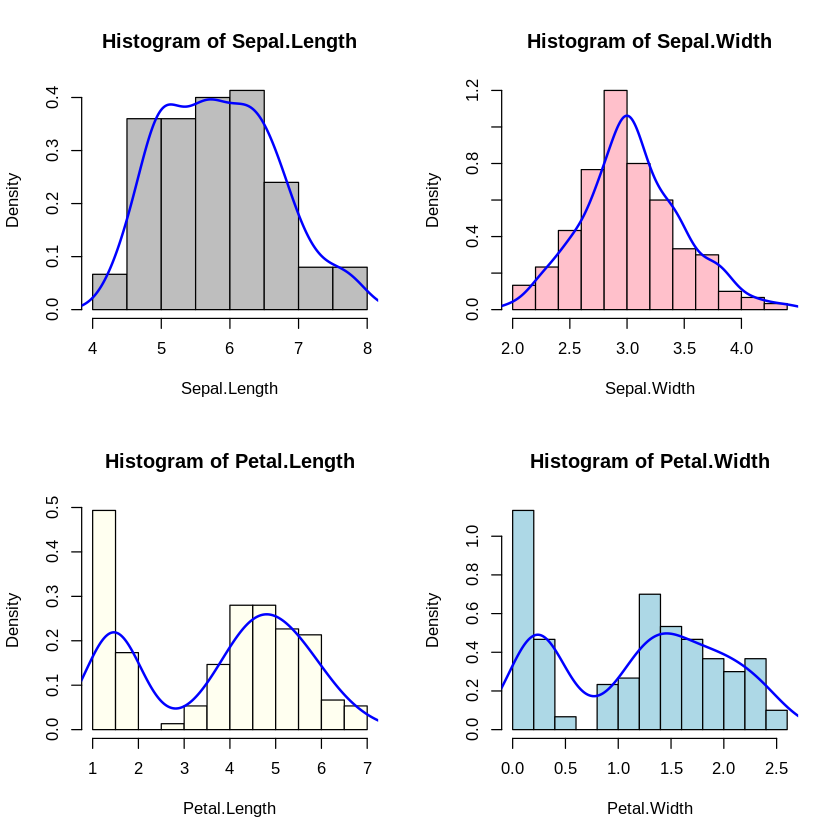

In [3]:
#Seting the layout for a 2x2 arrangement
par(mfrow=c(2,2))

colors <- c("grey", "pink", "ivory", "lightblue")
for(i in 1:4) {
  #xreating histogram
  hist(iris[,i], main=paste("Histogram of", names(iris)[i]),
       xlab=paste(names(iris)[i]), col=colors[i], freq=FALSE)
  #Also adding density line
  density_data <- density(iris[,i])
  lines(density_data, col="blue", lwd=2)
}
par(mfrow=c(1, 1))


Sepal length and sepal width shows approximate normal distributions indicated by the bell-shaped curves of the density plots. The sepal length shows a unimodal distribution with a slight skew towards larger lengths, while sepal width is also unimodal with a peak around 3 cm, suggesting most iris flowers have a sepal width within a moderate range.

In contrast, petal length and width exhibit bimodal distributions. Petal length's distribution suggests two distinct groups, potentially correlating with species differentiation—one group with shorter petals and another with significantly longer petals. Overall, the histograms and density plots provide a visual summary of the data's distribution offering insights into variations among the Iris species.

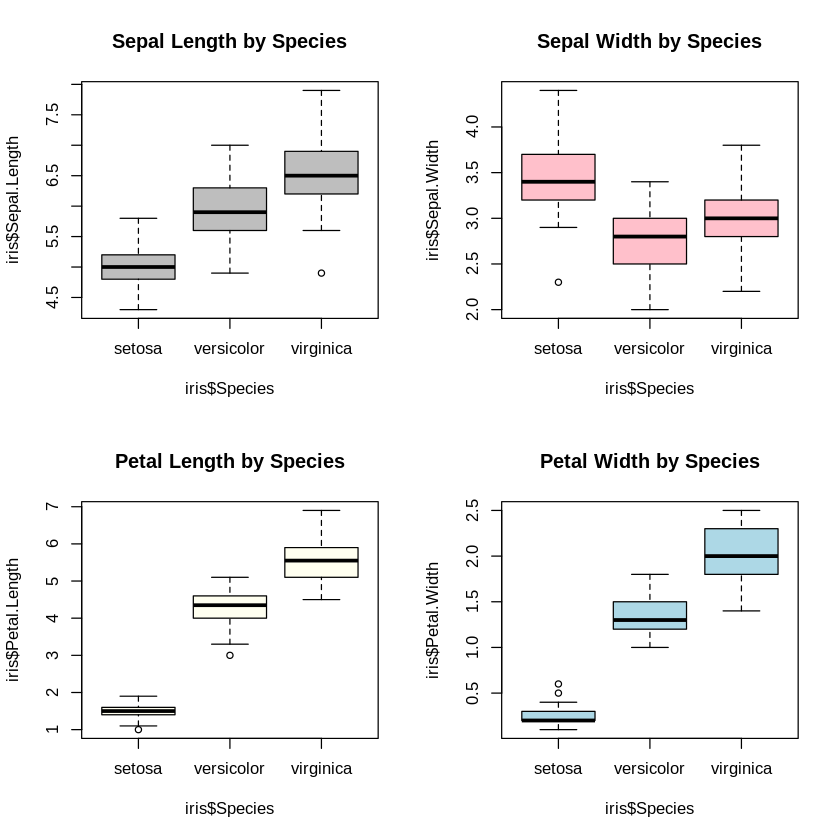

In [4]:
par(mfrow=c(2,2))
boxplot(iris$Sepal.Length ~ iris$Species, main="Sepal Length by Species", col="grey")
boxplot(iris$Sepal.Width ~ iris$Species, main="Sepal Width by Species", col="pink")
boxplot(iris$Petal.Length ~ iris$Species, main="Petal Length by Species", col="ivory")
boxplot(iris$Petal.Width ~ iris$Species, main="Petal Width by Species", col="lightblue")

The box plots for the Iris dataset shows its different species variations and outliers in sepal and petal dimensions. Iris setosa is distinct with smaller petals and wider sepals, whereas Iris virginica and versicolor have longer petals, with virginica being the largest. Outliers are present particularly in sepal width for setosa and petal width for virginica, suggesting individual variation or measurement errors.

# **Research Question**

How do Structural features correlate with response variable, and can we statistically validate the significance of these relationships? Specifically, which features strongly predict petal width?

# **Performing Linear Regression**

Splitting some part of the dataset for training and testing process without including the categorical varaible(Species) for performing the linear regression model.

In [5]:
#Splitting the data into train and test datasets
train <- iris[1:120,-5]
test <- iris[121:150,-5]

head(train)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


This code performs a series of linear regressions to predict Petal Width from other variables in the Iris dataset, excluding the Species. It calculates the Mean Squared Prediction Error (MSPE) for each model using the test set. The process iterates through each of the predictors combinations, each time removing one predictor, and identifies the best-performing model with the lowest MSPE, which is stored for future use.

In [6]:
# MSPE function to calculate MSPE values for each model
MSPE <- function(model, test) {
  actualPrices = test$Petal.Width
  predictedPrices = predict(model, test)
  squaredErrors = (actualPrices - predictedPrices)^2
  mspe = mean(squaredErrors)
  return(mspe)
}

model = lm(Petal.Width ~ ., data = train)
initialMSPE <- MSPE(model, test)
print(summary(model))
cat("\nInitial MSPE of full model:", initialMSPE, "\n")

#storing the best model
bestmodel <- model
lowestMSPE <- initialMSPE

#backward selection
variables <- names(coef(model))
while(length(variables) > 1) {
  # Excluding the intercept value from p-values
  p_values <- summary(model)$coefficients[-1, 4]
  max_p_value <- max(p_values)
  if(max_p_value > 0.3) {
    variable_to_remove <- names(p_values)[which.max(p_values)]
    model <- update(model, formula = paste(". ~ . - Species-", variable_to_remove))
    currentMSPE = MSPE(model, test)
    print(summary(model))
    cat("MSPE after removing", variable_to_remove, ":", currentMSPE, "\n")

    # Updating best model
    if (currentMSPE < lowestMSPE) {
      lowestMSPE <- currentMSPE
      bestmodel <- model
    }

    variables <- names(coef(model))

  } else {
    break

  }
}
cat("\nLowest MSPE observed:", lowestMSPE,"\n")




Call:
lm(formula = Petal.Width ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35041 -0.08847 -0.01330  0.08623  0.59398 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.17947    0.16050  -1.118    0.266    
Sepal.Length -0.18538    0.04396  -4.218 4.92e-05 ***
Sepal.Width   0.18243    0.04333   4.210 5.06e-05 ***
Petal.Length  0.49998    0.02267  22.057  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1528 on 116 degrees of freedom
Multiple R-squared:  0.9545,	Adjusted R-squared:  0.9533 
F-statistic: 810.8 on 3 and 116 DF,  p-value: < 2.2e-16


Initial MSPE of full model: 0.09499934 

Lowest MSPE observed: 0.09499934 


The optimal model using all continuous predictors which are `Sepal.Length`, `Sepal.Width` and `Petal.Length` as predictors achieved low MSPE of 0.09499934, which shows excellent prediction accuracy. This model got 95.45% of the variance (with an adjusted R-squared of 95.33%), highlighting its strong explanatory power. Also, with an F-statistic of 810.8 on 116 degrees of freedom and a highly significant p-value, this model proves to be exceptionally great for predicting Peta.Width values based on the specified predictors.

Now, We have achieved best model according to the MSPE, we will be perform some diagnostics on the data for which the best model has performed on.

# **Diagnostics**

Diagnostics help verify if the model assumptions of linearity, independence, homoscedasticity (constant variance), and normality of residuals are met.

Creating a diagnostic dataframe to plot between residuals adn fitted values to check for violations

In [7]:
#creating a diagnostic dataframe
df_diagnostics = data.frame(yhat = fitted(bestmodel), r = resid(bestmodel), y = train$Petal.Width, petal_len=train$Petal.Length, sepal_len= train$Sepal.Length, petal_len= train$Petal.Length)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


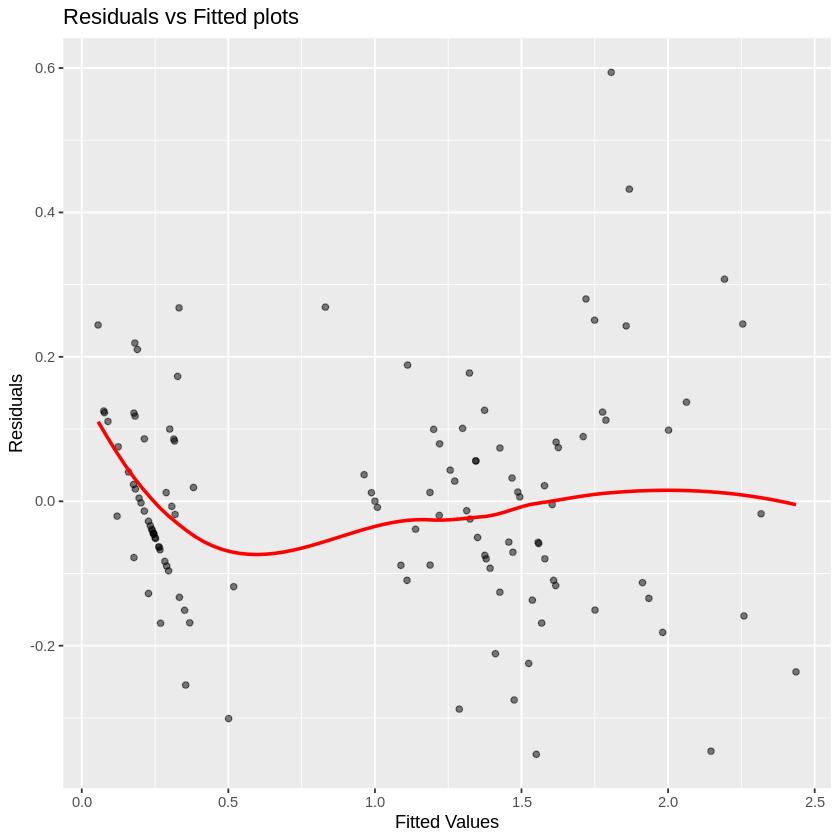

In [8]:
#Residuals vs Fitted plot for the check for some violation on Non-Constant variance and Linearity
library(ggplot2)
ggplot(df_diagnostics, aes(x = yhat, y = r)) +
    geom_point(alpha = 0.5) +
    geom_smooth(se = F, col = "red") +
    xlab("Fitted Values") + ylab("Residuals")+
    ggtitle("Residuals vs Fitted plots")

In [9]:
#test for violation of constant variation
install.packages("lmtest")
library(lmtest)

# Assuming `model` is your linear model object
bptest(model)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  model
BP = 14.395, df = 3, p-value = 0.002414


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


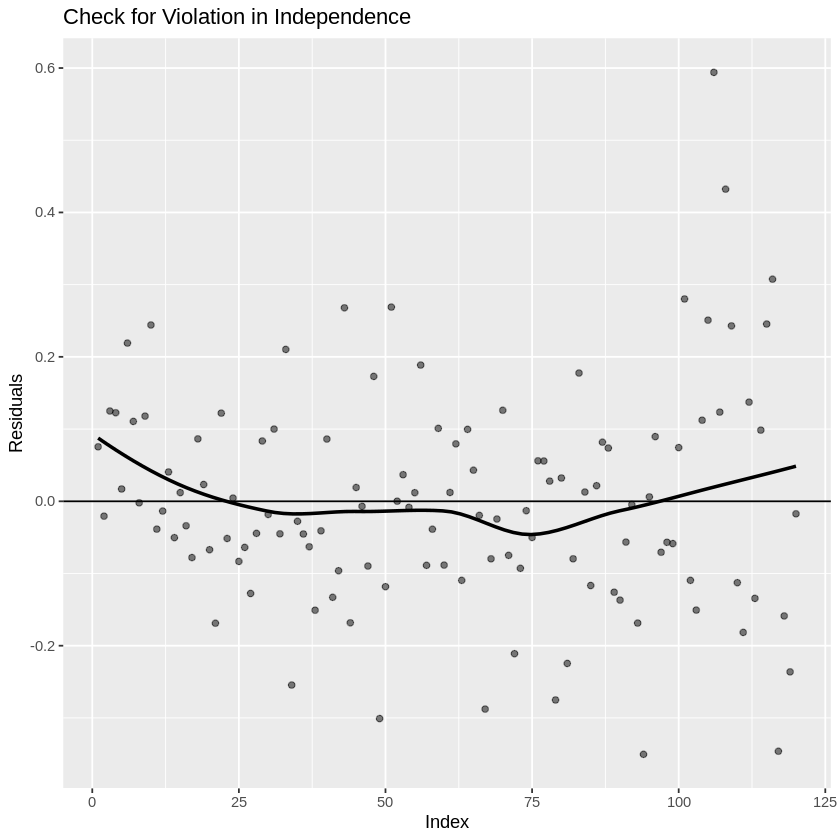

In [10]:
#Residuals vs Index plot to check for the violation of Independence
library(tidyverse)
df_diagnostics_order = arrange(df_diagnostics, petal_len)
ggplot(df_diagnostics_order, aes(x = 1:length(train$Petal.Width), y = r)) +
    geom_point(alpha = 0.5) +
    geom_abline(slope = 0, intercept = 0) +
    xlab("Index") +
    geom_smooth(se = F, col = "black") +
    ylab("Residuals") +
    ggtitle("Check for Violation in Independence")

In [11]:
#test for violation of independence
dwtest(model)


	Durbin-Watson test

data:  model
DW = 1.6613, p-value = 0.02386
alternative hypothesis: true autocorrelation is greater than 0


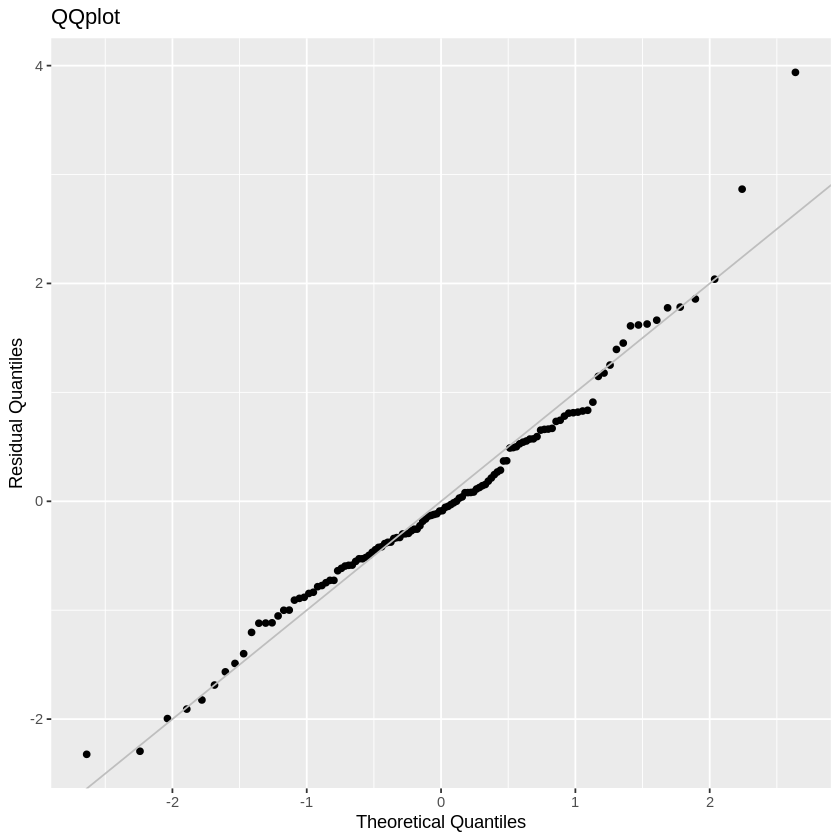

In [12]:
#Q-Q plot to check for the violation of Normality
ggplot(df_diagnostics, aes(sample = (r - mean(r))/sd(r))) +
    stat_qq() + geom_abline(slope = 1, intercept = 0, col = "grey") +
    xlab("Theoretical Quantiles") +
    ylab("Residual Quantiles") +
    ggtitle("QQplot")

**Constant Variation**: The test results and residual plots together provide a mixed view on homoscedasticity. While the residual vs fitted plot is not strongly indicating heteroscedasticity, the Breusch-Pagan test with a p-value of 0.002414 suggests a significant deviation from constant variance. This discrepancy implies that there is enough evidence to confirm the presence of heteroscedasticity.

**Independence**: The Durbin-Watson test's p-value of 0.02386, along with the pattern in the residuals which says the spread of residuals are sparsed not only around zero, points to a violation of the independence assumption.

**Linearity**: From the Residuals vs Fitted graph, we can say that residuals vs fitted plot suggests that the relationship between the predictors and the response may not be perfectly linear.
So we have violation of linearity in the model.

**Normality:** - From the QQ plot in the diagnostics it can be seen that the points did not follow a straight line   y=x line at the extreme levels. So, we can say that it violates the Normality.



#**MODEL SELECTION (AIC, BIC, Adjusted $R^2$)**

Even if we have a best model based on one criterion(MSPE), checking against others(AIC, BIC, Adjusted $R^2$) is valuable as they can offer different perspectives on model quality.

Performing Model Selction to get other best models on our IRIS dataset based on Alkaline In  formation Criterion, Bayesian Information Criterion, Adjusted $R^2$ by Performing Best subset regression which is a method of examining all the possible combinations of predictors to determine which  best predicts the Outcome Variable (Petal.Width).


In [13]:
#Installing leaps to perform subset regression
install.packages('leaps')
library(leaps)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
#Taking subset of max 4 as we only have 4 total variables after excluding the 'Species'
reg_subsets <- regsubsets(Petal.Width ~ ., data = train, nvmax = 4)
summary_subset <- summary(reg_subsets)
print(summary_subset$which)
#Identifying the best models according to BIC and adjusted R^2
bic <- which.min(summary_subset$bic)
Adjr2a <- which.max(summary_subset$adjr2)
cat("\nThe model which is best based on BIC has", bic, "predictors.\n")
cat("The model which is best based on Adjusted R^2 has", Adjr2a, "predictors.\n")

  (Intercept) Sepal.Length Sepal.Width Petal.Length
1        TRUE        FALSE       FALSE         TRUE
2        TRUE         TRUE       FALSE         TRUE
3        TRUE         TRUE        TRUE         TRUE

The model which is best based on BIC has 3 predictors.
The model which is best based on Adjusted R^2 has 3 predictors.


In the Above output, it indicates that the best model according to both BIC and adjusted $R^2$ includes 3 predictors. The $which table shows TRUE for Sepal.Length, Sepal.Width, and Petal.Length which says that these are the predictors included in the best model according to both criterions.

In [15]:
n <- nrow(train)
#initialising a vector to store AIC values
aic_models <- numeric(length = 3)
#calculating AIC for each model
for (i in 1:3) {
    k <- sum(summary_subset$which[i,])
    rss <- summary_subset$rss[i]
    aic_models[i] <- n * log(rss/n) + 2 * k
}
# Determining the best model based on minimum AIC
best_aic <- which.min(aic_models)
cat("The best model based on AIC has", best_aic, "predictors.\n")

The best model based on AIC has 3 predictors.


Akaike Information Criterion (AIC) concluded that the best model for predicting Petal.Width from the training dataset includes three predictors. This model selection was determined by evaluating various combinations where the model with three predictors gave the lowest AIC score.

Now, I will be Individually performing linear models by taking some combination of predictors to predict Petal.Width inorder to perform and validate some tests and Confidence Intervals

In [16]:
#Randomly performing linear regression using different set of predictors
#for further analysis
model1<- lm(Petal.Width~., data= train)
model2<- lm(Petal.Width~ Petal.Length+Sepal.Length, data= train)
model3<- lm(Petal.Width~ Sepal.Width+Sepal.Length, data= train)

# **Confidence Intervals**

In [17]:
coef1 <- coef(summary(model1))
coef2 <- coef(summary(model2))

#difference in coefficients and their standard errors
diff_coef <- coef1[, "Estimate"] - coef2[, "Estimate"]
se_diff <- sqrt(coef1[, "Std. Error"]^2 + coef2[, "Std. Error"]^2)

#Calcultating 95% confidence intervals for the difference
lower_bound <- diff_coef - 1.96 * se_diff
upper_bound <- diff_coef + 1.96 * se_diff

data.frame(
  Lower_Bound = lower_bound,
  Upper_Bound = upper_bound
)


Warning message in coef1[, "Estimate"] - coef2[, "Estimate"]:
“longer object length is not a multiple of shorter object length”
Warning message in coef1[, "Std. Error"]^2 + coef2[, "Std. Error"]^2:
“longer object length is not a multiple of shorter object length”


,Lower_Bound,Upper_Bound
,<dbl>,<dbl>
(Intercept),-0.6100982,0.2977274
Sepal.Length,-0.7094957,-0.5248224
Sepal.Width,0.1439385,0.3685558
Petal.Length,0.1930509,0.8534879


The confidence intervals for the coefficients from  the above processsuggest the following:

- The Intercept interval shifts from negative to positive, which means it's not statistically significant at this confidence level.
- Sepal.Length has a confidence interval entirely below zero, indicating that it has a statistically significant negative effect on Petal.Width.
- Sepal.Width has a significant level which is totally above zero, a positive interval suggesting a positive relationship with Petal.Width.
- Petal.Length has a confidence interval fully above zero, indicating a strong and statistically significant positive impact on Petal.Width.

These results helps us to identify which features of the flower are significant predictors of Petal.Width in the Iris dataset.



*   Performing **Shapiro-Wilk** test which is used to test the normality of
residuals in regression analysis for using anova tests. So, the assumed hypothesis statements would be:

    Null Hypothesis (H0): The model's data is normally distributed.

    Alternative Hypothesis (HA): The model's data is not normally distributed.




	Shapiro-Wilk normality test

data:  residuals(model1)
W = 0.97173, p-value = 0.01248


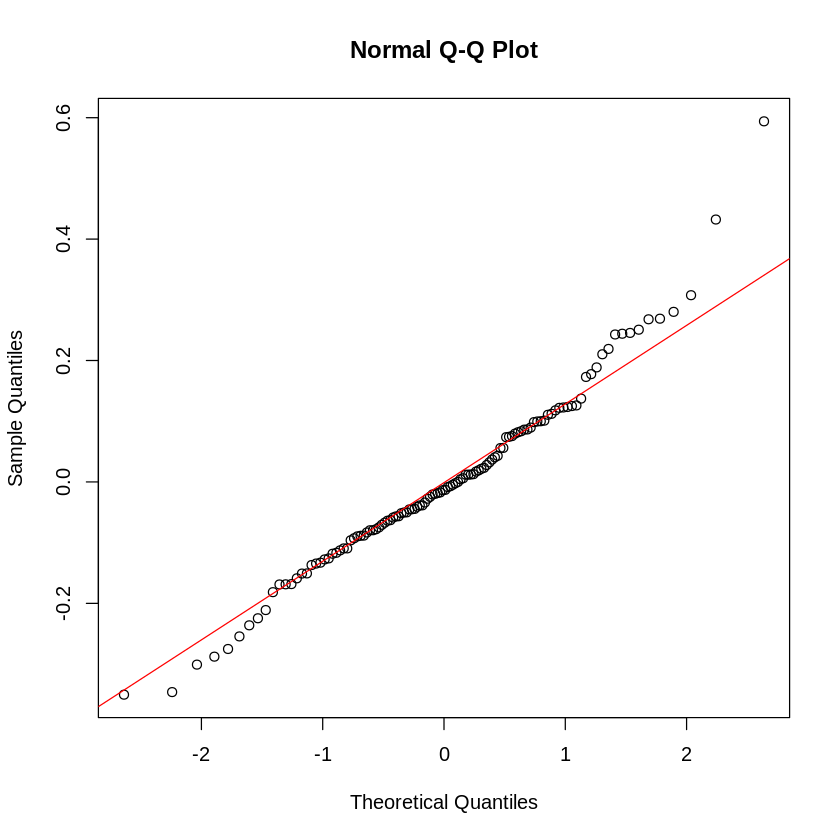


	Shapiro-Wilk normality test

data:  residuals(model2)
W = 0.95054, p-value = 0.0002369


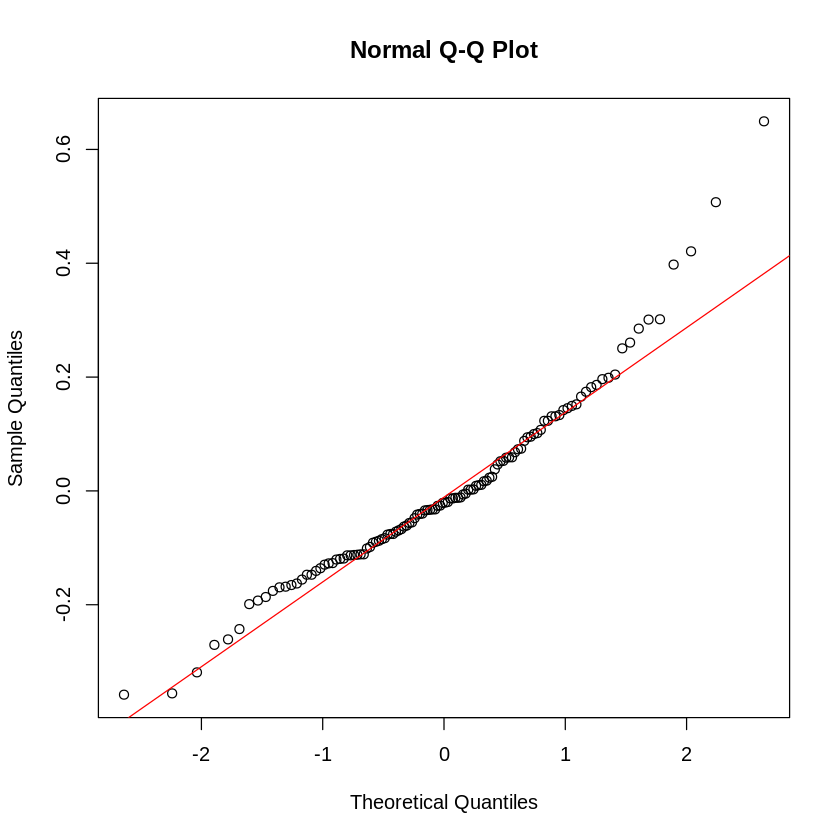


	Shapiro-Wilk normality test

data:  residuals(model3)
W = 0.93106, p-value = 1.121e-05


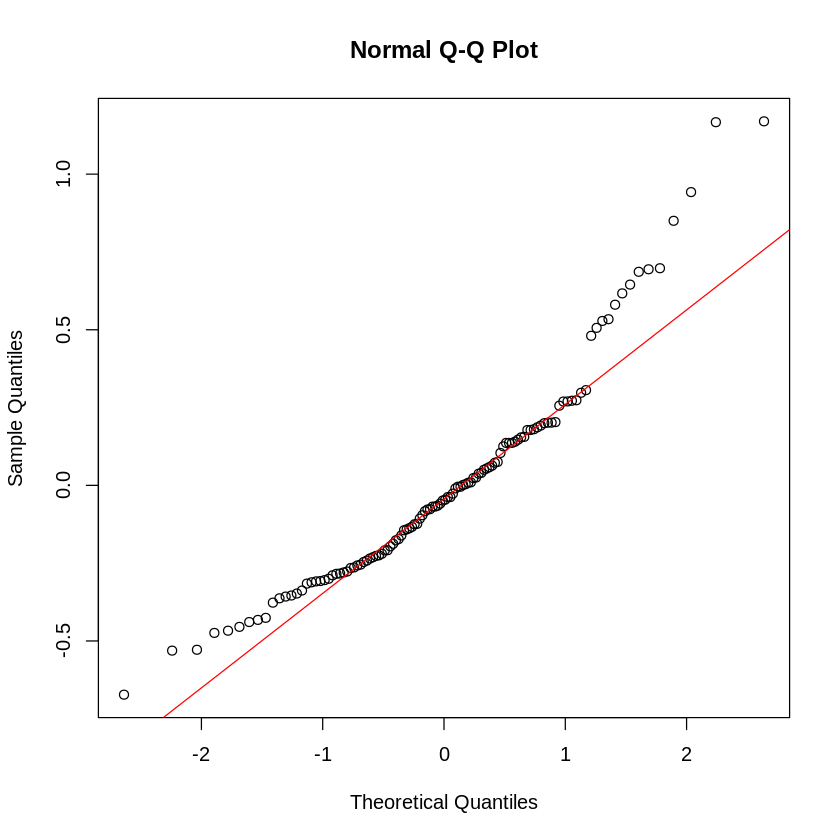

In [23]:
# Checking Normality for Model 1 using Shapiro-Wilk test
qqnorm(residuals(model1))
qqline(residuals(model1), col = "red")
shapiro.test(residuals(model1))

# Checking Normality for Model 1 using Shapiro-Wilk test
qqnorm(residuals(model2))
qqline(residuals(model2), col = "red")
shapiro.test(residuals(model2))

qqnorm(residuals(model3))
qqline(residuals(model3), col = "red")
shapiro.test(residuals(model3))

# Repeat for other models


The above tests proves us the all the p values from the shakiro-wil tests are less than the siginificant leve(0.05). It suggests thatt each adn every model are violating the assumptions of norrmality by rejecting the null hypothesis



*   Succesively, performing the constant variance(homogeneity) test by using the levene test. This is important to validate before performing ANOVA to ensure that the variances in petal width predictions across the different models are not significantly different



In [29]:
install.packages('car')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘MatrixModels’, ‘quantreg’


Warning message in install.packages("car"):
“installation of package ‘quantreg’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘car’ had non-zero exit status”


In [37]:
library(car)
#Levenes test for assumption of constant variances
leveneTest(residuals(model1), group = model1$fitted.values)
leveneTest(residuals(model2), group = model2$fitted.values)
leveneTest(residuals(model3), group = model3$fitted.values)

Warning message in leveneTest.default(residuals(model1), group = model1$fitted.values):
“model1$fitted.values coerced to factor.”
Warning message in anova.lm(lm(resp ~ group)):
“ANOVA F-tests on an essentially perfect fit are unreliable”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,117,7.818693e+28,1.278986e-29
,2,NA,NA


Warning message in leveneTest.default(residuals(model2), group = model2$fitted.values):
“model2$fitted.values coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,99,1.888384,0.05257758
,20,NA,NA


Warning message in leveneTest.default(residuals(model3), group = model3$fitted.values):
“model3$fitted.values coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,98,0.9104464,0.6371091
,21,NA,NA


From the above Levene's test results, we can definitely say that 2 out of 3 the p-values for 3 models are greater than 0.05 suggests that there is no violation of constant variance different models and the other model has a p-value of 1.278986e-29 which is way less than 0.05.

So, from both of the test results for the assumptions of normality and constant variance, it is evident that performing ANOVA on these models is not suggested.

Despite the violation of key assumptions such as normality and homogeneity of variances, we performed with the ANOVA analysis for one reason- the nature of ANOVA is valuable in our context as it allows us to  evaluate the relative performance of different models in explaining the variation in petal width. Also this analysis is important for identifying which model irrespective of  the assumption violations provides the most statistically significant explanation of the data.

# **ANOVA Testing between 3 Models**

Performing ANOVA with the above three models will help us understand whether the predictors included in each model have a statistically significant effect on predicting petal width which helps us identify- which structural features correlate strongly with petal width in Iris flowers.

In [19]:
#Comparing model1, model2, and model3 using ANOVA
anova_results <- anova(model1, model2, model3)
print(anova_results)

Analysis of Variance Table

Model 1: Petal.Width ~ Sepal.Length + Sepal.Width + Petal.Length
Model 2: Petal.Width ~ Petal.Length + Sepal.Length
Model 3: Petal.Width ~ Sepal.Width + Sepal.Length
  Res.Df     RSS Df Sum of Sq      F    Pr(>F)    
1    116  2.7070                                  
2    117  3.1206 -1   -0.4136 17.724 5.064e-05 ***
3    117 14.0597  0  -10.9391                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


The ANOVA table above suggests that there is a statistically significant difference in the ability of these models to predict `Petal.Width`. Model 1, which includes all predictors `Sepal.Length`, `Sepal.Width`, and `Petal.Length` are compared against Model 2 and Model 3, each with a subset of these predictors. The F-statistic and its associated p-value (very less than 0.05) indicate that Model 1 fits the data significantly better than Model 2. There iss no comparison presented directly between Model 1 and Model 3 or Model 2 and Model 3 in the results, but the p-value associated with Model 2 comparison suggests that the predictors in Model 1 provide additional explanation.

#**Generalised Linear Modelling**

As our linear model violates the normality and linearity, it does mean that it attain non-normal and non-linear in nature. Thus, performing GLM on the same set of predictors to predict the response variable(Petal.Width) in order to check the performance which directly supports our investigation into the structural features their relationships to petal width.


GLM allow the dependent variable, Y, to be generated by any distribution function belonging to the exponential family. So, First I have to check the repsonse variable's distribution. Based on that, we have to chose the link functions and families which has to be performd  in GLM.

In [20]:
library(ggplot2)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


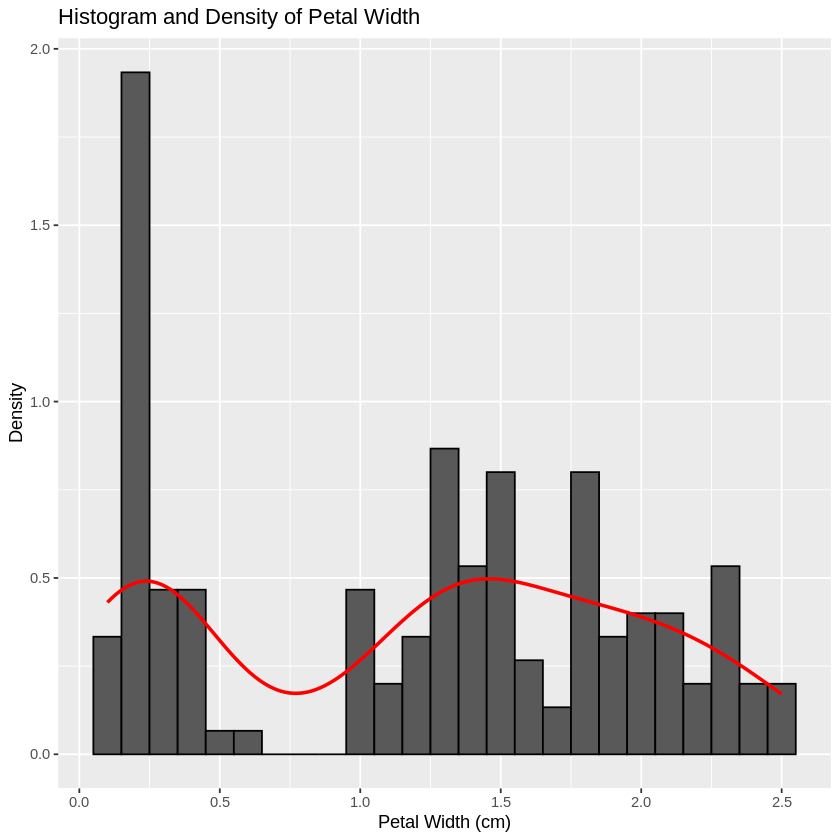

In [21]:
#Checking for distribution of the response variable
ggplot(iris, aes(x = Petal.Width)) +
  geom_histogram(aes(y = ..density..), binwidth = 0.1, color="black") +
  geom_density(color="red", size=1) +
  ggtitle("Histogram and Density of Petal Width") +
  xlab("Petal Width (cm)") +
  ylab("Density")


It appears petal width is follwoing a  non-normal distribution, this suggests that the relationship between the predictors and the petal width may not be approximately linear, and the residuals of the model might also be non-normally distributed. So, Fitting a GLM with Gamma family along with the 'log' link function

In [22]:
#Fitting a GLM with a log link function
glm_model <- glm(Petal.Width ~ Sepal.Length + Sepal.Width + Petal.Length, family = Gamma(link = "log"), data = train)
summary(glm_model)
#Predicting the response with GLM model
predicted_values <- predict(glm_model, newdata = test, type = "response")

#Calculating MSPE
actual_values <- test$Petal.Width
mspe <- mean((actual_values - predicted_values)^2)
cat("\nMSPE for the GLM Model is:", mspe)



Call:
glm(formula = Petal.Width ~ Sepal.Length + Sepal.Width + Petal.Length, 
    family = Gamma(link = "log"), data = train)

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.37100    0.32125  -4.268 4.05e-05 ***
Sepal.Length -0.12751    0.08798  -1.449    0.150    
Sepal.Width  -0.05085    0.08673  -0.586    0.559    
Petal.Length  0.57336    0.04537  12.637  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.09348123)

    Null deviance: 92.102  on 119  degrees of freedom
Residual deviance: 11.401  on 116  degrees of freedom
AIC: -23.112

Number of Fisher Scoring iterations: 6



MSPE for the GLM Model is: 0.3253174


The initial linear regression model yielded an MSPE of 0.09499934, indicating a relatively good predictive accuracy for petal width. However recognizing the non-normal distribution with bimodel nature of the response variable, a GLM with a Gamma family and log link was applied on to the data resulting in a higher MSPE of 0.3253174. This increase in MSPE could tell us that that despite the use of  GLM, it may not capture the relationships between response and the predictors as effectively as the linear model.

# **REPORT**

### **INTRODUCTION**

Our project explores the intriguing relationships between various structural features of flowers, like petal width, and how these connects with one another. We're particularly focused on discovering the key factors that determine the width of a petal. By using statistical methods, we're seeking to validate which of these features truly matter and how they're interlinked. Our **Research question** states that- How do Structural features correlate with response variable, and can we statistically validate the significance of these relationships? Specifically, which features strongly predict petal width?

My interest in this problem arises from a desire to understand the patterns of plant growth. By studying the relationship between various structural patterns and their effect on the Petal.Width feature, we can uncover the language of flowers and how differently they come together to shape their identity. And, this can be done by applying various statistical methods on to the IRIS data which i took it directly from the R directory and it can also be available from different sources in the web. If we were to explain our project to a layman- In our project, we are studying the Iris flower, seeing how its features like petal and sepal sizes influence the petal width. We used statistics to test our theories to ensure the assumptions are actually true. Predicting the size of Petal Width using othr structural featuers and how they are correlated with the output. It's all about finding the hidden connections in flower designs.



**Related Work**

Various researchers have utilized the dataset to demonstrate the use of linear regression and other statistical methods. One of which is the analysis by Cecilia Lee, titled "Iris — Linear Regression," available on RPubs. Lee's work utilizes the Iris dataset to demonstrate the application of linear regression techniques. Her analysis serves as an informative example of how predictive modeling can be applied to IRIS data, providing insights into the statistical relationships between the attributes of Iris species.

## **Exploratory Data Analyses**

Through histograms, we have ve examined Iris flower measurements and their distributions, revealing sepal length and width to typically follow a bell-shaped pattern, suggesting at a standard range across the flowers. In contrast, petal lengths and widths distinctly has bimodal distributions, suggesting potential differences in Iris species.

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAIAAAByhViMAAAACXBIWXMAABJ0AAASdAHeZh94%0AAAAgAElEQVR4nOzdZ1wUV9sG8GuWsnSWKkURBBQEVFA09l6jsWsUURMlWGKLJhHFx95b8phg%0AjF0TKxhjw4JojILYuwgqUVGKS5WywJb3w/jsSxAQdHdny/3/4G+dmZ29dhkO986cOYeRyWQg%0AhBBCCCGaj8d1AEIIIYQQohhU2BFCCCGEaAkq7AghhBBCtAQVdoQQQgghWoIKO0IIIYQQLUGF%0AHSGEEEKIlqDCjhBCCCFES1BhRwghhBCiJaiwI4QQQgjRElTYEUIIIYRoCSrsCCGEEEK0BBV2%0AhBBCCCFaggo7QgghhBAtQYUdIYQQQoiWoMKOEEIIIURLUGFHCCGEEKIlqLAjhBBCCNESVNgR%0AQgghhGgJKuwIIYQQQrQEFXaEEEIIIVqCCjtCCCGEEC1BhR0hhBBCiJagwo4QQgghREtQYUcI%0AIYQQoiWosCOEEEII0RJU2BFCCCGEaAkq7AghhBBCtAQVdoQQQgghWoIKO0IIIYQQLUGFHSGE%0AEEKIlqDCjhBCCCFES1BhRwghhBCiJaiwU67x48czDMMwzD///MN1Fk3y4MGDLl26GBsbGxkZ%0ATZgwges476cdP2jteBdEHdCx9GGo6fuAnZuZmTEM88knn3z8rrQDFXYfYsiQIewhcu3atQqr%0AfH192VUFBQUfvP+zZ88uWLDg8ePHHxdTgw0ZMuTcuXMikcjU1LS0tLSqzfLz81esWNGhQ4f6%0A9evz+XwTE5OGDRuOGzfu/v37qkxbQ9UcNpygw4zUFjV9yqZ9TZ+HhwfDMPr6+oWFhfKF0dHR%0AzP88fPhQvvzixYvswhEjRnzMi+r4gaTPdQAtt2HDhjVr1gCwsLCo+bPCw8MvX778ySefeHh4%0AKC2a+hIKheyveseOHWNjY3m8yr9+ZGVltW7dOjk5ufzC5OTk5OTkPXv2HD9+vEuXLqqIq7F0%0A/DAjSkVN3wfQyqavc+fOT548kUgkV69e7dSpE7swLi5OvsGlS5e8vb3Zx1euXJE/Cx96FEHn%0ADyQ6Y6dcxsbGAoFAIBBU9Sv6rhcvXiQkJCg1lZqTf+P38vKq5nNbuXIl27T169fv0qVL//zz%0Az/Xr10NCQgCIRKLvv/9eNWk1FB1mRKmo6fsAWtn0yYu5y5cvyxdWKOzkj+WFHfusDziKQAcS%0AFXbKVul1/TNnzvTp08fV1dXIyMjJyal///7nz59nV3Xq1MnFxUUmkwHo3bs3wzAnT55kV5WW%0Alv74448tW7a0sLAwNjZu1KjRzJkzMzIyyr9cQkJCp06dTE1NbW1tx44dm52d3bRpU4ZhmjVr%0Axm4wYsQIhmHMzMyKioqGDh1qZma2ceNGdtX9+/dHjhxZp04dQ0NDd3f3MWPGpKSkyPcsfyKA%0ApUuXOjk5WVhYfPbZZ2lpaQB+/PHH+vXrGxkZtW/f/r09GKp/I59//rmbmxv7eNOmTQzDDBky%0ApNL9yC8G7dq1q02bNvXr1w8ICPj111+DgoIGDBjQvn17kUjEbpCVlTV9+nR3d3c+n29razto%0A0KDyFyyGDx/OMAyPx8vJyZk5c6aLiwufz2/cuPHu3bvLv1z1n48CVZ+2/A9i8+bNjRo1MjIy%0AatSoUVRUVPmdVH8kVHOYsXg83q+//lrVzgl5L2r63qWbTR977g1AfHw8+0AikbAFXGBgIP5d%0A2LEFmZOTU8OGDVHFUXT16tXOnTuzP+vRo0cLhcLyL0eNGwDISO0NHjyY/fSuXr1aYZWPjw+7%0A6s2bNzKZbNy4cex/U1JS2A3279/PMAwAQ0NDJycnPp8PQE9P78CBAzKZbMiQIQKBgH2Kra2t%0As7PzuXPnZDJZcXFxu3bt2OUMwxgaGrKPHR0dk5KS2D3fuXPHxMSEXa6npwegbdu29erVAxAY%0AGMhuM3r0aHaD//znP+yD1atXy2SyGzdusM81MjJq2LAh+3Q7O7uMjAz2iWPGjGG3X7lyZfnj%0Ap1u3blu3bi2/xN3dXSKRVPXRvfeNTJo0ycHBgV1oamrq7Oz81VdfVbqrQYMGsZvt2bOnmh9W%0ARkYG21zq6+s3adLEysoKgJmZ2a1btyp8Jp07d7azs2vVqpU8lXzP7/183v1Bv6uaw6bmaeU/%0AiJ9//rn8x84wTExMDLvNe4+Eqg4z+btYtGhRhZ2fOXOmmg+Z6Ahq+uSo6WM3qEnT5+npCcDe%0A3l6+T/YpP/30E/uA3VtmZib735EjR1a187t378p/1gKBwNDQMDAwkF3SqlUrGTVuMplMJqPC%0A7kPIW7dvvvlm/b/JfzOrat3YO3datGhRUFAgk8kKCwu7du1avgHasGED+5To6Gj5K4aFhbEL%0Ax44dm5ubW1JSIt+sY8eO7Db9+/dnl0yfPr2oqCgtLU1+lxB7xJfPY2NjM3ny5B07drANdN++%0Afdnld+/elclk+/btY//77bffVnhi/fr1o6Ojjx8/znZ6YBjG0dFxx44d8fHxDRo0YLeRVxjv%0AqskbkX8dDA0Nrean8Ntvv8l/M7t167Zu3br4+HiRSFRhM7ZdZhjm7NmzMpksNze3adOmADp0%0A6FDhrQUEBOTm5spksvj4eLb9cnNzY7ep+efzkYVdzdPa29tv3rz59u3bwcHB7JJ+/fqx29Tk%0ASKj0MCu/8+3bt5ffed++fav5WRAdQU0fNX0f0PR99dVX7DZPnjyRyWRsPVevXr3U1FR2+R9/%0A/CGTyY4dO8b+d/PmzVXtfODAgeyS5cuXS6XS3Nxc+RlBatzkqLD7EPLWrRpVtW5eXl4AGjZs%0A+OLFC3ZJfn4+uzHr3YNSKpXa2NgAsLKyKiwslG8pP6CfPn0qlUqNjIwAWFpaFhcXsxtcvHix%0AwhEvzzN58uTy7yguLu7cuXMXL15k//vmzRt2sz59+lR44g8//MAuCQ0NZZeMGzeuQvKIiIhK%0AP7eavBFZjVs3qVQ6f/58+VdMlpGRUc+ePf/88092m5KSEvbLnPyPh0wm27x5M7txampq+be2%0Af/9++TbdunVjFyYnJ9fq8/mYwq5WaRcsWCAPY2xsDMDd3Z39WGpyJFTf9i1cuFC+czYSu3Oi%0A46jpk1HTV8XnU03Tt2fPHnab33//XSaTjRw5EsDw4cNlMln9+vUBzJo1SyaTzZs3j93s8ePH%0Ale5cKpWybZ2dnV1ZWRm7zfXr1yv8rKlxo7tiVa13796JiYlJSUkuLi5+fn7t2rXr1q3bp59+%0AWs1Tnj59mpWVBcDf319+FhpAYGDguXPnANy+fdvMzIztV9GiRQu2mQPQqlUrAwODsrKyd/dZ%0AofdG69atX716dfLkyZiYmOLiYvnykpKSCk9s3749+4DtA1Hpkuzs7A9+I/JeJu/FMMyCBQtC%0AQkIiIyPPnz8fFxeXmZkpEolOnTp16tSpyZMn//TTTykpKUVFRQCePXvWq1cv9olsBgC3bt1y%0AdnaW77B58+byx15eXjExMQBevHjh4eFR88/nY9Qqbe/evdkHZmZmrq6uDx8+ZLcUCoW1OhIq%0AJX91ducPHjyQxyDkw1DTV/0b0eKmr3w3u5EjR7Kd7dq0acP+++zZM7abHdvxrm7duu7u7pXu%0ARygUshn8/f319d9WL82aNTM0NKxmaJgKdKFxo8Luo1y9erVFixbll/j6+lY/ktDKlSvLyso2%0Ab95cUlJy586dO3fuREREODs779u3T94Do4Lc3Fz2gZ2dXfnl8jvA8/Ly5B1Izc3N5Rvo6+ub%0AmprKn16ek5NT+f/+97//nTVrVk3+8FtbW7MP5M0T+020/BKZTPbBb+S9ASpwdnaeNm3atGnT%0AACQlJe3du3fFihUikejnn38eNWqU/Jc/MzPz1KlTFZ4r79LBYvtHsywtLdkH7O98zT+fjyH/%0ANlyTtPb29vLH7CfPfuy1PRIqVX7n7Ffkqn6mRDdR0wdq+mrMwcHBy8srMTExISHh9evX7IlJ%0AtrBr27bt3r17b968WVpayt42K68C3yX/WZcvjnk8nomJSc0LO11o3OiuWFUzMDDYsGFDRkbG%0An3/+OXPmTPamrZcvX/bt2zc/P7/Sp8h/0ypsIG8srKys5E1M+a+MYrG4qsFCy5/Gv3fv3owZ%0AM8rKyho3bvzgwQOxWKykCqYmb6RWO3zx4kV6err8vw0bNpw/f/769evZ/8bFxcnbzYEDB757%0AvvqLL76oNEb5x3Xq1FHZ51OrtFWp7ZFAiGpQ0wcdbvrY4Utu37594cIFACYmJuwB0LZtWwAi%0AkSgqKoqtbuXDo7zL1taWfVD+Z11WVkaNWwVU2KmaVCr9559/+Hz+Z599tmbNmps3b7I3W+Xl%0A5d29e7fCluyDBg0asF8W4+Pjyw/ezZ4wZxgmMDDQzs6OvQxx584d+Uny+Ph4sVj83kgJCQns%0Aa40YMcLb21tPT+/mzZsKebMV1OSN1HBXly9fFggELi4u8v4ucvK3LJPJGjRowH63K//ZFhUV%0Ayc+NlVf+rvu//vqLfVC/fv0P+3xKSkoKCgrYfuI1fFO1SluV2h4J8sOMEKWipq/6N1LDXWlo%0A08eehystLd22bRuAli1bsucU/fz82FOtO3bsKL9lpWxtbdlzbOV/1pcvX6bGrQIq7FTq1atX%0A5ubmbm5uixcvZo85mUwm/w7n6OiI/50cBsB+s5FIJDwej72rKDc3d9q0aYWFhSKRaNmyZbdu%0A3QLQv39/R0dH9vYodpvvv/++oKDg2bNn7Fn695J/5U1MTGT38M0337D3RrFjNSlKTd5IDXcV%0AGBjIfiU9cuRIv379Dh48GBcXFxMTs3jx4tmzZwNgGKZHjx76+vpDhw4F8Pjx43Xr1kml0uLi%0A4mHDhllYWNja2la4UrNgwYL79+9LpdJNmzbdu3cPgLe3t4uLy4d9PuPGjTM3Nzc3N3/06FGF%0AVfHx8SffkZiYWKu0VanhkfDuYVaTnRPyYajp0/GmT34ejh1Vjr0OC0BPT69Vq1b4X43r4uJS%0ATV9DhmG6d+/OJpk3b15paWlqaio1bpVQ0E0YuuVjBnOSz+tsYWHh6uoqP0U/ZswYdoPykzDy%0A+fwtW7bIZLLi4mJ5R109PT15/wkPD4+XL1+yT0xISDAwMGCXs+N0d+7cmf2a+O6tYeXvYMrO%0AzpZ3O3B3dzcyMmratOk333wjf4m7d++++0T58J5Hjx5ll/z999/sksWLF1f10dXkjdTw1rC/%0A//5bPl7Ru5YsWcJulpaWxo5oBcDc3Jz9FsswzO7duyt8JuzoUOzwWuw27Fv7sM8nKCiIXfLw%0A4cMKh02lpk2bVqu05X+CbN9nS0vLmh8JlR5mNdk50WXU9Mmo6at908dq3LixPOSxY8fky+fP%0Any9fLj8YqvqpXb9+XX4xnX3QrVs3tgBt3rx5NQeSTjVudMZO1SIiIjZu3NimTRsDA4OXL1+a%0AmJi0a9ful19+YU9QA2jevPmSJUvYYb6dnJzY30wjI6OYmJh169YFBATw+XwDA4PGjRuHh4df%0Au3ZN3he4ZcuW0dHRLVq04PP5dnZ2oaGhf/zxB9slQt7qVcrKyio6Orpjx47m5ub5+fkjR448%0Ad+7czJkzW7ZsaWhoKJPJ5F+APl5N3kgNtWvX7sGDB7Nnz/b397ewsGC70Hp6egYHB1+8eHHu%0A3LnsZg4ODlevXp08eXL9+vVFIpGBgUGPHj3OnDkzatSoCjtctWrV7Nmzra2t+Xx+QEDA4cOH%0A2TGcVPn51DxtNWpyJFR6mBGiPNT06XjTJ7/GyjBM69at5cvZbnasajrYsQICAo4fP968eXM+%0An29tbR0aGhoVFcX2UJTftEuNGyPTuvtBdJxMJmOHdweQl5dnZWUlk8mGDh164MABboOprfHj%0Ax7MjyKekpLi6unIdR2HoSCA6hQ742tLWpo/QGTvtsWzZMnYSxsjISABSqTQ8PJwt3KsfLIpo%0AGToSiE6hA56Q8uiMnfa4c+dOhw4d2DvGnZ2di4qKcnJyAHTq1OnMmTPyLh2kAu372kpHAtEp%0AdMB/GO1r+giLzthpjyZNmiQkJIwfP97d3T07O7u0tNTf33/VqlWnTp2ipk2n0JFAdAod8ISU%0AR2fsCCGEEEK0BJ2xI4QQQgjRElTYEUIIIYRoCSrsCCGEEEK0BBV2hBBCCCFaggo7QgghhBAt%0AQYUdIYQQQoiWoMKOEEIIIURLUGFHCCGEEKIlqLAjhBBCCNESVNgRQgghhGgJKuwIIYQQQrQE%0AFXaEEEIIIVqCCjtCCCGEEC1BhR0hhBBCiJagwo4QQgghREtQYUcIIYQQoiWosCOEEEII0RJU%0A2BFCCCGEaAkq7AghhBBCtAQVdoQQQgghWoIKO0IIIYQQLUGFHSGEEEKIlqDCjhBCCCFES1Bh%0ARwghhBCiJaiwI4QQQgjRElTYEUIIIYRoCSrsCCGEA69fv05MTJRIJBWWp6WlbdmyhZNIhBAt%0AQIUdIYSoVFZWVs+ePe3t7b29vV1cXPbu3Vt+7aNHj0JCQrjKRgjRdPpcByCEEN0SHh5+5cqV%0ANWvWNGjQ4OjRoyNHjnzy5El4eDjXuQgh2oAKO0IIUanjx4+vWLEiNDQUwMCBA3v27BkUFGRj%0AYzNx4kSuoxFCNB4VdoQQolJZWVne3t7y/w4fPjw/P3/ixIl169bt168fh8EIIVqACjtCCFEp%0Ad3f306dPd+jQQb4kJCTk+fPnw4cPj4qKMjY25jAbIUTTUWFHCCEqNWnSpEmTJr18+XLVqlV2%0AdnbswsWLF/N4vH79+nXs2JHbeIQQjaYBd8V27do1JSWF6xSEEKIYoaGhS5YsOXLkyJs3b8ov%0AX7hwYWRkJDV3hJCPwchkMq4zvPX48eNKl3t5eR09etTT0xOAh4eHakMRQohSSKVShmEYhqmw%0AvKSkJDk52dfXl5NUhBBNp0aF3bsN3LvUJy0hhBBCiLpRoz52vXr1Onv2bGho6PDhw8sv79Sp%0A0/bt293c3LgKRtRHTk7O06dPVfBCTk5Ojo6OKnghQirIysoqKytzcHCoycapqakZGRlVrc3L%0Ay+vUqROPpwFdbtREaWnp/fv3pVLpR+7Hw8PD0tJSIZEIqTWZOtm5c6e1tXWPHj1SUlLkC/X0%0A9O7evctdKKJGhgwZoprfCx8fH67fK9FRzZs3r3nL3KRJk+qP5J9//lmpabXMjz/+qJAGJDg4%0AmOu3QnSXGp2xAzB69OiePXtOnjzZ19d3yZIlU6dOpe+apDyRSDRgwIAvvvhCqa8SExNz4sQJ%0Apb4EIVWZNGnSq1evarjxlStXioqKqlpbr149FxcXBeXSCSKRKKChV8zanz9mJ9/+8t98kUhR%0AkQipLfUq7ADUqVMnMjIyKipq8uTJe/fu3bZtG9eJiHoxNDQ0NzdX6kvw+Xyl7p+Qanz55Zc1%0A35jP51dzuNak4zKpQF9Pz8rc4mP2YGRomK+oNITUnpqeDxs8ePCDBw+8vLwCAwM/vrsDIYRo%0AipcvX/70009cpyCEaCo1LewAWFtb79y589ChQ2PGjLGysuI6DiGEqEJycvKUKVO4TkEI0VRq%0Adym2gl69evXq1YvrFIQQQgghGkDdCzu5Wg0BkJubm52dXdXa0tJSLy8vxUUjACAUCvPzld6x%0ApKioyMTERNmvQohSjRo1qpq11QxfQggh76UxhV3Pnj2vX78uq9kAxR06dLh79241G/zyyy+h%0AoaEKikYgkUjq169fzd15/6YHsH2T8wFJbV9r2LBhtX0KIWolKirKzMysTp06la4tLCxUcR5C%0AiDbRmMKuVkMAnD9/Pjc3t6q1TZo0cXZ2VlAuAgASiaSoqGj+/PkNGzZ8d21qquX9+3VSUmxe%0AvLAUCs0KCgzlq0xMSq2tixwc3tStm+fqmuPunmVtXV11OHHiRMWnJ0S1Vq1atXLlynPnztnZ%0A2b279vz58507d1Z9KkKIdtCYwq5WQwBYW1tbW1tXtZaGAFASW1vb8rM1JCebnzlT5++/7TIy%0AjKp6SlGRYVGRYWqq4Nq1euwSe/uSJk1y/fxymzbNdXGpWOTp6ekpIzkhqjRlypTTp0+PGjUq%0AOjqahuokhCiW2hV2QqEwNjY2MTExLy8PgJWVlY+PT7du3ZQ9dBlRFJFILyamzpEjzo8fm5Vf%0ALhCUubu/qVu32Mqq1MBACkAs5uXmGqSnG714YfLqlbFUygDIzOTHxNSJiakDQCAo9fXN9/XN%0A8/LK9/AoMDERc/KOCFG47du3R0ZGpqWlvXv1wMrKqmvXrpykIoRoATUq7MRi8cyZMyMiIsRi%0AMZ/PNzMzA5Cfn19WVmZsbBwWFhYeHk4n29RZTo7Zr7+6Hz/u9ObN2+OKYWRNm+a1a/e6Zcvs%0AunWru8ZaUqKXnGz24IHFvXuCu3ct8/IMAOTmGl68aHvxoi0AhoGDQ3FBwb5bt8qiourWqVNi%0AZVVqZVUqEJRRwUc0jq2t7YQJEypd1bRp05iYGBXnIYRoDTUq7ObOnbtz585169YNGDCgXr23%0AF+akUunTp08PHDiwZMkSQ0PD77//ntuQpFKXLzPAvgULhkqlb68r1akj+vTTVz17ptvZldRk%0AD3y+xNc3z9c3b9iwFzIZnj0zvX1bcPeu5b17lpmZRgBkMqSlGQM9kpKQlPSv5+rrSy0txZaW%0AZba2Jba2JY6OxfXrFzVs+Mbenmb1IYQQolvUqLDbvXv36tWrQ0JCyi/k8XgeHh5z5swxMTH5%0A73//S4Xdx0tOxv79uHABiYkoKAAAKyu4usLHBy1aoHVreHrWdFdCIfbvx5YtuHXLABjOThHS%0ArFnuoEGpbdoIebwa3cL8LoaBq2uhq2th//4vAWRl8ZOSzJOTzVJSTC9eFALuEsm/5lASi3lZ%0AWYZZWYZPn5qWX25vXxIYmN2+/esWLbI/OAwhhBCiQdSosBMKhY0aNapqbbNmzV6+fKnKPNrn%0A8WPMno0//kCFSdpycvD0KWJj3/7XwQFt26JNG/j7w88Ptrb/2riwEHfv4uJFnDyJCxdQViZf%0AU9Ky5T/jxr3x9Hyj2Ng2NiWtW5e0bi0EMHjw4O7du3/++VSh0DAri5+ba5Cfb5CXZ5Cba5iT%0AY5CTY5iRYZST8/au28xM/vHjjsePO9rblwwYkNq//0tj41qPrkIIIYRoEDUq7Nzc3E6fPt2h%0AQ4dK1548ebLSoTRIDW3diqlTIR9pzscH/v5wcIBEgsxMJCXh/v23a9PTERWFqKi3W1pYwM4O%0AAgGKipCbi7S0int2c8PYsZL58+sHB4d7evqo4L0IBKUCQamHR0Gla4uK9FNSTB8+tLh+3erW%0ALauSEl5mJv/XX90PHKg3btzTPn3SqKMmIYQQbaVGhd2sWbNCQ0NTUlIGDBjg4eFhYWEhk8ny%0A8/OTk5MjIyOjoqL27NnDdUaNJJNh9mysWgUAPB5Gj8bs2Xj33KhYjLt3cekSLl7EpUtITX27%0APD8flc4o0aABPv0UQ4eiXTuUlUnmz1eX4fJNTMQ+Pnk+PnlDhrwoKtI7d87+jz/qPX1qmptr%0AuHatV0yMQ1jYA3v7GvX8I4QQQjSLGhV2ISEhRkZGixcvfreA8/PzO3To0IABAzgJpum+/RZr%0A1wKAgwP27kWnTpVvpq8Pf3/4++PrrwEgPR03biAxEc+eQSh8e8nVygp168LbG4GBqF9fRfk/%0AhomJ5NNP0/r0SfvrL/tffnHPzDS6fVsQGho4b979gIAcrtMRQgghCqZGhR2A4ODg4ODglJSU%0AR48e5eXlMQwjEAi8vLxcXFy4jqapIiLeVnWenjhzphbVmIMD+vRBnz7Ki6Y6DINOnTJbtcr6%0A5RePo0ed8vIMvv++6cyZj3r1eue6MiGEEKLJ1KuwY7m5ubm5uXGdQhvEx2P6dABwckJMDHS8%0APDY2lsyY8ahp09zVq71KSnirV3uJRLwBA+iOHEIIIdqDZrPRWm/eYORIlJWBz8cff+h6VSfX%0ApUvG2rW3zM3LZDJs2NDwxAnH9z+HEEII0RBU2GmtOXPwzz8AsHo1WrbkOIxaadw4b82aW+bm%0AYpkM69Y1io+34ToRIYQQohhU2Gmna9cQEQEAnTu/vRmClOfpWbBixW0jI4lUyixd6pOSYvr+%0A5xBCCCFqjwo7LSSTYepUSKXg8/HLL6Bh2yrl7Z0fHv6AYWRFRXrz5/sVFqpjf1NCCCGkVqiw%0A00KRkYiPB4Dp00GDOlejTRvhF1+kAEhNNV67tspZTwghpCay8/V/iKxz+uq0a9cmbtuGwkKu%0AAxGdRIWdtpFIMH8+ANjZYc4crtOovaCgZ61bZwE4f97+1CkHruMQQjTV9mjbBiP8ZvxULzm1%0AbUpK53Hj4OGBU6e4jkV0DxV22ubAATx8CACzZ8PCgus0ao9h8N13D21sSgD89JNnZqYR14kI%0AIZpnzmbnL1e65hXqATAxyjE0LACQno6+fbF3L9fhiI6hwk6ryGRYvhwAHBwwcSLXaTSEpWXZ%0At98mMgwKC/XXraMLsoSQ2tlwyH75744AHG3Kji5P/qJ36Gefjd++HaamEIsxZgzOneM6ItEl%0A1GGcM4sWLfrhhx8Uu8+ysh4FBfsA5OUtcHb+LwCxWFxSUmJqSnd9Vqdly+zevdNOnHC8csX6%0A7Nk6XMchhGiMhIemMyPqAXC2Lf17wyM3x5KTV8Aw0rFj4eaGXr0gEmHECNy+jTrUtBCVoMKO%0AMw8fPmzQoEHfvn0VuM9du8YUFIDPF02bxufzpwI4efLkvXv3pk6dqsBXeVdpaely9lShxpow%0A4fHlyzbZ2YYbN3oEBdEFWULI+xWX8IKXupWJGb6B7I8lT9wcS8qv7dgRv/yCsWORkYGvv8bB%0Ag1zFJLqFCjsuOTk5dezYUVF7S0kxTUlxA9C/f2aPHp+wC+/evZuUlKTAV6mUSCTS9MLOzEw8%0AceLjpUsbZ2cbxsX1AKhfDCHkPRbtdEpONQKwLCQ10KuSm2DHjMGJEzhwAJGROHMG3burPCLR%0APdTHTnv8+aczAB5P1r8/zX/6Ibp0yWjWLBfAzZttysrcuY5DCFFrT1/x1x+sA6CVd+H0IRlV%0Abfbjj2/vY5s1C1KpytIR3UWFnZYoKtKLiXEA0KpVtqOjiOs4Golh8PXXyTyeTNKvAz8AACAA%0ASURBVCrVy8r6jus4hBC1Fr7VuaSM4fGwYdpzXtV/Sx0cEBYGAHfuYM8elaUjuosKOy0RG1un%0AqEgPQL9+dLruwzVoUNC7dxqAwsKuf//NdRpCiLq6l2K8/5w1gOGdsyu9CFvetGlwdASAxYsh%0AkaggHdFpVNhpiePHHQHY24tatszmOotmGzv2HwODMgCzZ3MdhRCirhbvcpRKoa8nW/jFq/du%0AbGz8tj1JSkJUlNKzER1HhZ02+Ocf00ePLAD07p3O48m4jqPZbGxKAgL+BhAXh6NHuU5DCFE/%0Aj14YRf5lDSCoe7Zn3Rp1fRk/HnZ2ALBmjVKjEUJ3xWoFdi4shkGPHulcZ9EGLVuev3q1uVRq%0AOX8++vYFw3AdiJAqzJ8//yE71UxlRCKRUChUZR4dsXZ/HakUPB5mj0yr4VNMTDB5MhYswNWr%0AiItDmzZKDUh0Gp2x03gyGRMbWweAn1+uo2Mx13G0AZ9fLBBsA3DzJo4c4ToNIVWzsLCwqhrD%0AMHp6elxn1Davc/V3n7YB8FmbXC+XWtypNmEC+HwA+OknJUUjBKAzdlrg1i3B69d8AN27V3m/%0APaktS8udwIzsbCxZgv79uU5DSBVmzpxZzdo9e/ZYWVmpLIyO+PWonaiUB2DG0No1uXXqYOhQ%0A/PYboqKQmQl7e+XkIzqPzthpPPZ0nYGBtEOHTK6zaA8er2DaNAC4dg2nTnGdhhCiHsQSZtNR%0AOwD+nkUdmr6p7dMnTQKA0lLs2KHoZIT8DxV2mk0s5l24YAegVatsc3Mx13G0ypQpb4cVXbaM%0A6yiEEPVwNE7wItMQwNcDP+SLdOvW8PMDgC1bIKP73IhyUGGn2a5ds3rzRh9A5850HVbBrKww%0AYQIAXLiAy5e5TkMIUQO/HLEDYGUu+bzLBw4sNX48ACQng0bKJEpChZ1mO3/eHgCfL2ndOovr%0ALFpo+vS3nZ1Xr+Y6CiGEa09f8WOuWwAI7pFlYvSBs4MFBb1tVehqLFESKuw0mFjMi4uzBfDJ%0AJ9lGRjScueI5OmLUKAA4fBiPH3OdhhDCqW3Rtuxkr1/1e/3BO7GxQd++ABAZiaIiBSUjpBwq%0A7DTYjRuCggJ9AO3b020TyvLNN2AYSKX44QeuoxBCuCORMjuibQC09inwcf2ogaVGjwaAN29w%0A+LBCohHyL1TYabCLF+0AGBpKP/mErsMqS+PG6NULAHbuRG4u12kIIRw5c83ipdAQwLg+Hzvm%0Ac+/esLUFgN9///hchFREhZ2mksmYS5dsAQQE5JiY0HVYJZoxAwAKCrB1K9dRCCEc2XHSBoCp%0AkXRY55yP3JWBAYYNA4DTp/H6wy/qElI5Kuw01f37Fjk5hgDataOGQbm6dYOPDwBERED6gR2m%0ACSEaLLdA78+LAgCDOuSYK+KL9MiRACAW48CBj98ZIf9ChZ2mYk/XMYysTRu6DqtcDIOvvwaA%0Ap09x/DjXaQghKnfgnDU728SYXoppb9u0gasrAOzdq5D9EfL/1K6we/XqVUbG2yHZpFLpkSNH%0AVqxYsWfPHpGoFlPy6QL2flgfn3yBoJTrLNpv1ChYWgI0ySMhOomdHLaefWnnZvkK2SHDYPhw%0AAIiLw/PnCtklIW+pUWH3+vXrjh07Ojs7Ozg4fPXVV1KpdODAgf379w8LCwsKCmrWrFlqairX%0AGdVFaqrJixcmANq2/dhuvKQmzMwwZgwAnDmD5GSu0xBCVOjpK/6le2YAgrpl8xT3N5Mt7GQy%0AHDyosH0SArUq7ObNm3f//v3169f/+OOPR44cCQ8Pv3Tp0oULF/Lz88+ePVtcXBweHs51RnUR%0AH2/DPvjkEyrsVGTiRDAMZDL88gvXUQghKvR7jDU7/deoHors9+Lvj4YNAVA3O6JgalTY/fHH%0AHytXrpw+ffrUqVM3bdq0evXqsLCw9u3bm5ubd+nSZdGiRefPn+c6o7pgCztn5+L69WmASxXx%0A8kLnzgCwcyeoXwAhuuP3MzYAAhoWfeTwde9iT9pdvYqUFMXumOg0NSrscnNzGzVqxD5u27at%0AWCz29/eXr3V1dU1LS+MomnopLNS/d08AgIavU7HQUADIykJUFNdRCCEqcTXR9NELIwCjuiu+%0AvWUHPaGrsUSx1Kiwc3FxuXnzJvvY3Nx8zJgx9erVk6+9fPmyg4MDR9HUy7VrVmIxA6BVKyrs%0AVGrgQNSpAwC//sp1FEKISvweYw1Ajycb3jlb4Tv39UXjxgBdjSUKpUaF3ahRo+bMmbN27VoA%0AfD5/x44dnp6eAIRC4Q8//LB48eKxY8dyHFE9JCTYADA2ljRtSjMhqJSBAdhj8O+/kZjIcRhC%0AiLJJpMz+WGsAnZq9cbItU8ZLDB0KANev48kTZeye6CI1KuzCwsKGDh26YsWKCsujo6NnzJjR%0Aq1evOXPmcBJMrchkuHrVBoC/f46BAY2Wq2rjxr29hYJmoSBE68XeME/PNgAwspviT9ex2MIO%0AoKuxRGHUqLAzNDTctm1byjudSLt27Xr37t3IyEg+n89JMLXy+LFZVpYhgFatlNXQkGp4eqJj%0ARwDYtQulNIAgIVpt71lrAEaG0kEdPnYasar4+Ly9GhsZqaRXIDpHjQo7lpmZWYUlTk5Ovr6+%0AnIRRQ+zpOgCBgdTBjhvjxwNAZiaOHuU6CiFEaUSlvD/+tgLQ55M8gZkS5+Omq7FEsdSusKtK%0AVlZWenp6DTcWiUQ5VZOxQxJppqtXrQHUr1/k4EBDbnBj0CBYWQHAtm1cRyGEKE10gmVugR6A%0AEV2Ve3lEfjWWTtoRhdCYwq5nz56Ojo413LhVq1bWVSssLEzWzNkDior079+3BNCiBZ2u44yx%0AMT7/HABOncKrV1ynIYQoB3sd1sJU8ukneUp9IR8feHsD1M2OKIg+1wFqatKkSa9q/Ff05MmT%0A1WzcoUMHDw8PBeVSqRs3BOxAJy1bUgc7Ln35JTZuhESC337Dd99xnYYQomhvivSOxVsCGNAu%0A15iv9NvUhg3DwoW4fh1Pn6JBA2W/GtFyGlPYffnllzXf2NHRsZrTezwej2EYRYRSNfY6rKGh%0AtEkTGuiESy1awNcX9+5hxw4q7MgHSklJYRjG1dUVgEQiOXLkyOPHj11dXXv16mVubs51Ol33%0A5yVBcQkPyr8Oyxo6FAsXAsDBg/j+exW8INFmalfYCYXC2NjYxMTEvLw8AFZWVj4+Pt26daOW%0ADsC1a9YA/Pxy+cr/BkmqN2YMvv0WDx8iIQGtWnGdhmiUrKysAQMGXLx4EUDPnj33798/aNCg%0A2NhYdm3dunUvXLjg5ubGaUZdx16HtROIuzXPV8HL+fjAxwf371NhRxRAjQo7sVg8c+bMiIgI%0AsVjM5/PZ22Pz8/PLysqMjY3DwsLCw8M19EybQrx6ZZyWZgwgMFBZN96Tmhs1CmFhEIuxcycV%0AdqR25s2bl5GRsXXrViMjo/Xr1w8aNCg9Pf369euNGze+f//++PHj58yZs3fvXq5j6q6sfP0z%0A1ywADOmYo6+nopvthg7F/ftv7411d1fNaxLtpEY3T8ydO3fnzp3r1q17/vy5SCQSCoVCoVAk%0AEiUnJ4eHhy9fvnzVqlVcZ+QSe7oOQIsW1MGOew4O6NEDAPbtQ0kJ12mIRjl58uTGjRu//PLL%0AkSNHHj58ODY2dsWKFQEBAUZGRs2bN1+3bl1MTAzXGXVa1F9WZWIGwOddVNfYsvPGAti/X2Wv%0ASbSTGhV2u3fvXr169ZQpU8pPEcvj8Tw8PObMmbNs2bJNmzZxGI9z169bAbC2LnVzK+A6CwHw%0AdnqxnBwa0I7UTnp6eoP/9ZB3dHTU19evX7++fK2LiwvbEYVwhb0OW9eutJ3fG5W9qLc3/PwA%0AmjeWfDQ1KuyEQmGjRo2qWtusWbOXL1+qMo9akUqZmzetADRvnqPDl6PVS79+EAgAYPdurqMQ%0AjeLq6nrt2jX28eXLl8Vi8ZUrV+RrExISnJycOIpGUCq2v3DHHMDwLjk81f6FZE/a3b6Nhw9V%0A+rpEy6hRHzs3N7fTp0936NCh0rUnT55s2LChiiOpj0ePzAsK9AEEBNB1WHVhZIShQ7F5M6Kj%0AIRTC1pbrQERDjBkzJiQk5OLFi/r6+rt27fr666+//fbbgoICX1/fhw8fLlq0aOLEiVxn1F3Z%0A+T2lUkC112FZw4dj3jwA2L8fCxao+MWJ9lCjwm7WrFmhoaEpKSkDBgzw8PCwsLCQyWT5+fnJ%0AycmRkZFRUVF79uzhOiNn2OuwAJo3pzsn1EhwMDZvRlkZ9u/H5MlcpyEa4ptvvnn9+vWOHTuk%0AUumECROWLl1qb28/a9YsiUQCYNCgQbNnz+Y6o+7Kyu8DwLOuqEWjQhW/tKcnmjfH9evYt48K%0AO/Lh1KiwCwkJMTIyWrx48bsFnJ+f36FDhwYMGMBJMHVw44YVgPr1i2xtqaO+GmnXDq6u+Ocf%0A/P47FXakpgwMDNasWbNmzRr5knnz5o0fP54dx658J2OiYllZgsJiXwCfd+HmK/SIEbh+HY8e%0A4fp1NG/OSQSi8dSosAMQHBwcHByckpLy6NGjvLw8hmEEAoGXl5eLiwvX0bhUUqLHziRG12HV%0ADcMgKAhLl+LyZTx+DM2c0ISoheqHVSeqcfu2N8AAGNGVm2kbhw/Hd99BKsXevVTYkQ+kXoUd%0Ay83NjQbnLO/OHcuyMh7oOqxaGjUKS5dCJsOePfjPf7hOQzRfVlZWWVmZg4NDTTbOzc3Nzq7y%0A+55MpqIx2LTGrVveAJp5FHnXF33wTqRSaWFh8dOnTz/s6YGBjgkJxr/9Jlm2TGZoqI5/o4ma%0Ao4NGA7DXYfX0ZE2b0kxiasfL6223GCrsiEL07Nnz+vXrNazJOnTocPfu3Wo2SE5OVlAu7Xf3%0ALjIybPHRt00kPLx/IynxxIkTH7qDEODXjAy9kJBdO3eO/pgkRDdRYacBbtywBtCoUb6pqZjr%0ALKQSQUFvu8VcvYrAQK7TEA03adKkV69e1XDj8+fP5+ZW+X2vSZMmnp6eCsql/f432Yds+Md1%0AsCsTi3u3avPTtA+cRjq/yKDVRGlpGe/GjcYfE4PoLCrs1F1ensHjx6YAAgLoOqya+vxzfPst%0AJBL8/jsVduRjffnllzXf2Nra2trauqq1ujwHY23JZNi3DwDMjG+7OnzsV2gzY5MGTs4f/PR+%0ArfOiLlglJfkWFcHE5COzEJ1DhZ26u3XLSiZjAAQE0HVYNeXoiM6dEROD/fuxdi309LgORDSB%0AUCiMjY1NTExk55mwsrLy8fHp1q2bubk519F0UXw8UlIAwMbyBNCD2zCje2ZFXbAqLTU6fBgj%0AR3KbhWgeKuzUHdvBjs+X+vjQLEPqa+RIxMQgPR2xsejenes0RL2JxeKZM2dGRESIxWI+n29m%0AZgYgPz+/rKzM2Ng4LCwsPDycTrapGHsdlseTWpuf4ryw690qz9Agt7RMsH07FXak1tRoSjFS%0AKXYmMV/fXAMDKddZSJUGDYKREfD/3XQIqdLcuXN37ty5bt2658+fi0QioVAoFApFIlFycnJ4%0AePjy5ctXrVrFdUbdIhbj4EEA8PB4ZqDPzUAn5Rnoy5xtTwOIjcWzZ1ynIZqGCju1lplplJpq%0ADLoOq/YsLdGnDwAcOgTRh4+TQHTC7t27V69ePWXKlPJjEfN4PA8Pjzlz5ixbtmzTpk0cxtNQ%0AZ8+e5fF4zAcxMOidkQEASUkLuX4fb9WzPwFAKsWOHVxHIZqGLsWqtZs3BewDf3+6c0LdjRiB%0AQ4eQl4cTJzBoENdpiBoTCoWNGjWqam2zZs1evnypyjzaQSgUWpmbn17z0wc8d/72tsfjwTeQ%0A+DdMlqrHpRELkycODi/S0+tt345588CjkzCkxqiwU2tsBzszM3HDhm+4zkLeo29fWFggPx/7%0A9lFhR6rj5uZ2+vTpDh06VLr25MmTDRs2VHEk7WCgp9+8oXdtn1Uk4l24XR/AZ23zC4sZYb4S%0Akn2QJk2upKfXe/YMp06hd2+u0xDNUV1hl5mZaW9vr7Io5F1sB7umTXN5PBpBXt0ZGWHgQOzc%0AiWPHkJ8PCwuuA5EaU3FbN2vWrNDQ0JSUlAEDBnh4eFhYWMhksvz8/OTk5MjIyKioqHfnyybK%0AczRO8KZID8DIblmbj3Kdphwvr5txcYMLCrBpExV2pBaqO71bt27dwYMHR0dHS9Xk3LSOefHC%0ARCjkg67Dao7PPweA4mIcPsx1FFIbKm7rQkJCdu7cefXq1WHDhgUEBHh4eHh6ejZv3vzzzz9/%0A9OjRoUOHPmePJKISe85aA7Ayl/RupV4jDxgalrC3xB47hhcvuE5DNEd1hd2yZcueP3/ep08f%0AV1fX+fPnP6Obc1SLvQ4LKuw0R7duYM/7sCOdEk2h+rYuODg4KSnp6dOn0dHR+/bt279//6lT%0Ap549e3bnzp0BAwYo+9WJXFa+/skrlgCGdMzmG6jdhZEJEwBAIsEvv3AdhWiO6gq7WbNmXb16%0A9cmTJxMnTvzzzz8bNGjQq1evyMjIsrIyleXTZex1WCurUlfXQq6zkBrR18eQIQAQEwOhkOs0%0ApMa4auvc3Nx69eo1fPjwYcOG9ejRw8XFRakvR9518LxVaRkDIKj7R80PqyT+/mjbFgA2b6bb%0A7UlNvf9OmwYNGoSFhd26devevXu+vr4jRoyoW7fuokWL8vPVpoupNpLJmFu3BAD8/XNopFIN%0AMmIEAJSVITKS6yiklqit00G/n7EB4FKntL2fmt6gNmUKALx+jd9/5zoK0RA1uoVaIpGcOHFi%0AwYIFGzdutLOzGzx48ObNm/38/BITE5WdT2c9fmyan28Aug6radq2hasrQFdjNRO1dTolJY1/%0A6Z4ZgJFds9V2PJFBg8AOd7h+PWRqd62YqKP3HMsPHz78/vvv69Wr17dv3+zs7F27dj1//jwi%0AIiIpKcnHxyckJEQ1KXUQex0WNDSxpmEYDB0KAH//DRqMTINQW6eDfo+xZkuloO7czzZRFQMD%0AfP01ANy/j5MnuU5DNEF1hd0nn3zSuHHj7du3jxo1Kjk5+cyZM4MHD9bX1wdgbGy8bNmyhIQE%0AVeXUOWxhZ28vcnQs5joLqR32jkapFAcOcB2F1Ay1dbrpt9M2AJp5FPm6qXUz+9VXMDcHAJpq%0AjtREdYWdkZHRnj17UlNTV61a5e7uXmGtq6vr6tWrlZlNd0kkzN27lgCaN6frsJonIADe3gBd%0AjdUc1NbpoCsPTR+9MAIwSo1P17EEgre3x54/j7g4rtMQtVfdAMUTJkwYNGiQoaFh+YUvX778%0A888/J02aJBAIpk2bpuR4Oiox0aKoSB9As2ZU2HFALBYXFxfHxMR88B6aN2/w8GGDK1ewa1ec%0Ak1NRVZsZGxu3Ze95I5yitk4H7T5tA0CPJxvZTR3vh61gxgxs2ACRCIsXIzqa6zREvVVX2I0Y%0AMeL169e2trblF6alpc2cOXPSpElKDqbT5FPEUgc7Tjx69OjVq1fdu3f/iH14Aw8AjBlzAlha%0AzXYPHjzw9q71JEhEsait0zVlYmZfrDWAbs3fONpowABejo4YPx4//YSTJxEfj9atuQ5E1Fjl%0AhV2vXr3YB8OHDzcwMJAvl8lkDx48sLa2VkU0HcZ2sHNxKbKxKeE6iy6SSqVOTk6//fbbx+wk%0AJKTgyRMzN7ewrVu7VrrBmzdv+vfvT6NCcovaOt0UnWApzNMHENxD3a/Dys2ejS1bIBIhPBxn%0Az3KdhqixyvvYBQcHs7NQi/9NIpG0bt16H3UdUqbSUt79+5aggU40XJcumQBSUkxTUky5zkKq%0ARG2dbtp1ygaAuYlkQHuNaWadnd/2tIuNxZkzXKchaqzyM3ZBQUFBQUF37tz5888/LS0tVZxJ%0Ax927Z1laygMVdhqua9eMLVsayGSIja0zbtxTruOQylFbp4Oy8/WPxQsADOmYY2qkSTOhh4Vh%0A61a8eYPZs9G1K9R27D3CreqOi/Pnz1NLp3q3blkBYBhZs2bUwU6D2duLvL3zAJw7Z0/Diqo5%0Aaut0yt6z1iVlDIDRPTXmOizL3h6zZgHAjRvYvZvrNERdVXLGbvr06cOGDWvTps306dOretoP%0AP/ygzFQ67fp1KwAeHgUWFtT7SrN16ZL54IHlq1fGjx5ZeHnRtFRqh9o63bTzlA0AV4eSjk3V%0AdBqxasyciV9/xcuXmDMHgwa9Hd+OkPIqKewiIyNbtGjRpk2byKpnu6TGTkkKC/WTksxB12G1%0AQqdOmRERHlIpc/asPRV2aojaOh304B/jq4mmAEb3zNLEabhNTbFiBYKD8eoVFi0CDbBI3lVJ%0AYZeamlrhAVGZO3cEEgkDICCACjuNZ21d2qxZ7o0bVufP20+a9IRh6IqseqG2Tgexp+sYRvOu%0Aw8oFBWHTJly8iB9/xOjR8PPjOhBRM+/pe3nq1KmMjAwAYrF45cqVI0eO3Lp1q0qC6agbN6wA%0A6OtLmzTJ4zoLUYAuXTIAZGXxb90ScJ2FVIfaOl0gljDsuMQdmrxxd9LUwaQYBj//DH19lJXh%0Aq68gkXAdiKiZ6gq7zZs39+nT59mzZwDmz58/d+7cJ0+efP311xs2bFBVPJ3DjmDn7Z1vZES/%0ArNqgffvX+vpSALGxdbjOQqpEbZ2OiE6wTMsyADC2t6aermM1aYIZMwDg8mX8979cpyFqprrC%0A7scff/zxxx9btmwpFosjIiIWLVqUkJAQERGxefNm5QV6/fp1YmKi5J3vIGlpaVu2bFHe66qD%0AnBxDdswzmnBCa5ibi1u1ygZw4YKdWEyDE6gpTto6onrbTtgCMDeRDOmoAdOIVW/hQnh6AkB4%0AOJKSuE5D1El1f2mePHnCDsuekJCQm5s7duxYAO3atXv6VCmDcmVlZfXs2dPe3t7b29vFxWXv%0A3r3l1z569CgkJEQZr6s+bt60YsfFCAjQ+EaHyLFXY9+80U9IoGkM1JSK2zrCiYwcg+OXLQEM%0A75xjZqxJw9dVytgY27eDx0NREUaPhljMdSCiNqor7IyNjYuLiwGcPHnSz8/PyckJQElJib5+%0AdTPMfrDw8PArV66sWbPm0KFDPXv2HDly5JIlS5TxQmqLvQ5rbCzx9ta8m/BJVdq0yTI2loCu%0AxqoxFbd1hBM7T9qUiRkA4z59zXUWxWjb9u0F2YQELK1uSmqiW6or7AICApYuXXro0KGNGzcO%0AHjyYXbh//34lzVl+/PjxFStWzJw5c+DAgdu2bdu3b9+CBQs2btyojNdST+ydE02a5LK9soh2%0A4PMlbdsKAcTF2RQX63Edh1RCxW0dUT2ZDFtP2ALwcS3+pHEh13EUZskS+Pq+fRAXx3Uaoh6q%0AK+yWLVt25syZwYMHOzs7T5s2DcDBgweXLl06ix36WtGysrLKN6PDhw/fuHHjlClTjh49qoyX%0AUzevXhmnpRmBBjrRRl27ZgAoKdG7eNGO6yykEipu64jq/XXbPOmFEYDxfYVcZ1EkIyPs2QMj%0AI4jFCApCLnXPJtUXdi1btkxLS3v69OmtW7cEAgGAwMDAuLg4+TdaxXJ3dz99+nT5JSEhIWFh%0AYcOHD4+OjlbGK6oV9nQdqLDTRs2bZwsEZQDOnqWrsepIxW0dUb3Nx+wAGBlKR/fQ7Pth3+Xn%0A93aY4n/+wfjxXKchauA9PUgMDQ3Nzc2TkpJk/5vtUiAQJCYmenl5KTzKpEmTJk2a9PLly1Wr%0AVtnZvT2xsXjxYh6P169fv44dOyr8FdUKO5OYQFDaoEEB11mIgunryzp1yjx82Pn6davcXEOB%0AoJTrRKQiVbZ1RMWEefpRf1kBGNwxx9pCC+8ymDwZZ87gyBFERWHjRkycyHUgwqnqCrv4+Pjg%0A4OAnT568u0qmhFnNQ0NDs7Oz165dO2/ePHlhB2DhwoX+/v7ffPONwl9RfchkDHvnREBAjibO%0AckPeq1u3jMOHnSUS5tw5+4EDaZ4D9aLitk6B1q9fn5iYWNXakpKSXLo4B2yPti0pYwB8pTnX%0AYdOzs56fPp2fX9OpCAUCUzOzeQUFVlOmlJ09u8LGJhUAj8ebOnUqdRXVNdUVdpMmTXJ1dZ07%0Ad66VlZUKojAMM2fOnNmzZzPvlDYDBgzo3bt3cnKyCmJwIjnZLD/fAEDz5nQdVjt5e+c5ORW/%0AemV85kwdKuzUjYrbOgXKycnJyamy0ZDJZGKdHwZDKsWmI3YAfFyLOzTVmAEHXmRmCMzMc5Jq%0AMeBOoOfC87fWSiQGp6PHdms+SV9PdPrq5caNG1Nhp2uqK+ySkpIyMzNNTU1VlgYAj1d5tz8+%0An+/L3vyjja5ffzvCmb8/FXbaiWHQtWvG7t2uiYkWL16Y1KtXxHUi8v84aesUYtGiRdWsNTc3%0At7W1VVkY9XT6muWTV3wAE/pr2Cgn/dq0Xz1xWq2esnR3evhW5zdF9QRm27d9/0+TL0coKRtR%0AZ9XdPGFra6s+wzhlZWWlp6fXcOPS0tKcqqnhtRW2g13dukUODiKusxBl6d49g30QE0O3UKgX%0AtWrriGJFHLYDYGYsDda62ybeFRaU1jUgH8D2aNt9sTQiuo6qrrAbP378ypUrVRalej179nR0%0AdKzhxoGBgdZVKywsfPz4sVLT1kpJCe/ePUvQdVhtV7dukZdXPoCYGAf1+3Kh09SqrSMKlJLG%0AP35ZAGBU9yxLU+2fgJvHw+65KfZWYgAT1tYvFTtznYhwoLovqWVlZVu2bDl48GCTJk2MjY3L%0Ar1L9tK2TJk169epVDTc+duxYZmZmVWs7dOjg7u6uoFwKcPeuoLSUB6B5c5pJTMv16JGRmGiR%0AlmZ0757A1VVjuvtoPbVq64gC/XzYXioFw2DywCr/ImgZR5uyrd+lfDbHM69QTyxZLZMlcJ2I%0AqFp1hd3OnTvNzMzKysquX7+uskBV+fLLL2u+cb169erVq1fVWh6P9+79GRy6ds0agJ6ezN+f%0A7l/Tcp06ZUREeIjFzOnTdb766gXXcchbatXWEUUpFPG2nbAF0Nn/ja9bMddxVKdv67yJ/TMj%0ADtsXigJjY0unTuU6EFGt6gq7Z8+eqSyHnFAojI2NTUxMzMvLA2BlZeXjb66ofAAAIABJREFU%0A49OtWzdzc3PVh1GNa9esAHh55Zua6vr9a1pPIChr2TIrLs72r7/sx46triMEUSVO2jqibDtP%0A2ua80QMwdXAG11lUbfWE1LPXLR69MDp+/JP79+Hjw3UgokLv7y/8+PHja9eupaenBwcH29jY%0A5ObmsiOzK5xYLJ45c2ZERIRYLObz+WZmZgDy8/PLysqMjY3DwsLCw8PV6kybQmRnG6akmAFo%0A0YI62OmEHj3S4+JsCwr0r1ypaZ9Rohoqa+uICkil+CHSHoC7U0m/1jp3McTESLpzTkrrSQ3F%0AYr0vvkB8PPRonmqdUd05g6KiomHDhnl6eo4YMWLGjBmvX79+8uRJo0aNkpKSlBFl7ty5O3fu%0AXLdu3fPnz0UikVAoFAqFIpEoOTk5PDx8+fLlq1atUsbrcuv6dWu2H32LFtTBTie0bp1lbl4G%0AIDa2yt4CRMVU3NYRFTgaL0hONQIwbUhGFYNoablW3oW2llsAXL2KH37gOg1RoeqO97CwsEuX%0ALu3cufP58+d8Ph9A3bp127dvP2/ePGVE2b179+rVq6dMmVK+exyPx/Pw8JgzZ86yZcs2bdqk%0AjNflFtvBztRUzN4vSbSegYG0a9dMADdv2gFOXMchgMrbOqICa/Y5ALC2EH/RW2Nmm1C4OlYb%0A7O1zAPznP0hJ4ToNUZXqCrsDBw5s3rx59OjR8kqLz+eHhYWdOXNGGVGEQmGjRo2qWtusWbOX%0AL18q43U5xbAj2Pn75+jp0QAYuqJnzzQAUikDBHOdhQAqb+uIssXdM7t41wzAhM9emxlLuY7D%0AGYYp+fzzWIZBUREmT+Y6DVGV6gq73Nzcdyd7sLS0LChQyiz1bm5up0+frmrtyZMnGzZsqIzX%0A5VBenlt2tiGAwEC6DqtDGjV606BBIQBgLLdJCEvFbR1RthV7HAAYGUqnDtaVUU6q4uHxatw4%0AAIiORlQU12mISlRX2Lm5uR07dqzCwrNnz7q5uSkjyqxZs5YtWxYUFHTw4MGbN28+efLk8ePH%0AN27c2L9//9ChQ1etWjV37lxlvC6HXr8OYB9QYadr2JN2gNetWyYcRyEqb+uIUt19anwsXgBg%0ATK+sOlZlXMfh3sqVsLMDgG++QRHNZagDqrsrNjg4eOrUqffu3evVq5dUKr1w4cKePXvWrl27%0AcOFCZUQJCQkxMjJavHjxnj17Kqzy8/M7dOjQgAEDlPG6HMrM9Afg4kIziemc7t0zfv21gUTC%0AO3zYevRortPoPBW3dUSplv7mKJNBX0/23ec1nYVSu1lbY9kyhITg+XOsXAk6qLVedYXd999/%0AX1BQsH79+o0bNwIIDQ01MTGZMWPGzJkzlZQmODg4ODg4JSXl0aNHeXl5DMMIBAIvLy8XFxcl%0AvSKHxGLjnBxv0Ok6nSQQlLZsmREf73jqlKCgAGZmXAfSbapv64iSPPjH+OB5awAju2U3cCrh%0AOo66+PJLbNqEa9ewejXGjYM2/kUl/6+6wo7H4y1dunTu3Lm3b9/Oy8uzsrLy8/MzMVH6lSM3%0ANzdduAKSnu4jleoDCAzU/qmpybu6d38eH+9YVMTbtw/jx3OdRrdx1dYRhVu0y1EqhR5PNmdU%0AGtdZ1AiPhx9+QPv2KC5GWBh+/53rQESZ3jO8T25u7osXL+zt7Tt27NiqVStq6RQoPb0ZAD5f%0A2rSpzg2eSQD4+2cCqQA2b+Y6CqG2TiuIJY3Z03UjumY3qkf9W/6lbVsMGwYAe/fiyhWu0xBl%0AqrKwO3DgQIsWLaytrb28vDw8PAQCQY8ePc6dO6fKcNotLa0pgCZNcvl83b0bX5fxeDJgG4Ar%0AV3DrFtdpdBi1dVqjoDhMKoW+nuw/Y+h0XSWWLwefD5kM337LdRSiTJUXdnPmzBk+fHhxcfHc%0AuXO3bNmycePGiRMn3r9/v2vXritXrlRxRK304AEKC20BtGxJHex02VYeTwbg11+5DqKrqK3T%0AGklJNiVlvQGM7ZXlWZdO11XCzQ1ffw0AFy7gnbvAifaopI/dhQsXli9fPmfOnCVLlpSfm3XV%0AqlVTp04NCwtr3bp1hw4dVBhSC0VHv33QsiV1sNNlz9u1e3PhgsXvv2PVKrqFQtWordMme/Y0%0ABRgjQ+l/xrziOov6mjMHW7ciNxdz5qBPH+jmZGtar5Kf6saNG1u3br106dLyLR0AQ0PDjRs3%0AtmnTZv369aqKp7XYws7EJL1ePRpWSKcNHZoNID8f7wzyQ5SO2jqtcfgwEhPtAEwZlFnPvpTr%0AOOrL2hrffw8Ad+9Sm6O1Kins4uLigoKCKt2aYZixY8deunRJyam0XH4+/v4bAOrUucZ1FsKx%0Adu3e1K8PABERXEfRPdTWaYfSUnz3HQDwmGy6Gfa9pk6FkxMAzJ+PMhq/WRtVUtilp6d7eHhU%0A9QQ3NzehUHfnVFaImBiUlgKAvT0VdrqOx5OFhgLA7du4eJHrNDqG2jrtsGEDkpMBwNR4lcBM%0AwnUcdWdigvBwAHj6FNu2cZ2GKEElhV1paSmfz6/qCXp6ejIZTVf/UY4fBwB9/RJb23tcZyHc%0AGzcO7C/cTz9xHUXHUFunBdLTsWgRADg755vwd3CcRkOMHw92rNglSyCi+0y0DvWcVDWZDCdO%0AAECdOvd4POoLQmBv/3Z8qUOH8PIl12kI0Sjffov8fAAYM+YmQFcWa8TAAP/5DwCkpmLTJq7T%0AEEWrfOaJQYMGGRoaVrqqtJRqkY9y7RrS0wHA0fEm11mIupgyBbt3o6wMGzdiyRKu0+gStWrr%0AunbtumXLFl2Yd0dRzp9/O4nCoEFo0oRmhq2F4GCsWIFHj7BiBUJCQANya5NKCruqehMThWCv%0AwzIMnJxu0nUewgoMRJs2iIvDpk2YOxfGxlwH0g1ctXWPHz+udPlff/2VmJgokUgAVNP5j7BK%0ASjBxImQymJpi/XrEx3MdSKPo6WH+fIwcifR0RERg1iyuAxHFqaSw++2331SfQ3eww0I2bQoT%0Ak+zCQq7TELUxfTri4iAUYvdufPUV12l0A1dtnaenZ1Wr+vTpwz6g7n3vtXw5EhMBYMECuLhQ%0AYVdrw4dj6VLcv49VqzBhAo2jqT2oj51KvXyJGzcAoF8/rqMQNTNwIFxdAWD9ekhpkjmt1qtX%0ALwMDg6+//vrvf9PT09u1axf7mOuM6u7ePaxYAQDNmmH6dK7TaCYeDwsWAMDr19iwgeMwRIEq%0A72NHlOTYMbDfw/v1w7p1XKch6kRfH9OmYcYMJCbi2DF89hnXgYjSREdH79q1a8aMGUlJSZs2%0AbXJlK3oAgL+/v6+vL3fROJOamlrzTo0SCRMU5FRSwtfTky1c+Or58xIAmZmZygyonQYPRtOm%0AuH0ba9Zg8mRYWHAdiCgCFXYqdeQIADg6okULrqMQ9TNuHBYtQk4OVq2iwk7LjR49umfPnpMn%0AT/b19V2yZMnUqVN5Ojy707179/z8/GrzjDBgGQCJZFX//rPlS+tYWSs6mpZjGCxciAEDkJ2N%0AH354e6ss0XRU2KlOQQFiYwGgXz/8ewYjQgDA3BwTJ2LZMly6hP9j777DojjXNoDfuwssXUCU%0AKoIgYIsYe6JG1Ng12KJGjYnGYOwKib23WKLGQhJ7jw2NRo8oRKNJLDH23gALILpI77Dz/TF+%0AG6KA9FmW+3ed62R3Znbm3tn15dmZd97580+0aCF1ICpNNjY2+/btCwwMHDly5M8//7yxAo8V%0Am5ycDODm5j2GeVyhnNPdJ+Y+0z7IyISbQ+KhBbWV+r+I0+dt2/C/c7xTSKF1746GDXHxIpYv%0Ax+jRsLSUOhAVGwu7snPs2KuhIHkwhvIyZgyWL0dqKubNQ1CQ1Gmo9PXq1cvb23v8+PGNGzdW%0AV+zOlS529kZ5jxctysiU9ZxeKyNTrqcQds18Uqu6nWaWuQk7/xeFTIY5c9ClC+Li8N13HG5J%0AF1Tcg/9l75dfAMDUFG3bSh2FtJWNDYYOBYBjx3DhgtRpqExYWVlt2bJl//79gwcPtuQBk3xN%0A3+hw9aExgCkDoxq6p0gdR0d07ozmzQHg++/x4oXUaajYWNiVkaysVzec6NgRhoZSpyEtNnHi%0AqzuMiTdKogqiY8eOmzZtcnBwkDqI9vr9itnS3bYAGnkkTxsUJXUcnSIeqEtKwsKFUkehYmNh%0AV0ZOncLLlwDg4yN1FNJujo74/HMAOHKEB+0qopiYmGfPCnoThYyMjNi86dJgeLGJik8XuKjV%0AMDFUb58Wpq+nO29NG7Rp8+pU0g8/4PFjqdNQ8bCwKyPieVh9fXTpInUU0nqTJ8PAAILAi9Qq%0Aog4dOtjZ2b19OQBA48aNrfKWnJyc110uyp1hS5yfPDcAsGzkE49qvHF9yVuwADIZ0tIwc6bU%0AUah4ePFEWRAEHDgAAN7esLCQOg1pPScnDBuGNWsQFITTp9GqldSBqAyNGDEiMjKygAsfPnw4%0An/HbWrVq5erqWkK5pLT21yqBpy0B+LSI+7Ibe4GViiZN0LMnAgOxbRsmTEDhxp8hbcLCriz8%0A/TciIgCgRw+po1A5MXUqNm9GcjImTsSZMxwfpwIZMmRIwReuVq1atWrV8porl8tl5f+rczPc%0AaPyaagAcq2Ss/yZc6ji6bP58HDyIrCx88w2OHpU6DRUVC7uyEBgIAHI5O9hRQdnZYexYLFiA%0Ac+ewfz969ZI6EJU0lUp14sSJO3fuxMfHA7C0tKxTp067du3MzMykjqZFUtPl/WbXSEmTK+TC%0A9mlhlc2zpE6kyzw88OWXCAhAUBCOHUOHDlIHoiJhYVcW9u8HgPffh62t1FGo/Jg4EevW4cUL%0ATJqEbt1QgKFbqXzIysry8/MLCAjIyspSKpWmpqYAEhISMjMzjYyMJk+ePG3aNB040lYixq+p%0AdiPMCMC0T6M+qJ8odRzdN3Mmtm9HQgImTMCVK9DXlzoQFR4vnih1ly7h4UMA6NlT6ihUrpib%0Av7p44sEDfP+91Gmo5EydOnXLli3Lli17/PhxWlqaSqVSqVRpaWn379+fNm3awoULFy9eLHVG%0ArbDnpNVPh6oAaFU/cfqnHN+kLFStimnTAODWLaxZI3UaKhIWdqVu3z4AkMl4No0Kbfhw1K4N%0AAHPnosD96Unbbdu2bcmSJaNHj87ZPU4ul7u5uU2ZMmXBggU//fSThPG0xMNI5bCl1QFYV8ra%0AMS1MIef4JmVk7Fi4uwPAzJmIYjldDrGwK3V79wJAs2bIu4szUe709F4dq0tMhJ+f1GmohKhU%0AKg8Pj7zmenl5RYgXW1Vg6ZmyvrNcE5IVMhk2TQpzrJIhdaIKxMAAq1YBQEICxo+XOg0VHgu7%0A0nX5MsRhpD7+WOooVD61a/fqy7NrF44dkzoNlQQXF5fjx4/nNTcoKMhdPGBSgfkHVLt4zxiA%0Af99nXZvHSx2nwmnfHn36AMDu3ThyROo0VEjl5uKJiIiIAwcOjBo1SuoghbN7NwDIZOjdW+oo%0AVG4tW4agICQkYPhwXL8OU97rvJzz9/f39fUNCwvz8fFxc3MzNzcXBCEhIeH+/fv79u0LDAzc%0AuXOn1BmltO+U5eoDVQE0r5M0/4uKfvBSKt9/j5AQxMbC1xc3bnAE1vKk3Byxu3///ujRo6VO%0AUTiCgD17AOC99+DoKHUaKrccHPDttwAQHo6JE6VOQ8U2bNiwLVu2XLhw4eOPP3733Xfd3Nxq%0A1qzZsGHDfv363b17d//+/f369ZM6o2QeRCi/WOwMwMo8a9eMUN46TCp2dli+HAAiIlDejqhU%0AdOXmiF15dP48wsIAoG9fqaNQOefri717cfIkfvgBH32E9u2lDkTFM2jQoEGDBoWFhd29ezc+%0APl4mk1lYWHh6ejo5OUkdTUppGfI+M13jkxUyGbZMDnOyYdc6KQ0ejH37cPgwduxAx44YOFDq%0AQFQwWlTYDcz3WxMdHV1mSUrKrl0AoFC86qxAVGRyOTZsQP36SEzEZ5/h6lVUqSJ1Jio2FxcX%0AFxcXqVNokdHfO115YAzg637sWlcCnr6Inj179ooVK4q8huxsa4XiSHa29VdfoWFD1KpVgumo%0AtGhRYRcYGGhqampjY5Pr3OTk5DLOU0zZ2a/Ow7ZuzXGJqQS4uGDFCgwdiqgoDB6Mw4chLzc9%0AKYjebntw1fVHrAG0fIdd60pGanq6T+Pm3g0aFWclo7//TC37NSlJ5uODc+dgaVlS6ai0aFFh%0At3jx4kWLFp08ebJKbscifv/9d29v77JPVWQnT74aAah/f6mjkK4YMgTBwdi1C0ePYv58TJ8u%0AdSCiEvPOuFWuAGwsM3fNeKinYNe6kvF+vfpfdivWTcr9f1jR2+fezp0e9+6hd28cPcq74Gg7%0ALfrJP3r06AYNGgwcOFCtVkudpQTs2AEASiXHJaaStHYtxBHQZs3Cr79KnYaoJCQlKYB9Kely%0AhVzYOT3U3jpT6kT0H3373hM7FJ04gUGDkJ0tdSDKlxYVdgA2bdrUo0ePqNzGura0tGzbtm3Z%0ARyqa1NRX94ft2pVXiVNJMjNDYCDMzKBWY8AAXL4sdSCi4hEEzJnjCtQEMO+LiDbv8oawWkcm%0Aw5YtaNECAPbswaBByGTtrcW0q7CztrYePny4g4PDm7Pq168fEhJS9pGK5pdfkJAAgJcRUcmr%0AUwfbt0OhQGIiunR5deU1UTm1YAFOn7YE0KX5y4n9n0kdh3JnZIRff0WDBgDw88/o0QNJSVJn%0AojxoUR87XbJtGwBYWaFzZ6mjkC7q3h3LlmHsWERF4cMPceoUcvs1RKTtgoIwY4b48N6Gr1/K%0AZPyTpHVS09MnTJgwe/ZsAIJgbmKyKjm5zpEjqFr1nqvrN0rl04KsxNjYeP/+/dbW1qUcloBy%0AVNjFxMRkZmbalofrS589Q3AwAPTty06mVFrGjEFUFL79Fg8fonVrnDjBmxFTOfPgAT75BGo1%0AjIyyU1N7mpv8VI7+JFUc2Wr1+26etZycxacZDTbtCBly90nt1FT3+/d2ffTe3nfd/85/DSnp%0AaXO2rI+MjGRhVzbKzb+iDh06XLx4URAKdKlUw4YNL126lM8CDx8+LKFcudixA1lZADB4cOlt%0AhAgLFyIlBStX4sEDtGyJoCB4ekqdiahgEhPx0UeIjYVMhunTQ6dMuSl1IspTr1Ztur3XUvN0%0AyqDUyWufLd1tm55huOf3QSnp3VaOeeJil57Xy18mJMzZsr5MkhJQjgq7ESNGREZGFnDhn3/+%0A+fHjx3nN7d69e40aNUooVy42bwYAT080bVp6GyECgBUroFBg+XI8eoT330dgIFq3ljoT0duo%0A1Rg0CLduAcCkSWjT5qXUiagQFHJh8fCn3g0Sv1jiHKnSP3zWIuSi+fg+0ZM+eWZuwitmpVdu%0ACrshQ4YUfGF3d3d3d/e85ioUCplMVhKhcvH337hxAwA++6yUtkD0L5kMy5bBygozZuDlS7Rv%0Aj6VLMWaM1LGI8jV9Og4eBIAuXTBvHi5ckDoQFV6npvHXN970/8Fxc5B1WoZ84Q67tb9WmfjJ%0As5E+z40NdWHMsvJL6wo7lUp14sSJO3fuxMfHA7C0tKxTp067du3MzMykjlYgGzcCgJ4ePv1U%0A6ihUYUybBhcXfPEF0tIwdix+/x3r1qFyZaljEeXm55+xcCEA1KqFHTt4A5VyzMo8a+PEcN/u%0AL8avrnb2pmlMgt43Pzou32szbVDUsK4v9PU4yrQ0tKiwy8rK8vPzCwgIyMrKUiqVpqamABIS%0AEjIzM42MjCZPnjxt2rTSO9JWIpKT8fPPANC5M+zspE5DFcmAAXB3R58+ePQIBw7g3DkEBMDH%0AR+pYRP917hyGDIEgoHJlHDqESpWkDkTF1rRW8l+r7/zyp+X0DfY3w42iYvRHrnBatsfmW9+n%0AvT+IlTpdRaRFv5WmTp26ZcuWZcuWPX78OC0tTaVSqVSqtLS0+/fvT5s2beHChYsXL5Y641vs%0A2fNq+LqhQ6WOQhVP48a4dAk9ewJAVBR69EDPnggPlzgVkcajR/DxQVoa9PWxdy/c3KQORCVE%0AJkOPlrHXNt7cPjXM1T4dwMNIZZ+Zrt7jPG4/MpQ6XYWjRYXdtm3blixZMnr06Go5hm2Qy+Vu%0Abm5TpkxZsGDBTz/9JGG8gli7FgDs7Tl8HUnDygqBgdi+/dV52AMHULs2pk599XuDSEIJCejW%0ADdHRALB6NcrVrb+pQORyDPgw5vbWG6vHPq5ikQXg9ytmDb6os2yPs1adHtR5WlTYqVQqD/Eu%0AmLnx8vKKiIgoyzyFdfUqzp0DgM8/hx6/wySdAQNw6xY+/RQyGVJTsWABXF3x3XdITZU6GVVU%0A2dno1w/XrwPAhAn48kupA1Gp0dcTRvZ4fm/79TG9nivkQnqmbP72GsCpqCh9qaNVFFpU2Lm4%0AuBw/fjyvuUFBQflc6KoNxOOJCgWGDZM6ClV4Vatiyxb89ReaNQMAlQr+/nBzw6pVSEuTOhxV%0APGPG4OhRAOjWDVrfp4ZKgIVp9vejH58NuFPHWfxB+V6/fjXLz21ByzctKuz8/f0XLFgwYMCA%0AvXv3Xr58+eHDhw8ePLh06dLu3bv79OmzePHiqVOnSp0xTwkJ2L4dADp1QvXqUqchAgA0b44z%0AZxAYiFq1ACAyEmPGwM0Nq1cjPc/BRIlK2IoVCAgAgHffxc6dUCikDkRlpbFn8j9rb3/R5SmA%0AuDi9Tp3w449SZ6oAtOiU4bBhwwwNDefOnbtz587XZtWrV2///v0+WnyN37ZtSEwEgK++kjoK%0AlSv79u07J57CLzVhYWGDBlnev9/4f/97Nzq6UkQERo/GjBlJXbpcev/9e3J5iY04VatWrZYt%0AW759OdIhWVlZkyZNShSbv9yEh9cPDv4KkJmYxNau/a2fX9ybyzx//rw0M5KUDA3Ui3zvrT8y%0AUanclp4u/+orREZizhypY+k0LSrsAAwaNGjQoEFhYWF3796Nj4+XyWQWFhaenp5OTk5SR8uP%0AIGDNGgBwdUXHjlKnoXIiOTkZwI8//qhXyl0yo6OjTUxMTE1N5XKFhUXPpKTxWVnOsbGm27e3%0A2rXLwcxsgaHh0eJvJTk52dXVNf9b+ZHuUalU3333Xccmzc2MTd6cG5vo/vuVIYIg01OkvFdr%0AUvrT0FyPFEdEFfSuQlRu7dy0afb48W7R0Zg7F4mJWLYM2j18WTmmXYWdyMXFxcXFReoUhXD8%0AOG7fBoCvvuJgm1RQ4o2PFy5cWKo3uAPQvXv3nj17Dv7/WxdnZ4cHB6dt3er87JlhVpZrbOwG%0AL6+4UaPu16iRVJytBAYG/vXXXyWRl8qf5aMmeP7/TeI1HkUbNB9RKytbX08hHFoQ0alpnr2P%0AN/7v0IXFt0o3IkmtTp2Uv/7Chx8iLAwrVkCtxvffS51JR7EMKQHit9PUlMPXUTmgUAgdO0Zt%0A3Xp+5Mj7lSplArhyxcLXt1FAgFtaGns/UclISFZ0nVQzKkYfwMoxjzs1jZc6EUnP1RWnT0O8%0ADHLlSkyeLHUgHcXCrrhu30ZQEAAMHgwLC6nTEBWMnp66V6+n27ad69PniZ6ekJ0t27ev2tCh%0ATa5csZQ6GpV7Wdmyj2e53ggzAjDh4+ivPnohdSLSFo6OOHECrq4A8O23WLJE6kC6iIVdcS1f%0ADkGAXI6xY6WOQlRIpqZZX331YO3aC/XqxQOIijL086v/44+uWVlsGajoxqx0OnbBHIBPi7gl%0Aw59IHYe0i4MDgoNhbw8AEydi2zapA+kcbexjV45ER7/6Unbvjpo1pU5DVCTOzskrVlw+eNB+%0A7VrXtDTFnj1OV69azJx509aWQ95pu40bN967dy+vuRkZGflcr1pKVuyz+eFgFQAN3VO2Twtl%0At2N6k4sLjh1Dq1aIjcUXX8DeHm3bSp1Jh7Cwy8Xp06ejxRvfvM3PP9dNS6sF4N13T+7dqyrU%0AVp48eWJlZVWUfEQlTSYTfHwiGjV6OX9+7bt3ze/eNff1bTR16q0mTV5KHY3yc+XKldvipVu5%0Ayc7OFi++LjNHzlXyD3AE4Fgl49CC+yaGJTaYDumYunVx8CDat0daGnr3xl9/oXZtqTPpChZ2%0AuejUqZMgCG8dhEIQzJOTbwJQKM4vWfJRYbeSlJTUtWvXIkYkKgWOjqmrVl1eu7bGvn3VEhP1%0Ap0x5Z/jwh71781Sa9lq5cmU+c83MzGxtbcsszI0wo0/m1shWy0yN1L8ufGBvnVlmm6byqGVL%0AbN6M/v0RF4euXXH+PKpUkTqTTmBhl4vs7Ow5c+Y0btw4/8V27Ki+YUMlAHPmGDVvfrCwW+nf%0Av38R8xGVGj099YgRD2rVSliyxDMtTREQ4Pb0qdGYMfflckHqaKTVXsTpdZ/ilpCskMuxY1qo%0Al1uK1ImoHOjbFw8fYupUhIWhZ0+EhECplDpT+cfuD0WUlqYIDKwGwNU1qVmzGKnjEJUkb+/n%0AK1deqlo1HcChQw4zZtRNT2dbQXnKyJL3mOYWFqUEsHDY0+7v53J7CaJcTZmCTz8FgD//xPDh%0AUqfRCWysi+jgQYe4OH0AAwc+4vDZpHvc3JLWrLlYs2YSgDNnrL/5pn5yMg/wU+5mbXr3rxum%0AAD7rqPqm/zOp41A5s3YtWrQAgM2bsWiR1GnKPxZ2RZGaqti92wmAs3Nyq1Ycool0U+XK6cuX%0AX2rYMBbA9esWfn5eCQn6UociLeR/4A9nAO/XTfrR75HUYaj8USqxfz+cnQFgyhQcOiRxnvKO%0AhV1RBAY6iofrBg8Ol8nY94h0lrFx9oIF18RfL/fumU2Y0CAuzkDqUKRFgoOVwCIAzrbp++c+%0AUOqzPaSiqFIFv/4KMzOo1RgwAFeuSB2oPGNhV2iJifp79jgBcHNLatXqudRxiEqXvr56xoyb%0A7ds/AxAaajJ+vFdsLGs7AoAbNzBypAUgNzbMOjj/QVXLLKkTUTlWty5+/hkKBZKS0K0bIiOl%0ADlRusbArtO3bqycl6QEYOjSUveuoIpDLhYkT73TuHAXg0SMTPz8v8Yg1VWQvXqB7dyQmygD1%0AkuF/v+OaKnUiKve6dMHSpQDw9Cm6dEGZj66tI1jYFU5UlOEvvzhRoT38AAAgAElEQVQA8PKK%0Aa9qUF8NSRSGTCX5+d7t0iQIQHm7i78/+dhVaejp69kRYmPhsapt3eXSFSsa4cRg5EgCuXEHv%0A3sjkYIiFx8KucNaudc3MlMtk8PV9KHUWojIlkwkTJtzt1CkKQGio6ddf1xcPXVMF9OWX+PNP%0AAOjdOxX4Vuo4pFO+/x7i4P3Hj+Pzz6Hm7UsKie1yIVy9anHqVFUA7dpFe3gkSB2HqKzJZIK/%0A/92sLHlwsM39+2aTJtVfsuSKkVG21LmoiAp++8ScAgNr7d5dF4CHh6pNm0P79pVCMqrAFArs%0A3o22bXHuHHbsgKUlVq2SOlO5wsKuoLKzZatWuQMwMsoeNoyH66iCksmEiRNvZ2TITp2qeuuW%0A+ZQp73z77TWlkrVdudSpUye5AP233T4xp4ysXsmpvQHI5eHREW0n+Re6LiR6K2NjHD6MVq1w%0A6xZWr4ahIZYskTpT+cHCrqACA6uFhpoAGDjwkbV1utRxiCQjlwtTp97KzJSfOWN99arF9Ol1%0A58+/LnUoKors7Oz985Z0aNy8gMufvmrW3t8dkFmYZp9Zk1Sr+u5roQ/qD+HdEankVa6M4GC0%0AaoWHD7F0KQQBS5aAFywWBPvYFUhUlOHmzc4AnJxS+vThPdGpotPTE2bMuNmw4UsA//xjNXt2%0AHbVaIXUoKl03wox8prmlZ8oM9IX9cx/Uqp4mdSLScfb2OHHi1cDF332HESOQzXMDBcDC7u0E%0AAd9955mWppDJMH78XT099uQkgoGBet68G/XrxwE4c8Y6OPgzQWBtp7PCnyk7fl0zNlEhk2Hj%0AN+HeDTgQBZUFJyecOgU3NwD48Uf06YOUFKkzaT0Wdm93+LDDpUuWALp2jRT/jBERAKUye/78%0Aa7VrJwB48KDB48dz+XtaJz17qd/ev2aEygDA4uFPB3zIkZ6o7Dg54Y8/UL8+ABw4gA8+wNOn%0AUmfSbuxj9xZPnxr/8IMrABubtOHDH0gdh0i7GBtnf/vtVX9/r3v3zGJjO33+OTZtgoJH7nSI%0AKl7vQz/3+08NAXzd75l/32dSJ6Jy6dy5c8+fF/1eTbNn6y1c2PD8ebN//kHDhtixA+3alWA6%0AncLCLj+ZmfK5c+ukpSlkMmHixDsc1oHoTaamWUuWXB061Fmlcty2DYKAzZtZ2+kIVbxeuwnu%0AN8KMAHzZ7cUiXx4qoUJLTEkB4OvrW8z1yGT6X36ZvHat/vPn6NAB48dj3jwYGpZERN3Cwi4/%0AAQFu9++bAujb94mXV6zUcYi0lJlZ5kcfrd65c0hqqvv27cjMxLZt0OedKcq5qBj9D/3cb4Yb%0AARjcMeaH8Y94TSIVQVZ2NoCrG3a+41qzyCu5fP/uu8MGLl6c0qJFpREjkJSE777D4cMICECb%0ANiWXVSewj12ejh+3PXjQAUDt2vFDhoRKHYdIqxkaJrm6ftmgAQDs3o3evZHGiybLs4eRypaj%0APcWq7rOOqg3fhMv554K0wKBBuHgRzZoBwN27aNsWffrgAftJ5cB/qbl79Mh+2TIPABYWmTNm%0A3NTTE6RORKTt9PTiT5xA06YAcOgQOnVCAu/PUj6dv23y3shaDyOVAIZ3f7Hhm3CFnG0gaQt3%0Ad/z1F5YuhakpAOzbh1q1MGQI7t2TOpl2YGGXC0Fw3bKlZ0aGXE9PmDHjRtWqHI6YqEAsLBAc%0AjNatAeD339GqFSIiJI5EhbUjuLL3OI/nsXoApg2KChj/iMfqSNvI5fDzw507GDQIcjmysrBp%0AE2rVgo8Pjh+v6LeXZR+710VEIDPzSEaGMYDx4+96eXF8E6JCMDPD0aP45BMcOICrV9GsGQ4d%0AgniKlrRceqbMP6Da6gNVAejrCWvGPR7W9YXUoYj+FR4ebmZmlnPKrFno189g5UrL4GATtRoH%0AD+LgQTg6ZvXsmditW1KNGpmvrcHMzKxKlSplGFkCLOz+IzISbdtCEJwBDB4c3qlTlNSJiMof%0AQ0Ps3Ytx47B6NZ4+RcuW2LgRH38sdSzK161wo4HzXS7fNwZgXSlr98yHbd7lKMSkLcKiIgF4%0AeXnlvYgnMB4YAJg8faq3cqXlypWWwBUgEDgIvLrtob29fYSun0fQusJOpVKdOHHizp078fHx%0AACwtLevUqdOuXbvXivTSEBaG9u1f9cF8//2LgwezfxBRESkUWLUKbm7w80NyMvr1w7lzWLSI%0Al8r+S8K27jWZWbKlu23nbLFLy5ADaF4nadeMUCebjDKOQZSP9MwMAI92/2pmbJzPYgnJF/ee%0AstkZYnf5vjkAwAvwAuY6VU37sFGMmclfm4O/LpO8UtKiwi4rK8vPzy8gICArK0upVJqamgJI%0ASEjIzMw0MjKaPHnytGnTZKV2tf2FC+jeHc+eAYBC8WO3bglA41LaFlEFMXYsPD3xySd4+RLL%0Al2PoUNSpI3UmLSBtW/eaK/er+a2pLV79qpALkwc8mzE4Up+Xi5FWsjA1MzcxyWcBSzP49030%0A75t474nhrhNWgactrz00AvD4ueGG/zkAHwM9mzeHtzdatMB778HCoqyilyEtKuymTp26ZcuW%0AZcuW+fj4VKtWTZyoVqtDQ0P37Nkzb948AwODiRMnlsamt27F8OFITQWAyZOxbNl4mWx2aWyI%0AqKLp0AH//IM+fXDxotRRtIaEbV1Oly8jM/PgpLUdxKd1nFM3TAxvWiu5tLdLVAbcq6XNGBw5%0AY3BkaKTy0BmL/52r9Mc107QMOaB37hzOnQMAuRy1a6NpUzRujHffRb16OjLcsRYVdtu2bVuy%0AZMmwYcNyTpTL5W5ublOmTDE2Nl65cmWJN3YJCRg1Ctu2AYCeHlatwvDhWLaMv1aJSoyLC/76%0AC1OmgBdXiiRp63L6808sXozDhyEIHQCYGWdPHRg14eNoHqgj3VPDPn1c7+hxvaNT0uTf7gxb%0Asieqbt1Rly8jOxtqNW7cwI0b2LABAPT04O6OunVRty5q1YKnJ2rWhFIp9RsoPC0q7FQqlYeH%0AR15zvby8SrzD4y+/YMwYPHkCADY2+PlneHuX7BaICACUSnz3ndQhtEbZt3WilBTs3o2AAPzz%0Aj2ZaZtfmd9Z/o7axfP3iQSIdY2yoblAzzNBw/vHjAxITZefP6/3zj97ffysuX9aLj5cByMrC%0ArVu4dQt79rx6iUKBatXUrq7ZNWqoa9bMdnNTu7pmOzqqTU1NDAwMpHwz+dKiws7FxeX48eOt%0AWrXKdW5QUJC7u3tJbevBg0rt2yM4+NXTTp2wcSNsbUtq9UREeSrLtg5AdjZOn8aOHdi7998h%0Aow0NMXgwNm2qN6rnSBvL5iW4OSKtdSPsYVxcnJWV1X8ny4AaQEPAC6gH1AWqAzIA2dkID5eH%0Ah8t/+y3n8smmpuE+Pu5166JePbzzDhwdy/A9FIAWFXb+/v6+vr5hYWE+Pj5ubm7m5uaCICQk%0AJNy/f3/fvn2BgYE7d+4skQ1lZ7efMKGlIACAlRUWL8aQIeA9EImobJRZW6dWO61ZU++LLxAd%0A/e9Ee3v4+mL4cFStis2bw0tkQ0TlQnJqqrmJyYnlP+S9SCzwR0r62UfPKj2KNg+PMn/83PxR%0AtPmTaPOUdE29ZJKU5L59+7+vsbaGlxcaNnz1vxo1SvM9FIAWFXbDhg0zNDScO3fum41avXr1%0A9u/f7+PjUyIbEgRjQYCBAXx9MXMmKlcukbUSERVImbV1avW7QUHVxccGBujcGZ9/js6doadF%0ADT9RmVLIFQ3da711sZb1xP9mACpABSBSpX/3ieHdJ4Y///b4cqiBmVnTyMhXC6tUCAlBSMir%0Ap5Ur4++/pSzvtOvf96BBgwYNGhQWFnb37t34+HiZTGZhYeHp6enk5FSCW5HJUrt0CV+zxrl6%0A9RJcKxFRQZVNWwdAX1/94YfyXr3QowcsLUt23UQViL11pr11pneDxLSMXxJkJy5fvvzyJa5d%0Aw7VruHIFly7h5k1kZQFATMyrQTakol2FncjFxcXFxaX01q9QHBs+/LPq1Z1LbxNERG9V+m3d%0A6W3bjvfu3bH0NkFUYVlZoXXrV7fGBpCWhqtXcfEiLlyAqamUwbSxsMtVTExMZmamLS9wICKd%0AVoJtnUz20tAwq/jrIaK3MjRE06Zo2lTqHACEcqJhw4YFT9u48VtuGrFmzZp8Xm6S78DWRJSr%0ARo0alcS/9YqObR2RltPytq7cHLEbMWJEpKan4tts3rw5n4UjIiL69++fz8vPnDnz/PnzwuUr%0AvJcvXyoUikqVKpXqVrKysp49e+ZY+ldjP3r0yMnJqbTvg6RSqQwNDU1L+TB3RkaGSqWyt7cv%0A1a0ACA8Pd3Z2Lu2tREdHm5mZGed7g8USUapnFSuOctfWFf9rLAjC48ePqxev13OJtHWpqakJ%0ACQk2NjbFWUlCQkJWVtYbY2oUTom0dZGRkZUrV1YWb4zdx48fOzg4KBSK4qykRL4kjx49KuZK%0AsrOzIyMjNbd7KTItb+tkgsChxomIiIh0gdYdsVOpVCdOnLhz5058fDwAS0vLOnXqtGvXzszM%0ATOpoREQlhm0dEZUGLSrssrKy/Pz8AgICsrKylEqleAg6ISEhMzPTyMho8uTJ06ZNK+0zfURE%0ApY1tHRGVHi0q7KZOnbply5Zly5b5+PhoToGr1erQ0NA9e/bMmzfPwMCgVG+MTURUBtjWEVHp%0A0aI+dvb29rNnzx42bFiuc1esWLFy5crQ0NAyTkVEVLLY1hFR6ZFLHeBfKpXKw8Mjr7leXl4R%0AERFlmYeIqDSwrSOi0qNFp2JdXFyOHz/eqlWrXOcGBQW5u7uXTZLTp08bGxvrRh8XtVr94sWL%0AYl69rz3i4uIMDAzKYOSOshEZGVkGg6qUjYyMDENDwwYNGkgdpBxgW1cEMTExpqamxRy5o2wk%0AJydnZWWV9lBWJSIrK+vly5dVq1aVOkiBxMfHt2nTRuoU5YAWFXb+/v6+vr5hYWE+Pj5ubm7m%0A5uaCICQkJNy/f3/fvn2BgYFv3jC7lHh7e6vV6rLZFpHOsLCwiI2NlTpFOcC2jqhoEhISeNn4%0A20k5OvIbtm7dWrNmzTdD1qtX78CBA2UWQ6lUBgUFldnmStWuXbtsbGykTlFiunbt6u/vL3WK%0AkhETEwPg6tWrUgcpGcuXL/fy8pI6RbnBtq6wmjdvvmDBAqlTFMjIkSP79OkjdYoCWb9+vaur%0Aq9QpCuTixYsA4uPjpQ5SDmjRETsAgwYNGjRoUFhY2N27d+Pj42UymYWFhaenp5OTk9TRiIhK%0ADNs6Iiol2lXYiVxcXLT8fh1ERMXHto6ISpwWXRVLRERERMXBwo6IiIhIR7CwIyIiItIRLOyI%0AiIiIdAQLOyIiIiIdwcKOiIiISEdo43AnknNycqpSpYrUKUqGjY1NtWrVpE5RYuzs7Ozs7KRO%0AUTKMjIzs7e0tLS2lDlIybG1tHRwcpE5BhVOO2jp7e/vy8m/fzs5OoVBInaJAbG1tHR0dpU5R%0AIFZWVvb29uXinnKSkwmCIHUGIiIiIioBPBVLREREpCNY2BERERHpCBZ2RERERDqChR0RERGR%0AjmBhR0RERKQjWNgRERER6QgWdkREREQ6goUdERERkY5gYUdERESkI1jYEREREekIFnZERERE%0AOoKFHREREZGOYGGXu06dOslksgcPHkgdpOj69+8v+y9nZ2epQxXdw4cPu3fvbmZmZmVl1atX%0Ar6ioKKkTFdGdO3dkuVm/fr3U0YooMzNz8eLFderUMTExcXV1HTFiRExMjNSh6BVBENatW9eg%0AQQNTU1MXF5dRo0a9fPkyr4U3btxYq1YtpVLp6Og4ZcqUrKws7YyqDY1bZmbm/PnzPT09DQ0N%0AbWxs8v/aS7tjCx5VG3asxlv/Cku7V7WZntQBtNHWrVt/++03qVMUV0JCQosWLebOnauZYmho%0AKGGe4lCpVB988EGdOnUOHTqUnJz8zTffdOvW7Z9//pE6V1E4OTmdPHky55Rr166NGzeuQYMG%0AUkUqpilTpqxdu3bdunWNGzd++PDh8OHDb9y4cfr0aalzEQAsWrRoypQpkyZNWrFixe3btydN%0AmvTw4cOjR4++ueTOnTuHDh06ZcqU9u3b3759e+LEiampqcuXL9fCqNrQuPn6+u7du3fBggVe%0AXl537tyZNGnSrVu3fv/99zeXlHzHFjyqNuxY0Vv/Cku+V7WaQP/17NkzKyurkSNHArh//77U%0AcYquRYsWAwYMkDpFyZgyZYqzs3Nqaqr49NatWxs2bEhJSZE2VYlQq9UtWrQYMmSI1EGKrnLl%0AyqNHj9Y8FQ89hoaGShiJRNnZ2ZUrV/7ss880U5YsWQLg+fPnby7s7u7er18/zdOVK1fq6emp%0AVKqyCFrIqJI3bomJiZUrV166dKlmilhSREREvLmwtDu2UFEl37GigvwVlnavajmein3dyJEj%0AGzVq1K9fP6mDFFdCQoKZmZnUKUpGYGBg//79Nb8da9WqNWTIECMjI2lTlYitW7dev37922+/%0AlTpI0WVnZxsYGGie6sbnohtkMtn58+cXL16smeLq6grgzTNxYWFh9+7d69Gjh2aKj49PVlZW%0AmZ27KHhUaEHjZmpqqlKp/Pz8NFMUCgUAufz1P6mS79iCR4UW7FjRW/8KS75XtRwLu/8IDAwM%0ACgr66aefpA5SAhISEkxNTaVOUQJSUlLu3bvn7Ow8atQoe3t7a2vrzz//PDY2VupcJSAzM3Pm%0AzJljx46tUqWK1FmK7quvvtq6deuZM2fUanVERMTy5cvbtWvn4uIidS6CTCZzdXXN+e06cuSI%0AnZ1dzZo1X1vy7t27AHJOr1atmlKpvHPnjrZFhTY1bunp6TExMQcPHpw/f/4XX3xha2v72gKS%0A71iNt0aFduzYgvwV1p69qp1Y2P0rNjZ25MiR8+bNK9cXGWgkJCTcvn3b29u7UqVKjo6OAwcO%0AfPz4sdShiuLFixeCIMyZM8fc3PzQoUNr1qw5fvx4p06dBEGQOlpxbd26NSYmZuzYsVIHKZb5%0A8+f379///fffF3sxm5ub79u3T+pQlIt9+/Zt3Lhx8eLF4jGbnBISEgCYm5vnnGhqahofH192%0A+XLIJyq0qXHz9fW1trbu3bv3kCFD1q5d++YC2rNj3xoVWrBjC/hXWHv2qnZiYfevcePGVa9e%0AfcyYMVIHKRlKpTIiImLIkCHHjh2bM2fO6dOnW7dunZiYKHWuQsvMzATQpEmTBQsWNGrUqG/f%0Avj/99NP58+d14Kj7kiVLPvvsMysrK6mDFMv8+fO3bNnyww8/XLhwYf/+/VFRUb1791ar1VLn%0Aov/YtGlT//79Z8+ePXDgwAK+RKrfTm+Nqj2N29SpU0NCQhYuXPjTTz/16tWrgHtMkh1bkKiS%0A79ji/BXWgZ/6JUbC/n1aJSgoyNDQ8MaNG+LTP/74A+X84onXnD17FsCPP/4odZBCe/78OYD5%0A8+drpogNzYoVKyRMVXyXL18GcOLECamDFEtUVJRCoVi+fLlmysWLFwEcOHBAwlT0mlmzZikU%0AipUrV+a1wLFjxwBcvHhRMyU7O1tfX3/u3LllEvBfb436Jm1o3E6dOgXg0KFDr03Xnh2rkVfU%0AN5Xxji34X2Et3KtahUfsXtm1a1d6enr9+vX19PT09PRat24NwNPTs23btlJHKxn169cHEBkZ%0AKXWQQqtSpYqlpaVKpdJMEY8GKZVK6UKVgAMHDlhaWrZs2VLqIMVy//797OzsunXraqbUrl1b%0AnC5dKPqP2bNnL1q0aN++faNHj85rGU9PT/z3UwsNDc3MzBQ/zTJTkKhvKvvGLSoqavv27Tkb%0AJXG4ops3b762pOQ7tuBR31TGO7bgf4Ul36tajoXdK/Pmzbt27dqV/7dp0yYAv/76azkdNjY0%0ANLR3795nzpzRTBF//Xh4eEgXqug6deq0f/9+8ZwsAPEkrJeXl6Shiis4OPi9997T0yvfY0lW%0Ar14dwO3btzVTbt26BUA3OqrqgF9++WXu3Ll79+718fHJZzEnJ6e6devm7By5Z88eIyOjdu3a%0AlX7GVwoYVRsat5iYmEGDBm3fvl0z5cKFCwCcnJxeW1LyHVvwqJLv2IL/FZZ8r2o7qQ8Zaqny%0Afio2MzOzTp06jo6OW7duPXv27Pr16+3s7Dw9PdPS0qSOVhQ3btwwNjbu2rXryZMnd+zYYWNj%0A065dO6lDFZe5ufmYMWOkTlECfHx8qlSpsnv37ocPH546dapBgwaOjo4JCQlS5yIhLS3NxcXF%0A29v75H9FRkYKgrBhw4aGDRtqhv46cOCATCabOHHi77//vmLFCiMjo1mzZmlhVC1p3Hx8fExM%0ATJYsWXLq1KktW7Y4OTl5eHiIY21q1Y4teFQt2bEar/0V1ra9qs1Y2OWuvBd2giCIfWCrVaum%0Ar69vZ2f3xRdfREdHSx2q6M6cOdOiRQtDQ0MrK6svv/wyMTFR6kTFIh59nD59utRBSkBSUtLk%0AyZMdHR319PSsrKx69+7N0Ym1xPXr13P9Pb9u3TpBEMQbDERFRWmW37FjR61atfT19Z2cnObP%0An69Wq7UzqjY0bqmpqdOnT3dychJ31+DBg588eSLO0qodW6io2rBjNV77K6xte1WbyQReSEJE%0ARESkE9jHjoiIiEhHsLAjIiIi0hEs7IiIiIh0BAs7IiIiIh3Bwo6IiIhIR7CwIyIiItIRLOyI%0AiIiIdAQLOyIiIiIdwcKOiIiISEewsCMiIiLSESzsiIiIiHQECzsiIiIiHcHCjoiIiEhHsLAj%0AIiIi0hEs7IiIiIh0BAs7IiIiIh3Bwo6IiIhIR7CwIyIiItIRLOyIiIiIdAQLOyIiIiIdwcKO%0AiIiISEewsCMiIiLSESzsiIiIiHQECzsiIiIiHcHCjoiIiEhHsLAjIiIi0hEs7IiIiIh0BAs7%0AersLFy707dvXyclJqVSamZk1b95806ZNpbc5Z2fnUaNG5Tpr4MCBtra2pbfpfHh6en7xxReS%0AbJqIyp6WtHtNmzatX79+zilJSUkGBgYdOnTIOTE0NFQmky1atAiAo6PjuHHjct3Krl27ZDLZ%0A06dP35zFJk5nsLCjt/j7778/+OCD+Pj4lStXnjlzJjAw0N3dfciQIUuXLpU6Wunavn17x44d%0ApU5BRBLQnnavY8eO165di46O1kw5depUVlbWH3/8kZ6erpkYHBwMQKz2vv32248//vita2YT%0Ap6v0pA5A2m716tWVKlX69ddf9fX1xSnt27fPzMz8448//P39pc1Wqi5cuCB1BCKShva0ex07%0AdpwzZ05ISMiAAQPEKSEhId7e3n/88cdff/3Vpk0bzURbW1vx2N7AgQMLsmY2cbqKR+zoLdLT%0A0zMzM2UyWc6JO3fuPHjwoPhYrVYvWrSoXr16xsbGDg4Ofn5+KSkp4iwbG5vJkyd//fXXDg4O%0ARkZGzZo1u3jxojgrPj7+q6++srW11dfXd3JyGjNmTFJSUnFy5hOjevXqM2bMmDdvXo0aNUxN%0ATRs3bnzu3Dlxlkql+vjjj83MzKysrEaOHPnLL7/IZLKwsLDWrVuvXLny2LFjMpls165d4sJ6%0Aeno//vijs7OzgYHBO++8c/78+eIEJiKtpT3tXpMmTSwtLcUDciKxsKtXr15ISIgmzIkTJzp0%0A6CAGznkqNiYmpk+fPqamppaWlkOGDElMTBSns4nTZQJRvrZv3w7A29s7KCgoLS3tzQWmTp0q%0Al8tXrVoVHh5+5MgRe3v7vn37irOcnJwsLCwWLFiQkZHx4sULb29ve3v7zMxMQRB69epla2sb%0AEhISGhp67NgxW1vbESNGiK+qXr36yJEjcw0zYMAAGxubXGflE6NmzZp2dnYzZsxISUlJSkry%0A9vZ2dXUVZ3Xr1s3CwiIwMPD27dtjx451d3cH8OTJk7i4uFatWrVp0+bFixfp6emCIHh4eHh6%0Aevbr1+/ChQunTp2qVatWjRo11Gp10fcsEWkrrWr3+vTpY29vLz5+9uwZgN9//33ChAmNGzcW%0AJ4rH3nbu3Ck+dXBwGDt2rPjYx8fHysrq119/DQ0NXbVqlaOjI5s4ncfCjt5uzZo1lStXBmBo%0AaNi6det58+Y9evRInJWcnGxsbOzr66tZeMuWLQDu3bsnCEL16tU9PDw0s/78808A//vf/wRB%0ACA8Pf/jwoWbWiBEjatSoIT4uQmGXfwwPD4/atWtrWqiNGzcCePHihUqlkslkM2fO1LyqefPm%0AYqsnCELbtm07dOigmeXh4eHi4iK2zoIg/PDDDwCioqLetvOIqFzSnnZvw4YNAG7evCkIwvbt%0A242MjNLT0w8fPiyXy2NjYwVBWLhwoVwuV6lU4vKawk6lUsnl8unTp2tW1a9fPzZxOo+nYunt%0ARowYERkZeezYsQkTJqjV6hkzZri6uq5btw7A1atXU1JSOnfurFnY29sbwKVLl8SnjRo10syq%0AW7cugLt37wJQKpUBAQH169e3tbW1trbetGlTTExMkRO+NYaXl5fmrIqlpSWAmJiYsLAwQRCa%0ANWumeVXXrl3z2UqzZs309F51S7WxsQEQHx9f5MxEpM20p90TL4kQz8aGhIS0bNnSwMCgVatW%0Acrn8xIkT4qxGjRqJZWhOt2/fVqvV4u9VUevWrfPZEJs43cCLJ6hADAwM2rdv3759ewBPnjzp%0A27fvqFGjunXrJv6z7927t1z+nx8JUVFR4gNzc3PNRBMTEwCxsbHZ2dne3t5JSUkrV6585513%0AlErlvHnzNP08iuCtMYyMjF57iSAIYpMq1nki8TxFXoyNjTWPxTJREIQiZyYiLacl7Z6Dg0Pd%0AunVDQkLGjh174sSJkSNHAjAzM2vcuPFvv/3WuXPnM2fOfP3112++UOxRJwYQmZqa5rMhNnG6%0AgYUdvcXz588NDAwsLCw0U6pVqzZ79uz27dtfv35drIpWr17dqlWrnK+qUqWK+CAhIUEzUXxc%0AuXLlCxcu3LlzZ9++fT169HhzsSJ4a4xcKZVKAKmpqZopcXFxxYlBRLpB29q9jh07rlu37v79%0A+48fP27btq04sU2bNgcPHjx//nxaWlquA5eIJV1ycrJmClApr04AACAASURBVJu4ioCnYik/%0AKpXKycnpm2++eW365cuXAdjZ2YkXhUVGRnr+PxcXFwMDA81JgdOnT2dnZ4uP//77bwC1atUS%0Ah1/SNIIvX74UO6AUOedbY+SqZs2a+O81/4GBgTkX4K9VogpIC9u9Dh06xMfH//TTT1ZWVg0a%0ANBAntmnT5ubNm0ePHrWwsGjatOmbr/L09JTJZDkvbj127FjOBdjE6SQesaP8WFtbT506dcaM%0AGbGxsf369bOzs4uLiwsJCVm1alWvXr3EviPjxo1bunSpg4NDmzZt4uLiFi5ceOrUqfv374s/%0AdrOzs0eNGjV+/PjY2Fh/f//q1au3adMmPj7exMRkzZo1rq6ukZGRo0aN8vHx2bp1640bN8Tr%0AUjU2btwYEBBw7NgxTYuZkZERFBSUcxlbW1svL6/8Y+TKwcHhvffeW758eYMGDVxcXNauXZuz%0Av4ulpeX58+cvXrxoa2vr4OBQgnuViLSZFrZ7LVu2NDEx2bhxY5s2bTTnf9977z2lUrl+/fp2%0A7dopFIo330jVqlXbt2+/atWqd955x93d/dChQzdu3NDMZROnsyS7bIPKj8DAwPbt29vb2+vr%0A64sdO1asWKG5eEqtVi9ZsqRmzZr6+vqVKlXq0aPHrVu3xFnVq1cfPXr0rFmz7O3tlUpls2bN%0AHjx4IM46cOBAzZo1DQ0N69evHxQU9OTJE1dXVxMTk0uXLuW8Omzu3LnIcWWWZojOnHr16pV/%0ADA8Pj6FDh2rezoEDBwDcvn1bEITw8PB27doZGhra2NhMmjRJvLTtxYsXgiCcOnXKzs5OqVSu%0AXr06/5UQke7RnnZP1KVLFwABAQE5J4oDFK9fvz7nxJzDnURFRXXv3t3Y2LhSpUqffvrp3r17%0AAYSGhgps4nSXTOCRWCo1zs7OXbt2Xb16tdRB8pSampqammplZSU+nTlz5vLly4vZ4Y+IKjLt%0Ab/dIt/FULFVovXr1unHjxvr1611dXS9durRq1SreBpuIiMovFnZUoW3fvt3f3/+zzz6LjY2t%0AVq3aqFGjpkyZInUoIiKiIuKpWCIiIiIdweFOiIiIiHQECzsiIiIiHcHCjoiIiEhHsLAjIiIi%0A0hEs7IiIiIh0BAs7IiIiIh3Bwo6IiIhIR7CwIyIiItIRLOyIiIiIdAQLOyIiIiIdwcKOiIiI%0ASEewsCMiIiLSESzsiIiIiHQECzsiIiIiHcHCjoiIiEhHsLAjIiIi0hEs7IiIiIh0BAs7IiIi%0AIh3Bwo6IiIhIR7CwIyIiItIRLOyIiIiIdAQLOyIiIiIdwcKOiIiISEewsCMiIiLSESzsiIiI%0AiHQECzsiIiIiHcHCjoiIiEhHsLAjIiIi0hEs7IiIiIh0BAs7IiIiIh3Bwo6IiIhIR7CwIyIi%0AItIRLOyIiIiIdAQLOyIiIiIdwcKOiIiISEewsCMiIiLSESzsiIiIiHQECzsiIiIiHcHCjoiI%0AiEhHsLAjIiIi0hEs7IiIiIh0BAs7IiIiIh3Bwo6IiIhIR7CwIyIiItIRLOyIiIiIdAQLOyIi%0AIiIdwcKOiIiISEewsCMiIiLSESzsiIiIiHQECzsiIiIiHcHCjoiIiEhHsLAjIiIi0hEs7IiI%0AiIh0BAs7IiIiIh3Bwo6IiIhIR7CwKyNffPGFTCaTyWTh4eFSZylPbt261aZNGyMjI0NDw+HD%0Ah0sdJxe68cnqxrsgLcSvVtFU8KavgCs3NTWVyWTNmjUr/qp0CQu7Yundu7f4jfnnn39em1W3%0Abl1xVlJSUpHX/9tvv82aNevBgwfFi1mO9e7d++TJk2lpaSYmJhkZGXktI/svhUJhbW3dvn37%0AvXv3FmpzpbTD8/meSILfKyomNn2lTQeaPjc3N5lMpqenl5ycrJl49OhRTdrbt29rpv/555/i%0AxP79+xdno/zmgIVdmVm1alVsbGxsbKyTk1PBXzVt2rTZs2dX2O+oSqUS/+V/8MEHL1682Lhx%0AYwFfqFarY2JigoODP/7449GjRxd8ixVkh1eQt0nagE1fEehG0+ft7Q0gOzv7woULmolnzpzR%0APP7rr780j//++++cryra1wYV/psjYmFXRoyMjCwsLCwsLOTygu7zJ0+enD9/vlRTaTnNL35P%0AT8+C7LeVK1cePXr06NGj+/bt8/PzMzAwALB69epz584VZHMVZIdXkLdJWoJNXxHoRtPXunVr%0A8UHOGG8t7MRXFeFrA35z/h8LuzKS62n+4ODgzp07Ozs7Gxoa2tvbf/TRR7///rs4q3Xr1k5O%0AToIgAOjUqZNMJgsKChJnZWRkfP/9902aNDE3NzcyMvLw8PDz84uOjs65ufPnz7du3drExMTa%0A2vqzzz57+fJl/fr1ZTKZl5eXuED//v1lMpmpqWlKSkqfPn1MTU1/+OEHcdbNmzc/+eQTGxsb%0AAwMDV1fXwYMHh4WFadaseSGA+fPn29vbm5ubd+/ePSoqCsD3339fvXp1Q0PDli1bvrVDQ/5v%0ApF+/fi4uLuLjn376SSaT9e7dO/8VNm/evGPHjh07duzVq9fSpUu/+eYbcfqRI0fEBzExMePG%0AjXN1dVUqldbW1j179rx58+Zbd3j+O6QE5RMP/93z69at8/DwMDQ09PDwCAwMzLmS/D/6fN6m%0ASC6Xr127Nq+VExUWm743VZCmTzz2BuDs2bPig+zsbLGAa9y4Mf5b2IkFmb29vbu7O/L42ly4%0AcMHb21v8cD/99FOVSpVzc2zc/iVQMfTq1UvcjRcuXHhtVp06dcRZiYmJgiAMHTpUfBoWFiYu%0AsHv3bplMBsDAwMDe3l6pVAJQKBR79uwRBKF3794WFhbiS6ytrR0cHE6ePCkIQmpqaosWLcTp%0AMplM/GUGwM7O7t69e+Kar127ZmxsLE5XKBQA3n///WrVqgFo3LixuMynn34qLjBjxgzxwZIl%0ASwRBuHTpkvhaQ0NDd3d38eVVqlSJjo4WXzh48GBx+UWLFuX8IrVr127Dhg05p7i6umZnZ+e1%0A6976RkaMGGFraytONDExcXBw+PLLLwv1Kezbt0+c/tVXXwmCEB0dLTaXenp677zzjqWlJQBT%0AU9MrV67ks8PfukPe/GQL9T3RyD9ezj2/Zs2anPtZJpOFhIQU8KPP621q3sWcOXNeW3lwcHBe%0AmanCYtOnwaYvn6avZs2aAKpWrSo+vXTpkviS1atXiw/EtT1//lx8+sknn+S18uvXr2s+XAsL%0ACwMDg8aNG4tTmjZtms8bqYCNGwu7YtH8u5owYcLy/9L8y8yrdRMv5GnUqFFSUpIgCMnJyW3b%0Ats3ZAK1atUp8ydGjRzVbnDx5sjjxs88+i4uLS09P1yz2wQcfiMt89NFH4pRx48alpKRERUVp%0ALhoS/wHkzFO5cuWRI0du3rxZbBq6du0qTr9+/bogCLt27RKffv3116+9sHr16kePHj1y5Ii5%0Aubn4j8TOzm7z5s1nz56tUaOGuIym4HhTQd6I5tehr69vQT6F11o3f39/cfrChQuF/2+XZTLZ%0Ab7/9JghCXFxc/fr1AbRq1SqfHV7wHVLMwu6t8TQbqlq16rp1665evTpo0CBxSrdu3cRlCvLR%0A5/o2c65806ZNOVfetWvXfHY+VUxs+tj0FaTp+/LLL8VlHj58KAiCWM9Vq1bt6dOn4vQDBw4I%0AgnD48GHx6bp16/JaeY8ePTRvSq1Wx8XFaY4IsnF7DQu7YtH8u8pHXq2bp6cnAHd39ydPnohT%0AEhISxIVFb35H1Wp15cqVAVhaWiYnJ2uW1Hy/Q0ND1Wq1oaEhgEqVKqWmpooL/Pnnn6/9A9Dk%0AGTlyZM53dObMmZMnT/7555/i08TERHGxzp07v/bCFStWiFN8fX3FKUOHDn0teUBAQK77rSBv%0ARCh867ZmzZrg4ODg4OCDBw/6+/vr6ekBUCgU9+7dS09PF3/baf54CIKwbt068YVPnz7NdYcX%0AaocUp7ArSDzNhmbNmqUJY2RkBMDV1VXcqwX56PNv+2bPnq1ZuRhJXDlRTmz6BDZ9BWj6du7c%0AKS6zY8cOQRA++eQTAH379hUEoXr16gD8/f0FQZg+fbq42IMHD3JduVqtFtu6KlWqZGZmistc%0AvHjxtQ+XjZtI723/Nqm0dOrU6c6dO/fu3XNycqpXr16LFi3atWvXpUuXfF4SGhoaExMDoEGD%0ABpqD0gAaN2588uRJAFevXjU1NU1LSwPQqFEjsZkD0LRpU319/czMzDfX+VrvjebNm0dGRgYF%0ABYWEhKSmpmqmp6env/bCli1big/ELhG5Tnn58mWR34iml0nBjRw58s2Jixcvrlmz5t27d1NS%0AUgA8evSoY8eO4iwxA4ArV644ODjkus6C75DiCAsLK3i8Tp06iQ9MTU2dnZ1v374tLqlSqQr1%0A0edKs3Vx5bdu3dLEICoRbPryfyO61PTl7Gb3ySefiJ3t3nvvPfH/Hz16JHazEzveOTo6urq6%0A5roelUolZmjQoIFYtgLw8vIyMDDIayyYN1Wcxo2FXcm4cOFCo0aNck6pW7duzp7vb1q0aFFm%0AZua6devS09OvXbt27dq1gIAABweHXbt2aXpgvCYuLk58UKVKlZzTxTMCAOLj4zX9Sc3MzDQL%0A6OnpmZiYaF6ek729fc6nK1eu9Pf3L0gdYGVlJT7QNE/iL9GcUwRBKPIbeWuAfMhkMktLyyZN%0AmowfP759+/YAND83nz9/fuzYsdeW1/TweFPBd0hxFCpe1apVNY/FXS3u58J+9LnKuXLxJ3Je%0AHyIR2PQBYNOXN1tbW09Pzzt37pw/f/7FixfikUixsHv//fd//vnny5cvZ2RkiJfNaqrAN2k+%0A3JzVsFwuNzY2LnhhV3EaN14VKxl9ff1Vq1ZFR0cfPHjQz89PvGgrIiKia9euCQkJub6kUqVK%0A4oPXFtA0FpaWlpomJudPxqysrLwGC9V03QVw48aN8ePHZ2Zm1q5d+9atW1lZWaVU0BTkjRRh%0AtZoTneJgTkePHhWbNuRoN3v06PHmgevPP/881xWW2Q4pWrzXFPajJ5IEmz5UpKZPHL7k6tWr%0Ap0+fBmBsbCx+4u+//z6AtLS0wMBAsZzVDI/yJmtra/FBzg83MzOTjVuuWNhJRq1Wh4eHK5XK%0A7t27L1269PLly+LFVvHx8devX39tSfFBjRo1xB+LZ8+ezTmWd0hICACZTNa4ceMqVaqIpyGu%0AXbumOWZ+9uzZrKyst0Y6f/68uK3+/fvXqlVLoVBcvny5RN7sawryRkp8i+JPvZz7NiUlRfNz%0ANifNDi/aDklPT09KShI7hpdGvLwU9qPXvE2issSmL/83UuJblLbpE4/DZWRkiMMsN2nSRDyX%0AWq9ePfHY6ubNm3MumStra2vxGFvOD/fcuXNs3HLFwk4akZGRZmZmLi4uc+fOFb+CgiBofsPZ%0A2dnh/48VAxB/6GRnZ8vlcvEio7i4uLFjxyYnJ6elpS1YsODKlSsAPvroIzs7O5lM1q5dO3GZ%0AiRMnJiUlPXr0aOzYsQVJpfnJe+fOHXENEyZMEK9yF8dqKikFeSMluDkAenp6ffr0AfDgwYNl%0Ay5ap1erU1NSPP/7Y3Nzc2tpa/Ln85g4v2g4ZOnSomZmZmZnZ3bt3X5t19uzZoDfcuXOnIPHe%0AqoAf/ZtvsyArJyoRbPoqWtOnOQ4njionnocFoFAomjZtiv8vap2cnPLpXCiTyT788EMxyfTp%0A0zMyMp4+fcrGLU/FvvyiQivOYE6a+zqbm5s7OztrDtEPHjxYXCDnTRiVSuX69esFQUhNTdV0%0A1FUoFJpupG5ubhEREeILz58/r6+vL04Xh+329vYWfya+eWlYzguaXr58qemF4OrqamhoWL9+%0A/QkTJmg2cf369TdfqBne89dffxWn/PHHH+KUuXPn5rXrCvJGinnN/2uioqLEEa0AmJmZib9i%0AZTLZtm3b8trhRdshAwYMEKfcvn37tYS5Gjt2bEHi5fqRNWzYEEClSpUK/tHn+r0qyMqJNNj0%0ACWz6CtD0iWrXrq1Z/+HDhzXTZ86cqZmu+fRFb6784sWLmrPn4oN27dqJBWjDhg3zeiO5rkrQ%0A9caNR+wkExAQ8MMPP7z33nv6+voRERHGxsYtWrT48ccfNbcFbNiw4bx588RRv+3t7cV/mYaG%0AhiEhIcuWLXv33XeVSqW+vn7t2rWnTZv2zz//aPoCN2nS5OjRo40aNVIqlVWqVPH19T1w4IDY%0AQ0LT6uXK0tLy6NGjH3zwgZmZWUJCwieffHLy5Ek/P78mTZoYGBgIgqD5PVR8BXkjJcvW1vbC%0AhQsjR46sXr16Wlqavr5++/btg4ODBw4cKC7w5g4vyx3y1ngFUZCPPtfvFVGZYdNX0Zo+zTlW%0AmUzWvHlzzXSxm50onw52onfffffIkSMNGzZUKpVWVla+vr6BgYFil0TNRbts3EQyQUevCiFB%0AEMTh3QHEx8dbWloKgtCnT589e/ZIG4xKGz96qsj4/acKjkfsdNCCBQvEmzCKN5ZRq9XTpk0T%0AK/j8B4ui8o4fPVVk/P4TgUfsdNK1a9datWolXkDu4OCQkpISGxsLoHXr1sHBwZouHaR7+NFT%0ARcbvPxEAxaxZs6TOQCXMxsamR48eaWlp8fHxz58/V6vVdevWnTBhwurVq/PvaELlHT96qsj4%0A/ScCj9gRERER6Qz2sSMiIiLSESzsiIiIiHQECzsiIiIiHcHCjoiIiEhHsLAjIiIi0hEs7IiI%0AiIh0BAs7IiIiIh3Bwo7o/9i787ia8v8P4K9zb3W7tz07SRFlkn0MxhgzlhrDTNZsDZoSka1I%0Aiy3JElHIviSiVGZhLEOWYSzDDJOhRNkqy41K+91+f9TP16Amufeec2/v58PjMXXPufe8TPrc%0A9/2cz0IIIYRoCSrsCCGEEEK0BBV2hBBCCCFaggo7QgghhBAtQYUdIYQQQoiWoMKOEEIIIURL%0AUGFHCCGEEKIlqLAjhBBCCNESVNgRQgghhGgJKuwIIYQQQrQEFXaEEEIIIVqCCjtCCCGEEC1B%0AhR0hhBBCiJagwo4QQgghREtQYUcIIYQQoiWosCOEEEII0RI6bAeoTkFBQWxsbE5Ojq2t7bBh%0AwwQCAduJCCGEEEK4i1EoFGxnqGRlZbV///7u3btXfHvv3r0+ffrcv3+/4ls7O7szZ840bNiQ%0AvYCEEEIIIZzGoVux9+/fLy0tffWtn58fgAsXLhQXFx87diwvLy8wMJC9dIQQQgghXMehwu4N%0Av/32W3BwcPfu3YVC4YABAxYvXvzLL7+wHYoQQgghhLu4W9gVFhba2dm9+tbBwUEsFrOYhxBC%0ACCGE47hb2HXo0OHOnTuvvk1NTW3atCmLeQghhBBCOI5DkycYhunVq1eLFi2MjIwMDQ1v3ryZ%0Ak5Pz559/Ajh//vyoUaO+/vrrTZs2sR2TEEIIIYSjOFTYjR49uuDfBAJBdnY2gGHDht2+ffvX%0AX39t3Lgx2zEJIYQQQjiKQ4VdNTIyMiwtLXV0OL3qHiGEEEIIuzSjsCOEEEIIIf9JY/rAcnNz%0AJRJJDW/F5ubm5ufnV3W0oKCgY8eOyotGCCGEEMIJGtNj17Vr16tXr9Ywbfv27VNSUqo5ISoq%0AasqUKUqKRgghhBDCCRrTY+fl5VUxkaImzp07V82id+3bt2/evLmSchFCCCGEcIXGFHZubm41%0AP9nY2NjY2LiqowzDVP/0+/fvf/hiyAYGBq8vsEwIIVzzgW0dn89v164dTWsjhFM49wspFouT%0Ak5NTU1MrBsmZmZnZ29v369fPyMhIbRk6dOhQzRC9msvMzLSysvrw1yGEEFX48LZu9+7drq6u%0AyspDCPlwHCrspFKpj49PVFSUVCoVCASGhoYACgoKJBKJUCj09/cPCgr6z842pSgtLU1I2P3l%0Al71r/QpPnz6zs/u4tLRUiakIIUS5SktL50Rubde9V+2ePneYE7VyhHANhwq7wMDA6Ojo8PBw%0AZ2fnV2Pg5HJ5RkZGfHx8SEiInp6en5+fesIYGhqYmZnW+ullZWVKDEMIISqiLzIwNDap3XN5%0APO5uSklIncWhwi4mJiYsLMzDw+P1B3k8no2NTUBAgEgkioyMVFthRwghhBCicTj0eUssFtva%0A2lZ1tGPHjllZWerMQwghhBCiWThU2FlbWx8/fryqo0ePHm3Tpo068xBCCCGEaBYO3Yr19fX1%0A9PTMzMx0dna2sbExNjZWKBQFBQXp6ekJCQmJiYmxsbFsZySEEEII4S4OFXYeHh76+vpLlix5%0Au4BzcHBISkpydnZmJRghhBBCiEbgUGEHwNXV1dXVNTMzMy0tLT8/n2EYU1NTOzs7S0tLtqMR%0AQgghhHAdtwq7CtbW1tbW1mynIIQQQgjRMByaPEEIIYQQQj4EFXaEEEIIIVqCCjtCCCGEEC1B%0AhR0hhBBCiJagwo4QQgghREtwcVYsIYRoPbFYnJycnJqamp+fD8DMzMze3r5fv35GRkZsRyOE%0AaDAq7AghRK2kUqmPj09UVJRUKhUIBIaGhgAKCgokEolQKPT39w8KCmIYhu2YhBCNRIUdIYSo%0AVWBgYHR0dHh4uLOzc/PmzSselMvlGRkZ8fHxISEhenp6fn5+7IYkhGgoKuwIIUStYmJiwsLC%0APDw8Xn+Qx+PZ2NgEBASIRKLIyEgq7AghtUOTJwghRK3EYrGtrW1VRzt27JiVlaXOPIQQbUKF%0AHSGEqJW1tfXx48erOnr06NE2bdqoMw8hRJvQrVhCCFErX19fT0/PzMxMZ2dnGxsbY2NjhUJR%0AUFCQnp6ekJCQmJgYGxvLdkZCiKaiwo4QQtTKw8NDX19/yZIlbxdwDg4OSUlJzs7OrAQjhGgB%0AKuwIIUTdXF1dXV1dMzMz09LS8vPzGYYxNTW1s7OztLRkOxohRLNRYUcIIeywtra2trZmOwUh%0ARKtQYUcIIRySm5srkUgaN25ck5OPHz9+7969qo6mpqbOmzevYcOGSgtHCOE8KuwIIYRDHB0d%0Ar169qlAoanLypk2brl+/XtXRe/futWnTZvLkycpLRwjhOirsCCGEQ7y8vLKzs2t4clJSUjVH%0AjYyMLCwslBGKEKIxqLAjhBAOcXNzYzsCIUSD0QLFhBDCIVlZWevXr2c7BSFEU2lAYde3b9/M%0AzEy2UxBCiDqkp6d7e3uznYIQoqk4dCv2zp0773z8zJkzqampMpkMgI2NjXpDEUIIIYRoDA4V%0Adq1bt67q0MCBAyu+qOFMMUII4axx48ZVc/TJkydqS0II0T4cKuycnJxOnjzp6enp4uLy+uN9%0A+vTZuXMnLeNJCNEOiYmJhoaGjRo1eufRoqIiNechhGgTDhV2R44c2b1796xZs27fvr1582Yr%0AK6tXhzp16tSuXTv2ohFCiNKsXLlyxYoVp06datCgwdtHT58+/cUXX6g/FSFEO3Br8sR33313%0A8+ZNIyOjdu3arV27Vi6Xs52IEEKUzNvbu1OnTuPGjaMmjhCidNwq7AA0atQoISEhOjp6+fLl%0APXr0+Oeff9hORAghSrZz584hQ4bk5OS8fcjMzKxv377qj0QI0Q6cK+wqDBs27ObNm3Z2dh9/%0A/DF9qCWEaJn69etPnjy5WbNmbx/q0KHDiRMn1B+JEKIdODTG7g3m5ubR0dGjR4+Oi4szMzNj%0AOw4hhBBCCNdxt7Cr4OTk5OTkxHYKQgghhBANwNFbsW/Lzc19/Pgx2ykIIYQQQriL6z12rzg6%0AOl69erWGCxTPmjXrxo0bVR0tKSmhJUAJIYQQon00prDz8vLKzs6u4cn29vYCgaCqo2fPnhUK%0AhUrKRQghhBDCFRpT2Lm5udX8ZHd392qObtiwwdjY+IMTEUIIIYRwC+cKO7FYnJycnJqamp+f%0AD8DMzMze3r5fv35GRkZsRyOEEEII4TQOFXZSqdTHxycqKkoqlQoEAkNDQwAFBQUSiUQoFPr7%0A+wcFBTEMw3ZMQgghhBCO4lBhFxgYGB0dHR4e7uzs3Lx584oH5XJ5RkZGfHx8SEiInp6en58f%0AuyEJIYQQQjiLQ4VdTExMWFiYh4fH6w/yeDwbG5uAgACRSBQZGUmFHSGEEEJIVTi0jp1YLLa1%0Ata3qaMeOHbOystSZhxBCCCFEs3CosLO2tj5+/HhVR48ePdqmTRt15iGEEEII0SwcuhXr6+vr%0A6emZmZnp7OxsY2NjbGysUCgKCgrS09MTEhISExNjY2PZzkgIIYQQwl0cKuw8PDz09fWXLFny%0AdgHn4OCQlJTk7OzMSjBCCCGEEI3AocIOgKurq6ura2ZmZlpaWn5+PsMwpqamdnZ2lpaWbEcj%0AhBBCCOE6bhV2Faytra2trdlOQQghKpSZmckwjJWVFQCZTPbTTz/duXPHysrKycmJ1mMnhNQa%0AFws7QgjRYrm5uc7OzufOnQPg6OgYFxc3dOjQ5OTkiqMWFhZnz56lD7eEkNrh0KxYQgipC+bP%0An//kyZPt27fv3bs3Nzd36NChjx8/vnr1aklJyZUrV+rXrx8QEMB2RkKIpqIeO0IIUaujR49u%0A3bq1b9++AD7//HMLC4uffvqpc+fOALp06RIeHj5y5Ei2MxJCNBX12BFCiFo9fvy4ZcuWFV83%0AadJER0enRYsWr45aWlrm5+ezFI0QovGosCOEELWysrK6cuVKxdcXL16USqWXL19+dfTSpUtN%0AmzZlKRohROPRrVhCCFGr8ePHe3h4nDt3TkdHZ/fu3dOmTZszZ05hYWG7du1u3boVHBw8ZcoU%0AtjMSQjQVFXaEEKJWs2fPfvbs2a5du+Ry+eTJk5cuXdqwYUNfX1+ZTAZg6NCh8+bNYzsjIURT%0AUWFHCCFqpauru2rVqlWrVr16ZP78+e7u7hXr2DVv3pzFbIQQTUeFHSGEsK9JkyZNmjRhOwUh%0AROPR5AlCCOGQ3Nzcx48fs52CEKKpqMeOEEI4xNHR8erVqwqFoiYnz5o168aNG1UdLSkpefLk%0AifKiEUI0ABV2hBDCIV5eXtnZ2TU82d7eXiAQVHX07NmzQqFQSbkIIZqBCjtCCOEQNze3mp/s%0A7u5ezdENGzYYGxt/cCJCiCahwo4QQlggFouTk5NT0onXBQAAIABJREFUU1Mr9pkwMzOzt7fv%0A16+fkZER29EIIRqMCjtCCFErqVTq4+MTFRUllUoFAoGhoSGAgoICiUQiFAr9/f2DgoIYhmE7%0AJiFEI1FhRwghahUYGBgdHR0eHu7s7Pxq1Tq5XJ6RkREfHx8SEqKnp+fn58duSEKIhqLCjhBC%0A1ComJiYsLMzDw+P1B3k8no2NTUBAgEgkioyMpMKOEFI7tI4dIYSolVgstrW1repox44ds7Ky%0A1JmHEKJNqLAjhBC1sra2Pn78eFVHjx492qZNG3XmIYRoE7oVSwghauXr6+vp6ZmZmens7Gxj%0AY2NsbKxQKAoKCtLT0xMSEhITE2NjY9nOSAjRVFTYEUKIWnl4eOjr6y9ZsuTtAs7BwSEpKcnZ%0A2ZmVYIQQLcC5wi47O5vP5zdq1AiAXC4/dOjQzZs3LS0thw4dqq+vz3Y6QghRAldXV1dX18zM%0AzLS0tPz8fIZhTE1N7ezsLC0t2Y5GCNFsHCrsnj17Nnz48LNnzwLw8PDYtGnTkCFDfvrpp4qj%0Atra2J06csLCwYDUjIYQojbW1tbW1NdspCCFahUOTJ+bPn//PP/+sWbMmIiLip59+CgoKOn/+%0A/NmzZwsKCk6ePFlSUhIUFMR2RkIIIYQQ7uJQj93BgwdXrFjx/fffA2jRosXw4cOXL1/+2Wef%0AAfjyyy+Dg4MXLlzIdkZCCCGEEO7iUI9dXl7eq7WdPv30U6lU2qlTp1dHrayscnJyWIpGCCGE%0AEKIBOFTYWVpa/vXXXxVfGxkZjR8//tVmOwAuXrzYuHFjlqIRQgghhGgADt2KHTduXEBAQHl5%0AuY+Pj0Ag2LVrV8XjYrF4z549S5Ys8fHxYTUgIYQQQginVddj9/TpU7XlAODv7z9ixIjly5e/%0A8fiRI0dmzZrl5OQUEBCgzjyEkDpCzW0dIYSoTnU9dhYWFoMHD3Z3d3d0dOTxVH7TVk9Pb8eO%0AHYWFhW883rdv35SUlHbt2qk6ACGkblJzW0dIWVnZ/v37y8rKav0K5ubmw4cPV2IkojWqK+xC%0AQ0Pj4uIGDhzYvHnziRMnurm5tWjRQtWBDA0N33ikadOmTZs2VfV1CSF1FittHanLzp8/P3Hi%0AxIYWtVyPWiaViHOyc3JyaOg5eVt1hZ2vr6+vr29GRkZcXFxcXFxISEj//v3d3d2//fZbXV1d%0AtUWskJubK5FIaviP+MaNG48fP67qqEwmk8lkyotGCNFsnGrrSF0gl8t5PH7Urxdq9/Tsexne%0ATr3kcrlyUxHt8N+TJ1q2bOnv7+/v73/r1q3t27ePHj3a3Nx86tSpM2fONDY2VkPECo6Ojlev%0AXlUoFDU52cPD4+LFi9WccP/+fSXlIoRoCY60dYQQ8iFqNJpEJpP98ssvixYt2rhxY4MGDYYN%0AG7Z161YHB4fU1FRV53vFy8tryZIlNTz5woULiqoZGhq2bNlSpWkJIZqIC20dIYR8iP8o7G7d%0AuuXn59e8efNBgwY9f/589+7dDx48iIqKun37tr29vYeHh3pSAnBzc6MtxQghKsKdto4QQj5E%0Adbdiu3fvfunSpQYNGkyYMMHT07NVq1avDgmFwtDQ0G7duik9kFgsTk5OTk1Nzc/PB2BmZmZv%0Ab9+vXz8jIyOlX4sQQsBSW0cIIapQXWGnr68fGxs7bNgwPT29t49aWVmFhYUpMYpUKvXx8YmK%0AipJKpQKBoGJ6bEFBgUQiEQqF/v7+QUFBDMMo8YqEEAK1t3WEEKI61d2KnTx58tstXVZWVlRU%0AFABTU9MZM2YoMUpgYGB0dHR4ePiDBw9KS0vFYrFYLC4tLU1PTw8KClq2bNnKlSuVeDlCCKmg%0A5raOEEJUp7rCbvTo0QUFBW88mJOTo6KtvWJiYsLCwry9vV/fIpbH49nY2AQEBISGhm7evFkV%0A1yWE1HFqbusqlJSUVHyhUChOnDgRERGxadOmS5cuqe6KhJC64N23Yp2cnCq+cHFxeX0ZJ4VC%0AcfPmTXNzc1VEEYvFtra2VR3t2LFjVlaWKq5LCKmzWGnrsrOzBw0a5O3tPXHixNzc3K+++uqP%0AP/54dXTAgAEHDx4UiUSquDQhROu9u7BzdXW9dOnSsWPHpFLpG8PaevTo4e3trYoo1tbWx48f%0A79279zuPHj16tE2bNqq4LtEg165du3z58ge+yN27dxs2bPiB03F0dHRcXFwMDAw+MAxhFytt%0A3dSpU0tLS7t37w5g5syZWVlZP//8c58+feRy+YkTJ6ZMmTJ37tz169er4tKEEK337sJu7Nix%0AY8eO/fvvv3/88UcTExP1RPH19fX09MzMzHR2draxsTE2NlYoFAUFBenp6QkJCYmJibGxsepJ%0AQjhrwYIFZ8+eqVfvg/pRMjPv16tnbmz8QYXdvXsPGjVq9PXXX3/IixDWsdLWnTx5MjY2tm3b%0AtgCOHDmyYcOGQYMGVRwaOnRoSUnJjBkzqLAjhNROdbNiT58+ra4YAODh4aGvr79kyZK3CzgH%0AB4ekpCRnZ2d15iEcpFAoPDzGh4XVdKnqdxIKGy1c6Ddt2qQPeRFjYwvaz0drqLmtk8vlrzbF%0A1tXVfX11FQDW1tbFxcXqzEMI0SbvKOxmzpw5cuTInj17zpw5s6qnrV27VhVpXF1dXV1dMzMz%0A09LS8vPzGYYxNTW1s7OztKzlTsmEEFIVttq6zz//fMWKFT169BAIBEOHDk1KSuratWvFIYlE%0AsnTp0i5duij9ooSQOuIdhV1CQkLXrl179uyZkJBQ1dNUVNhVsLa2tra2Vt3rE0II2Gvr1q5d%0A+/nnn9vZ2Y0ZM6ZDhw7BwcGpqaldu3YVi8VJSUnPnj07efKk0i9KCKkj3lHYPXr06I0vCCFE%0A+7DV1rVu3fr69etr1qxJTEy8ffu2QqE4ePDgwYMHzc3Nv/rqq8DAwIrhd4QQUgv/sVfssWPH%0Anjx5AkAqla5YsWLMmDHbt29XSzBCCFEfNbd1DRo0CA0NTU1NLSwsvHfvXnp6+tOnT3Nzc/fs%0A2UNVHSHkQ1RX2G3dunXgwIH3798HsHDhwsDAwLt3706bNm3dunXqikcIISrHYlsnEolatGhh%0AY2PToEEDVV+LEFIXVFfYRUREREREdOvWTSqVRkVFBQcHX7p0KSoqauvWrWrLRwghqsapti43%0AN/fx48fqvy4hRDtUV9jdvXu3Yln2S5cu5eXlTZgwAUCvXr0yMjLUE44QdcrNZeLjdadPF/bp%0AY2BpaSQUmjCMCY9n0qCBcadOhqNGiVavFly9yqdFTrQPp9o6R0fHJk2a1PDkTp06MVUrLCy8%0Ac+eOStMSQrimunXshEJhxW6GR48edXBwaNq0KYCysjIdneqeRYhmKS/HDz/o7tihd/KkjlT6%0A5lGFAmIxIxbzr13jx8XpAmjSRDFyZLlc3o6FrEQ1ONXWeXl5ZWdn1/DkH374QSwWV3W0d+/e%0AbyySRwjRetU1W507d166dOnIkSM3btz4amuduLg4GttLtEN5ObZs0VuxQvDo0f+6roVCRfv2%0AcltbWePGCmNjRWEh8/Ilc/cu759/eA8f8gDk5DAREQLgQmBgrkCAAQPY+wsQJeFUW+fm5lbz%0Ak1u0aNGiRYuqjvJ4vDf2SSOEaL3qCrvQ0NCvvvoqLi6uffv2M2bMAHDgwIGlS5ceOHBAXfEI%0AUZWfftKdNUs/I6OypKtXTzFmjGTIEEnPnlKB4N1PuXePd+yYTkKCbnKyjlyOlJR6jo7o1Qur%0AV6NbN/UlJ0rHSlsnFouTk5NTU1Pz8/MBmJmZ2dvb9+vX7wN3MSaE1HHVFXbdunXLycnJysqy%0AsrKq+Nj38ccf//777xV7VxOioRSK+jt2fPPXX6KKb21s5P7+ZWPHlldVz71iZSX39Cz39Cy/%0Af5/Xps12Pn9aSYnOuXPo3h1ubli5EuYftIctYY2a2zqpVOrj4xMVFSWVSgUCQcX2YgUFBRKJ%0ARCgU+vv7BwUFUU8bIaR2/mMdOz09PSMjo9u3b6empqamppaWlpqamqampqonHCFKl5ysU15+%0A5a+/bAGYmyvWry+5efOlm9t/V3Wva9FCLhDM37bthJ8f9PWhUGD7dnz0EX78UVWxiaqps60L%0ADAyMjo4ODw9/8OBBaWmpWCwWi8WlpaXp6elBQUHLli1buXKlKq5LCKkLquuxu3Dhgqur6927%0Ad98+pFAoVBaJEJVQKLBypSAwUF+hMAAwfLhk/fqSRo1q/y/ZyEiyfDkmTYK3N375BU+ewNkZ%0AkyZh7VoIhcrLTVRPzW1dTExMWFiYh4fH6w/yeDwbG5uAgACRSBQZGenn56f06xJC6oLqCjsv%0ALy8rK6vAwEAzMzO1BSJEFcrL4e4uionRBQAUjxt3Jiamp1JeuWVLHD6MvXvh7Y0XL7BlCy5e%0ARFISaDKiBlFzWycWi21tbas62rFjx6ysLDXEIIRopeoKu9u3bz99+tTAwEBtaQhRhcJCZsgQ%0A0YkTOgBatpRnZX3+yScjAeUUdhXGjkXv3hg3DmfP4u+/0a0b4uLQr58Sr0BUSM1tnbW19fHj%0Ax3v37v3Oo0ePHm3Tpo16khBCtE91hV39+vVpyTqi6fLymK++Mrh4kQ+gZ0/Zjz8WNW+eAoxU%0A+oWaN0dyMvz9sWoVnj/HV19h/Xp4eir9OkT51NzW+fr6enp6ZmZmOjs729jYGBsbKxSKgoKC%0A9PT0hISExMTE2NhYtYUhhGiZ6iZPuLu7r1ixQm1RCFG6vDymf//Kqm7QIOmJE0X166tweCif%0Aj5UrsW8fRCJIpZg8GYGBoPGo3Kfmts7DwyM6OvqPP/4YOXJk586dbWxsWrdu3aVLl1GjRqWl%0ApSUlJY0aNUptYQghWqa6D6kSiWTbtm0HDhxo37698N+jwbdt26biYIR8qJcvGScngytX+ABG%0AjpTs2VOsq6uO67q4oGVLDB6MJ08QGoqnT7FpE/h8dVya1I762zpXV1dXV9fMzMy0tLT8/HyG%0AYUxNTe3s7CwtLVVxOUJI3VFdYRcdHW1oaCiRSK5evaq2QIQoRVkZnJ1Fly7xAYwYIdm7t1id%0Awwo+/hi//w5HR9y5g23bUFiImBjQuAbOYquts7a2tra2VucViTa5f/9+aWlp7Z6rp6dnYWGh%0A3DyEI6p7q7l//77achCiRHI5xo8XJSfrABg8WN1VXYWWLXHuHBwdcf069u9HeTn274d6ugzJ%0A+6K2jmiWPPFThsfr2fODZoBdv369ffv2yopEuOO/3+7u3Llz5cqVx48fu7q61qtXLy8vz9TU%0AVA3JCKm1efP04+J0AXz2mTQuroStcqpRI5w6BScnXL6MpCSMGYN9+6jfjruorSOaQlJWrpDL%0AQ/f/bFqvfi2eLpVIpg/sXVRUpPRghAuqe5MpLi6eMGHCq90SnZyc8vLyevbs+dtvv9FsfMJZ%0A27frhYUJALRtK//xx2KhUCWTF8rKylasWBETE/OfZzZtKqpXLzA3t3VCAi5fPtet2zqGqYyk%0Aq6u7YcMGqh5YR20d0UQNmjQzb9S4Fk+UlJcrPQzhjupmxfr7+58/fz46OvrBgwcCgQCAhYXF%0AZ599Nn/+fNUFevbsWWpqqkwme+PxnJwcmrFB/tP583wvLyGAhg0Vhw8XmZmpakqqRCJt3Lhe%0Ay5bN/vOPra2Zq+uOJk0eAHjwoFd6+syWLS1atmzWtGm92NjYBw8eqCghqTlW2jpCCFGF6nrs%0A4uPjt2/fPnDgwFePCAQCf3///v37qyJKbm7umDFjjh8/DqBp06arVq0aPXr0q6NpaWkeHh7u%0A7u6quDTRDllZvOHDDcrLIRDg4MEia2u5Si83fvyYwYOdanjy/PnMF1/I/v6bf/16DyenzsuX%0Alz5//iIiYpNKE5IaUnNbRwghqlNdj11eXl67du3eeNDExKSwsFAVUYKCgi5fvrxq1aqkpCRH%0AR8cxY8aEhISo4kKqIJEgKUl34kRhhw6G9esbd+jQEji/YkXDK1fYTlZnlJdjxAjR48cMgA0b%0ASnr2fLPTl13m5opjx4psbOQAVqwQrF0rYDsR+R81t3WEEKI61fXYWVtbHzp0yMvL6/UHT548%0AqaL5+YcPH16+fLmnpyeAIUOGODo6jh07tl69elOmTFHF5ZRFLkdMjN7ChYL791+vknWAnrt2%0AYdcufPYZVq5E9+6sJawj5swRXrjABzBlSvn333NxBEnjxorjx4s+/dQwJ4fx8dE3NqbN+rhC%0AzW0dIcpgd/5IvdwnxjmZOrlPeMWFPJkUfB3oChRGJvJ6jWWNLWUt2kisP5I2tpQyDNthiRpV%0AV9i5urpOnz79xo0bTk5Ocrn87NmzsbGxq1evXrx4sSqi5Obmtm3b9tW3Li4uBQUFU6ZMsbCw%0AGDx4sCqu+OEeP2bGjROdPFn5v9HYWNGzp8zaWv78eWlc3A0+v6dMht9+Q69e8PXFkiW02oWq%0AJCbqRkbqAfjkE9natSVsx6mStbX8yJGizz83yM9nvLzqA73YTkQAtbd12kQq5Z88iRs38Pgx%0A9PTQogW6dcNbvZ9EadKu6f32s/D8L4MBl13La/QUYzP5R13L2/cs69S7rGEzbt3KIKpQXWHn%0A5+dXWFi4Zs2ajRs3AvD09BSJRLNmzfLx8VFFlFatWr2xMbaHh8eDBw9cXFwSExPfWA6eC/76%0Aiz94sCgriwegWTP5ggVl331Xrq8PAI8fP4mL+/TkyfRffrFZtw4lJVixAhcvIikJ5uYsx9Y+%0AmZk8d3chAHNzRVxcsZ4e24Gq1aGDLCGheOBAg7IyBvhh2LBxJibPPuQFGzRo8PPPP9O2zh9C%0AzW2ddnjykJ//fMns2SPeXiLX1hZeXnB3h0jERjJtJJPizE+in3caPEj/12+6nr6iqZW0fmO5%0AyFgu0FcoFCgq4OU/54lz+OIcvlwGAAUveBd/1b/4qz6AFraS7v1LP+n/kpW/BVGP6t4MeDze%0A0qVLAwMDr1+/np+fb2Zm5uDgIFLZb6qXl5eXl1dWVtbKlSsbNGhQ8eCSJUt4PN7gwYM///xz%0AFV23dn77Tefrr0UvXzIAxo8vX7++1NDwzQmYjRpJV6yAmxvGjMGff+LMGfTpgxMn0LAhG4m1%0AlFSKsWNFeXkMw2DnzpIWLVQ7YUIp+vWTbtlS4uYmVCjq5ebuGjt2l1BYy+Xjs7MfR0ZuKioq%0AMjExUW7IOkXNbZ2mk5QzCRsNf9xuICkf++pBPh9yeeXOyGlpmDEDYWFYvx7ffstaTu2gUOC3%0An4X7IoyeZlXuS8jnw8ru8d1/Qhft9LLvZsKrYrtCSRnz4I7Onb91U//US7koePGMB+B+mu79%0ANN249UbAn3FxZq1a0fuRFvqPT/l5eXlPnjxp2LBhx44dVd1n5unp+fz589WrV8+fP/9VYQdg%0A8eLFnTp1mj17tkqv/l7++INfUdXx+QgPL5k+vboRXba2OH8ebm7Ytw8pKejXD6dOoV49tYXV%0AcosX61cMrfP2Lv/mGwnbcWpqwoTyK1cKNmxo9OJFo3PnfI4eLapdj9tff/0dGUlTa5VAnW2d%0ARnv6iL9yulnmzYphJYr27R/On2/ZqxcaN4ZUitu3cfQoNm/G7dt49AjOznB3R2Qk6P9o7TxI%0A19m0wCTtr8rbEPUay74aW/zF0OL7qWeCv1/XrOVEHr/KT3S6AkUre0kre4nj6GIAmbd0r54W%0AXPpVP6PyZ9cpIgIbN2LQILi7w9ERvOrmUhJNUuVPMj4+vmvXrubm5nZ2djY2NqampgMGDDh1%0A6pTqojAMExAQ8OzZs7cHLDs7O9+6dSslJUV1V6+5jAzeoEEGL18yPB527SquvqqroK+PPXvw%0A/fcAkJKCb75BWZnKc9YF587pLFsmANChg2zFCu4OrXunmTNzgHgAJ0/qzJxJ73usUX9bp7nu%0A3tCd51K/oqprZS+p38R52rRjw4ejcWMA0NHBRx9h9mzcuoXt2yuHnWzbhi+/hFjMam4NJJch%0AaYvhnKH1K6o6swZyz8X5Ub8+G+JRaFqvNvclrNtKhk8pDEsSrz/2bOTUPCAdQHk5kpIwcCBa%0AtUJoKB4/VvLfgrDi3b0EAQEBy5Yt++ijjwIDA62srCQSSWpq6oEDB/r27bts2TI/Pz/VBeJV%0A8alBIBC8vR6B+hUWMt98I3r6lAGwfn3JuHE17SLi8bBlC4qLsW8ffv8dkyYhOlqVQeuAly+Z%0A774TymQQChV795ZUjG7UIAwDYOJHHw28edNwwwa9Dh1kHh5cnMyr3Vhs6zRO2l96S9zNS4oY%0AAIMnFrn6Fkwb8OetW61OnDjx9smWltiwQRAa2i4lxeziRXTpUrRy5Z/16v3rEy3DMN26dTMy%0AMlLTX0Bz5Il54bPN/rmsB4DPx6DxRSOnvdQXKWe59SYtpEM9i+M3tJkxI/727U9PnWpUWsq/%0Adw+BgVi4UP7ZZ88GD37o4JBX/Yvo6Oj06tWLhvZy0zt+KmfPnl22bFlAQEBISAjz2iTplStX%0ATp8+3d/fv0ePHq9PcVCP3NxciUTSuHFttk9RIk9P4T//8AH4+ZVNmfJ+b8M8HnbtQlYWzp7F%0A7t3o1g1Tp6omZd0we7Z+ZiYPwPLlpfb2GjrVq3jt2tTx47vk5DDTpgnt7WVcW35Pu3GzreOm%0Ae6m6IZPMS4oYhgePBfmOo4oBPH/6ZM2aNWvWrKn6eXrANsD1wQODUaMaAp8B/5oqFBwcTNt7%0AvCH9uu5Kb7PnT/kALFpJp6/Ia9VOyYNMZFIpgIiIkQAAY2AMMBnoIJXyTp1qdOpUI+A6sAGI%0ABarcTzYpKWnIkCHKDUaU4h2F3caNG3v06LF06dI3HtfT09u4ceONGzfWrFmj/sbO0dHx6tWr%0ACkWNPrIMHTr0+vXrVR0tLi5++PBhLTJs26YXG6sLwNFRGhpam9Hueno4cABdu+LhQ/j4oEcP%0AdO5ci5ch+OUXne3b9QD07y/19tbgjq5GjcoTEoq+/NKwrAzDhxtcuVLYtKkGzP/QDtxs6zgo%0A9zF/qadZ8UuG4WFaaF4f5/8f9qDA5OCw/iPHVvNchQLbQ4qP7BUBtjYOWcG7cwX/v33zookj%0AJRKNGRerHud/Ea7zN5GUMQC+HFbsPr9AoK/8fRHlcjmA0P0/23bs8urBtGu5R2NFF47qS8oZ%0AoAOwxcB40xdDSpzGFDdpIX3jFb7/tEM5bTjLVe8o7H7//fe5c+e+82yGYSZMmBAQEKDiVO/g%0A5eWVnZ1dw5MnT5587969qo5Onz799ckZNXTnDm/mTH0AzZrJ9+wprvU404YNER+P3r1RVoZx%0A43D1Kg0rfm8vXjAeHkKFAiYmiu3bSzR97c2ePWXr1pVMmiTMyWGGDxedPl3I8RVbtAbX2rq+%0Afftu27aNa6siS8qYFdPMnj/hA5jgV/C/qq5mGAbfB+WXFDGnfxDeSdFd62s6d90Lhsbpv8uh%0AaINdy40VCvB14D4/f4BLsTqvbtux3LZj+cR5vBMJomP7ROIcflEB71C0weHdBh0+LftqbHHn%0A3qVVzcAlnPKOwu7x48c2NjZVPcHa2lrMxjhYNze3mp88YMCAao76+Pjov+eALLkcbm7CoiKG%0Ax8Pu3SX163/QR6ju3REcDH9/3LqFgABUdx+DvMvMmfrZ2TwAERGlzZtrQ/+Wh0f51av8zZv1%0ALlzgz54tXL9ewyaCaCi22ro7d+688/EzZ86kpqbKZDIA1QRTs+1Lje/e0AXw1djiQeOrvDFX%0ADYaBV0henph37Zzg8kn9uPVGo6bTOmpv2h9pdCDKEICBsXzuuhftPmGnP8zYXD50UqHz94V/%0AJOsf3SdKuSBQKHDtnODaOUGDprIBo4r7Dis2qdXsDaI27yjsysvLBYIqN7Lk8/k1vB9aO2Kx%0AODk5OTU1NT8/H4CZmZm9vX2/fv3YHWC7caPeb7/pAPD2Lvvyyzc7pWthzhwcOoTz5xEZiWHD%0A0Is2IKixjAz7pCQ9AIMGSceP1557AZGRJdeu8S9d4m/YoNe9u7Tm83JIrbHV1rVu3bqqQwMH%0ADqz4QqXNbM2dOyz8NV4EoG3X8on++bV+Hb4OfNa+8B9V/9EdnYRNhm06lHf+nJYG+J894UYH%0AtxgCMK0vX7D9eQtbln/9eXx80r/0k/6l2Zk6R2NFp34QFb9knmXz94Ybxa0z7D6gVCqhXTK5%0Ai0NTWqRSqY+PT1RUlFQqFQgEhoaGAAoKCiQSiVAo9Pf3DwoKYti465aVxQsI0AfQsqV86VLl%0ANEZ8PnbuRIcOKCmBhweuXUPV7y/kf6RSgzNnXACYmio2bdKqbi09PSQkFHfpYvj0KTN5srBj%0AR3m7djSRQjs5OTmdPHnS09PTxcXl9cf79Omzc+dO7tyKFefwNy8yAWBsLp8dnsf/sLcLkaHC%0Ab92LucPrlxQxkX6mq3+gFVAq7YuorOrqN5Etjn7e2FIJfQfK0tRa6hZYMGbWyzM/CY/tE91P%0A05VKmHOHhcBPvr75z57B1RW0ODrXvPs3dejQoXpVDPNR3XjJwMDA6Ojo8PBwZ2fn5s2bVzwo%0Al8szMjLi4+NDQkL09PRYWX1g1iz9ggIGwMaNJQYGSvsY3bo1goMxZw5SUxEWhqAgZb2wNrt5%0Ac8LLl6YAVq8ubdZM224HWFjI9+0rHjDAoKiIGTZMdOVKoZERJ7pttBgrbd2RI0d27949a9as%0A27dvb9682crK6tWhTp06cWFdJwAKBdYHmBS/ZBgG00LzzBsq4WNGU2upV0je6llmL/N4EXNN%0AeXwaaoeDWw0TNlZWdUtichtacPHjnL5I4Tiq2HFUceqfesf2iS4c05eUM48emXh7Y948jB4N%0AT0907cp2SvL/3lHYjR1b3RQn1YmJiQkLC/Pw8Hj9QR6PZ2NjExAQIBKJIiMj1V/YJSfrHDig%0AC2DUKMmAAUr+IDVzJvbswfXrCA3FuHF4rXkn73D6NB48cATQv7904kTtuQn7ui+/lC5eXBoU%0ApH/7Ns/dXRgXp9bR03UNW20dgO+++87R0XHq1Knt2rULCQmZPn16VUt4suXEAVHKBQGAfiOK%0Au/RR2m3Tnl+V/n2h+Nd40T+X9Zq0cAHq9JJAQJmgAAAgAElEQVS4yYmiveFGAMwbyhZHc7Sq%0Ae51d53K7zuUTA3hefTcbG81+8sSwqAjbtmHbNnTtismTMXo0bRDMvncUdnv27FF/DgBisdjW%0A1raqox07dszKylJnHgAyGSpmwhoaKlavruVuntXQ0cGGDfjsM5SUYPZsJCUp/Qrao6QEkyYB%0AYHR1yzdvLtP0mbDV8PcvO39e58gRnfh43d699aZO1c4SlgvYausqNGrUKCEhITExcerUqfv2%0A7duxYweLYd7w/Ck/ZpURgPpNZN/NLVDui0/0L7hxSS/nvs7jh+7Pnm1W7otrEIXiq00LTBQK%0AGJnKF+543tiS61XdK8ZmcoFw/dq1dmZmIzdtwqFDkEpx5Qrc3eHri/HjMXky7OzYTlmHcegz%0AorW19fHjx6s6evTo0TZt2qgzD4CtW/VSUvgAAgLKVLS62KefwtUVAA4exLvWbyeVQkKQng4A%0AvXodtrbWtpuwr+PxEBNTbGkpB+DjI7xyhRYY0GbDhg27efOmnZ3dxx9/XLG6GBfsWm5UVMAD%0A4LkoX2So5PEAAqHCe0U+jw+FXO+nn4bINKaeUaY7d4zk8liZDAJ9RcDm5xY2HBpXV0MMo3B0%0AxMGDuHcPixahWTMAyMtDRAQ++gj9++OHH1A3f7is41Bh5+vrGxoaOnbs2AMHDvz111937969%0Ac+fOn3/+GRcXN2LEiJUrVwYGBqozz8uXzKJF+gCsrOSzZqlwAtfy5TA2BgAfH/o1eLeUFISF%0AAYCp6e3Onc+wHUfl6tVTxMUV6+qirAwuLqL8fO3tnySAubl5dHR0UlLS+PHjzczM2I6DlAuC%0A878IAfT8qlRFc1dtO5Z/M7EQQHa2RWSkKq7AadnZmD+/I2DI42P2mrw2HTR7CnyzZli4EPfu%0AISkJ/fuDYaBQ4MQJDBkCGxusXInnz9mOWMdwqLDz8PCIjo7+448/Ro4c2blzZxsbm9atW3fp%0A0mXUqFFpaWlJSUmjRo1SZ56wMMGTJwyAZctKVboPaZMm8PcHgL//xq5dKryQhpLLMWkSJBLo%0A6KB9+/UMw5VeDZXq3l22bFkpgIwMnocHrWGt/ZycnHbu3Nmsot+DPTIpti01BiA0UEz0V/JN%0A2NeN8i4U6D8EMH8+7t9X3XU4p6QEzs4QiwUAJvgVdP1C+YN8WKGjgyFDcPw40tIwaxZMTQHg%0A3j34+aF5c0yZgrQ0tiPWGRxa7gSAq6urq6trZmZmWlpafn4+wzCmpqZ2dnaWlpZqTvLihSA8%0AXA9At24yFxeVf5yaORMbN+LBAyxYgFGjYGCg6gtqko0bcfEiAPj44J9/MgGuLAaharNnl50+%0ArXPokM6BA7obN+q9797EREO9177Yv//+ezWDj6VS6fvO7T26z+DRHR0AI7xeKmUmbFV0BYpm%0ArcIy/okoKmKmTcPPP6vuUtzi4YE//gAAhtny9XeD2Y6jfK1bIzwcISHYswfr1yMlBcXF2LQJ%0AW7bg668xZw4++4ztiNqOW4VdBWtra9ZXctq/366oiAGwfHlpLcbpFxYWAWjbtu37PGkcEJOd%0ADUPDIKBy88p69eo9fvxYR4eLPyb1yM5GxR34li2xYAH+veyXlmMY7NpV3Lmz4YMHvNmzhT17%0Ayjp0oFv12u+99sVetmzZzZs3qzpaXl6ek5NT80sX5vPi1xsCaGol/fo7lc/INjD+q2PHa9eu%0AdTp0CElJGDpU1RdkX3g49u4FgI4dX6SkzAS0sLCrIBJh0iRMmoTkZKxdi8OHIZfj55/x88/o%0A0QPz5mHwYGjxHDh21d2KoRoKheUvv1gDGDBA+sUXtRnTWlxcAmDHjg3Nm9f0xopCwXh55d+5%0AYyISLdq9+1MTk/LU1Nve3nMlEkldLuymT0d+PgBERdXFWfT16iliY4v79DEsLYWLi+jKlUJD%0AZY9kJ1zzXvti/1xtT5eRkVGLFi1qfumEjYaF+TwA3819qaOrjn9p/fode/Sok1iMmTPh6Kjl%0ANytOn0bFgl0tWiAo6G813Avigi+/xJdf4vZtrFmD6GiUlODCBXz7LRwcEBSE4cPBsXV+tEHd%0ArRiqIZMFyGQ8hsHSpR80+qFHj4/t7N5jJu+GDTqOjigu1rlw4ctVq0qNjAw/5Opa4PBhJCYC%0AwOjRcHRkOw1LPv1UFhxcGhCgn5bGmzZNf9curdpvg7ztvfbFVqInD/lH9ooAtPuk/OMv1TTw%0ASygsXr4c7u54+BAhIVi2TD2XZUF2NkaNglQKoRBJSXj+vE5Uda+0aYONG7F4Mdatw4YNePEC%0AKSlwcYG9PRYuxPDh1HunTFQqv+nuXchk4wA4O0u6dlXrna9XHYRRUXpZWXX9R1NUhGnTAMDU%0AFOHhbKdhlZ9fWf/+UgDR0XoxMbpsxyHKIRaL4+Pjg4ODfXx8fHx8QkJCDh48+PLlS7byxK41%0AkkoYhsF3c1Q4Z+JtEyeie3cACA/X2vH1EglcXPDkCQBERaFzZ7YDsaRhQyxZgvv3sXw5GjYE%0AgH/+wciR6NwZv/zCdjgtUterh7eFhADQYRgsWsTCHtUVfYQlJUxISF3fO3bJEty7BwDLlqFm%0A48i1Fo+H3buLGzVSAJg6VZieTr+2mk0qlc6YMaNJkyYuLi6hoaHR0dHR0dHBwcFDhw5t1KjR%0AkiVLajjATokyb+mePyIE8OnAklbt1NqZxONhwwbweCgvx8yZ6ryy+gQE4Nw5APDwwIQJLIdh%0AnZER/PyQkYGwMDRoAADXruHrr/HFF5XTSsgHoneIf7l7FxVr0ffqldW+PQsD1Xv0kA0aJAWw%0AfbtednbdXeTixo3KXroePSo2nKjrGjdW7N5dzOPh5Utm9GhRGQsfOojSvNoX+8GDB6WlpWKx%0AWCwWl5aWpqenBwUFLVu2bOXKlWqOFLvWSCEHXwejZ7DQZdi5Myr2kjx6VAunxx46hNWrAaBT%0AJ9TBRfuqYmAAX19kZCAkpHJtlNOn8cknGDcODx+yHU7DUWH3L6GhkEoByMeOvcVWhuDgUoaB%0ARILt2+vKuh5vUCgweXLlwnWbNtHQ2koDBkh9fcsAXL3KnzdPlSsrEhWr2Bfb29u7efPmrx58%0AtS92aGjo5s1q3Wgr9U+9P89UbgvL1sZWS5fC3BwAZs+GNn1uefQIEyZAoYCJCQ4cgEqXRFWn%0AwoL877//3ry2GjRokJSUBMDQEIGBuHsXPj4QCKBQYO9e2NkhOBilVY/znD9/fq0vXcG/YvFY%0ALUWTJ/7n3j3ExAAAj/ejlRVrcw87dZINHSpJTNQ9erQx0JqtGCzavh3nzwPAjBlo357tNFwS%0AElJ65ozOpUv8iAhBv37Sr7/WvG2ICLi3L3bsWiMAevqK4VMK1Xnd19Wrh0WLMH067tzB2rWV%0As0c1nVSKMWOQmwsAW7eiVSu2AymPTCb9Yvh4205da/f0veHL7t69++pbc3OsWoWpU+Hvj/h4%0AFBdj4UJER2PdOgwc+I6n37p1y6pdxy+H1XLPgtM/HLh1i7W+GzWgwu5/li+HRAKGgY7OcoDN%0AdmXhwrKDB3VlMgaYz2IMVjx9WtmmW1pi8WK203CMri5iY4s7dzbMz2cmThRdu8ba2zD5EBX7%0AYvfu3fudR9W8L3bmrUb/XNYD4DS6WKUrEv+nKVOweTP++QdLl2L8eG0YWRscjN9+A4DJkzFi%0ABNtplK1Nhy49nWq5Dt+P2ze+/aC1Nfbvx7RpmD4df/2FjAx8/TWGD0dEBJo2ffPkJi2sa331%0A29eu4sWT2j1XI9BdrkpZWZXbeX39NRjmOrthHBxkw4dXjF8ec/t23ZoF7utbubFgZKSWL2pV%0AOy1byjdtKgHw7Bnj6irkzK7x5D1wal/sMz86ANAXKYZ4sPw5QUcHa9YAwMuXCApiN4sSnD6N%0A0FAAcHCo/HuRmujVC3/8gQ0bKgfeJSTA3h7bt0PtE4o0GBV2lVavrhzYwZEGZeHCUh5PAfBX%0ArKhDy1ucOlU5eeXbb/Htt2yn4apRoyRubuUAkpN1du5s/p/nE67hzr7Ycnm/h3caABg4rsjY%0AnP1PCf3745tvAGDnTvz5J9tpPkBuLsaNg0wGkQj792vP0Dr14PPh5YVbtzB6NADk5cHdHU5O%0ANKmipuhWLACIxdiyBQD698cnn7CdBgDw0Ufyvn2f/vpro/h4/sKFqHpAjsYoLS2tfj398nLG%0A3d1CodAVieS+vo8yMt4xgKy4WOXbHGmEyMjS33/XSU3lbdrUAujJdhzy3jiyL7ZMFgRAaKD4%0Axq1IndetxqpVOHq0cumTM2c0ct1ahQJubqgYJ7l2LT76iO1AmqlxY8TGYuxYTJmChw9x/Dgc%0AHBAZie++YzsZ51FhBwARESgqAoCAALajvOb77zN//bWBTMYLCamc1aHR5s+fv2rVqmpPWQAs%0ABlBcPPezz1ZXdVLnzvbKjqZ5DAwU+/cXd+9uWFrKALH5+YyJCduZyPtjd1/sX3+FXN4dwMBx%0ARUam7HfXVWjdGtOnY9Uq/PYbDhzAyJFsB3p/UVH46ScAGDGichkXUmtff42UFPj4YMcO5Odj%0A/Hj8/DPKyw1Qd1cD+290KxYFBdiwAQB69ECfPiyHeZ2VVREQD2DfPty+zXaaD1ZSUvLttwOf%0AP7/3zj9//JElECwC4OBQ/vSpd1WnNWhQn+2/B1d06CALC6vYXqzF9OnUyJH3FhwMAHr6ksET%0AudJdVyEoCI0aAcDcuSjRtC30UlLg6wsALVpAvavWaC0TE2zbhkOHKufTJCTg5MnVz5+qb4KR%0AxqHCDps24cULAODkujZLeDzIZBX7YWg8PT09MzPTt/+Ympr6+TUsK2N4PGzfXt6gwTvOqfjD%0A42ngjRmVmTq1/PPPcwH8+KPupk1spyEaJTm5ci+Ej79I5053XQUTk8oW7/59hIWxneZ9lJRg%0A9GiUlkJHB3v2wMyM7UBaZOBApKTA2RkAiovrX/p1TtIWQ5pR8U51vbArLcXatQDg4IBBg9hO%0A8w43hw2TAYiNRXo621lUZvduveRkHQBTppR//DGbCy5oFobBokXpwEMAs2cjJYXtQERzLFlS%0A8d+i7o6p7CZ5Jze3yg1VV6zAgwdsp6kxX1/88w8ABAWhVy+202id+vVx8CA2bACfL1EoeHvD%0AjZZNMS/Mr+tlzNvq+v+RXbuQkwMA8+ZxdJTuvHnSik67/2+Itc2zZ4yPjz6Apk3lFVvlkpoz%0AMZEAY3V0UFICF5fKoaKEVO+333D6NADw+VtEhlzc54HHw9q1YBgUF2PuXLbT1MyPP2LjRgDo%0A1YsrqytoJS8vfPGFv4HxEwBXTwvmDKufeasOrR1RE3W6sJNKK/v5W7bk7hDdtm3lw4cDQGys%0ANoy0e5uPjzA3lwGwbl2piQl1rNfCb35+pQBu3YK3N9tZiCao+JQoEoHP5+4Ca599hopVX+Li%0AcOYM22n+y6NH+P57KBQwM8OePeDz2Q6k1UxM7n361ZIejqUAnj7iB46ud+4wjTP+nzpd2MXH%0AIyMDAHx9ocPh+cELFkBbO+2OH9eJidEF8M03kqFDJWzH0VQ+PmV9+wLAzp3aMIGaqNTFi/j1%0AVwDw8ADDPGU7TnVWroShIQB4e1fs4s1RMhnGjavcOmzLFrRowXagOkBHt8Rn7Yvv5hTw+Cgr%0AZdb6mu4NN1Jwa7Aoa+puYadQYMUKAGjcGBMnsp2mWvb2lR2K+/YhLY3tNMpTVMRMniwEYGys%0A2LCBbsLWHo+HmBg0bAgAXl5a9Y+EKF3F50OBAHPmsB3lv1hYoGIPjpQUrF/PdpqqLV1a2ac4%0AaRIqbrCQ6uXcy5g7dy5TW4mJiQAYBt9+XzR/63MjU7lCgaQthmEzzMpKODmmSr043E+lYocP%0A4++/AWDmTA1YFnz+fMTHQyZDcDD27mU7jZIsWCDIzOQBCA0ttbCgj1ofpEkT7NkDJycUFmLE%0ACFy6BCHdmiBvuXoVR44AgJsbmjVjO00NzJqFnTtx+zYWLoSLC5o0YTvQW86cqVw4xt6etg6r%0AKalU2n/kuFpv9hruM+XV1+17li2PFy/zMn90R+fSr/rzXev5b3xu1qBOv6HU3cJu+XIAMDXF%0AlCn/dSoHfPQRRo1CbCzi4hAYqA1LmV++zI+IEAD49FPZlCnlbMfRBv37IyAAISFISYG3N7Zt%0AYzsQ4Z6QECgU0NWFnx/bUWpGIEBkJJycUFAAHx/ExrId6N+ePcPYsZDJIBRi/36IRGwH0hxN%0AWli17/lZ7Z6rq6f3+reNLWXL9olXzzK7dk5w94buvJH1g7Y+b27D4Zv3KqYxt2KzsrLWK68v%0A/sYN8/PnAcDLC8bGynpV1VqwAHw+ZDIsWsR2lA9WXg53d6FMBoEAW7cW8zTmnyHXLVqEzz8H%0AgO3bsXs322kIx6Sk4McfAeC77zRpHJijI4YNA4B9+ypHB3KEXA5X18qtwyIi0K4d24HqMJGR%0AImDz8wEuxQDEOfygMfVu/qH3n8/SVhrzjpqenu6tvCl/CQmtAYhEmDFDWS+pcra2GDsWABIT%0Acf0622k+zNKl+ikpfAALFpS2bVun+8yVi8/Hvn2Vq/Z7eVUuqUVIhaVLoVBAR4ebi7FXJyIC%0ARkYA4OXFob0oQkNx7BgAjBlDW4exj8+H5+L8cbNfMgwKC3jB7uYXf+X8KCvV0JjCTonk8vZX%0ArzYA8P33lePNNcWCBdDVhVyO+fPZjvIBrl3jL1smANCpk2zOHC6uoaXRmjTB3r3g81FUhBEj%0AUFjIdiDCDbdu4cABABgzBq1asZ3mPTVrVrkXxZ07lQPaWHfyZOXNEzs72jqMQ4ZMKpy+Ik9H%0AVyEpY1bPNPs1vi7eHefQGLtx48ZVc/TJkyfKupBc3hKArm7ljn4apFUruLlh82b8/DMuXkT3%0A7mwHen8SCSZOFEok0NXFjh0lurSupAr07YuFC7FgAW7dgrs79u9nOxDhgKVLIZeDz0dAANtR%0AamXqVMTG4tIlrFqFESMq96Vgy6NHcHGRyWR8Xd3ynj03hIS899vTvXv3VJCLAEDvb0pM6slX%0AepuVFjObF5oUFfCc3evWB1wOFXaJiYmGhoaNKm4jvaVI2WvqjxsHS0vlvqQ6BAUhOhqlpQgI%0AQHIy22neX0iI/rVrfAD+/mUdO9LuYaoSGIgLF3DkCOLi0KOHJg05IKqQnl5Z348cCVtbttPU%0ACp+PrVvRtSvKyzFxIv74A3osjaEqK8Pw4cjN5QOwarshNftUavZ7v0hW5h3lJyP/r8OnZYt2%0A5S6dZP4yjxezyqi4kBkz8yXbodSHQ4XdypUrV6xYcerUqQYNGrx99PTp01988YWyrsXjKfz9%0ANXK1GwsLTJmCNWtw6hSOHYOjI9uB3seLFzahoZU3YYOCaOE6FapY2a5LF9y/jzlz0KUL7VzJ%0AOc+ePcvNzW3dujX/39sU5OTkHD582N3dXYnXWroUMhl4PM3e6srBAQEBWLQIf/+N4ODKm7Pq%0A5+WFS5cAQGS4e3n8KGBULV7kh21RsWuWKzkZeU3r9pIle3KD3cyfP+UnbjIsK2EmzCvg5sah%0ASsehMXbe3t6dOnUaN26cXK7y0fSffprTurWqL6IqAQGVM3nnzYPq/1cpjVSqe/nyDKkUenrY%0AtYtuwqpcvXpISIC+PiQSjBiB7PfvVCAqkpub6+jo2LBhw7Zt21paWu7bt+/1o2lpaR5KHYp/%0A507l4pfDhmn8SkkBAZU3YVeswIULLASIiMCOHQBgY/PE0FTr9gLSLs1tpEv25DZsJgNwKNpg%0AyyKTOrI1BYcKOwA7d+4cMmRITk7O24fMzMz6VuyapATykSPTlfRSLKhfv3LJ+GvX8O93BE67%0AePHbggILAIsWlbZvTzdh1aFrV6xbBwCPH2P4cJTTcoHcEBQUdPny5VWrViUlJTk6Oo4ZMyZE%0Alb1PS5dCKgXDaPakqwq6uti9G/r6kEoxbhwKCtR69aNHK0dmW1jAyyuZYWgXRK5rbCkL2Zvb%0A1FoK4HicKCqoTtR23Crs6tevP3ny5GbvWhC9Q4cOJ06cUMpV+PyzVlaafbt91iw0bQoAgYEo%0A1YRbmseP4/r1zwH07CmbO5dmwqqPuzsmTQKACxegvPWCyAc5fPjw8uXLfXx8hgwZsmPHjv37%0A9y9atGjjxo2quFZ2tsGePQAwbBgcHFRxBXWzt8eyZQCQkQFPT/VdNyUFLi6QSiES4YcfYGLC%0AmWVXSLXqNZYticmtWK84OUm0PsBUoeBW5aN0HBpjpzYMk8d2hA9lYIDFi+Hhgfv3sXYt5s1j%0AO1C1xGJMmACA0dEpiYmR/ntAEVG5yEj8/TcuXsSWLejUCZMnsx2ozsvNzW3btu2rb11cXAoK%0ACqZMmWJhYTF4cC03WarK/v2tpVLweFiwQLkvzKYZM3D8OI4cwf796NOnluWdTCZ78OCBQqGo%0AycmPH+sMG9a0oECHx0NY2BMzs6Jnz57V5qqEDab15cG7cxdNqHf/ts7pH4QWrcZ3tl/JdigV%0A0pjCLjc3VyKRNG7cuCYnHzly5OHDh1UdlUgkpRrRzVWtiRMREYEbN7BsGSZORBWTidmnUGDi%0ARFTcXe/UaVvLlt+xnajOEQiQmIiPP0Z2NqZPx0cfoXdvtjPVba1atTp+/Hjv134MHh4eDx48%0AcHFxSUxMFCpvl1+53ObMmWbQou66CgyD6Gh06oSsLMyYgQ4darP209q1a31ruuSVOXC24u1S%0ALp8zdeqqikcbNdec7TvqPGNz+aLo3GA388xbuo/udmfKp8tk0NZeBo0p7BwdHa9evVrDT1d7%0A9uxJS0ur6qhEItGCD1t8PlavhqMjCgoQFIStW9kOVIXISBw6BACtW1+1skoGqLBjQdOmSExE%0Anz6VKzVcvgwrK7Yz1WFeXl5eXl5ZWVkrV658tQjAkiVLeDze4MGDP6/YFU4Z5PJ2cjnD42nD%0APoRvaNAAcXH44guUlWHYMFy+jHcN4anOy5cvW3foPGvVhupPKy3mR8xtez/NEMAXQx6P8BoG%0ADAMQs2ppxs2U2sYnLDA2ky/c+XzxRPPMW7oPH/b5/nvs2AGt3NBSYwo7Ly+v7BrP69tbMQes%0ACkZGRs2bN1dGKJYNGIBBg3DoEHbsgKcnunZlO9Bbrlyp3Gvc2hp9+uzP0/h74Bqse3ds3owJ%0AE/DsGb75BufPV+7RRNTP09Pz+fPnq1evnj9//uurOy1evLhTp06zZ89W7uVGj9b4ybDv9Omn%0AiIiAlxeyszF4MM6cee9/0noC/ep73UqKmHXzzO+n6QHoPbhk6lIFw6s8X2hgUNvghDVGpvKF%0AO59PHygpeG4RHQ0dHWzdCu1bA0VjilU3N7cgjV6CSTXCwyEQQC7HtGmcW/rk/9q784Ao6v4P%0A4O9djgUEBEQFQRAvUDwwRY1MQSmP1PDnfZBPplGY6fNDw9DywpMe7admmVceoCmoeSQU4lUe%0Aj5o+hokaYCp4LSKLXHLM74/12ShB1wV2hvH9+muZnZ15O+5857Mz8/3OgwcYPhxFRTAzw9at%0AMDfnvcYiGzv2cX/qX3/FiBEoZddkkSgUioiIiHv37nl4ePztraCgoEuXLv36a7WdCjIxEWbN%0Aqq6FSc777yM0FADOncOgQSiq1n5ZeRrlvPEOl86aA+gcWPjBwgeKWnPApErZ2JW9/PrntrbX%0AAaxbh/ffh34XAmsTyX1P1Wr19u3b586dGxYWFhYWFhkZuWvXrtzc2t2Jtea0aIF//hMATp3C%0A2rVipylHEPDWW0hLA4DFi9Gli9iBCACwaBEGDgSA77/HlClip3mxKZVKRUXnClQqVZs2bapr%0ALYGBN2rvmJ36WL788Vf64EEMHVptY/pk31N++pbD5XPmAHx7FoYte2BSa65v0TOYW+T6+X2i%0APY29erUMW0IJfVVLSkrCwsJWrVpVUlKiUqmsra0BaDSa4uJiS0vLjz/+eObMmRW2gy+4mTOx%0AdSv++APTp+PNN6XSi2L+fOzdCwCDBslwt6m9lEpER6NbN/znP1i5Es2a8X9Hcp6ro9izFIwY%0AcQWohQ9P1JuJCbZtQ58+OHoUe/ciKAixsbCq2pPfr6WYLXzfXn3LBIBf38IpUdms6mRGpcpJ%0ATERAAC5fxvLlUKmwREbdZCX0bZ0xY8bGjRuXLl0aFBSkuweurKwsLS1t+/btkZGR5ubm4do7%0AtqicOnWwciUGDEB2NiZPlsQT3/fvh/bqT8uW2LBBhncw1GrW1ti3D127IiMDYWFwd8egQWJn%0AonKeq6PYJ5988pSOYiUl3wP9qy+aRFlaYt8+9OuHn37CgQMICMCePYb/xD261/KrT+sWFSgA%0A9B6ZP35mjlKmfSdfcM7OOHgQPXogNRVRUVCpME8uTxKR0KXYzZs3R0VFTZo0qXzPBqVS2bx5%0A84iIiAULFqxevVrEeFLWvz+GDAGAb7/Fd9+JHOa33zBqFMrKYGODXbtQt67IeehJrq7Ytw82%0ANigrw+jR+PlnsQNROaGhofP0PsI4ODjYV06hKDE1ldCv95pjY4P4+MfPzv73v9GxI44efe6F%0A5GmUK6bb/d80u6IChdIEY8M1785iVSdnLi5ISoK7OwBERmL+fLEDVRMJ7fNqtdrT07Oyd318%0AfDIyMoyZp3ZZvhxJSbh/H++9h1degaOjODHUagwcCI0GSiU2bZJnXzx58PHB9u0YOBAFBRg4%0AEMeO8T9LKsaNG6f/zP/U3mNbiZiYGDs7uyonqh3q1MHevQgNxdq1yMhAz56YPBmzZ+vVVVYo%0Aw7H9lpujbO7fNQFg61A25bMH7f34jBz5c3NDUhJ69MDNm5g5E5aWqO5e6SKQUGHn4eHxt0E7%0Ay4uPj2/ZsqWRI9Uizs5YsQKjR+P2bbz3HmJjRchQWIigIKSmAsDcuQgKEiED6a9PH6xZg7ff%0Axv376N0bP/8MNznfiyU5arU6KSkpJSUlJycHgL29vbe3d2BgoA3HoTGUmRnWrEHnzpg8GQUF%0AWLoU0dH46CO8806llw6KixQnEix2r7X+48rjo+FLPYpCIx/Y15fYKANUY5o2RWIi/P1x+zam%0AToVKhYkTxc5UNRIq7KZOnRoSEpKenpHiQNQAACAASURBVB4UFNS8eXNbW1tBEDQazdWrV2Nj%0AY+Pi4mJiYsTOKGmjRmHnTsTFIS4O69bhnXeMuvbS0j8v6r31FiIijLp2MszYsbh9G9On4+ZN%0AvPYajh1DgwZiZ3oBsKNYjZowAd27Y/x4/PQT7txBWBhmzkS/fvD3h7c3GjSAUom7d3HmjO/N%0AVL9x3Rrm5z7e1A4NSoOn5nYfyIGZXjienvjxRwQEQK3GpElQqTB+vNiZqkBChd2ECRMsLCzm%0AzZv3ZAHXtm3bnTt3BvEU0LN89RVOnHj85KguXVB9YyY8gyAgNBQ7dwJAz57yHPJRrsLDce8e%0A/vUvXLmC3r2RlAR7e7EzyR07itU0T08cPYodOzBrFlJSUFDw+BfvX72he2VXr2zA23l9R+ep%0ALGU3phnpp00b/PgjevZEdjZCQmBmhrFjxc5kKAkVdgCCg4ODg4PT09MvX76ck5OjUCjs7Oy8%0AvLzceIlIP46O2LIFr72G/HwMHozTp2Fra4z1fvQRvv4aANq3x86dMDc3xkqpukRFITsb69fj%0A/Hn064eEBCN9bV5Y2o5iEyZMKD9R11HMyspq+fLlLOyqSKHAsGEYMgRJSdiyBQcO4O7dv89j%0AYprTJVD1Sr+CTgFFpmYs6V50Pj5ISMBrryEnB++8AzMzjBoldiaDSKuw0/Lw8HhyQHbSU0AA%0A5szBzJm4cgVjxmD37hp/Fl5EBD77DABatEB8PLvB1j4KBb7+Gg8fYvt2nDyJfv0QHw9ra7Fj%0AyRc7ihmNUonAQAQGAsCNG7h8GdnZAGBnh337/u/gye1hn4txPzJJla8vDhxA797IzcVbb8HE%0ABMOHi53p+UlouBOqLhERj4di37v38SOkaoggYOpULFwIAO7uSExE9QyqSkZnYoItW/DmmwDw%0A88/o1w8PH4qdSb60HcUqe5cdxWpI48YIDMTQoRg6FK+9Bnv7bLETkRS9/DL270edOigtxZgx%0A4vRErCIpnrGjKlIosHkz/Pxw8SKWLoWzM6ZOrf61lJYiJATr1gFAkyZISmKfShHk5eUDmDJl%0AinnVrn83bdo0PDx8+3YMHox9+3DsGPr2xf79vCZbI9hRjEjKXn0V+/bhjTeQn49Ro6BQYPBg%0AsTM9DxZ28mRri/374eeHzEx89BFsbfHuu9W5/NxcjBiB778HgBYt8OOPj8d4JCO7ceMmgAcP%0A7pmZmRm8kIyMWzt27AgPDzc3R1wchgzB3r346Se8/joOHGBfiurHjmJEEufvj717MWAA8vMx%0AciSiozF0qNiZ9MbCTrbc3REfD3//x6MWFxRg8uTqWXJqKoKCkJwMAC+9hO+/l8oDal9YGzd+%0AZWtr+OBnu3bte+edSdrX5uaIjcWIEdi1C6dOwd8fCQm8wl792FGMSOJ69sSePRg48PF5u9JS%0AjBghdib9sLCTs7ZtHz9mJzsbU6YgIwOLFlW1L8X27Xj3XeTkAMCAAYiJ4V32cmNujm+/xdix%0A2LoVFy6gWzckJKBZM7FjyRE7ihFJWa9e2LcPAwYgLw9jxqCoqHaMgcLOEzLn64tDhx6fcYmK%0Awhtv4N49AxeVlYW33sLw4cjJgUKB8HDs2sWqTp7MzLB5M0JCACA1Fd264dw5sTMRERldQAD2%0A74e1NUpLMW4cvvpK7EB6YGEnf+3b48QJeHsDQHw82rV7cqDOZygpwVdfwcsLmzcDgKMjvvsO%0AixbBhI/Hli8TE3z5JWbMAIDbt9GjBw4cEDsTEZHR9eiBhATUrYuyMoSGPh7eS8p4KfaF0KQJ%0ATpxASAi2bsXt2xgyBP7+mDMHlTyY90/5+YiOxrx5hTduWGinNGp0pmPHNZs3Z2uLPP2dO3eu%0AQwdjPQqDnsedO3fz8vKGDRtW4bsdOvQ+f/7t3FzlG2+U+fhsaN48obLldO7ceWpNdMAmIhKV%0Anx8SE9GnD7KyMG0asrKwYIF0H7DEwu5FYWODmBj0748pU3DvHg4fRo8eaNcOo0bh9dfRpg3K%0A96q8dQvHj2PfPuzejQcPAFgAqFv3fs+e37VseQGwAqyeN8Dhw4eq719D1enatetKpbJpU5cK%0A323aNNnDY8PevcHFxebnzr0DeAUG7lIqS/8225kz56Kjo1nYEZEsdeqEI0fw+uvIzMSiRVCr%0A8dVXEr1sxcLuxTJqFPr2xfz5WLUKBQW4cAEXLmD6dJiZoVEjODoiNxd372qLuT/Z2Wnq1l19%0A+fK7KtX/AP9j2Kq//77SEVlJdJaWFosWzX7KDKdPPwoKMs3MVJ4794qtbZcdO/Lr1//LI5g+%0A//zLjRu/rdmURETi8fZ+PA7U779j7VrcvYutW2H13Gc5ahzvsXvh2Nvjs8+Qno7589Gq1eOJ%0AxcX44w+cPYsrV/6s6qysMGgQdu5EePjXDRt+q1KJFZnE5+tb+u9/5/n6lgI4csT0pZesT56U%0A5G9VIqIa4+GBn37CSy8BwJ496NWrgmcQi45n7F5QDRsiIgIREUhNxcmT+PVXZGaisBAKBRo0%0AQPPmeOkl+PrCwgIAliwpEzsvic/Fpezo0Yfvvmu1ebPZzZvKHj2slywp/PDDIsneaEJE9KSi%0AgvzszMwdO3YYvISVK1vNnt3mhx9w8iS6dsXevY+7J0oEC7sXXbNmHKKM9GVhgU2b8rt2Nf/n%0APy0fPcKUKRYHD5qsX1/g6Cg8+8NERBKQevHXaym/jRs/wbCPFz961Ma79YkTZ0JCsGED0tPh%0A54etW9GvX/XGNBwLOyJ6PqGhj3x9S4cPt0pPV+7da9aunen69flihyIi0osgCC91D5i+6hvD%0APr5v45pzB3aZmWH9erRogRkzoNFg4EBERiI8XBJdZXmPHRE9N1/f0nPnHg4bVgzg1i1Fv351%0Atm/vU1ZWR+xcRETG8/HHiIt7PHzxxx9j8GBoNGJnYmFHRIapW1f49tv8b74psLUVBAEnTvik%0ApMTu3y92LCIiIxo0CCdOoHlzANi1Cx074pdfRI7Ewo6IDDd27KPk5IeBgSUAHj1y6t8fw4Yh%0AI0PsWERExtKmDf79bwwYAAC//w4/P1y7JmYeFnZEVCWNG5f98EPesGHxJia5AHbsgJcXFi9G%0AUZHYyYiIjMLeHt99hyVLYGaGoiLk5YkZhp0niKiqFAq8/PL5ixc/a9cucetWPHyI6dPx9ddY%0AuBBDh0ribmKSoFt/pK9ceTE6OtrgJbz33nvTpk2rxkhEBlMoMG0aunfH6NEiJ2FhR0TVw8ws%0AKyYG48dj8mQkJyMtDcOHIyoKkZHo3VvscCQ9hXl5LX06du5l4Jfj8O4dycnJ1RuJqIq6dMG5%0AcxBEHQBKcoWdWq1OSkpKSUnJyckBYG9v7+3tHRgYaGNjI3Y0Inq2nj1x7hzWrMHs2bh7F2fO%0AoE8f+Plh5kz06cOzd39iWwegaeu2rw0bY9hnr/xH7HvUiSoi+h4socKupKQkLCxs1apVJSUl%0AKpXK2toagEajKS4utrS0/Pjjj2fOnKngYYFI8kxN8f77GDMG//oXli2DRoPjx9GvH5KTpTU+%0Au1jY1hFRzZFQ54kZM2Zs3Lhx6dKl169fLywsVKvVarW6sLDw6tWrM2fOXLhw4ZIlS8TOSET6%0AsrHB7NlIS0NEBGxtxU4jJWzriKjmSKiw27x5c1RU1KRJkxo3bqybqFQqmzdvHhERsWDBgtWr%0AV4sYj4gMUK8e5s/HH39g/nzU4QDGANjWEVFNktClWLVa7enpWdm7Pj4+GRwdi6h2srNDRITY%0AISSDbR0R1RwJFXYeHh4//PBD9+7dK3w3Pj6+ZcuWRo4kAydOnHjzzTdLSkqqspDCwsK2bVtX%0AVySiFxzbOiKqORIq7KZOnRoSEpKenh4UFNS8eXNbW1tBEDQazdWrV2NjY+Pi4mJiYsTOWPtc%0Av3790aOiNWuWV2UhCxcuq648RMS2johqjoQKuwkTJlhYWMybN+/JRq1t27Y7d+4MCgoSJVht%0AZ2FhMXRolTbdN99Eq9X3qysP0QuObR0R1RwJFXYAgoODg4OD09PTL1++nJOTo1Ao7OzsvLy8%0A3NzcxI5GRFRt2NYRUQ2RVmGn5eHh4eHhIXYKIqKaxbaOiKqdhIY7ebqsrKzbt2+LnYKIqGax%0ArSOiKhFqiY4dO+qf1tfX9+n/6i+++OIpH6/D4baInl+nTp2qY19/0bGtI5I4ibd1UrwUW6HQ%0A0NDMzEw9Z/7mm2+eMnNGRsbIkSOf8vHjx4/fvXv3+fI94dq1a02aNKnKEgRBuH79uru7e1UW%0AUlJScvv2bVdX16ospKCgQKPRNGzYsCoL0Wg0JSUlDg4OVVmIWq22sLDQPoLJYJmZmfXq1VOp%0AVFVZyPXr111cXExMTKqykGr5kvzxxx9VXEhpaWlmZmb5wXINw6uK1aIWtXWZmZmOjo7m5uaG%0Affzu3bvW1tZWVlaGffzBgweCINjb2xv28fz8/NzcXIObtUePHt27d8/FxcWwjwuCcOPGjarc%0AUlnF1uPatWvu7u4GP7nu5s2bTk5OpqYGlhC3b9+uW7eupaWlYR/PysoyMzOzNfSBNg8fPiws%0ALHR0dDTs45B8W6cQBEHsDERERERUDSR3xk6tViclJaWkpOTk5ACwt7f39vYODAy0sbEROxoR%0AUbVhW0dENUFChV1JSUlYWNiqVatKSkpUKpX2cptGoykuLra0tPz4449nzpxp8HljIiKJYFtH%0ARDVHQoXdjBkzNm7cuHTp0qCgIN3tPmVlZWlpadu3b4+MjDQ3Nw8PDxc3JBFRFbGtI6KaI6F7%0A7Bo1ajRnzpwJEyZU+O7nn3++fPnytLQ0I6ciIqpebOuIqOZIaBw7tVrt6elZ2bs+Pj4ZGRnG%0AzENEVBPY1hFRzZHQpVgPD48ffvihe/fuFb4bHx/fsmVL4yQ5evSolZWVFO5xyczMbNSokdgp%0A8OjRI41GU5XO4dXlwYMH5ubmBo+PUI1u3brVsGFDpVL8n0bS+ZJYWFh06NBB7CC1ANs6PUnk%0Au12hkpKS+/fvN2jQQOwgFcvLyystLTV4QJCaplarbW1tDR4op6bduXOnT58+UmjeDSOhwm7q%0A1KkhISHp6elBQUHNmze3tbUVBEGj0Vy9ejU2NjYuLu7JB2bXkICAgLKyMuOsi0g27OzssrOz%0AxU5RC7CtI5K46OjoUaNGiZ3CUOKNjVyBTZs2tWjR4smQbdu23bVrl9FiqFSq+Ph4o62uMidP%0AngSQn58vdhBh8eLFnTt3FjuFIAhC//79p06dKnYKQRAEGxubPXv2iJ1COHv2LICcnByxgwjL%0Ali3z8fERO0WtwbbumS5cuABArVaLHaRi69ata9q0qdgpKhUaGjps2DCxU1TK19d3yZIlYqeo%0AlEKhSEpKEjuF4SR0xg5AcHBwcHBwenr65cuXc3JyFAqFnZ2dl5dXVYbnJiKSGrZ1RFRDpFXY%0AaXl4eEj8eR1ERFXHto6Iql1tvTeQiIiIiP6GhR0RERGRTLCwIyIiIpIJFnZEREREMsHCjoiI%0AiEgmWNgRERERyYQUhzsRnZubW/369cVOgXr16rm6upqZmYkdBM7OzhJ5sI+zs7Ozs7PYKQCg%0AcePGUniakIODQ6NGjVQqldhB4OTk5OLiInYKej4SaesqZG9v7+zsbGlpKXaQijVs2NDV1VXs%0AFJVydnaWwrGjMi4uLhJpySvk7u4uhUdoGkwhCILYGYiIiIioGvBSLBEREZFMsLAjIiIikgkW%0AdkREREQywcKOiIiISCZY2BERERHJBAs7IiIiIplgYUdEREQkEyzsiIiIiGSChR0RERGRTLCw%0AIyIiIpIJFnZEREREMsHCjoiIiEgmWNj93cqVKy0tLceMGSNiBkEQ1qxZ06FDB2traw8Pjw8+%0A+OD+/fuiJCkuLp4/f76Xl5eFhUXDhg1DQ0OzsrJESaLTt29fhULx+++/i7L2kSNHKv6qSZMm%0AoiQBkJqaOnDgQBsbGwcHh8GDB9+6dcv4GVJSUhQVWbt2rfHDUIXWr1/fqlUrlUrl6uoaERFR%0AUlJS9TmNH0/EXU/Pg4IoW0/PeMbfes91FDP+ptM/nqTafD2Zih1AQtRq9dtvv33u3Dlra2tx%0AkyxevDgiImL69Omff/75pUuXpk+fnpqaeuDAAeMnCQkJ2bFjx4IFC3x8fFJSUqZPn/7bb78d%0APnzY+Em0Nm3adPDgQbHWDkCj0XTr1m3evHm6KRYWFqIkUavVPXr08Pb23rNnT15e3kcffTRg%0AwIAzZ84YOYabm9uhQ4fKT7lw4cKUKVM6dOhg5CRUoZiYmHfeeSciIuL111+/dOlSeHh4QUHB%0AsmXLqjKnKPFE2fX0PyiIsvX0j2f8raf/UUyUTad/POm0+c9BoP/68ssvX3vttbt373p7e48e%0APVqsGKWlpfXq1fvHP/6hmxIVFQXg7t27Rk6Sm5tbr169zz77TDdFu7NlZGQYOYnW7du3HRwc%0AJk6cCODq1auiZOjWrZuI343yIiIimjRpUlBQoP3zt99+W7duXX5+vripysrKunXrNm7cOHFj%0AkE7Lli1HjBih+3P58uWmpqZqtboqc4oST5RdT/+DgihbT/94Rt56z3UUM/6me6540mnz9cdL%0AsX/q379/fHx8/fr1xY2hUChOnTq1ZMkS3ZRmzZoBMP41UGtra7VaHRYWpptiYmICQKkU52sz%0AceLETp06jRgxQpS1a2k0GhsbGxED6MTFxY0cOVL327FVq1bjxo2ztLQUN9WmTZt+/fXXRYsW%0AiRuDtNLT069cuTJo0CDdlKCgoJKSkidPe+s/pyjxINKup+dBQZStp388GH3r6X8UE2XTPddB%0AVjptvv5Y2P3J1dVVrJKlPIVC0axZs/L76v79+52dnVu0aCFWpKKioqysrO+++27+/Pnjx493%0AcnIyfoa4uLj4+PjVq1cbf9XlaTQa0a/UA8jPz79y5UqTJk0++OCDRo0aOTo6vv3229nZ2eKm%0AKi4unjVr1uTJk0X/dURaly9fBlC+6WjcuLFKpUpJSTF4TlHiQaRdT8+DgihbD89zzDLy1tP/%0AKCbKpnuug6xE2vznIn4dQ08XGxu7fv36JUuWaM+WiSIkJMTR0XHIkCHjxo37+uuvjR8gOzt7%0A4sSJkZGRot+1qtFoLl26FBAQULduXVdX1zFjxly/ft34Me7duycIwty5c21tbffs2fPFF1/8%0A8MMPffv2FQTB+GF0Nm3alJWVNXnyZBEzUHkajQaAra1t+YnW1tY5OTkGzylKPEhm16uQKFvv%0AuYi79Z5yFJPCpnv6QVbKX7zKsLCTtA0bNowcOXLOnDni9tKdMWNGYmLiwoULV69ePXjwYONX%0AD1OmTHF3d//www+NvN4nqVSqjIyMcePGJSQkzJ079+jRo/7+/rm5uUaOUVxcDKBz584LFizo%0A1KnT8OHDV69eferUKXF7lkRFRf3jH/9wcHAQMQM9k/77ryi/EypbqUR2Pf2J+yvrb0TcegYc%0AxYy56Z4Zr9Z98cBesVI2Z86cefPmLVu2bNKkSeImadGiRYsWLXr16tW5c+cePXrs27dvwIAB%0ARlt7QkLC9u3bz5w5I4UL5ZmZmbrXXbt2bd269csvvxwTExMSEmLMGHXr1gXQqVMn3RR/f38A%0AFy9eDAwMNGYSnfPnz1++fPnLL78UZe1UITs7OwDlT36UlZXl5uba29sbPKco8SCZXa9Comy9%0A5yLW1nvmUUzcTafPQVbKX7zKiH+kpArNmTNn8eLFsbGxIlZ1t27d2rJli1qt1k3RjmFx8eJF%0AY8bYtm1bUVFR+/btTU1NTU1NtRWMl5dXr169jBmjQu3bt8df93zjqF+/vr29ffn/mrKyMgAq%0AlcrISXR27dplb2//6quvihWAnuTl5QXg6tWruilpaWnFxcWtW7c2eE5R4j1JrF2vQqJsvaow%0AztbT5ygm4qYz7CArqS9eZVjYSdHu3bvnzZu3Y8eOoKAgEWNkZWUFBwdv2bJFN+X06dMA3Nzc%0AjBkjMjLywoUL5/9rw4YNAPbu3Wv8IXDT0tKGDBly/Phx3ZRjx44B8PT0NHISAH379t25c6f2%0AmiwA7UVYHx8f4yfR+vHHH/38/ExNeRFAQtzc3Nq0aRMbG6ubsn37dktLyydP6+o/pyjxJLXr%0APUmUrac/UbaenkcxsTadnvEk/sWrlHgjrUjO+fPnDx06dOjQoSZNmgQGBmpf37x508gxCgsL%0APTw8AgICDv1VZmamkZMIghAUFFSnTp2oqKgjR45s3LjRzc3N09NTN3aaKLT7lSjj2BUXF3t7%0Ae7u6um7atOnEiRNr1651dnb28vIqLCw0fpjk5GQrK6v+/fsfOnQoOjq6YcOGgYGBxo+hY2tr%0A++GHH4oYgCq0a9cuhUIRHh5++PDhzz//3NLScvbs2dq31q1b17FjR92AYU+ZU/R4Yu16Tzko%0ASGHr6RnP+Fvv6Ucx0Ted/vEk1ebrj4Xdnyq8tLdixQojx/j1118rLMHXrFlj5CSCIBQUFHzy%0AySdubm5mZmZubm5jx469ceOG8WOUJ2JhJwiC9i7axo0bm5mZOTs7jx8//s6dO6IkEQTh+PHj%0A3bp1s7CwcHBwePfdd3Nzc8VKoj1x+Mknn4gVgJ4iOjq6VatW2l14/vz5ZWVl2unawfRv3br1%0AzDmlEE+UXe8pBwUpbD394xl56z39KCb6pnuueJJq8/WkEKTUc4eIiIiIDMZ77IiIiIhkgoUd%0AERERkUywsCMiIiKSCRZ2RERERDLBwo6IiIhIJljYEREREckECzsiIiIimWBhR0RERCQTLOyI%0AiIiIZIKFHREREZFMsLAjIiIikgkWdkREREQywcKOiIiISCZY2BERERHJBAs7IiIiIplgYUdE%0AREQkEyzsiIiIiGSChR0RERGRTLCwIyIiIpIJFnZEREREMsHCjoiIiEgmWNgRERERyQQLOyIi%0AIiKZYGFHREREJBMs7IiIiIhkgoUdERERkUywsCMiIiKSCRZ2pJcxY8YoylGpVK1bt46Kiiop%0AKanGtTRp0uSDDz6oLICTk1M1rkt/Xl5e48ePF2XVRCQicdu9Ll26tG/fvvyUhw8fmpub9+7d%0Au/zEtLQ0hUKxePFiAK6urlOmTKlwLdu2bVMoFDdv3nzyLTZxMsPCjvRlb29/6L+2bdvWvXv3%0A8PDwmTNnPvODW7Zs6dOnjxESVpdaF5iIaoiI7V6fPn0uXLhw584d3ZQjR46UlJQcO3asqKhI%0AN/HHH38EoK32Fi1aNGzYMCNkIykzFTsA1Rrm5ub+/v66PwcNGlRYWLh06dK5c+eam5s/5YOn%0AT5+u8XDVqtYFJqIaImK716dPn7lz5yYmJo4ePVo7JTExMSAg4NixYz///HPPnj11E52cnLTn%0A9saMGaPPktnEyRvP2JHh/Pz8iouLr1+/DqCsrGzx4sVt27a1srJycXEJCwvLz88H4O/vv3z5%0A8oSEBIVCsW3bNgA5OTnvv/++k5OTmZmZm5vbhx9++PDhw6rEqGzVANzd3T/99NPIyMimTZta%0AW1v7+vqePHlS+5ZarR42bJiNjY2Dg8PEiRN3796tUCjS09OfDAzA1NT0q6++atKkibm5ebt2%0A7U6dOlWVwERUexmt3evcubO9vb32hJyWtrBr27ZtYmKidkpZWVlSUlLv3r0VCgX+eik2Kytr%0A6NCh1tbW9vb248aNy83N1U5nEyd/ApEeRo8e3bBhw79NnDZtmlKpLCgoEARhxowZSqVyxYoV%0A165d279/f6NGjYYPHy4IwoMHD7p3796zZ8979+4VFRUJgjB48GAnJ6fExMS0tLSEhAQnJ6fQ%0A0FDtAt3d3SdOnKh/AK3KVi0IQosWLZydnT/99NP8/PyHDx8GBAQ0a9ZM+9aAAQPs7Ozi4uIu%0AXbo0efLkli1bArhx48aTgT09Pb28vEaMGHH69OkjR460atWqadOmZWVlVdykRCRxord7Q4cO%0AbdSokfb17du3ARw+fPh///d/fX19tRO1595iYmK0f7q4uEyePFn7OigoyMHBYe/evWlpaStW%0ArHB1dWUT94JgYUd60TZwxf+lVqujo6OtrKyGDh0qCEJeXp6VlVVISIhu/o0bNwK4cuWKIAi9%0AevXq3bu37q1r166lpqbq/gwNDW3atKn2tQGF3dNX7enp2bp1a10LtX79egD37t1Tq9UKhWLW%0ArFm6T7388svaVu/JwJ6enh4eHsXFxdo/v/zySwC3bt3SZ7sRUe0leru3bt06ABcvXhQEYcuW%0ALZaWlkVFRfv27VMqldnZ2YIgLFy4UKlUqtVq7fy6wk6tViuVyk8++US3qBEjRrCJe0HwUizp%0A686dO2b/5ejo+NZbbwUHB2tLpf/85z/5+fn9+vXTzRwQEADgl19+eXI5KpVq1apV7du3d3Jy%0AcnR03LBhQ1ZWlsGpnrlqHx8f7UUKAPb29gCysrLS09MFQejatavuU/3793/KWrp27Wpq+viG%0A1IYNGwLIyckxODMR1RbitnvaLhHaq7GJiYmvvvqqubl59+7dlUplUlKS9q1OnTrVq1fvbx+8%0AdOlSWVmZ9veqVvk7BZ/EJk5O2HmC9FWvXr34+Hjta3Nzc3d397p162r/1DYBQ4YMUSr/8lPh%0A1q1bf1tIaWlpQEDAw4cPly9f3q5dO5VKFRkZqbvPwwDPXLWlpeXfPiIIgrZJ1dZ5WtrrFJWx%0AsrLSvdaWiYIgGJyZiGoLcds9FxeXNm3aJCYmTp48OSkpaeLEiQBsbGx8fX0PHjzYr1+/48eP%0AT5s27ckPau+oq1Onjm6KtbX1U1bEJk5OWNiRvkxNTTt16lThW9oKaeXKld27dy8/vX79+n+b%0A8/Tp0ykpKbGxsYMGDdJO0Wg0VUml/6rLU6lUAAoKCnRTHjx4UJUYRCRLord7ffr0WbNmzdWr%0AV69fv96rVy/txJ49e3733XenTp0qLCyscOASbUmXl5enm8Im7sXBS7FUDbSdwjIzM73+y8PD%0Aw9zcXHeBQPfjTzv8kq7hu3///vfff1+Vn4bPXHWFWrRogb/2+Y+Liys/A3+tEtHTGafd6927%0Ad05OzurVqx0cHDp06KCd2LNn7QurKwAAAsFJREFUz4sXLx44cMDOzq5Lly5PfsrLy0uhUJTv%0A3JqQkFB+BjZxMsbCjqqBlZXVlClTPvvsszVr1qSmpp49e3b06NFdunTR/ka0t7e/dOnS2bNn%0AMzIy2rZtW6dOnS+++CIjI+P06dN9+/YNCgrKzc1NTk5+9OhR+WWuX7++U6dO5W9DefToUfxf%0AnT9//umrroyLi4ufn9+yZcsSExNTU1PDw8PLr6h84OreVEQkE8Zp91599dU6deqsX78+ICBA%0Ad83Xz89PpVKtXbs2MDDQxMTkyWwNGjR4/fXXV6xYsXPnzuTk5AULFiQnJ+veZRMnbyzsqHpE%0ARkbOnj07KiqqVatWvXr1KisrO3r0qJ2dHYBJkyaVlJS88soru3fvdnBw2LJly7lz55o3bz5h%0AwoS5c+dqB5nr2rXrxYsXyy8wMzPz7NmzxcXFuinZ2dl9/yoyMvLpq36KmJgYb2/vAQMGvPLK%0AK0ql8qOPPgJgYWHxt8DVvJmISEaM0O6pVCp/f//s7GzddVgAFhYWfn5+WVlZT3mAxDfffNOt%0AW7fg4OBu3bpdvnx5yZIlALRLZhMnbwqej6UXU0FBQUFBgYODg/bPWbNmLVu2rIo3/BEREYmL%0AnSfoBTV48ODk5OS1a9c2a9bsl19+WbFiBR+DTUREtR3P2NEL6v79+1OnTo2Pj8/Ozm7cuPGI%0AESMiIiK0l2KJiIhqKRZ2RERERDLBzhNEREREMsHCjoiIiEgmWNgRERERyQQLOyIiIiKZYGFH%0AREREJBMs7IiIiIhkgoUdERERkUywsCMiIiKSCRZ2RERERDLBwo6IiIhIJljYEREREckECzsi%0AIiIimWBhR0RERCQTLOyIiIiIZIKFHREREZFMsLAjIiIikgkWdkREREQywcKOiIiISCZY2BER%0AERHJBAs7IiIiIplgYUdEREQkEyzsiIiIiGTi/wEwU3j/xEdLywAAAABJRU5ErkJggg==" alt="Histograms of Iris Dataset Features" width="400"/>



The boxplots distinguish between Iris species based on sepal and petal sizes. Setosa is markedly smaller in petal size yet broader in sepal width. Virginica and Versicolor exhibit larger petal sizes, with Virginica generally outsizeing Versicolor, highlighting the diversity in Iris species' physical characteristics.

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAIAAAByhViMAAAACXBIWXMAABJ0AAASdAHeZh94%0AAAAgAElEQVR4nOzdd1xT1/8/8JMwEpGpiBSVreBgVXCL4mA46sC6EKl+RKrW3YqIC3GgWG1t%0A1VpXrRZtFUfrRtsiRUVFRBRRcWBlKEEgICuQ/P64n09+fBkhweTe5PJ6/uEjd+W8zbi8c8+5%0A582RSCQEAAAAADQfl+kAAAAAAEA5kNgBAAAAsAQSOwAAAACWQGIHAAAAwBJI7AAAAABYAokd%0AAAAAAEsgsQMAAABgCSR2AAAAACyBxA4AAACAJZDYAQAAALAEEjsAAAAAlkBiBwAAAMASSOwA%0AAAAAWAKJHQAAAABLILEDAAAAYAkkdgAAAAAsgcQOAAAAgCWQ2AEAAACwBBI7AAAAAJZAYgcA%0AAADAEkjsAAAAAFgCiR0AAAAASyCxAwAAAGAJJHYAAAAALIHEDgAAAIAlkNgBAAAAsAQSOwAA%0AAACWQGIHAAAAwBJI7AAAAABYAokdAAAAAEsgsQMAAABgCSR2AAAAACyBxI7lZs2axeFwOBzO%0Ay5cvmY6l+Zr3v2DH/122lvB/BGgGlX415HxyfX19DofTp0+fD38qpRylWVrC/1FFkNiphFAo%0AjIqK8vT0tLKy4vF4enp6Xbp0+c9//vPw4UOmQ2vAhAkTqO/PnTt3mI6FEEKuXr26du3azMxM%0ApgNplGa9vwC00aCvhr29PYfD0dbWfv/+vXTlhQsXOP/z6NEj6fp//vmHWjllypQPaRQnN6CD%0ABJRNIBB07ty5wVebz+dfvXqVzmD+85//UE2/ePGisX38/f2pfW7fvk1jaI2ifuBeuHBBukae%0A/0V9zTuqSWr1/paVlRUWFhYWFtbU1NDZLkB9avXVaPLrP2vWLGqHv/76S7py5cqV0pj37t0r%0AXf/1119TK/fs2SOR+3vXunVrQkjv3r2la3Bykx9Obs2GK3bKt3nz5qdPnxJCRo8enZiY+PLl%0Ay+Tk5ODgYEJIRUVFaGgo0wGqtX///TcpKYnpKGRRq/e3VatWxsbGxsbGXC6+y8AwtfpqNGnw%0A4MHUg5s3b0pXXr9+Xfo4MTFR+vjWrVu1j2re9w4nN4Xg5NZseL2UT9qh+fPPP/fr18/Kyurj%0Ajz/+8ccfAwICxo4dO3DgwIqKCmqHgoKCRYsW2dnZ8Xg8U1PT8ePH177cPWnSJA6Hw+VyCwsL%0Aly5damlpyePxunXrdvjw4drNPXz4cOrUqe3bt9fV1bWzswsKCnrx4oUq/l+yo50yZQqHw9HX%0A1yeE7N2718HBgc/nOzg4xMbG1n6SpKSkwYMHt27d2tTU9LPPPnv37p2LiwuHw3F1dSWEDB48%0A2NLSUiKREEL8/Pw4HM7FixdrH87lcn/88cfGnlyGqKgoe3t7Pp/v6Oi4f//+2jFzOJzk5GTp%0AnkKhUFdXV8bIGDnfXznfPtmvKhXPqlWrunbtyufzjYyMvL29a/+9aXAYSpPPGRcXN2LECGtr%0Aaz6fb2FhMWbMmL///lvOVxKgMZp16vPy8qIe3Lhxg3pQU1NDJXAeHh7k/yZ2VEJmYWHRpUsX%0A0sj37vbt215eXtTJbfr06QKBoHZzOLnh5EYfpi8ZstD48eOp1zYmJkbGbm/evLGxsSGEaGtr%0AOzs7m5iYEEL09fXv3btH7TB9+nTqeby8vNq1a9e7d29dXd06z3z37l09PT1CCJ/P79Kli5aW%0AFiGkXbt2b968oXZQVldsk9EGBQVRT7Jz587aHzAOh3PlyhVqn/v371PREkKoUPv379+pUydC%0AiIeHh0QimTBhgrGxMbWDqalphw4dqF4S6f9i3bp1dZ48Li6usZilR82YMYMQUvtn388//yyR%0ASK5cuUIthoeHS486ceIEtfL7779v8GnlfH/lefuafFWLioq6detGHUWdkanHhw8frvN/lL6/%0ATT7nr7/+Sj2Prq6uhYUFj8ej3o7ffvtNxn8HoEkad+qjuh3NzMykzyn97lMPqGd7+/YttTh1%0A6tTGnjwtLU16cjM2NtbV1fXw8KDWUF2xOLnh5EYbJHbKd+TIEek3c9iwYdu2bbtx40ZFRUWd%0A3ahMiMPhUAMXioqKXFxcCCGenp7UDtKP9ccff1xUVCSRSG7cuEGdv2xsbKh9Ro0aRe2TlpYm%0AkUiOHTtGLX711Vd1nuQDEzv5ozUzM9u7d29qampgYCC1ZvTo0dQ+Y8aModYsWrSorKwsNzdX%0A+sNROgzlu+++o9Y0OAzFzMzs4MGDtZ981KhRjcUsPcra2vrBgwdVVVV79+6l1lhZWUkkErFY%0AbGtrSwjp1q2b9KiZM2dS5wWBQNDg08r5/srz9jX5qn7xxRfUk0RGRlZVVeXk5Dg7OxNC9PT0%0AiouLJQ29v00+J/Wau7u7l5aWSiSS9+/fDx06lPwvtwZoNo079c2ePZva59mzZxKJhMrnOnXq%0A9Pr1a2r9qVOnJBLJ2bNnqUXpqLv6Tz5u3DhqzaZNm8RicVFRkfSKIE5uDb7LOLmpDhI75ROL%0AxWvWrJH+gqHw+XwfH58zZ85Q+1RWVlI/5mp/4KTfzNevX0tqfax//fVX6T7Dhg2jVj59+lQi%0AkVy/fv2vv/76559/qK0lJSXU1hEjRlBrlJLYKRTt2rVrpcG0atWKEGJnZ0e9LHw+nxBiZGRU%0AXl5O7fPPP/8odO6LiIiQPjkVEvXkDZIedeDAAenK3r17134B169fTy0+efKE2sHCwoIQMnbs%0A2MaeVp73VyLH29fkq1pTU2NoaEgIMTc3lw4fvnLlSlBQUFBQ0N27dyX13l953ilHR0dCSJcu%0AXf79919qB6FQWFJS0tj/F0BOGnfqi4mJofb55ZdfJBLJ1KlTCSGTJk2SSCRWVlaEkC+//FIi%0AkaxatYraLTMzs8EnF4vF1LmuXbt2IpGI2kfaB4qTGwUnN9poE1A2Doezdu3a4ODgEydO/P33%0A39evX3/79m1FRcWlS5cuXbo0b96877///sWLF2VlZYSQrKwsX19f6sCCggLqwb179zp06CB9%0Awp49e0ofOzo6UtfY//33X3t7+759++bk5Fy8ePHKlSvl5eXS3SorK5X4P1IoWj8/P+qBvr6+%0AtbX1o0ePqD0FAgE1PsPd3Z3K8AghvXv31tHREYlEckYibZ168vT0dGkYMvTv31/6uGfPntRw%0AGeoFnDFjxpo1a2pqak6dOrVs2bKUlJScnBxCiLSvoT553t/a+zf29tXU1Mh+VcvLy4VCISHE%0A1dVV2tUydOhQ6jdog+R5p/z8/DIyMp48eWJpaenk5DRgwIBhw4aNHDmyyZcRQDaNO/XVHmY3%0AdepUarBdv379qH+zsrKoIV/UwLuOHTva2dk1+DwCgYCKwc3NTVv7v39VXV1ddXV1q6qq5AwG%0AJzec3JQFiZ2qdOjQYeHChQsXLiSEPHny5OjRo1FRURUVFTt37pw2bZr0y//27dtLly7VOVY6%0ApINC3ZFAMTIyoh5QH+gdO3Z8+eWX8idGzSP9NSxPtGZmZtLH1A8siURCCJEOJTYwMJDuoK2t%0A3bp166KiIjkjqf3k1E9k6sllkw5tIYRQwzLI/15ACwsLPz+/s2fPnj59etmyZefPnyeEtGnT%0Apslzgez3t/bY5MbePunr0Niram5uTj2mftrKQ553avPmzSKRaO/evZWVlffv379///6uXbs6%0AdOhw7NixAQMGyNkQQGM06NRnbm7u6OiYkZGRlJSUn59P3XtBJXb9+/c/evRoSkpKVVUVddus%0ANAusT3pykw6zI4RwuVw9PT35Ezuc3GTDyU1+uCtWJf7999+8vDzpYpcuXdasWbN9+3Zq8fr1%0A69JP87hx4+pfR6XGw0rVznukj9u3b//gwYPFixeLRKJu3bqlp6dXV1erKMNTKNrGtG3blnrw%0A7t076crq6urS0lKlB1wH9dOQIm2uffv21ANqOqubN2/m5eVR577JkyfX6Yyoo8n3t/bOjb19%0ATb6q0pNjYWGhnP9Ted4pHR2d77777s2bN2fOnFm6dCl1P3J2dvaoUaNqv1AAzaBxpz5q+pLU%0A1NRr164RQvT09KhvBHUlrKKiIjY2tri4mNSaHqU+U1NT6kHtk5tIJMLJDSc3RiCxU7KbN28a%0AGxtbWlqGhITU2VRdXU09kEgktra21G+7tLQ06Q5lZWXSHyW11b4DPD4+nnpgZWWVlJQkFosJ%0AIVOmTOnatauWllZKSopS/zf/pVC0jWnXrh3VA3v//n1pd8mNGzekL0sd1H9NKWrPUyUd+EKN%0AoSGEjBw50tzcXCKRHDx4kOrIkNFVIef7W3t9Y29fk6+qnZ0d9YM4JSVF+uTnzp1zdXV1dXU9%0Afvx4/fDkeafEYvHLly95PN4nn3yydevWlJSUzZs3E0KKi4trHwWgEA099VHX4aqqqg4cOEAI%0A6dWrF3VN0cnJiUo+fvrpp9p7NsjU1JS6xlb75Hbz5k2c3HByY0b9zBc+RHV1NTV/ByFk1KhR%0Av/32W2JiYlxc3Lp166hZyDkczv379yW15gf5+uuvqREJ1BXytm3bFhYWSmoNHe3UqdODBw9q%0Aamp++OEHak3Xrl0lEsmpU6eoxYCAAIlEUlhYOGDAAOrWJOmdUArdPLFjx44L9Tx69EihaGs3%0ARI3AMDIyohalN7ItXLiwpKTk5cuXbm5u1Brp+OJ9+/ZRa0JDQ6nXU84nr096lI2NTUZGRnV1%0AtXSkLfUCSlETb1JvUJcuXZTy/jb59snzqkrPsCtWrKisrMzNzaVesVatWlGjgxu7cayx58zO%0AzqZOjitWrKDGLIvF4vDwcOoQ6t5AgGbQxFOfRCJ58+YNtRs10mvFihXSTdTdANR6ago6qfpP%0A/sknn1Brvvrqq8rKyn///RcnN5zcmILETvkSEhJqj3uoY/369dRuubm50m+RgYEB9YnkcDj1%0AZ/Gh5haipuSh9vnjjz8kEsm7d++kwzLs7Oz4fL6Li8uSJUuoNfb29mlpaQoldg1auHChQtHK%0AOD0lJSXp6OhQu1GnSy8vrzZt2pBa577a9Wp5PN6+ffvkfPL6pL9NqZkI6r+AUk+fPpXOoiR9%0Agz7w/W3y7ZPnVa1d4Uc61ROHwzl06FBjL3uTz/n5559TWw0NDa2traUjY4KCgmT/xwFk07hT%0AH0U6mxoh5OzZs9L1a9aska6v8+2o/+TJycnSLk7qwbBhw6jxJz179qT2wckNJzd6ILFTiZyc%0AnOXLl7u5uRkaGlJDaDt37hwYGCi9OZ+Sl5c3b948KysrHR0dat5t6Vy+klof68zMzOXLl3/0%0A0Uc8Hu/jjz+ufdt5cnLyoEGDDAwM2rVrN3PmzHfv3mVnZ/fq1Yuaij0zM1NZiZ380co+PV25%0AcsXd3Z3H47Vv3z4kJKSoqIjq7xgwYIB0n/Xr11OzydvY2Fy6dEn+J69j4sSJ1FElJSXSF9DV%0A1fXkyZP1d3Z3d6fOES9fvmzsCaXkeX/lefuafFUlEklBQcGXX35pb2+vq6traGg4fPjw2tOW%0ANvjKyH5OsVi8e/fufv36tW3bVkdH56OPPhowYMAPP/yAgozw4TTr1EeZN2+eNC8pKCiQrr98%0A+bL0NHjw4MHahzT45HFxcT179uTxeObm5iEhIcXFxfb29uT/ziSHk1vtHXByUxEkdupLRWWe%0AGScWi6WPi4qKqB9qn376KYMh5efnU30Nw4YNU9ZzsvXtA1A1fHeUCCe3Fgg3TwB9Nm7cSJXw%0AoyrbiMXilStXSiQSQghTUw0JBILnz59Pnz79/fv3hBB1q1MOANA8OLm1WJjHDugzatSoLVu2%0AVFVVffrppx06dCgrK6PudR88eHBAQAAjIXXs2FF6F9ukSZOkk6cDAGg0nNxaLFyxA/o4Ozsn%0AJSXNmjXLzs7u3bt3VVVVbm5uW7ZsuXTpknTaUpqZmZnp6upaWlouX75cOq8BAICmw8mtxeJI%0A5JjbGgAAAADUH67YAQAAALAEEjsAAAAAlkBiBwAAAMASSOwAAAAAWAKJHQAAAABLILEDAAAA%0AYAkkdgAAAAAsgcQOAAAAgCWQ2AEAAACwBBI7AAAAAJZAYgcAAADAEkjsAAAAAFgCiR0AAAAA%0ASyCxAwAAAGAJJHYAAAAALIHEDgAAAIAlkNgBAAAAsAQSOwAAAACWQGIHAAAAwBJI7AAAAABY%0AAokdAAAAAEsgsQMAAABgCSR2AAAAACyBxA4AAACAJZDYAQAAALAEEjsAAAAAlkBiBwAAAMAS%0ASOwAAAAAWEKb6QAY0LNnzxcvXjAdBUCL4+Pjc/ToUaajaEFwrgNgBLPnupaY2D158iQ0NLRP%0Anz5MBwLQghw/fjwlJYXpKFoWnOsA6Mf4uY6did3Dhw9zc3Mb2yoSibp16zZs2DA6QwJo4VJS%0AUpDY0c/V1RXnOgA6MX6uY2diN3PmzFu3bsnYIS4ubvz48bTFAwAAAEADdiZ2SUlJMrZyuVwz%0AMzPaggEAAACgB+6KBQAAAGAJJHYAAAAALIHEDgAAAIAl2DnGDkDjVFZWPnz4UCKRKHpgfn5+%0Au3btFD1KS0vLyclJS0tL0QMBZKioqEhPT6ftY6ytre3k5MTl4goFwP+HxA5ALfz000+ff/45%0AnS3GxcVhIgxQrr179y5YsIDOFuPj4z09PelsEUDNIbEDUAshISETJ05U9KjU1FQvL6+srCwD%0AAwOFDuRyuUZGRoo2ByDb/Pnzp02bpuhRycnJw4cPz8nJ4fP5Ch2opaVlaGioaHMA7IbEDkBd%0AmJiYKHoI9VfN2NgYf95ATTTjY0z9LDE2Nm7VqpUKIgJoWTA0AQAAAIAlkNgBAAAAsAQSOwAN%0AZmhoqK+vr6ury3QgAM1nZGRkYGCgrY2hQQBKgC8SgAazt7cvLCzEX0TQaI6Oju/evcPHGEAp%0AcMUOQLPhzyGwAD7GAMqCxA4AAACAJZDYAWi2nJwcpkMA+FD4GAMoCxI7AA2Wnp5uaWlZXl7O%0AdCAAzZeammptbV1VVcV0IABsgMQOQINVVFTU1NSIRCKmAwFovoqKCpFIVFNTw3QgAGyAxA4A%0AAACAJdT6RiShUBgTE5Obm+vg4ODv78/j8ZiOCAAAAEB9qVFiZ21tfezYsT59+lCLL1++HDx4%0AcFZWFrUYGRkZHx9vZmbGXIAAAAAAak2NumKzsrIqKiqki6GhoYSQGzdulJWVXbp0qaioKDw8%0AnLnoANQRKk8AC6DyBIASqVFiV0dCQsK6dev69OnTqlUrb2/viIiI8+fPMx0UgHqhKk/w+Xym%0AAwFoPqryhI6ODtOBALCB+iZ2paWljo6O0kUnJyeBQMBgPADqCdc5gAXwMQZQFvVN7FxcXDIz%0AM6WLGRkZFhYWDMYDAAAAoObU60fSqlWrrKysDAwM9PX1DQ0Nt27dOnXqVEJIYmLi6tWrR44c%0AyXSAAGonJycHv3lA0+FjDKAsapTYTZ48WSgUZmVlCf9HOr/Jtm3bjI2N165dy2iAAGonPT3d%0A2dm5pKSkVatWTMcC0EypqakeHh6lpaW4DQjgw6lRYnf06NHGNkVHR1taWmIQBkAd0soTSOxA%0Ac6HyBIASaUaqZGtry3QIAAAAAOpOfW+eqKOgoCAvL4/pKAAAAADUl2ZcsSOE+Pj4JCcnSyQS%0AeXYOCAh4/PhxY1slEglmTgEAAAD20ZjEbu7cuTk5OXLuPG3atH///bexrSEhIYaGhkqKC4BJ%0AqDyhuQQCwZ9//pmRkVFcXEwIMTEx6d69+7BhwwwMDJgOjW6oPAGgRBrzRZo5c6b8O/v5+cnY%0A+vnnn+MPIbADVXkCfxE1S3V19dKlS3ft2lVdXc3j8fT19QkhQqGQugkmLCxs5cqVHA6H6TDp%0AQ1WewMcYQCnUaIzdvn37kpOTmY4CQMPgz6HGCQ8PP3To0LZt2169elVRUSEQCAQCQUVFxdOn%0AT1euXLlp06YtW7YwHSPd8DEGUBY1SuyCg4M9PDxmzZqVn5/PdCwAAKpy+PDh6Ojo+fPnd+rU%0ASbqSy+Xa29uvWLFi48aNe/bsYTA8ANBoapTYEUK++eabR48edenSJSIiorCwkOlwADSA/GNP%0AQU0IBAIHB4fGtrq6umZnZ9MZjzrAxxhAWdQrsXN2dv7nn3+2bdu2f/9+KyurhQsXxsfHV1dX%0AMx0XgJpKT0+3tLQsLy9nOhBQgI2NzeXLlxvbevHixS5dutAZD+NSU1Otra2rqqqYDgSADdRu%0AWAOHw5kxY8a0adMOHToUHR29Y8eONm3a9O3b187OztjYOCIigukAAdQIKk9ooi+//DIkJOTF%0Aixdjx461t7c3NDSUSCRCofDp06cnTpyIjY2NiYlhOkZaofIEgBKpXWJH0dHRmTVr1qxZs+7d%0Au3fq1Km4uLiEhAShUIjEDgA0XXBwMJ/Pj4yMrJ/AOTk5nTx5cuzYsYwEBgAsoKaJnZSrq6ur%0AqyuVz4lEIqbDAQBQgsDAwMDAwBcvXjx+/Li4uJjD4RgbGzs6OlpaWjIdGgBoNnVP7GrT0dFh%0AOgQAAKWxsbGxsbFhOgoAYBU1SuwePXqEX6sACkHlCfYpKCgQiUTm5uZMB0IfVJ4AUCI1+iI5%0AOjoyHQKAhkHlCfZRqC72mjVrHj161NjWsrKyp0+fKi80VUHlCQAlwhcJQLPhzyHLKFQX29DQ%0A0MTEpLGtYrH49evXSopLtfAxBlAWfJcAANSIQnWxly5dKmPr3r17qUK0ANByqNcExQCgKEzZ%0AzxpDhw598eIF01EwAx9jAGXBFTsADZaenu7s7FxSUoIJijVIZmZmg+vj4+MzMjKoeXrt7e3p%0ADYpJqampHh4epaWluA0I4MMhsQPQYKg8oYk6d+7c2KYRI0ZQD+S8eYIdUHkCQImQ2AEA0MrX%0A1/fq1ashISGTJk2qvX7w4MEHDx7EzHYA8CGQ2AEA0OrChQs///zz4sWLnzx5smfPHmtra+km%0ANze3Hj16MBcaAGg83DwBAEC36dOnp6enGxgY9OjR45tvvhGLxUxHBAAsgcQOQIOh8oTmat++%0A/YkTJw4dOhQVFdW3b9+HDx8yHRFjUHkCQIma+CJJJJI3b94UFxfXGcmLKhEA6gCVJzSdv7+/%0Al5fX4sWLPTw8Wux1O1SeAFAiWV+k69evBwQEvHz5sv6mFnXHFoA6w59DTdemTZtDhw5NmTLl%0A119/lVFGgt3wMQZQFlnfpeDgYD09vd27d7dv357D4dAWEwBAS+Pr6+vr68t0FACg8WQldk+f%0APv3rr7/69+9PWzQAoKicnBwLCwumowD4IPgYAyiLrMTOwsKCz+fTFgoAKAqVJ5QF44kZhMoT%0AAEokK7ELDQ3dunXr4cOHMfoBQD2h8oRSYDwxs1B5AkCJGsjYZs2a9d9t2tr37t1zcHDo3bu3%0Anp5e7X327dtHR3QAAKqH8cQAwBoNJHb//PNP7UUdHZ27d+/SFQ8AAN0wnhgAWKOBxC4jI4P+%0AOJQrLi7uxYsXjW2VSCQikYjOeKC+33//PS8vT9GjXr9+3apVq7Zt2yp6oKOjo6enp6JHQQuB%0A8cQAtMnOzj5//ryigxzEYnF6enozCu5paWlNmDDByMhI0QM1l6zBc8eOHRs/fnyd0azZ2dln%0AzpyZO3euigP7ILt27bp//76MHYqKimgLBhq0ZcuW3NxcRY/Ky8vT1dVt06aNogcOHDiQlYkd%0AKk8oBcYTMwuVJ1qUmzdvRkVFKXpUVVXV69evra2tuVzFKmZpaWn16NGjd+/eiraouWR9kaZM%0AmZKfn29qalp7ZW5u7tKlS9U8sTt16pSMrVwut127drQFAw2q0+Mvp9GjRzs6OkZHRys9Hg2F%0AyhMfAuOJ1QQqT7Qo/v7+/v7+ih519+7dnj17pqamGhoaqiIqNmn4iySdJ3PSpEk6OjrS9RKJ%0AJD09vRnXSwBARfDnsNkwnlh94GMMoCwNf5cCAwOTkpIuXbpUXV1d5x6xvn37zp8/n5bYAABU%0AiAXjiQEA6mg4sQsICAgICLh///6ZM2da1JBDAI2DKfs/nOaOJ2YNfIwBlEXW1e+DBw+WlJSU%0AlJTUWc/n8+sMvAOgh5ubm62tLdNRNOHJkyevXr2ip62srKzZs2f//vvvPB6PnhYdHR07duxI%0AT1u00dzxxOyAyhPQJHNz8/79+2MmdnnISuxk/AU1MDCYNWvWxo0bMUcA0GndunVMh9C06dOn%0A37t3j54/UWKxmBAyefJkeqbVraio+PTTT3/55Rca2qIHxhOrA1SegCZZWFg075a7FkhWYnfq%0A1KnQ0FBTU9ORI0d27NixqKgoNja2oKBg2bJlmZmZO3bs0NfX14g/tAB0qqmpmTFjxsSJE5kO%0ARPm++eYblv31xXhiAGAZWYldXFzc6NGjt27dKl2zYMGC0NDQR48ebdq0qXv37qtXr0ZiBwCa%0AC+OJG/P8+fPnz5/T0xZ1F8uff/5J24gCFxcXTHoFbCUrsYuJibl582adlbNnzx4wYMCmTZvc%0A3d1pG0gEQElNTTU2NraysmI6EGCD169fUw+OHDnS4HhikUhkY2NDe1xqYeLEicnJyXS2OGrU%0AKNramjlz5v79+2lrDj5cdXX15cuXR4wYwXQgGkBWYlddXZ2RkeHg4FB75fPnz6myDU+ePDEx%0AMVFtdAD/1+rVqx0cHLZs2cJ0IMAGnTp1anIfRQsfsYZIJPp2/tIF/pOZDkT5ZkWvr0JVSU3z%0A4MGDkSNHlpSU6OvrMx2LupOV2Pn6+s6YMWPhwoW9e/c2MTEpLy9PTU2NiooaOHDgu3fvZs+e%0A7efnR1ugAIQQsVjcYv/QgtIdPXqUelBSUrJu3bqBAwcOGjRIX1+/sLAwPj4+OTkZPyEA1AR1%0Aoxj1L8gmK7HbvXv3nDlzNmzYIKr142bAgAH79u3j8/nOzs61h98BAGiWyZP/ezkqKCho+fLl%0A8+bNk2764osv1q1bd+HChQkTJjAUHQBAc8hK7ExNTY8fP/7u3bvnz58XFBTw+fzOnTtL55A8%0Ad+4cLRECAKjWmTNnIiIi6qwcO3bsoEGDMBILADRL0+X5xGKxgYEB1astFAqFQiEhxNHRUeWh%0AAQDQQiQSZWRkWFtb11759OnTqqoqhiICAGgmWYndjRs3AgMDnz17Vn8TxjkBI+WiALwAACAA%0ASURBVDSi8gRoHD8/v8DAwHnz5vXu3bt169bv37+/efPmjh07hg8fznRoAEAIKk8oQlZiN3fu%0AXGtr6/DwcNz9CmoC8yaCKuzZs2fWrFmRkZHSodkcDsfb23vPnj30BCAUCmNiYnJzcx0cHPz9%0A/Wmbzg1AU6DyhPxkJXZPnjx5+/Zt69ataYsGAIB+bdu2PXXqVEFBwaNHj0pKSlq3bu3o6Ghm%0AZqai5qytrY8dO9anTx9q8eXLl4MHD87KyqIWIyMj4+PjVdc6ALAbV8Y2U1NTbe2mB+EBALBA%0A27ZtBwwY4Ofn5+npqdK8Kisrq6KiQroYGhpKCLlx40ZZWdmlS5eKiorCw8NV1zoAsJusvG3W%0ArFmbN29evXo1bdHUge4JqAOVJ0CJFi1aNHHixH79+i1atKixfb755htVh5GQkBAVFUVdwPP2%0A9o6IiKh/iy5AC4fKE/KTldiJRKJ9+/YdP37c2dm5zojFffv2KT0UdE9Ak1B5ApToxIkT7u7u%0A/fr1O3HiRGP70JDYlZaW1p5nwMnJSSAQqLpRAM2CyhPyk5XYHTp0SF9fXyQS0VMxsLHuCRcX%0Al4SEhKCgoPDw8L1799IQCagtVJ4AJZLWipU+YISLi0tmZmavXr2oxYyMDOl0oQBAQeUJ+clK%0A7KRXyxiB7gkAUKmoqChfX18XFxcOh0Nz06tWrbKysqKmCDU0NNy6devUqVMJIYmJiatXrx45%0AciTN8QAAazR9b0RmZuadO3fy8vICAwPbtm1bVFRkbGxMQ2TongAAlQoLCwsLCzM3N/fx8fHx%0A8fH29m7bti0N7U6ePFkoFGZlZQn/RzqAeNu2bcbGxmvXrqUhDABgJVmJXVlZ2WeffXb8+HFq%0A0dfXt6ioqF+/fgkJCV26dFF1ZOieAACVevbsWVxc3JUrV/74449Dhw5xuVx3d3cfHx9fX9/e%0AvXtraWmpqN2jR482tik6OtrS0hLTEQBAs8ma7iQsLCwxMfHQoUOvXr2iflB27Nhx4MCBq1at%0AUlE0q1atmjZt2pw5c7766iuqe4JaT3VP+Pj4qKhd0BRubm7du3dnOgpgCVtb25CQkOPHj+fn%0A59++fXvDhg36+vrR0dH9+/c3NTX99NNP6S8Ua2tri6wOoD5UnpCfrDPIb7/9tn///tp3F/N4%0AvLCwMBWV2UH3BDQJlSdAFahrde7u7suXL6+oqEhKSjp//vz+/ftPnDjxn//8h+ZgCgoKRCKR%0Aubk5ze0CqDNUnpCfrMSuqKioR48edVYaGRmVlpaqIhR0TwAAgwoLC//666+rV69eu3bt4cOH%0APB7Py8uL/jB8fHySk5PlvPu7V69et2/flrFDXl6ekuICAM0gK1WysbE5e/bs3Llza6+8evWq%0AjY2NiqOqC3XfQYOIxeL8/PwnT54wHYjyFRcX8/l8pqNQpsrKysTExCtXrly5ciU5OZnL5Xp4%0AeIwZM+bbb7/t168fI//ZuXPn5uTkyLnzTz/9JGPn4cOHY+5PgJZGVmIXGBi4YMGCBw8e+Pr6%0AisXia9euxcTEfP3114xMO4LuCSAaUnmisrIyNjY2NjaW6UBUYsKECUyHoDTe3t7//PNPdXW1%0As7PzoEGD1qxZ4+npaWBgwGxUM2fOlH/nbt26devWrbGtHA6Hy5U1kBpAU6DyhPxkJXahoaGl%0ApaXbt2/fvXs3ISQkJERPT2/x4sVLly6lK7z/T6HuCS8vr9TU1Ma2SiQSdE9oKFSeACX6+++/%0Aq6urhwwZ4uXlNWDAgL59++rq6tLWek5OjpaWVvv27QkhYrH47Nmz6enplpaW48ePZ9llUYAP%0Ah8oT8pOV2HG53A0bNoSHh6emphYXF5uYmDg5Oenp6dEWXG0KdU9ER0e/ePGisa0TJ05s166d%0AkuICWqHyBCjRu3fv4uPjr1y5cuzYsZUrV+rp6Q0YMGDo0KFDhw51c3NT3bWu/Pz8CRMmXLt2%0AjRASHBz8ww8/jBs37vfff6e2Ojg4XLlypWPHjipqHUATofKE/Jq+HUFPT69v377SxXv37q1f%0Av15GaUUVUah7grrBrbGtHA5HdTNUAWhra7u5udWeXps17ty5Q3+RBtXR19cfOXIkVebhzZs3%0A1Ei7nTt3hoaGtmnTxsvLa+jQoXPmzFF6u6tWrXr48OH27du5XO7GjRtNTU0TExOvXbvm6up6%0A+/btGTNmrFy58qefflJ6uwDQEih8n2leXp5KBw+Vl5dTE9VIJJKrV69S96a5ubn17t1bdY0C%0AKJGOjo67u/vEiROZDkT53r9/z9YxW+3btw8ICAgICCCEPH36dM+ePQcOHIiNjVVFYnfq1KnN%0AmzdTE6lYWVlNmDAhKipq4MCBhJAhQ4asW7duzZo1Sm8UAFoINZpAJCcnZ9SoUfPnz58xY0ZB%0AQYGfn1/t2/i9vb1PnTrFVEcwALBeeno6VYgiISGhuLi4devWKqrZWlRU5ODgQD3u379/dXW1%0Am5ubdKu1tXVubq4q2lWIRCIpKC5+npPNdCDKV/L+Pa+NIdNRAKiKGiV28+bNq6io6NOnDyFk%0A0aJF2dnZf/zxx+DBg8Vi8ZUrV+bMmbNs2bLvv/+e6TCBSW5ubpj7BpSI6oGNi4uLi4ujRvH2%0A6NEjODjYx8fH09NTRfdSWFpapqSkDBgwgBBiYGAQFBTUqVMn6dabN2+qw+3/FRUV637et+7n%0AfUwHohLTpk1jOgRQDCpPyE+NErurV6/GxMR07dqVEHLhwoWdO3eOGjWK2jR+/Pjy8vKFCxci%0AsWvhUHkClMjZ2TktLY0QYmJiMmzYMF9fXx8fnw4dOqi63WnTpq1YsaKqqmrp0qU8Hk86nE4g%0AEBw5ciQyMpKRmQdARTw9PbOzFb7wWVhYqK2t3YzJdzw9PQ8ePKjoUeoPlSfkp0aJnVgslt7G%0ArKOjY2dnV3urjY1NWVkZE3EBADvp6emtXr3a19e3V69edN5QFRYWlpWVFRUVVSeBu3DhwuLF%0Ai/39/VesWEFbMKBqS5Ysefv2raJH7dy509zc3N/fX9EDpb380GI1kNjJ7gWoqqpSUSiDBg3a%0AvHlz3759eTze+PHjT548Kb2zVSQSbdiwoWfPnipqGgBaoJs3bzLSrq6u7oEDB+rXZhw6dGha%0AWlr9Qo6M0NLScrV36NyxU9O7apo7j9PpbG7s2LHNOOqPP/5wdHScPXu20uMB1msgsRs2bBj9%0AcRBCvvnmm0GDBjk6Ok6dOtXFxWXdunUZGRnu7u4CgeDkyZP5+flXr15lJDBQHxpReQLYQdXV%0AburPs2phYWFhYaGi5hSlq6s7Y/jwBf6TmQ5E+WZFr69i0aw9LQQqT8ivgcTuyJEj9MdBCOnc%0AuXNqaur27dtjY2OfPHkikUhOnTp16tSpNm3a+Pn5hYeHU8PvoCVD5QmgjULVbgBApVB5Qn5q%0ANMaOENKuXbuNGzdu3LixrKwsPz9fJBIZGRmhSgRIofIE0EahajcAysXhcNg0GfiHQ+UJ+Smc%0A2Km6e4Kip6eH7jaN8Pjx4/nz59OWbN27dy8tLe3evXv0NMfj8WJiYgwNMeVVS6RQtRsA5YqI%0AiDA2NmY6CtBICid26J6A2jIyMuLj44OCguhpjs/n8/l8ExMTGtoqKyv75Zdf8vLykNgBAM1q%0Az1kNoBCFEzt0T0AdOjo6U6ZMYToK5SsoKPjll1+YjgJU6IsvvmhyH8ydCQCaReHEDt0TAMAO%0AZ8+ebXIfJHYA6gCVJ+SnXjdPAADQ5uXLlzK2VlVVPXz4kK5YAP6PNWvW2NnZTZ8+nelA1AUq%0AT8ivgcQO3RMAAI8fPx40aJBQKGQ6EGiJ7t69i2JL0DwNJHbongD4QJcvX3706BHTUSjf06dP%0ABw4cyHQUyldSUhIaGnrp0qWCggJqjUQiKSkp6dy5M7OBAQAoqoHEDt0TAB9iwYIFdHYZVFZW%0A8ng8etpycHAYN24cPW3RKSws7PTp0+PGjTt48OD06dOFQuG5c+eCgoIiIyOZDg0ACEHlCUUo%0APMYO3RMAsgUGBgYGBtLTVkZGhouLS1FREcYUf4gzZ84cPnx46NChv/7668qVKzt27CgQCPz8%0A/NLT0zt27Mh0dACAyhMK4MrYVlJSMnfuXDs7O+P/MTIycnFx+eijj2iLDwBkKCsrq6qqEolE%0ATAei2fLy8uzs7AghWlpaVVVVhBBTU9Pvv/9+xYoVTIcGLRQqT9SByhPyk5XYUd0Tvr6+VVVV%0AkydPpi6BBgUFXb16la7wAABUzsTE5NmzZ4QQU1PT1NRUamWHDh3S09MZjQtaroiIiDlz5jAd%0ABWgkWV2x6J4AgJbgk08+mTZtWmJi4rBhwxYuXCiRSExNTXfu3Glpacl0aNBCofIENJusxK6x%0A7ol58+Z5e3vTFCAAgIpFR0cXFhZqa2uHhoZevnzZ39+fEKKvr9/CS4/8+lfcw5fPmY5C+f65%0Af6/XYE+mo2CDQ4cOXb9+nZ62BAIBIWThwoW6urr0tDhmzBgNvVdDVmJHdU9YW1tT3RO2trYE%0A3RMA6kRfX5/P59N2pmMrExOT2NhY6vGDBw9u375dWVnp7OxMT1Vi9RQUFHTz5s1CpsNQBec+%0AvcaMGcN0FGzw/fffVxUWO3SyoqEtcbWoc8dOpS/+pWfo4d0nGcXFxSxM7NA9AaDmunTpIhAI%0A+Hw+04FoPJFIFBcX9/jx46KiorZt23br1s3IyIjpoJi0ZMkSOpvLycmxsLCgs0U1pymVJwK9%0AR3w5aRrTUSjf3O2b3zEdQ7PJSuzQPQGg/lq3bs10CBovIyNj6NChOTk5tVdaWlr+8ccfzs7O%0ATEXVcqSmpnp4eJSWluLasxQqT0CzyborluqesLS0tLCwePDgwY0bN/7+++9Xr1598skntMUH%0AAKBq06dP79q1a2JiYlFRkUgkKigoOH/+vL6+Pm5LpEdFRYVIJKqpqWE6EAA2aGKCYnRPAKi5%0AwsLCljwUTCnu37+fk5PTpk0barFNmzZ+fn5t2rQZNGgQs4EBAChKVmKnud0TR48effXqVWNb%0AJRJJeXk5nfEAqAgqTyhFmzZtDAwM6qw0MjIyNTVlJB4AgGaTldhR3RPHjx/v3r1769athUJh%0AUlLSl19+OWfOnMTERNpCbIZ//vnnyZMnMnZAYgfsIK08gcTuQ0yaNGnr1q1hYWHSNTU1Ndu3%0Abw8ODmYwKmjJUHkCmk1WYqe53RM7d+6UsZXL5Ur/UwAAPB5vy5YtP//8s7u7u4GBQXFx8bVr%0A18Risb+//xdffEHt8/333yu3UYFA8Oeff2ZkZBQXFxNCTExMunfvPmzYsPrXDlnPyMjIwMBA%0AW1vh2uUsFhERYWxszHQUoJFkfZHQPQEALcHBgwcNDQ3Ly8sTEhKoNVpaWlpaWr///rt0HyUm%0AdtXV1UuXLt21a1d1dTWPx6OKmguFQurKa1hY2MqVK1vU1RpHR8d3794hsasNlSeg2WR9kdA9%0AAQAtwZs3b+hsLjw8/NChQ9u2bRs7dmynTp2olWKx+Pnz57/99tv69et1dXVDQ0PpDIlxyOoA%0AlEXWd4mR7gnQOCKRKCIigukolI8qo6fmUHlCiTIzM+/cuZOXlxcYGNi2bduioiIV9YUdPnw4%0AOjq6zi9kLpdrb2+/YsUKPT29HTt2tLTEDgCURVZiR3P3BGgosVgcHx/PdBQtFCpPKEVZWdln%0An312/PhxatHX17eoqKhfv34JCQldunRRenMCgcDBwaGxra6urtnZ2UpvVM2h8kQdmlJ5AtSQ%0ArMSO5u4JAGgGVJ74cGFhYYmJiYcOHfLy8urcuTMhpGPHjgMHDly1atWvv/6q9OZsbGwuX77s%0A6dlwHfqLFy+qIptUZ6g8UR8qT0CzNT2sgbbuCQAARvz222/79++vXfCbx+OFhYUNHz5cFc19%0A+eWXISEhL168GDt2rL29vaGhoUQiEQqFT58+PXHiRGxsbExMjCraVVuoPAGgRLISO5q7J0BD%0A8Xi82NhYpqNQvnfv3s2YMYPpKJqGyhMfrqioqEePHnVWGhkZlZaWqqK54OBgPp8fGRlZP4Fz%0AcnI6efLk2LFjVdEuALQEshI7mrsnQHOxcuYtjbh5ApUnlMLGxubs2bNz586tvfLq1as2NjYq%0AajEwMDAwMPDFixePHz8uLi7mcDjGxsaOjo6WlpYqahEAWghZiR3N3RMAoChUnlCKwMDABQsW%0APHjwwNfXVywWX7t2LSYm5uuvv1b17d42Njaqyx1Bo2lE5QmRSHT+ZqKguIjpQJTvZnqavata%0Al06VQVZiR3P3BIvl5+fHx8dLJBKFjpJIJJmZmdS1UoVoa2v7+fnhTkkAOYWGhpaWlm7fvn33%0A7t2EkJCQED09vcWLFy9dupT+YAoKCkQikbm5uTw737p1Kysrq7GtEolEIwauaUTlicrKyvPn%0Az1dXV9PT3IABA1q3bi0dCqVq+vr6vr6+iqaS1dXVfz1M/SvljoqiYpadixPTITSTrC8S/d0T%0AbHXu3LklS5YoelRNTY1QKGzG8CktLa2zZ8/27t1b0QMBWiYul7thw4bw8PDU1NTi4mITExMn%0AJyc9PT1GgvHx8UlOTpbzd+Dy5cvv3bsnYweBQKCkuFRIIypPxMXF+fv7G+uzcNiJWCwufl+a%0AmZlpZ2fHdCygBLK+SEx1T7DPZ5999tlnnyl6VFJSUp8+fbKzs9HLBkADPT29vn375uXlpaWl%0APX/+vH5/BT3mzp2bk5Mj585//vmnjK1cLrd9+/bKCErl1DyrI4TU1NQY6rV+98dVpgNRvhxB%0AfocJIzTi4i7IQ9Z3Sa26JwCgPlSe+EBbtmxJTEw8c+YMtfjjjz/Onz+fum9mwoQJR48epT/h%0AmDlzJs0tAjQPj8dbOGFyoPeIpnfVNFG/HOJyuUxH0Uyyzllq1T0BAPWh8sSHOHDgQGhoaEBA%0AALX46tWrefPm9erVa+3atSkpKeHh4bt3754/f76KWs/JydHS0qKuqInF4rNnz6anp1taWo4f%0AP74FvqGoPKGJuFxux3bte3bpynQgytfO2OSd2t+80pimE1Kqe8LV1VUoFD5//pyGmABAfqg8%0A0Wy7d++eOXPmkSNHqMXDhw9LJJLjx48PHz582bJlX3zxhYomCs7Pzx80aFCHDh3Mzc1nz54t%0AFovHjRs3ZsyYsLCwgIAAV1fX169fq6JdtZWammptba0REwwBqL+GE7stW7aMGTNGuvjjjz9a%0AWVl5e3s7OTl9+umntN0W1MKZmZl1794dvWwAKpKeni69XEcIiYuL69+/v/S60fDhw9PT01XR%0A7qpVqx4+fLh9+/Zvv/32999/X7lyZWJi4rVr14RC4dWrV8vLy1euXKmKdtUWKk8AKFEDiR3V%0APSGdcpbqnnB3d798+fLmzZtPnz5NDbkDVbOxsXnw4IGWlhbTgYBaKywsZDoETSUSiaQFEisr%0AK5OSkgYOHCjdamRkVF5erop2T506tXnz5kWLFi1YsGDPnj3R0dFhYWEDBw40MDAYMmTIunXr%0A/v77b1W0CwAtQQNj7Kjuif3791OL0u4JCwuL4cOH5+bmxsTEqG7cSW1CoTAmJiY3N9fBwcHf%0A35/H49HQKIAGQeWJD2FmZpaTk/Pxxx8TQv7888+KiopBgwZJt2ZnZ6voltKioiIHBwfqcf/+%0A/aurq93c3KRbra2tc3NzVdEuALQEDSR26enpmzdvli7W7544cOCAKkKxtrY+duxYnz59qMWX%0AL18OHjxYOvdmZGRkfHy8mZmZKpoG0FCoPPEh+vXrt3PnTl9fX0LIpk2bTE1NBw8eLN3622+/%0AqWjGE0tLy5SUlAEDBhBCDAwMgoKCOnXqJN168+ZNOWcnVkMVFRXp6emKTsaekZFBCElJSVH0%0A17u2traTk5Pm3r0IoAoNJHb1uydqz2+iuu6JrKysiooK6WJoaCgh5MaNGy4uLgkJCUFBQeHh%0A4Xv37lVF0+pJLBbfunVLmukCgHItWbJkyJAhnTp1EolEBQUFu3bt0tHRIYQUFRWFhobGxsae%0APn1aFe1OmzZtxYoVVVVVS5cu5fF4P/30E7VeIBAcOXIkMjJSc6eU2rt374IFC5p3bP/+/Ztx%0AVHx8vKenZ/NaBGClBhI7pron6khISIiKiqLSGm9v74iIiJY2MfLdu3f79etXXl6OPmgAVejT%0Ap89ff/21c+fOqqqqMWPGTJkyhVpfVVV16NCh9evX176HTInCwsKysrKioqLqJHAXLlxYvHix%0Av7//ihUrVNEuDebPnz9t2rRmHFhdXd2MKQO1tLQMDQ2b0RwAizXwRWKqe6KO0tJSR0dH6aKT%0Ak5NG1MZRopqaGolEIhaLmQ6kCRKJhLYhQZWVlVpaWvTMGUvzTQnV1dWvXr1S9Kjs7GxCyMuX%0AL/X19RU6kMvlWllZqX+VcVXr3bt3/eJ7ZmZmr1+/NjU1VVGjurq6Bw4cqF90e+jQoWlpaUxV%0AvFCWZlRBBAAlauAPJFPdE3W4uLhkZmb26tWLWszIyMD0lWrIwMCgrKys9pwRbMLlcmmbJW7/%0A/v2ff/558451cXFpxlGXL18ePnx481pkjZSUlLi4uGXLllGLd+/eXbZs2b179ywsLBYvXjxj%0AxgzVNV0/F7ewsMBZDgA+UAOJHVPdE4SQVatWWVlZGRgY6OvrGxoabt26derUqYSQxMTE1atX%0Ajxw5UkXtQrMNGTLk1atXIpGInuaCg4Pt7OyWL19OT3OtW7emrdTmrFmzfHx8mnGBtqysrBn1%0AYLS1tS0tLRU9imUuXrz4ySefODo6UoldYWGht7e3iYnJvHnzXr9+PWvWrNatW0+cOJHpMAEA%0AFNBwlxYj3ROTJ08WCoVZWVnC/5GOLdu2bZuxsfHatWtV1DR8iNo39Kmanp6ekZGRra0tbS3S%0ARktLy9ramukoWpbVq1ePGzdOWl5i3759JSUlKSkp1Efa3Nx8w4YNSOwAQLM0nNgx0j1x9OjR%0AxjZFR0dbWlrSX42bWag8UZ+vry+uM4GyPHz4MCQkJCUlhVo8fvy4q6vrmzdv3rx5QwixtLTM%0AyMi4c+cOekgBQIM0kCqpYfcEK6/QNImqPMF0FOpl3rx5TIcA7FFWVrZ9+3Y+n08IEYlE9+/f%0At7W1lY50pOYI/Pzzz2fPnj179mxGIwW1UCOuOf73FaajUL7CEiHTIYAyNZDYqWf3REFBgUgk%0AknPezqqqqvfv36s6JADQaGZmZjt27BgyZAgh5MSJE59++umlS5fs7e2prWfOnAkJCblz5w6j%0AMYIaqRSJJq4NYzoK9VJeWUFbXigWS7hcmm7krxRVEb6mzvreQGKnnt0TPj4+ycnJck5o7uHh%0Acf/+fRk75OTkKCkuANBUgwcPXrNmTfv27QsLC5ctW+bl5SXN6ioqKr7++mt3d3dmIwRQZzwe%0Ab/WBPasP7GE6EJWYPn060yE0UwOJnXp2T8ydO1f+bOzs2bNv375tbKu7u/tHH32kpLhUCJUn%0A6ouLi2vXrp2rqyvTgQAbbNq0ydfXl5o3zs7O7ocffqDW3759e9KkSfn5+X///TeT8QGot9jY%0A2NevX9PTVkZGxrRp0+Lj42mbgsrOzo6ehpSu4coTatg9MXPmTPl37tSpk4xbNTkcjkbMy4rK%0AE/Xt2LHD0dERiR0oha2tbVpa2v3798vLy3v16kX9miWEmJiYeHp6fvXVV927d2c2QlArOtra%0AkTObOdmkOhOWvd945GAzDmzfvj1tE0JRf7VdXV1Ra6RJDSR26tM9IRQKY2JicnNzHRwc/P39%0AW1p+oymVJwA0F4/H8/DwIIRcunTJ1dW1ffv21dXVsbGxVVVVN2/eRGIHteloaYdODWI6CuXL%0AEeQ3L7ED9cStv2rTpk1v3rzp0aPHwIEDuVxu7e6Jbt26paSkqKhmq7W19c2bN6WLL1++dHZ2%0AnjNnzrp16wICAlxdXWX0rgIANNvevXtHjBiRlZVFCFmzZk14ePizZ8+++OKL7777junQAAAU%0A00BiR3VP3Lp1Kz4+/sGDB126dKHWU90TN2/e7NmzpypCycrKqqiokC6GhoYSQm7cuFFWVnbp%0A0qWioqLw8HBVtAsALdy333777bff9urVq7q6eteuXevWrUtKStq1a9fevXuZDg0ACCHExMTE%0A3Ny8pXXcNU8DiR35X/eEp6dnfHw8dTNs7e4JeiJLSEhYt25dnz59WrVq5e3tHRERcf78eXqa%0ABoAW5dmzZ76+voSQpKSkoqKizz77jBAyYMCA58+fMxwZABBCCLGxscnNzUViJ4+GEzsKs90T%0ApaWljo6O0kUnJyeBQEBDu+oDlSfq8/X19fT0ZDoKYJtWrVqVl5cTQi5evOjk5ERN5FRZWdnS%0Aqt0AAAvISuyY7Z5wcXHJzMyULmZkZLS0qj5U5QktLS2mA1Ej8+bNGz16NNNRANt8/PHHGzZs%0AOHny5O7du/39/amVv/76a9euXZkNDABAUbJ+jzbWPTF//nwVRbNq1SorKysDAwN9fX1DQ8Ot%0AW7dOnTqVEJKYmLh69eqRI0eqqF0AaMk2btzo5+f366+/Ojs7L1y4kBBy/PjxDRs2HD9+nOnQ%0AAOC/Hj16hN9a8pCV2NHcPTF58mShUJiVlSX8H2lv+rZt24yNjdeuXauKdgGghevVq1dubm52%0Adra1tTU1XZaHh8f169cxPTiAmkhLS3NxcSktLdXT02M6FnUnK0WjuicmTpy4e/du6VU61XVP%0AHD16tLFN0dHRlpaWLW28CypP1IfKE6Aiurq6NjY20kVra2tra2vmwgGA/0MkEkkkkurqaqYD%0A0QCyUiX16Z6wtbWluUV1gMoT9aHyBCjRokWLJk6c2K9fv0WLFjW2zzfffENnSAAAH0hWYofu%0ACWah8gSASp04ccLd3b1fv34nTpxobB8kdgCgWZro3ET3BACwlbR+OW2FzAEAVK2BxA7dEwDQ%0AoiQkJDg7OxsZGTEdCAA0DJUn5NdAYofuCQBoUby9vf/66y8GB5kIhcKYmJjc3FwHBwd/f3/8%0A9QKog6o8wXQUmqGBxA7dE2oClSfq8/X1tbS0ZDoKYJuJEycePHiwd+/eI+OwIAAAIABJREFU%0A1GBiVbO2tj527Jg0j3z58uXgwYOpGj+EkMjIyPj4eDMzMxoiAQD2kTXGDt0T9S1dujQ+Pp62%0A5vh8fu/evWlrLjg4OCQkhLbmmmHevHlMhwAsZGVlderUKWtr6169etU54+3bt0/pzWVlZVVU%0AVEgXQ0NDCSE3btxwcXFJSEgICgoKDw+np8APALCPrMSO8e4JNXTlyhV9ff3u3bszHYjyXbt2%0ALTExUc0TOwBV+Omnn3R1dVu1apWWlkZ/6wkJCVFRUdSZ1tvbOyIiIiIigv4wANQcKk/ISVZi%0AR3P3hKb4+OOPx48fz3QUypednc10CADMePXqFYOtl5aWOjo6ShednJwEAgGD8QCoIVSekJ+s%0AxI7m7gmAJqHyBLCPi4tLZmZmr169qMWMjAyqfiMASKHyhPxkJXbMdk8A1IfKE6BEDE7ttGrV%0AKisrKwMDA319fUNDw61bt06dOpUQkpiYuHr16pEjR6qiUQBoCWQldsx2TwAAqBRTUztNnjxZ%0AKBRmZWUJ/0c6v8m2bduMjY3Xrl2r9EYBoIVoovIEAABbMTW109GjRxvbFB0dbWlpqa2NMzMA%0ANBMqTwAAqAtbW1umQwBQR6g8IT9UngAAUCMFBQUikcjc3JzpQADUCCpPyA+VJ0CToPIEsJ6P%0Aj09ycrJEIpFn5zVr1jx69KixrRKJRCgUKi+0lq6ssmLi2jCmo1C+8sqKpncCzYGRHKBJUHkC%0AWG/u3Lk5OTly7mxoaGhiYiJjBy6Xq4yggHh4eMwKDq6pqaGnuYSEBGNjYycnJxraMiFkUW93%0A/GZmDSR2iqmoqPj5559jY2OZDkT5iouLWTnxMoBmmTlzpvw7L126VMbWvXv36uvrf3BEQAgh%0AFhYWu3btoq250aNHOzo6RkdH09ai+kPlCTmxM7HbunXr06dPG9sqkUhKSkqa98xU1wZ6NwDg%0AA+Xn5xcUFHTu3FlLS6v2+tzc3HPnzs2aNYupwADUECpPyI+dV+nfv39f2DhCiJzjV0DdxMXF%0A3bt3j+koAD5IQUGBj4+PmZlZ165dLS0t68x+8vjx4+DgYKZiA1BPqDwhP3ZesVuzZo2MrVwu%0A19DQsHnPzOFwDA0NW7du3bzD1VlxcTHTITQNlSeABVauXHnr1q2tW7fa2tr+8ccfU6dOffbs%0A2cqVK5mOCwDYgJ2Jnerw+fzp06ezciza1q1bORwO01GAAnJyco4cOfLvv/927tw5KCioTkFn%0AUFvnzp2LiooKCQkhhIwbN87HxycgIKBt27Zz5sxhOjRQF9ra2pinGpoHnxsAjfTnn3+OHTu2%0AU6dOXbt2PXv27MaNG+Pj4x0cHJiOC5pWUFBQewz4pEmThELhnDlzOnbsOHr0aAYDA/Xx/fff%0AYzAZNA87x9gBsFt1dfW0adNmz5794MGDEydOPHnyZMCAAUFBQUzHBXKxs7O7fPly7TXBwcFh%0AYWGTJk26cOECU1GBWunQoYPsiWxaGlSekB+u2AEzvv3222ZMI/7o0aO3b98uX75c0QNdXFym%0ATJmi6FFqKyMjIzc3d8WKFVTvuY6OzurVq11cXN68edO+fXumo4MmzJ07d+7cudnZ2Vu2bGnX%0Arh21MjIyksvljh49etCgQcyGB6CGUHlCfkjsgBl37tzJy8tT9Chtbe3Kysrk5GRFD6wzo4Sm%0Ae//+PZfLrf3jtVWrVoSQqqoq5oICeYWEhLx79+7rr79etWqVNLEjhERERLi5uS1ZsoTB2ABA%0A0yGxA2YcPnyY6RA0mLOzM5/PP3r0qHS2s/3791tbW3fs2JHZwEAeHA5nxYoVy5cvr3+70tix%0AY/38/GRMwwktxOeff+7g4LB48WKmAwHNg8QOQPO0atXqm2++mTNnzrVr17p37379+vVz585d%0AvHgR9zVrkMaKffF4vB49etAcDKib7OxsAwMDpqNQL6g8ISfcPAGgkYKDgy9fvlxRUXH69Gkj%0AI6Pk5ORhw4YxHRQAgEqkpaV17969rKyM6UA0AK7YAWgqLy8vLy8vpqMAAFA5VJ6QHxI7hT18%0A+FBXV5eGhmpqap4/f965c2ca2iKEvHr1qm3btvS0BQBAef/+/blz57Kzsx0cHHx8fFh2nxMA%0A/ZDYKWbQoEHXr1+Pj4+noa2ysrJHjx59/PHH9Ayc4vF4vXr1oqEhAADK3bt3x4wZU1ZWZmVl%0A9eTJky5duly8eNHMzIzpuJiHyhPQbPjcKGbHjh20tSWRSNLT07t3705biwAAtKmurp40aZKX%0Al9ePP/7I5/MFAsEnn3wye/bs06dPMx0a81B5ApoNiZ364nA4yOoAgK0yMjIyMzNv3LjB5/MJ%0AIaamplu2bBk0aFBJSQluCO3QoQPTIagXVJ6QH+6KBQAABuTn5+vq6hobG0vXtGvXTiwWl5SU%0AMBgVqCeq8gQSO3kgsQMAAAa4uLhUV1fXLpt78uTJjz76yNzcnMGoADQdumLVV2Zm5tChQ589%0Ae4YhtADAPm3atFm+fHlAQMCSJUu6du2akJCwe/fuX375pbGpm1sUVJ6AZkPGoL4KCgpevXol%0AEomQ2AEAK0VGRlpaWv7444/fffedo6Pj6dOnR4wYwXRQagGVJ+pD5Qk5qXXGIBQKY2JicnNz%0AHRwc/P390bkOAMAmXC43JCQkJCSE6UBA3aWlpbm4uJSWluJm4SapUWJnbW197NixPn36UIsv%0AX74cPHhwVlYWtRgZGRkfH4/5jQAAAFoaVJ6QnxoNZcjKyqqoqJAuhoaGEkJu3LhRVlZ26dKl%0AoqKi8PBw5qIDAAAAUHdqlNjVkZCQsG7duj59+rRq1crb2zsiIuL8+fNMB0UrHR0dLpeLAjsA%0AAC0NKk9As6nv56a0tNTR0VG66OTkJBAIGIyHfm5ubvfv36enLi0AAKgPFleeKCkpuXXrlkQi%0AUeiop0+fEkL+/vtvRV8WLS2t/v37t6i/pOqb2Lm4uGRmZkqrl2ZkZFhYWDAbEs1QeQIAoGVi%0AceWJEydOzJw5s3nHjhkzRtFDuFzulStXvLy8mteiJlKvxG7VqlVWVlYGBgb6+vqGhoZbt26d%0AOnUqISQxMXH16tUjR45kOkAAAABovhkzZsyYMYPpKNhMjRK7yZMnC4XCrKws4f9I5zfZtm2b%0AsbHx2rVrGQ0QAAAAQK2pUWJ39OjRxjZFR0dbWlq2tJGkqDwBANAyofIENJtmZAy2trZMh8AA%0AVJ4AAGiZUHkCmk1jMoaCggKRSCRncWiBQCAUChvbKpFIFL0fBwAAAED9aUxi5+Pjk5ycLGdC%0ANmTIkLS0NBk7FBYWKikuAAAAAHWhMYnd3Llzc3Jy5Nz51q1b5eXljW3t1KmTj4+PkuICAGgO%0AgUDw559/ZmRkFBcXE0JMTEy6d+8+bNgwdMABwIfQmMROoWlv+Hw+n89vbCuHw1FGRCqHyhMA%0ArFRdXb106dJdu3ZVV1fzeDx9fX1CiFAoFIlErVq1CgsLW7lypaacpkBFUHkCmk0DPjdDhw7d%0At2+fjY0N04HQDZUnAFgpPDz80KFD27ZtGzt2bKdOnaiVYrH4+fPnv/322/r163V1dali2dBi%0AsbjyBKiaGiV2mZmZDa6Pj4/PyMioqakhhNjb29MbFJNQeQKAlQ4fPhwdHR0cHFx7JZfLtbe3%0AX7FihZ6e3o4dO5DYtXAsrjwBqqZGiV3nzp0b2zRixAjqAe5mBQBNJxAIHBwcGtvq6uqanZ1N%0AZzwAwCZqlNj5+vpevXo1JCRk0qRJtdcPHjz44MGDLbArFgBYycbG5vLly56eng1uvXjxYpcu%0AXWgOCQBYQ40SuwsXLvz888+LFy9+8uTJnj17rK2tpZvc3Nx69OjBXGjMQOUJAFb68ssvQ0JC%0AXrx4MXbsWHt7e0NDQ4lEIhQKnz59euLEidjY2JiYGKZjBIah8gQ0m3plDNOnT/fx8Zk3b16P%0AHj3Wr1+/YMECLpfLdFCMQeUJAFYKDg7m8/mRkZH1EzgnJ6eTJ0+OHTuWkcBAfaDyBDSb2mUM%0A7du3p36zzps37+jRowcOHGA6IgAAJQsMDAwMDHzx4sXjx4+Li4s5HI6xsbGjo6OlpSXToQGA%0AZlO7xI7i7+/v5eW1ePFiDw8PsVjMdDgAAMpnY2OD0cMAoFzq29HZpk2bQ4cOnTx5MigoyMTE%0AhOlwAADoUFBQkJeXx3QUAKCp1Dexo/j6+h48eFDTZ/T58ccfuVwuR0F9+vQhhOjp6Sl6oI6O%0AzvXr15n+TwNAc/j4+Hz00Udy7tyrVy8ZpwKJRJKfn6/SaKFJlpaWip7DORzO2bNnt27d2owD%0AUTAT1LQrlmUmTZpka2ur6FESiSQrK6v23cFy0tLS8vDwUPQoAFAHCtXF/umnn2TsPHr0aG9v%0AbyXFBc30+++/CwQCRY8SCAR8Pp8qN6cQKysrRQ8BlkFiRwcjI6Nhw4YxHQUAaACF6mJ369at%0AW7dujW1FvVF14OrqynQI0LKoe1csAAAr5efnS4sl1pabm7tv3z5GQgIAFkBiBwBAq4KCAh8f%0AHzMzs65du1paWh49erT21sePH9cpIwsAID9cpQcAoNXKlStv3bq1detWW1vbP/74Y+rUqc+e%0APVu5ciXTcQEAGyCxAwCg1blz56KiokJCQggh48aN8/HxCQgIaNu27Zw5c5gODQA0HhI7AABa%0AFRQUdO3aVbo4adIkoVA4Z86cjh07jh49msHAAIAFWmhil5mZmZyczHQUTbt+/TomZ66tpKRE%0AR0eHz+czHYgaKS0t1YjZbbKzs5kOQV3Y2dldvnzZ09NTuiY4OPjVq1eTJk2KjY1t1aqVEtvC%0AuU5D4VxXH8518pK0PM2YGQ4APpyfnx/T3361sHv3bg6H89lnn719+7b2+tWrV2tpaQ0ZMoQo%0A6cyMcx0AI5g913EkEgnTrwA0LCkpqU+fPmVlZcr9Ba/RRo8e7ejoGB0dzXQg6uLu3bs9e/Ys%0ALi42NDRkOhaQl0Qi2bRp09dff3379u06U5efPn16yZIlL168aFFnZpzr6sO5rg6c6+SH6U4A%0AAGjF4XBWrFiRn59vY2NTZ9PYsWMfPXqUlpbGSGAAwAItdIwdAACzuNyGf1fzeLwePXrQHAwA%0AsAau2AEAAACwBBI7AAAAAJZAYgcAAADAEv+PvfsOi+Jq/wZ+FoSFdWmCgoBIBw3NWFCsKAFs%0AiS1iAX00Koo9GlFRECuWaB6jJsYefYgKhJhoLOBPjb0iqIiACiqgoRfp7Lx/zJV5N5R1wd2d%0A3eH7+cNrd9q5Z4Dbe+bMnEFhBwAAAMARKOwAAAAAOAKFHQAAAABHoLBTXoaGhubm5hoaGmwH%0AokQ6duzYsWNHtqNQIu3atTM1NeXz+WwHAtByyHUNIdfVg1wnPbx5AgAAAIAjcMUOAAAAgCNQ%0A2AEAAABwBAo7AAAAAI5AYQcAAADAESjsAAAAADgChR0AAAAAR6CwAwAAAOAIFHYAAAAAHIHC%0ADgAAAIAjUNgBAAAAcAQKOwAAAACOQGEHAAAAwBEo7EAFmJubL1q0qMWrW1pazps3T4bxyFaL%0A907KFT/y6AGAwiDXfcyKyHW0NmwHAP/fsWPHjh07du7cObYDUToRERHW1tZsRyEvLd47KVfk%0A9tEDVYRc1xRu/7Ui1ykGCjslcvfuXbZDUFL+/v5shyBHLd47KVfk9tEDVYRc1xRu/7Ui1ykG%0AumLl5c6dO15eXoaGhgKBwMXF5eDBg/R0kUi0efNmZ2dngUBgZma2ZMmS8vJyQsigQYN27tx5%0A/vx5Ho93/PhxQkhdXd3atWttbGw0NTU7dOgQEBCQk5MjeePFxcVz5swxMTHR0NCwsLBYsGBB%0AWVmZAna2f//+ffv2FZ+yfv16TU3N/Pz8pvaXEGJhYREWFjZ9+nSBQHD16lUJ+yV+gb2urm7j%0Axo3W1tba2tpOTk6HDx9mpjd1uMRJWKxhPIo5ROJ71zCGvLy88ePH6+jotGvXbu7cub/99huP%0Ax3v58mW9w9K5c+fQ0ND169dbW1sLhcKePXveunWLniXN0WPrNwc4ALkOuU7KQ4RcpyAUyEFV%0AVVW7du38/PwSExPT0tJ27NjB4/HOnTtHUVRISIiamtr333+fkZFx5swZU1NTPz8/iqKKiooG%0ADBgwePDg3NzcqqoqiqIWLlwoEAj27dv38uXL+Ph4GxsbZ2fn2tpaCRsfO3asiYlJfHz8ixcv%0Azp8/b2JiEhQUpID93bNnD4/He/36NTPF2dn5iy++kLC/FEXRezRjxowbN24UFRVJ2C8zM7OF%0ACxfSawUHBwuFwsOHDycmJm7evJkQcvLkSQmHi6Kozp07z507l15dwmL14lHYIRLfu4YxjBw5%0AUl9fPyYm5unTpwsXLrS3tyeE0NsRX9HOzq5jx46hoaHl5eVlZWWenp42Njb0LGmOHlu/OaDq%0AkOuQ66Q/RMh1ioHCTi5evHhBCImJiWGm3Lp16+3bt+/fvxcIBIGBgcz0I0eOEEJSU1Mpihoy%0AZIiPjw89vaSkhM/nr1y5klny/PnzhJC4uLimNk5RVEZGxvPnz5npQUFB1tbWctvL/y8vL09D%0AQ+O7776jvz59+pQQEh0dLXl/HRwcOnXqJBKJ6FkS9ov5cy0rKxMIBCEhIcwyS5cu3b59u4TD%0ARYklO8mL1YtHtpo6RNS/k1G9GPLy8ng8XlhYGLOdPn36NJrsHBwcunbtyqxIXwDIzc2lpDh6%0AFHu/OaDqkOuQ6+pBrmMdumLlwtLS0tnZefbs2aGhoTdu3Kirq3N3dzc2Nk5MTCwvLx82bBiz%0ApKenJyHkwYMH9bbw6NGjqqoqDw8PZoq7uzu9ZFMbJ4Tw+fw9e/a4urqamJgYGRkdOnQoPz9f%0AAftraGj42WefRUdH019PnDihr68/YsSID+6vu7s7j8ejP0vYL0ZycnJ5eTl9KGhbt25dvHix%0AhMMlvvoHFxOPR7aaOkQNlxSP4eXLlxRF9e7dm5nb6Co0Nzc3ZkUDAwNCSL2fflNHj7D3mwOq%0ADrkOua4e5DrWobCTCx6Pd/ny5Tlz5sTGxvbt29fExCQsLKyurq64uJgQMm7cOK1/2NnZEUIa%0A3iFRUlJCCNHR0WGmCIVCQkhpaWlTG6+rq/P09Dxx4sSaNWuuX7/+8OHDKVOmKGyXJ0+efP36%0A9ezsbELIyZMnx48fz+fzP7i/enp6zBaa2i/xVoqKisi/DwtNwuFq1mLi8chco4eo4WLiMdAZ%0Ah85cNHNz86a2r62tXW8KRVHiX5s6euz+5oBKQ65DrmsIuY5deCpWXtq1axceHh4eHp6dnX3o%0A0KGwsDChUDhgwABCyK5du+gPjPbt29dbnf6Np5MFjf5D1dfXb2rj/fv3T0lJiY6OHj16tPgq%0AivHFF18IBIKYmJjBgwcnJyfv3buX/PNXKs3+0hrdr2+++YZZoEOHDoSQgoKCeitKPlzNXUxO%0AGj1EktHZsKKigplCJ6yWaero3b17l8XfHFB1yHUEue7fkOvYhSt2cpGRkREVFUV/NjU1DQkJ%0A6d69e0JCAv3AVHZ2tuM/rKysNDU1DQ0N6YWZ0w4nJyc+n3/jxg1mm9evXyeE9OzZs6mNV1VV%0AEbE8UlBQ8Oeff9Y7j5Gftm3bfv7556dPnz5x4oSVlRX9VNQH91dcU/slvoydnZ2ent6VK1eY%0AKYGBgbNnz5ZwuMRXl3IxOWn0EElGn/SLjw0RExPT4gCaOnrs/uaASkOuQ65rCLmOXbhiJxc5%0AOTl+fn5JSUl+fn4CgeD69etJSUkzZ84UCASLFi3atm2bmZnZ4MGDi4qKNm3adOXKlbS0NH19%0AfQMDg9u3b9+/f9/ExMTMzGzu3Lk7d+7s0qXLoEGDnj17tmDBAg8Pj/79+9+6davRjTs7O7dt%0A23b37t02NjbZ2dnz5s0bNWrUzz///PjxY3t7e01NTXnv9aRJk7788svXr1/7+/vTN0BI3l8p%0AD5r4MgKBYMGCBREREba2th4eHvHx8fv27Tt+/LiOjk5Th0t8dSkXk5+Gh0gyMzMzDw+PHTt2%0AdOvWzcrK6qeffvqY20GaOnqs/+aA6kKuQ65rFHIdm9h5ZqMViIqK6tmzp1AoFAgETk5OO3bs%0AoKeLRKKtW7fa2dlpaGjo6emNHj06OTmZnnXlypWOHTvy+fxdu3ZRFFVbW7tmzRpLS8s2bdoY%0AGxvPmjWrsLBQ8sZjY2Pt7Oy0tLRcXV3PnTv3+vVrGxubtm3bPnjwQAG7XF1dTZ+ePnv2jJko%0AYX8dHBy++uor8S00tV/ij0TRh8XCwoLP53ft2vXgwYPi0xs9XOJDAEhYrGE8MtfoIar3wFe9%0AGDIyMry8vLS0tIyNjZcvX04/alfvEbCGK8bGxhJCnj59Skl39Nj9zQGVhlz3wf1Frmu4d8h1%0A8sOjOHcREoBLKioqKioq2rVrR38NCwvbsWMHJ+8LAYDWDLlOVtAVC6DUxo4d+/jx4/3799vY%0A2Dx48OD777+fMWMG20EBAMgYcp2s4IodgFIrKChYunTpuXPnCgsLO3XqNGHChJUrV2ppabEd%0AFwCALCHXyQoKOwAAAACOwHAnAAAAAByBwg4AAACAI1DYAQAAAHAECjsAAAAAjkBhBwAAAMAR%0AKOwAAAAAOAKFHQAAAABHoLADAAAA4AgUdgAAAAAcgcIOAAAAgCNQ2AEAAABwBAo7AAAAAI5A%0AYQcAAADAESjsAAAAADgChR0AAAAAR6CwAwAAAOAIFHYAAAAAHIHCDgAAAIAjUNgBAAAAcAQK%0AOwAAAACOQGEHAAAAwBEo7AAAAAA4AoUdAAAAAEegsAMAAADgCBR20Azm5uaLFi1q2VxaRkaG%0Av7+/mZkZj8fT0dHx8PCIi4tj5t69e9fPz8/CwoLP5+vo6PTp0+fQoUMyi7750QJA64RcB6pL%0Afc2aNWzHACqjQ4cO/fr169SpUwvmEkKqqqr69u1bU1Pz/fff379/f82aNXl5eaGhoSNGjOjY%0AseOdO3cGDRpkYmKyevXqr7/+euTIkdnZ2WvXrhUKhR4eHgreFwBozZDrQHXxKIpiOwZoLe7e%0AvdurV69Hjx45OTn16NHjxx9/7Natm5ubW0BAwLJly6ZMmRIXF/fq1SsNDQ1mlUmTJr1///7U%0AqVMshg0A0CzIdcAidMVCM4hf0rewsAgLC5s+fbpAILh69Wq9uXfu3PHy8jI0NBQIBC4uLgcP%0AHiSEVFRUEEKKi4uZDaqrqz969GjZsmWEkKqqqpqaGh6PJ95iZGQkk+mMjY1XrFjxzTffmJmZ%0AaWtr9+7d+/79+/QskUi0efNmZ2dngUBgZma2ZMmS8vJyelZdXd3GjRutra21tbWdnJwOHz7c%0AcF8krN7ojgAAtyHXIdepMApAamZmZgsXLqQ/29jYODs7z5gx48aNG0VFReJzq6qq2rVr5+fn%0Al5iYmJaWtmPHDh6Pd+7cuYqKCisrK1tb29jYWBcXl7t374pv/NixY4QQT0/Pc+fOVVZWNmzd%0AwsJCX19/48aN1dXVubm5np6epqamNTU1FEWFhISoqal9//33GRkZZ86cMTU19fPzo9cKDg4W%0ACoWHDx9OTEzcvHkzIeTkyZP19qWp1ZvaETkdXgBQEsh1yHWqC4UdNIN4gnBwcOjUqZNIJGo4%0A98WLF4SQmJgYZtatW7fevn1LUdTTp0/79etHn1T06tXr22+/LSgoYBbbvXu3oaEhIURLS2vQ%0AoEHr16/PzMxk5nbu3NnBwYH5eu3aNULIn3/++f79e4FAEBgYyMw6cuQIISQ1NbWsrEwgEISE%0AhDCzli5dun37dvFoJawuYUcAgMOQ65DrVBe6YqHl3N3d6/Um0CwtLZ2dnWfPnh0aGnrjxo26%0Aujp3d3djY2NCiKOj49WrV589e2ZtbU1R1IoVK+zt7R8+fEivGBQUlJ2dff78+a+//lokEoWG%0AhtrY2Ozbt4/Zco8ePZjPTk5OhJBnz54lJiaWl5cPGzaMmeXp6UkIefDgQXJycnl5ubu7OzNr%0A69atixcvFo9WwuoSdgQAWg/kOlAhKOyg5fT09BqdzuPxLl++PGfOnNjY2L59+5qYmISFhdXV%0A1TEL2NvbGxgY7NmzJy0tTVdXd+nSpcwsTU1Nb2/vDRs2XLlyJSMjo2fPnvPmzXv79i09V1dX%0Al1mybdu2hJDCwkL6RpZx48Zp/cPOzo4QkpOTU1RURAjR0dGRsBcSVv/gjgBAa4BcByqkDdsB%0AADe1a9cuPDw8PDw8Ozv70KFDYWFhQqFwzJgxhYWF4meiFhYW/v7+u3fvJoT8/fffmpqa+vr6%0AzNxOnTqFh4d7e3s/evTIxMSEEFJSUsLMpT8bGhoaGBgQQnbt2jVgwADxGNq3b//mzRtCSEFB%0AgYRQJaze1I588803LT4yAMAlyHWgbHDFDmQvIyMjKiqK/mxqahoSEtK9e/eEhIR169b5+flV%0AVVWJL/zmzZuOHTvm5eVZWFjQj4yJS0hIIIR07NiR/vrXX38xJ5F37twhhHTp0oV+wis7O9vx%0AH1ZWVpqamoaGhnZ2dnp6eleuXGE2GBgYOHv2bPEmJKze1I7I6kABgEpDrgMlhCt2IHs5OTl+%0Afn5JSUl+fn4CgeD69etJSUkzZ87s06dPTEyMr6/vokWLysvLExISTp06dfjw4X379hkZGYWE%0AhISGhhYWFk6YMKFjx45FRUXx8fHff//92LFj6VtMCCF1dXXz5s1bvHhxYWHh0qVLO3fuPHjw%0AYHV19UWLFm3bts3MzGzw4MFFRUWbNm26cuVKWlqavr7+ggULIiIibG1tPTw84uPj9+3bd/z4%0AcfFoBQJBU6s3tSNsHFQAUDrIdaCM2H56A1RJvSfFvvrqq6bmRkVF9ezZUygUCgQCJyenHTt2%0A0NPv3bs3fPjwDh06EEI0NDScnJwiIyOZLcTExHh7e5uammpoaOjo6PTs2fO7776jH/KnKKpz%0A587z589fs2aNqakpn8/v3bt3eno6PUskEm3dutXOzk5DQ0NPT2/06NHJycn0rNra2jVr1tCv%0A7unatevBgwcbRith9aZ2BAA4DLkOuU514c0TwA56NHbxe1A+yNLFGDD4AAAgAElEQVTScsSI%0AEbt27ZJfVAAAsoVcBwqGe+yAHbNmzTI1NWU7CgAA+UKuAwXDPXbAjlmzZrEdAgCA3CHXgYKh%0AKxYAAACAI9AVCwAAAMARKOwAAAAAOAKFHQAAAABHoLADAAAA4AgUdgAAAAAcgcIOAAAAgCNQ%0A2AEAAABwBAo7AAAAAI5AYQcAAADAESjsAAAAADgChR0AAAAAR6CwAwAAAOAIFHYAAAAAHIHC%0ADgAAAIAjUNgBAAAAcAQKOwAAAACOQGEHAAAAwBEo7AAAAAA4AoUdAAAAAEegsAMAAADgCBR2%0AAAAAAByBwg4AAACAI1DYAQAAAHAECjsAAAAAjkBhBwAAAMARKOwAAAAAOAKFHQAAAABHoLAD%0AAAAA4AgUdgAAAAAcgcIOAAAAgCNQ2AEAAABwBAo7AAAAAI5AYQcAAADAESjsAAAAADgChR0A%0AAAAAR6CwAwAAAOAIFHYAAAAAHIHCDgAAAIAjUNgBAAAAcAQKOwAAAACOQGEHAAAAwBEo7AAA%0AAAA4AoUdAAAAAEegsAMAAADgCBR2AAAAAByBwg4AAACAI1DYAQAAAHAECjsAAAAAjkBhBwAA%0AAMARKOwAAAAAOAKFHQAAAABHoLADAAAA4AgUdgAAAAAcgcIOAAAAgCNQ2AEAAABwBAo7zpox%0AYwaPx+PxeBkZGWzH0nIt2wtu7LtkrWEfAVpArn8aUm5cKBTyeLzevXt//KZkspZqaQ37KFco%0A7ORo3LhxvH9TV1c3MjLy9vaOiopq1qYuXry4Zs2a9PR0OUV479492W65ZeS0mzJUUlISEREx%0AYMCAzp078/l8gUBgb2//1VdfPXnyhO3QAJSFkqc+W1tbHo/Xpk2b9+/fMxPPnj3LRPv06VNm%0A+rVr1+iJEydO/JhGkdxAcSiQm7Fjx0o48vPmzZN+U/SZ39mzZ6Vf5auvvqIbevny5QcjvHv3%0ArvRblp+GuynNXjTUsrU+KC8vz87OrtGfppaW1sWLF2XY1geVl5cXFhYWFhbW1dUpsl2AD1Ly%0A1Ddjxgx6gUuXLjETV61axUS4b98+Zvq3335LT9y7dy8l9d9d27ZtCSHu7u4SdgTJrSlIbh8J%0AV+wUYefOnWfPnj179mx0dPSSJUs0NTUJIbt27bp165Y0q79+/fr27dtyjpF9yr+bmzdvTktL%0AI4SMHDny+vXrGRkZ9+/fnzlzJiGksrIyODhYkcFoa2vr6+vr6+urqeGvGJSUcqa+QYMG0R/E%0Aw7hx4wbz+fr168znO3fuiK/Vsr87JLdmQXL7WGxXllzW1PUw5tRw1apV9JS8vLyFCxdaW1tr%0AamoaGhqOHj368ePH9KyBAwfW+5Ex53yPHz+eOHFihw4dNDQ0rK2tp0yZ8uLFC6YVGV6xkxAe%0ARVETJkwghLRt25aiqJ9++sne3p7P59vb20dHR4tv5NatWwMHDhQIBIaGhlOnTs3Pz3dxcSGE%0AuLq6SthNZi8yMzP37t3b1MbrEd/3TZs22djY8Pl8BweH/fv3i8dMCLl37x6zVnFxsYaGBvn3%0AebY4T09Peq3CwkLx6ZMnTx41atTixYsrKiooiho/fjwhhMfjFRQUfP311506ddLU1OzSpcvP%0AP/8s/VGl41m1apWjoyOfz9fV1f3ss8+uXbvW6D5Kv80LFy4MHTqU7mrp2LHj559/Ln7RAkAm%0AlDz1ZWVl0Qt8/vnn9JTa2lqhUEgI6dmzJyHEzs6OWdjS0pIQYmpqKmHjd+7cGTRoEJ3cAgIC%0AcnNzxa/YIbkhuSkYCjs5aiq7RUdH09PnzJlDUdS7d++srKwIIW3atHFxcTEwMCCECIXChw8f%0AUhQ1btw4fX19enkjIyMzMzP6l/XBgwcCgYAQoqWlZW9vr66uTghp3779u3fv6FZkVdhJDo+i%0AqKlTp9Ib2b17t3jy4vF48fHx9DJJSUl0tIQQOtS+fft26tSJzqQSdpPZi7Vr19bbeFxcXFMx%0AM2tNmzaNECJ+2kcnoPj4ePprSEhIw5/Lrl27Gt3smDFj6AUiIyObapqiqClTptCLeXp6tm/f%0A3t3dnb5QIb7iB49qUVFR165d6bU0NTV5PB79+ejRo/X2kfn5fnCbJ06coLejqalpamrK5/Pp%0AH8fJkycl7A5Acyl/6qO7HTt06EB/ffDgAfO3T3+gt/b333/TXydNmtTUxh89esQkN319fU1N%0AzZ49e9JT6CoKyQ3JTcFQ2MlRU9lt6dKl9PRNmzZR/xRGPB6Pvo+hqKjI1dWVEDJgwAB6+e+/%0A/55eXvz+jBEjRtATHz16RFHU8ePH6a/ffPMNvYCsCrsPhsc01KFDh3379iUmJgYEBNBTRo4c%0ASS/zxRdf0FMWLVpUXl6ek5PDPC/GnEE2upviGz906JD4xkeMGNFUzMxalpaWjx8/rq6u3rdv%0AHz2lc+fOFEWJRCJra2tCSNeuXZm1pk+fTueFvLy8Rjd77NgxJvN6eXlt37795s2blZWVTbX+%0A6aefFhUVURR18+ZN+r8fKysrKY/qvHnz6I2sW7euuro6OzubvsApEAiKi4upxn6+H9wmfcx7%0A9OhRVlZGUdT79++HDBlC/qmtAWRF+VPfrFmz6GWeP39OURRdz3Xq1OnNmzf09NjYWIqiTp8+%0ATX9l7rpruPHRo0czOyUSiYqKipirX0huFJIbG1DYyRGT3Xbv3h0XFxcXF3fq1KmlS5e2adOG%0AEKKurp6amlpVVUWf24n//jF/qG/evKGaSAo3bty4dOkSc/m6tLSUXmbYsGH0FJkUdtKExzS0%0AZs0aJhhtbW1CiI2NDUVRIpFIS0uLEKKnp0dfz6co6tq1a83KfeHh4czG6ZDojTeKWevgwYPM%0ARHd3d3piWloaRVHr16+nv6amptILmJqaEkJGjRrV1GZFIlFYWBhzhkrT0tLy8fE5depUw9ZP%0AnDjBTPTy8mJa/+BRraur09XVJYSYmJgwtw/Hx8dPnTp16tSpDx48oBr8fKX5STk6OhJC7O3t%0AX79+TS9QUlJSWlra1P4CtIzyp77IyEh6mf/9738URU2aNIkQ4ufnR1FU586dCSFLly6lKGr1%0A6tX0Yunp6Y1uXCQS0bmuffv2NTU19DL3799HckNyY1EbAvI3d+7chhO3bNliZ2f37Nmz8vJy%0AQkhmZqavry89Kz8/n/7w8OFDMzOzRrfZp0+f7Ozsc+fOxcfHV1RUMNOrqqpkGPnLly+lD2/o%0A0KH0B6FQaGlp+fTpU3rJvLy8yspKQkiPHj3oCo8Q4u7urqGhUVNTI2UkTOv0xpOTk5kwJOjb%0Aty/zuXv37vT9y69fv7a1tZ02bVpYWFhdXV1sbOyyZcsSEhKys7MJIUxfQ0M8Hm/NmjUzZ86M%0Ajo6+fPnyjRs3/v7778rKyvPnz58/f37u3LlMPw7TIvPZ0dGR7iJ5/fp1XV2d5KNaUVFRUlJC%0ACHFzc2O6WoYMGUKfgzZKmp/U0KFDU1JSUlNTLSwsnJ2d+/Xr5+XlNXz48A8eRoCWUdrUx1xU%0Au3nz5qRJk27evEkI8fDwoP/NzMykn5+gn5wwNze3sbFpdDt5eXl0DN26daPLVkKIm5ubpqZm%0AdXW1lMEguSG5yRYKO4Xi8XgGBga9evVavHixt7c3IYQ53fz777/Pnz9fb3nmDo+Gdu7cuXTp%0AUukLo5ZpVngdOnRgPtMnWBRFEULy8vLoiTo6OswCbdq0adu2bVFRkZSRiG+cPkWmNy4Zc2sL%0AIYS+LYP8kxFMTU2HDh16+vTp3377bdmyZX/++SchpF27dh/MBWZmZgsXLly4cCEhJDU19Zdf%0AfomIiKisrNy9e7e/v7/4kKT07dg0PT09pnXmODR1VE1MTOjP9KmtNKT5SW3evLmmpmbfvn1V%0AVVVJSUlJSUl79uwxMzM7fvx4v379pGwIoAWULfWZmJg4OjqmpKTcvn07Nzf35cuX5J/Crm/f%0Avr/88ktCQkJ1dTX92CxTBTbEJDfmNjtCiJqamkAgkL6wQ3KTDMmtufAssSIwHZ0ikSg/P//s%0A2bN0aiNiv9yjR49ueEGVvj22ocePHy9evLimpqZr167Jycm1tbVyqvBaFl49hoaG9IeCggJm%0AYm1tbVlZmcwDroc+NaQxzRkbG9Mf6OGsbt269fbtWzr3TZgwoV5nRD2vX79++/Yt89Xe3j4s%0ALGzHjh30V/EREwgh4mUr89nY2PiDR5VJjoWFhVLuqTQ/KQ0Nje+///7du3enTp1asmSJm5sb%0AISQrK2vEiBHiBwpAVpQ59dHDlyQmJv7111+EEIFAQP9F0FfCKisrY2JiiouLidjwKA0ZGRnR%0AH8STW01NDZIbkhuLUNixzNramj7Ve/ToETOxvLycOUcRJxKJ6A+3b9+mP0+cOLFLly7q6uoJ%0ACQmsh9eU9u3b0z2wSUlJTHfJzZs3a2trG12e2c2PJz5OFXPjC30PDSFk+PDhJiYmFEUdOnSI%0A7siQ0FVx69YtfX19CwuLwMDAerOYHal3ni0+GtaVK1eY1j94VG1sbOgT4oSEBGbjZ86ccXNz%0Ac3Nza3Tsfml+UiKRKCMjg8/nf/7559u2bUtISNi8eTMhpLi4WHwtAAVgPfXR1+Gqq6sPHjxI%0ACOnVqxfdl+rs7EwXH4cPHxZfslFGRkb0NTbx5Hbr1i0kNyQ3FqGwY1mbNm2+/PJLQkh6evr2%0A7dtFIlFFRcX48eN1dXWNjIzoMyE6cRBC6DPLuro65hpYSkoKIaSoqOjrr7+mH03KyclpQRg3%0Ab94810BKSoo04X0Q/ZgVHWdwcHBZWVlmZiZ9tV9cw91swY7UExoa+uzZs7q6uv3799OPa3Tp%0A0sXCwoKe26ZNG/phqw0bNtTV1dnb2zP3IDfUs2dP+sTx999/HzlyZFRU1I0bN+Lj49etW7d8%0A+XJ6N5mrEbQ1a9Y8efJEJBLt3bv38ePHTOsfPKrq6uqTJ08mhOTl5YWFhVVXV799+3b16tWJ%0AiYmpqal9+vRpGN4Ht5mdna2jo2NlZbVu3Tr6fxeKophz2Y4dO370wQZoBtZTH3Md7ty5c+Sf%0AflhCiLq6Op0H6PvGLCws6IE2GsXj8T777DM6ktWrV1dXV7958wbJjSC5savhhU2QFSmH/83J%0AyaFHdCOE6Ojo0KcmPB6PGdRH/EWufD5///79BQUFzG0ZNjY2Wlparq6uX3/9NT3F1tb20aNH%0AzXoqtlELFy6UJrxGG6JvrdXT06O/3r59mx4ek/wz8JKnp2e7du2I2INjDXdTyo03xJyb0iMR%0A0GMa0WH/8ccf4kumpaUxoyitX79ewo+JoqirV6+K39dSD7M6EzM9NFSjrX/wqIq/4YcZ6onH%0A4x05cqSpw/7Bbc6ePZueq6ura2lpydwZM3XqVMk7DtAsyp/6aMxoaoSQ06dPM9PDwsKY6fX+%0AOhpu/P79+0wXJ/3By8uLLkC7d+/e1I40uikKya2Jg4zk1iwo7ORI+jexvn37du7cuZ07d9bQ%0A0NDT0/P29maG9qWtX7/e2NhYU1PTysrq/PnzFEXdv39/4MCBOjo67du3nz59ekFBQVZWVq9e%0AvTQ1NW1sbNLT02VV2H0wPCnTU3x8fI8ePfh8vrGxcWBgYFFREd3f0a9fPwm72bLcRw+PTggp%0ALS1dvnx5x44d+Xy+m5vbr7/+2nDhHj160DkiIyOjqQ0ysrOzly9f3q1bN11dXfoWaTs7u4CA%0AgEaHTU9PT2da//TTT8VHDfjgUaUoKj8/f+nSpba2tpqamvTg7OLDljZ6ZCRvUyQS/fDDDx4e%0AHoaGhhoaGh07duzXr9+PP/6IFzKCbCl/6qMxD+3yeLz8/Hxm+oULF5g0eOjQIfFVGt14XFxc%0A9+7d+Xy+iYlJYGBgcXGxra0t+fdIckhu4gsguckVj5Li6RsAmaAoijmDLC4uNjAwoCjqyy+/%0APHnyJFsh5eXlWVpavn//3svLKy4uTibbnDFjxoEDBwghL1++pN9HBACgYEhurRbusQNF2Lhx%0Ao6WlpZaWFv1mG5FIRL8skhDC1lBDeXl5L168mDJlyvv37wkhCn7LNQCAnCC5tXIYxw4UYcSI%0AEVu2bKmurv7yyy/NzMzKy8vpZ90HDRpE30ireObm5sxTbH5+fszg6QAAKg3JrZXDFTtQBBcX%0Al9u3b8+YMcPGxqagoKC6urpbt25btmw5f/48M1y7gnXo0EFTU9PCwmL58uXMuAYAAKoOya2V%0Awz12AAAAAByBK3YAAAAAHIHCDgAAAIAjUNgBAAAAcAQKOwAAAACOQGEHAAAAwBEo7AAAAAA4%0AAoUdAAAAAEegsAMAAADgCBR2AAAAAByBwg4AAACAI1DYAQAAAHAECjsAAAAAjkBhBwAAAMAR%0AKOwAAAAAOAKFHQAAAABHoLADAAAA4AgUdgAAAAAcgcIOAAAAgCNQ2AEAAABwBAo7AAAAAI5A%0AYQcAAADAESjsAAAAADgChR0AAAAAR6CwAwAAAOAIFHYAAAAAHIHCDgAAAIAj2rAdAABAa1dS%0AUhIZGZmTk+Pg4DB27Fg+n892RACgqngURbEdAwBAK2JpaXn8+PHevXvTXzMyMgYNGpSZmUl/%0AdXR0vHLlSocOHdgLEABUWGu8Yte9e/eXL1+yHQVAq+Pj4/PLL7+wHQX7MjMzKysrma/BwcGE%0AkJs3b7q6ul69enXq1KkhISH79u37+IaQ6wBYwW6uU6LCbv/+/d26devevbu8G0pNTQ0ODmZO%0AlwFAAaKiohISEtiOQhldvXo1IiKCzkje3t7h4eHh4eEy2TJyHYDisZ7rlKiwmzlzJo/Hmz59%0A+qZNm9q3by/Xttzc3Ly8vOTaBACIS0hIQGHXqLKyMkdHR+ars7NzXl6erDaOXAegYKznOuV6%0AKva77757+vSpvb19eHh4YWEh2+EAAMidq6treno68zUlJcXU1JTFeABApSlXYefi4nLt2rXt%0A27cfOHCgc+fOCxcuvHLlSm1tLdtxAQDI0urVq/39/efMmfPNN9/o6upu27aNnn79+vXQ0FAf%0AHx92wwMA1aVEXbE0Ho83bdo0f3//I0eObN26defOne3atevTp4+NjY2+vr6Ut56MHDkyOTm5%0AqbllZWU3btwYMWKE7KIGAJDWhAkTSkpKMjMzS/7BjG+yfft2fX39NWvWsBogAKgwpSvsaBoa%0AGjNmzJgxY8bDhw9jY2Pj4uKuXr1aUlIiZWG3YsWKrKyspuaOHz9edpECADSPhMfltm7damFh%0A0aaNkmZmAFB+yp4+3Nzc3Nzc6HqupqZGyrU8PDwkzOXxeBoaGjIIDgBApqytrdkOAQBUm7IX%0AduJQjQGHVVVVPXnypAUDhufm5rbgKXJ1dXVnZ2d1dfXmrgjylp+fX1NTY2JiIs3Cb968effu%0AXVNz6+rqMAQ9KBvkOnlTosLu6dOnFhYWbEcBwI7Dhw/Pnj1bkS3GxcVhIAwl5OPjc//+fSn/%0A2xs+fHhSUpKEBc6ePTty5EgZhQYgA8h18qZEhZ34SE4ArU1gYGAL7v5MTEz09PTMzMzU0dFp%0A1opqamp6enrNbQ4UICgoKDs7W8qF79y5U15e3tRcQ0NDeY8JCtBcyHXypkSFHUArZ2Bg0NxV%0AdHV1CSH6+vr0B+CA6dOnS78wn89nnqgFUBXIdXKlXOPYAQC0Erm5uSkpKXV1dfWm5+Tk7N+/%0An5WQAIADUNgBAChUfn6+j49Phw4dunTpYmFhUW/0k2fPns2cOZOt2ABA1aErFkCF6erqCoVC%0ATU1NtgOBZli1atWdO3e2bdtmbW39xx9/TJo06fnz56tWrWI7LgDlhVwnPRR2ACrM1ta2sLAQ%0A49mqljNnzkRERAQGBhJCRo8e7ePjM3nyZENDwzlz5rAdGoCSQq6THo4RgGpDplM5+fn5Xbp0%0AYb76+fmVlJTMmTPH3NwcQ5MANAW5Tko4TAAACmVjY3PhwoUBAwYwU2bOnPnq1Ss/P7+YmBht%0AbW0WYwMAVYfCDkC1ZWdnm5qash0FNENQUFBQUFBWVtaWLVuYcebWrVunpqY2cuTIgQMHshse%0AgHJCrpMSnooFUGHJyckWFhYVFRVsBwLNEBgYuH79+t9//720tFR8enh4eHR09MuXL9kKDEBp%0AIddJD4UdgAqrrKysq6urqalhOxBoBh6Pt3LlytzcXCsrq3qzRo0a9fTp00ePHrESGIDSQq6T%0AHrpiAQBYoKbW+Hk1n893cnJScDAAwBm4YgcAAADAESjsAAAAADgChR2ACsNo7ADQGiDXSQ/3%0A2AGoMIzGDgCtAXKd9HDFDkC1IdMBQGuAXCclHCYAAABotoCAgDNnzrAdhbzMmzdv7dq1bEfR%0AEijsAFQbRmMHAFakpKS4DBjSw/MztgORvfioyNTUVLajaCEUdgAqLDk52cXFpbS0FC8YBQDF%0A6+zQxcN3JNtRyN7j2zeIqJLtKFoI99gBqDCMxg4AAOJQ2AEAAABwBAo7AAAAAI5AYQcAAADA%0AESjsAFQYRmMHAABxeCoWQIVhNHYAABCHK3YAqg1VHQAAMFDYAQAAAHCE0p3rV1RU0EOtUhR1%0A8eLFJ0+e8Pn8bt26ubu7sx0agDLCmycAAIChRIVddnb2iBEj5s+fP23atPz8/KFDh969e5eZ%0A6+3tHRsbKxAIWIwQQNngzRMAACBOibpi586dW1lZ2bt3b0LIokWLsrKy/vjjj9LS0uLi4piY%0AmIcPHy5btoztGAGUC948AQAA4pToit3FixcjIyO7dOlCCDl79uzu3btHjBhBzxozZkxFRcXC%0AhQt37drFaowAAAAAykuJCjuRSCQUCunPGhoaNjY24nOtrKzKy8ul3NS8efOePXvW1FyKogoK%0AClocJwAAAIByUqLCbuDAgZs3b+7Tpw+fzx8zZsyvv/7ao0cPelZNTc2GDRu6d+8u5aZ69uzJ%0A1IgNxcfH44YkAAAA4B4lKuy+++67gQMHOjo6Tpo0ydXVde3atSkpKT169MjLy/v1119zc3Mv%0AXrwo5aamTp0qYe6WLVtQ2AE34M0TqisvL+///u//UlJSiouLCSEGBgaffPKJl5eXjo4O26EB%0AgApTosLOzs4uMTFxx44dMTExqampFEXFxsbGxsa2a9du6NChISEh9O13AMDAmydUUW1t7ZIl%0AS/bs2VNbW8vn8+nuhZKSkpqaGm1t7RUrVqxatYrH47EdJgCoJOX6/6B9+/YbN27cuHFjeXl5%0Abm5uTU2Nnp5e+/bt2Y4LoBmGDh167tw5tqOQl7lz5+IZpo8UEhJy5MiR7du3jxo1qlOnTvRE%0AkUj04sWLkydPrl+/XlNTMzg4mN0gAUBFKVdhxxAIBJ07d2Y7CoCWyMvLW7Rojr+/H9uByF5E%0AxI68vDy2o1B5R48e3bp168yZM8Unqqmp2drarly5UiAQ7Ny5E4UdALSMkhZ2ACrNzMy0e3c3%0AtqOQvfbtjQoKytiOQuXl5eU5ODg0NdfNzS0rK0uR8QAAlyjRAMUAAK2BlZXVhQsXmpp77tw5%0Ae3t7RcYDAFyCK3YAAAq1dOnSwMDAly9fjho1ytbWVldXl6KokpKStLS06OjomJiYyMhItmME%0AAFWFwg4AQKFmzpyppaW1bt26hgWcs7Pzr7/+OmrUKFYCAwAOQGEHAKBoAQEBAQEBL1++fPbs%0AWXFxMY/H09fXd3R0tLCwYDs0AFBtKOwAANhhZWVlZWXFdhQALVRVVXXmyP7rZ06xHYjs5eZk%0A+QwZzHYULYTCDgBAieTn59fU1JiYmEiz8MGDB1NTU5uaS1FURUWF7EID+BeRSJT/Lif/XQ7b%0AgcgFRVFsh9BCKOwAAJSIj4/P/fv3pfxP5eHDh0+fPpWwQGVlpYziAgDVgMIOAECJBAUFZWdn%0AS7nwzp07JcxVU1MzMDCQRVAAoDI+UNhRFPXu3bvi4uJ6p4+Ojo7yjApAhYlEorS05/Hxl9kO%0ARPbevMnS1tZlOwqOmz59OtshAEhFW1t7yrLVX0yfw3YgsvdT+Ap1kape7ZZU2N24cWPy5MkZ%0AGRkNZ6lu3zOAvFVVVf300+GffjrMdiByMW7cOLZD4Ijc3Nz8/Hw7Ozt1dXXx6Tk5OWfOnJkx%0AYwZbgQGASpNU2M2cOVMgEPzwww/GxsY8Hk9hMQEAcFh+fv6kSZPol0+Ymppu27Zt4sSJzNxn%0Az57NnDkThR0AtIykwi4tLe3SpUt9+/ZVWDQAAJy3atWqO3fubNu2zdra+o8//pg0adLz589X%0ArVrFdlwAwAWSCjtTU1MtLS2FhQLADRoaGsOGeQ8Y4MF2ILL3229n1NS4+YJpRd5PfObMmYiI%0AiMDAQELI6NGjfXx8Jk+ebGhoOGcOB+9VAgAFk1TYBQcHb9u27ejRo23a4OFZAGm1adPG07P/%0A0qXz2Q5E9jIzXxcUlLEdhewp+H7i/Pz8Ll26MF/9/PxKSkrmzJljbm4+cuRImTcHAK1KIxUb%0Ac29HmzZtHj586ODg4O7uLhAIxJfZv3+/IqIDAJA/Bd9PbGNjc+HChQEDBogH8OrVKz8/v5iY%0AGG1tbXkHAAAc1khhd+3aNfGvGhoaDx48UFQ8AACKpuD7iYOCgoKCgrKysrZs2dK+fXt64rp1%0A69TU1EaOHDlw4EDFhAEAnNRIYZeSkqL4OAAA2KLg+4kDAwMLCgq+/fbb1atXM4UdISQ8PLxb%0At25ff/21wiIBAO6RdB/08ePHq6ur603Mysras2ePPEMCAFAo+n7i2tpaxTTH4/FWrlyZm5tr%0AZWVVb9aoUaOePn366NEjxUQCANwj6amIiRMn5ubmGhkZiU/MyclZsmRJUFCQnAMDAJAvdu8n%0Abur5Yj6f7+TkJKdGAYDzGi/sfH196Q9+fn4aGhrMdIqikpOT27Vrp4jQAADkCfcTAwD3NF7Y%0ABQQE3L59+/z587W1tfWeEevTp8/8+RwcxwEAWhvcTwwA3NN4YTd58uTJkycnJSWdOnVKT09P%0AwTEBACjS8ePHx4wZo6mpKT4xKyvr1KlTuO0EAFSLpHvsDh06VFpaWlpaWm+6lpZWvRvvAABU%0AF+4nBgDOkFTYWVtbNzVLR0dnxowZGzduxDvHAEB14X5ikNLaDRgAACAASURBVLekpKS///67%0AuWsVFBTw+fy2bds2d0VLS0tbW9vmrtViORkvk25cVVhzCpP/Nlu/g6r++Usq7GJjY4ODg42M%0AjIYPH25ubl5UVBQTE5Ofn79s2bL09PSdO3cKhcK1a9cqLFYAANnC/cQgb8OGDcvKylJYc15e%0AXnFxcYppy8TE5PTJY3EnjymmOQXru3Ah2yG0kKTCLi4ubuTIkdu2bWOmLFiwIDg4+OnTp5s2%0Abfrkk09CQ0NR2AGA6sL9xCBvb968acFaI0eOdHR03Lp1q8zjkaE//vhDYW3l5+cvXbp0//79%0A6urqCmtURUkq7CIjI2/dulVv4qxZs/r167dp06YePXq8evVKnrEBl127di0nJ6e5a717905L%0AS6sF/wHb29u7uro2d60WS0p6EhX1mwIaoijq+fOXtrZN3jUhW8+fvzQwaP/h5VQE8z/usWPH%0AGr2fuKampuEYwgCgeJmZmYcPH/7vf/+rq6vLdizKTlJhV1tbm5KS4uDgID7xxYsXRUVFhJDU%0A1FQDAwO5BldSUhIZGZmTk+Pg4DB27Fg+ny/X5kCRAgMDW1DYlZWVqaurt+At6QMHDoyNjW3u%0AWi1jZ2d3+vS506fPK6Cturq6kpISfX19Bby6njZ79mzFNKQAnTp1+uAyFEUpIBIAAFmRVNj5%0A+vpOmzZt4cKF7u7uBgYGFRUViYmJERER/fv3LygomDVr1tChQ2UYiqWl5fHjx3v37k1/zcjI%0AGDRoUGZmJv113bp1V65c6dChgwxbBBY9efKkBWupRPdEZGSkwtp68OBB9+7dMzMzcRbbAr/8%0A8gv9obS0dO3atf379x84cKBQKCwsLLxy5cr9+/e3bNnCboQAAM0lqbD74Ycf5syZs2HDhpqa%0AGmZiv3799u/fr6Wl5eLiIn773cfLzMysrKxkvgYHBxNCbt686erqevXq1alTp4aEhOzbt0+G%0ALQKoOk1NTTU1tTZtJP0hQ1MmTJhAf5g6dery5cvnzp3LzJo3b97atWvPnj07btw4lqKDVs3E%0AxMTExITtKEAlSfr/wMjIKCoqqqCg4MWLF/n5+VpaWnZ2dqampvTcM2fOyDWyq1evRkRE0Bfw%0AvL29w8PDw8PDpVx3+/btz549a2ouRVFlZWWyiRKAVU5OTqmpqfVebwrNderUqYbpZdSoUQMH%0ADjxw4AArIUErh6sY0GIfPtEXiUQ6OjpCoZAQUlJSUlJSQghxdHSUd2RlZWXirTg7O+fl5Um5%0AbnFxcWFhoYQFRCLRRwUHoDRsbGzYDkHl1dTUpKSkWFpaik9MS0urrq5mKSIA+JcuXbp89913%0AuOdEGpIKu5s3bwYEBDx//rzhLAXcUOzq6pqent6rVy/6a0pKCnOx8IMkX9tTU1PDL4eKsrGx%0Aqfe/L8DHGzp0aEBAwNy5c93d3du2bfv+/ftbt27t3Lnzs88+Yzs0ACCEEG1t7YUqO7Ccgkkq%0A7IKCgiwtLUNCQuT99Ctj9erVnTt3pi8Q6urqbtu2bdKkSYSQ69evh4aGDh8+XDFhgNL67rvv%0A2A4BOGjv3r0zZsxYt24dcy2fx+N5e3vv3buX3cCg1crJyREIBBhbEVpAUmGXmpr6999/t+CV%0AJi0zYcKEkpKSzMzMkn8w45ts375dX19/zZo1iokEQFW8ePHC3d39zZs3GAzoYxgaGsbGxubn%0A5z99+rS0tLRt27aOjo54Bh9YNHfuXEdHx40bN7IdCKieDzw8ocin7ZihBxraunWrhYUFHv0D%0AqKeoqCgvL6+qqgqF3cczNDTs168f21EAEEJITU2N+HgUgDdPSE9SqTRjxozNmzeHhoYqLJqm%0AWFsraGB9UHIvXrwQCoW4lAIysWjRovHjx3t4eCxatKipZdD7D6AM8OYJ6Ukq7Gpqavbv3x8V%0AFeXi4lJvrP/9+/fLOTCARnz99deOjo4RERFsBwJcEB0d3aNHDw8Pj+jo6KaWQWEHAKpFUmF3%0A5MgRoVBYU1Nz//59hQUEIEFdXV1dXR3bUQBHMO+Kbdlr2gEAlJCkwo55nRcAKCe8eeJjRERE%0A+Pr6urq6KuxNuwBSwpsnoMU+/P9Benr6vXv33r59GxAQYGhoWFRUpK+vr4DIAOCD8OaJj7Fi%0AxYoVK1aYmJj4+Pj4+Ph4e3sbGhqyEklJSUlkZGROTo6Dg8PYsWPxKAzgzRPQYpIKu/Ly8v/8%0A5z9RUVH0V19f36KiIg8Pj6tXr9rb2yskPAD4ALx5osWeP38eFxcXHx//xx9/HDlyRE1NrUeP%0AHj4+Pr6+vu7u7vJ7+M7S0vL48eP0+xIJIRkZGYMGDWJ6SNatW3flyhU8IQQgDm+ekJ6ahHkr%0AVqy4fv36kSNHXr16RZ9Bmpub9+/ff/Xq1YoKD+Bf8OYJkCFra+vAwMCoqKjc3Ny7d+9u2LBB%0AKBRu3bq1b9++RkZGX375pZxeFJuZmVlZWcl8DQ4OJoTcvHmzvLz8/PnzRUVFISEh8mgXQHXh%0AzRPSk3TF7uTJkwcOHBg2bBgzhc/nr1ixAq/ZAbbgEUWQB/paXY8ePZYvX15ZWXn79u0///zz%0AwIED0dHRX331lbxbv3r1akREBH0Bz9vbOzw8XPJLEaE1wJsnoMUkFXZFRUVOTk71Jurp6ZWV%0AlckzJACQFt48IUOFhYWXLl26ePHiX3/99eTJEz6f7+npqYB2y8rKHB0dma/Ozs55eXkKaBeU%0AGd48AS0mqbCzsrI6ffp0UFCQ+MSLFy9aWVnJOSpQGWlpafPnz+fqECQCgeDYsWM6OjpsB9Ik%0AvHniI1VVVV2/fj0+Pj4+Pv7+/ftqamo9e/b84osv/vvf/3p4eGhpaSkgBldX1/T09F69etFf%0AU1JSTE1NFdAuKDO8eaIevHlCepIKu4CAgAULFjx+/NjX11ckEv3111+RkZHffvstugmAkZyc%0AfPny5UWL5rAdiOyVlb3fvXtfTk6OMhd28DG8vb2vXbtWW1vr4uIycODAsLCwAQMGKObHvXr1%0A6s6dO+vo6AiFQl1d3W3btk2aNIkQcv369dDQ0OHDhysgBgAVgjdPSE9SYRccHFxWVrZjx44f%0AfviBEBIYGCgQCBYvXrxkyRJFhQcqQEuLHxGxhu0oZC87++3u3RhxgMsuX75cW1s7ePBgT0/P%0Afv369enTR1NTUwHtTpgwoaSkJDMzs+QfzAXX7du36+vrr1mzRgFhAAAnSSrs1NTUNmzYEBIS%0AkpiYWFxcbGBg4OzsjBGzAIAbCgoKrly5Eh8ff/z48VWrVgkEgn79+g0ZMmTIkCHdunVTU5M0%0AaMDH+OWXX5qatXXrVgsLC4w4DQAt9uHMJRAI+vTpQw/sJBAIHj58OG7cOAVEBtCqHDhwgNd8%0A3bt3J4To6ek1d0U1NbVLly6xvdMsEwqFw4cP37Fjx6NHj96+ffvTTz+Zmpru3r27R48e7du3%0AHzduHN1ZoUjW1tao6oDgzRPwEZqdQd6+fRsTEyOPUABaswkTJri5ubVgxTdv3pibm7dgRVdX%0A1xasxVXGxsaTJ0+ePHkyISQtLW3v3r0HDx6MiYmZM0fR94/m5+fX1NTgP/VWDm+egBbDqSGA%0AUmjbti19+a25WrYWNJScnEy/iOLq1avFxcVt27Zl5SEGHx+f+/fvUxQlzcJjxoxJTExsai5F%0AUbm5ubILrVVLSkr68ssva2tr2Q5ELoRC4aVLl9q1a8d2IE3Cmyekh8IOAFqvd+/excfHx8XF%0AxcXFZWdnE0KcnJxmzpzp4+MzYMAAxTxLUU9QUBAdiTRmz56dkZHR1NzAwECMcCsrL1++zHj1%0AavrKtWwHInvvS0qOblufl5enzIUd3jwhPRR28LGqqqrHj/8P21HIXkVF5YcXAlXm4uLy6NEj%0AQoiBgYGXl5evr6+Pj4+ZmRm7UU2fPl36hb29vSXMnT17Niu1KVe10dD8bLw/21HIXsHf745u%0AW892FCAzKOzgY9XV1UZF/cZ2FADNJhAIQkNDfX19e/XqpTyjnmZlZcXGxs6bN4/tQABAJTVS%0A2Em+abe6ulpuwQAAKM6tW7fYDqER9NtcUNgBiMObJ6TXSGHn5eWl+DgAAJQKnk4FUB5484T0%0AGinsjh07pvg4QHVpa2u/e/eI7Shk7+3bd127urMdBbCmWU+nNou/v6T7tN69eyfzFgGg9cA9%0AdvCxeDyegYE+21HIHh6eaOWa9XRqs8TExAiFQmNj40bnvn//Xh6NAkAr0ezCDt0TANAaNOvp%0A1GbZsmXL5s2bL1261L59+4ZzL1++7OnpKaemAYDzml3Yya97AgCgNZg/f/6FCxf8/f3Pnj0r%0AvzfSAiinixcvbt68ublVRGlpKSHkiy++aO4799TV1bdt2+bk5NSstVRasws7+XVPAAAokjRP%0Anu7atUseTR86dCg6OjonJ6fhsHkGBgZDhgyRR6MAysDExOTTTz9t7lq1tbVCobBHjx7NXVFd%0AXd3AwKC5a6m0Zhd28uueAABQpNOnT39wGTkVdkZGRrNnz250lqura3x8vDwaBVAGn3zySURE%0ABNtRcBkengCAVkrCy7gIIdXV1U+ePFFULAAAstFIYcdi90SjhgwZsn//fisrK4W1CADw7Nmz%0AgQMHlpSUsB0IAEAzNFLYsdU9kZ6e3uj0K1eupKSk1NXVEUJsbW1l3i4AtHKlpaXBwcHnz5/P%0Az8+np1AUVVpaamdnx25gAADN1Uhhx1b3hIQcOmzYMPoDnsYFAJlbsWLFb7/9Nnr06EOHDk2Z%0AMqWkpOTMmTNTp05dt24d26EBADRPs++xk1/3hK+v78WLFwMDA/38/MSnDxo06NChQ83qio2N%0AjU1NTW1qLkVRVVVVLQ8U/q2qqnrz5u/YjkL2SkpK2Q4BFOTUqVNHjx4dMmTIiRMnVq1aZW5u%0AnpeXN3To0OTkZHNzc7ajAwBoBkmFnYK7J86ePfvzzz8vXrw4NTV17969lpaWzKxu3bo1axCa%0A2NjY5ORkCQuUlZW1OE4QZ2dn5+LiEhX1h2Kae//+vbq6upaWlmKa69evX4cOHRTTFrDo7du3%0ANjY2hBB1dfXq6mpCiJGR0a5du+bOnevt7c12dKAsqisrgz7rw3YUsieqq2M7BJAlSYWd4rsn%0ApkyZ4uPjM3fuXCcnp/Xr1y9YsKBlo3f+/PPPEuaqqakZGhq2NEb4l65du96+fVthzX3++eeO%0Ajo5btmxRWIvQGhgYGDx//tzS0tLIyCgxMdHa2poQYmZmJvn8EFobihK9e53JdhQAHyCpsGOl%0Ae8LY2Dg6OjomJmbu3Lm//PLLwYMH5dQQqCKKonCfJcjc559/7u/vf/36dS8vr4ULF1IUZWRk%0AtHv3bgsLC7ZDAwBoHkmFHYvdE2PHjvX09Fy8eHHPnj1FIpFc2wKAVm7r1q2FhYVt2rQJDg6+%0AcOHC2LFjCSFCofB///sf26GBEuHxeEJdPbajkD2KEr0vxS3F3CGpsGO3e6Jdu3ZHjhyZOHHi%0AiRMnWtv7QABAkQwMDGJiYujPjx8/vnv3blVVlYuLCzIPiNPU0j5y5ynbUchewd/vZg7oxnYU%0AIDOSCjtl6J7w9fX19fVVWHMA0AodP358zJgxmpqahBB1dfXevXsTQrKysn755ZegoCC2owMA%0AaAZJhR26J0DZeHh4iD8uDSATEydOzM3NNTIyEp+Yk5OzZMkSFHYAoFo+0BWL7glQKitWrGA7%0ABOAUpkPAz89PQ0ODmU5RVHJycrt27ViKCwCghSQNJnL8+HH6mQnyT/fEwIEDy8vL9+zZo5DY%0AAADkKyAgwN7enhBS+291dXV9+vQ5fvw42wECADSPpCt26J4AAG6bPHny5MmTk5KSTp06pafH%0AwQceAaC1abywQ/cEKKc7d+7o6+vTl1gAZOXy5cuEkPT09Hv37r19+zYgIMDQ0LCoqEhfX5/t%0A0ECJ1FRXxe7bzXYUsldRhrFOOKXxwi4gIOD27dvnz5+vra3l8Xjis/r06TN//nyFxAZQ3/r1%0A6/HmCZC58vLy//znP1FRUfRXX1/foqIiDw+Pq1ev4iwCaPb29t1cXZ9ePsd2IHLRv39/vD6R%0AMxov7NA9AcoJb54AeVixYsX169ePHDni6elJvwvb3Ny8f//+q1evPnHiBNvRgVLo0qWLIl+f%0ACNBiku6xQ/cEALQGJ0+ePHDgwLBhw5gpfD5/xYoVn332GYtRQWtWWFiopaWlra3NdiCgeiQ9%0AFVteXj5+/Hg7O7uJEycuXrw4Nzf3+fPnDg4OqampCosPAEDeioqKnJyc6k3U09MrKytjJR6A%0AWbNmbdy4ke0oQCVJKuyY7olXr17x+Xwi1j2hqPAAAOTOysrq9OnT9SZevHjRysqKlXgAKisr%0AKysr2Y4CVJKkrlh0T4CywZsnQB4CAgIWLFjw+PFjX19fkUj0119/RUZGfvvtt+Hh4WyHBgDQ%0APJIKO3RPgLLBmydAHoKDg8vKynbs2PHDDz8QQgIDAwUCweLFi5csWcJ2aAAAzSOpsKO7J+qN%0ARYzuCQDgGDU1tQ0bNoSEhCQmJhYXFxsYGDg7OwsEArk2mpeX93//938pKSnFxcWEEAMDg08+%0A+cTLy0tHR0eu7QIAt0kq7NA9AQCcV11d/erVK3Nzc4FA0KdPHwW0WFtbu2TJkj179tTW1vL5%0AfKFQSAgpKSmpqanR1tZesWLFqlWr6g0gCq2Nvr4+xhqDlpFU2KF7ApQN3jwBMlRbW7ty5crv%0AvvuupqZGXV197NixBw4coMssuQoJCTly5Mj27dtHjRrVqVMneqJIJHrx4sXJkyfXr1+vqakZ%0AHBws7zBAmR0+fFhNTdLTjQBNkVTYsdI9ASAB3jwBMrR169Zt27ZNmTLFw8MjPT199+7dy5cv%0A37Vrl7zbPXr06NatW2fOnCk+UU1NzdbWduXKlQKBYOfOnSjsWjl1dXW2QwBV1WRhp/juCYAP%0AwpsnQIZOnjw5a9asH3/8kf7q6ur6n//8Z+PGjbq6unJtNy8vz8HBoam5bm5uWVlZcg0AADis%0AkSu9tbW1y5YtEwqFdnZ2QqHQz88Pj8ECAPekp6f7+voyX318fGprazMyMuTdrpWV1YULF5qa%0Ae+7cOdxsAIWFhRUVFWxHASqpkSt2bHVPAAAoUllZmfgLEunP1dXV8m536dKlgYGBL1++HDVq%0AlK2tra6uLkVRJSUlaWlp0dHRMTExkZGR8o4BlNysWbMcHR3XrVvHdiCgehop7NjqnoBW5dix%0AYy3ob3r+/HlJScnmzZubu6Krq6v4tRkAFs2cOVNLS2vdunUNCzhnZ+dff/111KhRrAQGygNv%0AnoAWa6SwS09PDwsLY74y3RMuLi4KDAw4LjIy8u+//27uWiUlJZWVlVFRUc1d8dWrVyjsQHkE%0ABAQEBAS8fPny2bNnxcXFPB5PX1/f0dHRwsKC7dAAQLU1Utix1T0Brcqff/7JdggAZMyYMZqa%0AmuJTfH1927T5/4nx7du38mvdysoK470DgGxJGu4EAIDDJk+ezHYIjcjPz6+pqTExMZFm4Tdv%0A3rx7966puXiKXBlkZGTk5+c3d63i4uJ3797dv3+/uSuamZlJ+csDXIXCDgBaqWPHjrEdQiN8%0AfHzu378vZUE2fPjwpKQkCQvk5OTIKC5oIXd39xbcdkIIuXr16tGjR5u71sCBAy9fvtyC5oAz%0AGi/s2O2eAABQjISEhLi4uGXLltFfHzx4sGzZsocPH5qami5evHjatGmKDykoKCg7O1vKhe/c%0AuVNeXt7UXENDQ1NTUxnFBS2UkZHRgscg6urq1NTUWvBmubZt2zZ3FeCYRgo75eyeAACQrXPn%0Azn3++eeOjo50YVdYWOjt7W1gYDB37tw3b97MmDGjbdu248ePV3BU06dPl35hPp/P5/PlFwx8%0APG1tbW1tbbajgFakkcJOObsnAABkKzQ0dPTo0cyYI/v37y8tLU1ISKDf32piYrJhwwbFF3ZZ%0AWVmxsbHz5s1TcLsAwA2Nv2M4ISFB/HWcDx488PLyMjIycnFxOXTokFwDys7OZu4FFolEv//+%0Ae0RERGRkJEb0gTdv3vz6669//vlnC+5EBmjoyZMn3t7eCQkJ9+7du3fvXlRUlJub27t37+iv%0AFhYWKSkp9+7dk75jVCbS0tLmz5+vyBYBgEsauWLHVvdEbm7uuHHj/vrrL0LIzJkzf/zxx9Gj%0AR//+++/0XAcHh/j4eHNzc5m3Cyph48aN4eHhQqGwurq6TZs2e/bsmThxIttBgWorLy/fsWOH%0AlpYWIaSmpiYpKcna2nr27NnM3Orq6tmzZ8+aNWvWrFmsRgoAIK1GCju2uidWr1795MmTHTt2%0AqKmpbdy40cjI6Pr163/99Zebm9vdu3enTZu2atWqw4cPy7xdUH6nTp0KDw8/ceLEqFGjRCLR%0Ajh07pk2b5uzs7OTkxHZooMI6dOiwc+fOwYMHE0Kio6O//PLL8+fP29ra0nNPnToVGBh47949%0Ambfr7+8vYa6E4UsAAD6okcLuyZMngYGBCQkJ9Feme4JON0z3hKmpqWyft4qNjd28efNXX31F%0ACOncufO4ceMiIiL69+9PCBk8ePDatWvF34ch2aNHjySP7VRXVyeTmEExoqOj/f396fcsqamp%0ALVmy5I8//jh69GgL3i0GwBg0aFBYWJixsXFhYeGyZcs8PT2Zqq6ysvLbb7/t0aOHPNqNiYkR%0ACoXGxsaNzn3//r08GgWAVqKRwo6t7omioiIHBwf6c9++fWtra7t168bMtbS0lH5Apnnz5j16%0A9EjCArm5uS2OExTvzZs3gwYNEp9iYWGRl5fHUjjAEZs2bfL19aWv+9rY2DAvyL57966fn19u%0Abq6cxgPbsmXL5s2bL1261L59+4ZzL1++7OnpKY92AaA1aKSwY6t7wsLCIiEhoV+/foQQHR2d%0AqVOn0p2/tFu3bkk/mvaVK1ckzFVTU8PA3KrFycnp8uXLoaGh9KhOFRUV165dCwoKYjsuUG3W%0A1taPHj1KSkqqqKjo1asXfTZLCDEwMBgwYMA333zzySefyKPd+fPnX7hwwd/f/+zZs2pqjT/B%0ABgDQMo0Udmx1T/j7+69cubK6unrJkiV8Pp+5nS4vL+/YsWPr1q1bsmSJPNoF5bdo0aJPP/3U%0A399/+vTpFRUV27ZtU1NTw/3s8PH4fH7Pnj0JIefPn3dzczM2Nq6trY2Jiamurr5165acCjtC%0AyKFDh6Kjo3NycszMzOrNMjAwGDJkiJzaBQDOa+RkcdOmTe/evft/7d15XFTl/sDxZ1hlBGVx%0AYZFdBA1cSgRxuWKmZXnTXDBT73VHJLcsr5LinoapqXlLC225Xjeyfl0Nldc1NLguP1xzIRRR%0AESwQkBBFlvn9Ma/mNxdkAmTmzBw+77+Y85znnO/zOHz9Ms85ZwIDA/v06WNmZqa9PNGpU6ez%0AZ88uXbpUH6EsWLBg5MiRq1evrrb9+++/nzNnzosvvrhw4UJ9nBfGz9fX9+jRozk5OYMHD379%0A9ddbtWqVlJTUokULqeOCTGzbtm3w4ME3b94UQsTGxsbExFy/fj06OnrTpk16OmOrVq0iIyNr%0AVnVCiC5duiQlJenpvABk7wmf2Em1PGFlZRUfH19SUlJt+/PPP3/x4kXuf2zinn322aNHj1ZU%0AVJibmzfga3YAHT788MMPP/ywR48eFRUVW7ZsWbZs2cKFC7dv375+/XoeKQfAtDz58g718kTf%0Avn2Tk5PVt5dqL0/oNSBbW9tqW1xdXanqoGZhYUFVh0Z3/fr1F198UQhx8uTJoqKiv/71r0KI%0A3r17Z2ZmShwZANSTrut2Db88AQCGZ2Nj8/DhQyFEYmJiUFCQ+kFOZWVlFhZPWNMAAGOmq7Cr%0AuTxx8uTJLVu2bNu2zWDxAYC+PfvssytXrvz666///ve/Dx8+XL1x9+7dHTt2lDYwAKgvXYUd%0AyxMAmoJVq1YdOXJk+PDhbm5us2bNEkLs3bt35cqV8+bNkzo0AKgfXQsNLE8AaAp69OiRm5t7%0A584dLy8v9UWcwcHBqampoaGhUocGAPWj6xM7licANBFWVlbe3t6aW3O8vLyo6gCYIl2fva1a%0Ateqll17avXt3586dtZcn9u7da6jwAEBfZs+ePWrUqLCwsNmzZ9e2z4YNGwwZEgA8JV2FHcsT%0AAGRs37593bt3DwsL27dvX237UNgBMC1/cLWcenlC89LLy8vLy0u/EQGAQWRnZ1f7AQBM3RMK%0AO5YnADQpx48f79y5c8uWLaUOBACe1hMKO5YnADQpAwcOPHr0KBeZAJCBJxR2LE8AaFJGjRq1%0Affv2kJAQvrAOgKnTdY0dyxMAmgJPT8/9+/d7eXn16NGjWsb79NNPpYoKABpAV2HH8gSApmDH%0Ajh1WVlY2NjYXL16UOhYAeCq6CjuWJwA0Bbdu3ZI6BABoHLoKO5YnAAAATIiuwo7lCQAyxqOd%0AAMiPrsKO5QkAMsajnQDIzx988wQAyBWPdgIgP3zzBAAAgEzwzRMAAMmcPn36008/zc7O9vf3%0AnzVrlqenp9QRAaaNb54AAEjjyy+/nDBhwuDBg5955pmUlJROnTolJyd3795d6rgAE8Y1dgAg%0AseLi4p07d+bm5vr7+w8fPtza2lrqiAyhtLQ0Kipq48aNUVFR6i1Tp06dMGECz2EAnoaZ1AEA%0AQNPi5eV14sQJzcusrKzOnTtPnz592bJlb7zxRteuXX/99VcJwzOY8+fPP3r0aMKECZot0dHR%0AP/30U15enoRRAaaOwg4ADOrmzZuPHj3SvJw/f74Q4j//+U9paemhQ4eKiopiYmKki85wzM3N%0Aq6qqqqqqNFsqKyuFEGZm/McENBy/PwAgpePHjy9btiw0NNTGxmbgwIFLly49ePCg1EEZQlBQ%0AUIsWLTZv3qx+WVVVFRcX1717dycnJ2kDA0wa19gBgJRKSkoCAgI0L4OCgvLz8yWMx2BsbGw+%0A++yz0aNHHzx4MCAgIDU1NTs7+/jx41LHBZg2PrEDACl16dLl2rVrmpdXr151dXWVMB5Deu21%0A1y5cuBAaGlpSUjJy5Mj09PTAwECpgwJMm9F9YpeX9VJcFgAAHH1JREFUl3fv3j0/Pz9zc3Pt%0A7bm5uQcOHJg8ebJUgQFAY1m0aJGnp6ednZ2trW2LFi3Wrl07ZswYIURKSsrixYtffvllqQM0%0AnICAgDVr1kgdBSAfRlTY3bt3b8yYMYcPHxZCuLq6rl279vXXX9e0pqenT5kyhcIOgKkbPXp0%0AcXHxzZs3i3+neb7JunXr7O3tlyxZImmABpWdnf2Pf/xD/YDiv/zlL3Z2dlJHBJg2Iyrs3n33%0A3VOnTq1du9bHx+e7774bM2bM9evX3333XanjAoDG9M9//rO2pri4OA8PDwsLI8rMenX48OHX%0AXnvN29vb39//u+++W7Vq1fHjx319faWOCzBhRpQ+Dhw4sHr16mnTpgkhhg0bNmjQoDfeeMPJ%0AyWn69On1PVRBQUFRUZEeYgQAPfLx8ZE6BMMpKysbN27czJkzV65cqVAoHj9+PHLkyAkTJhw7%0Adkzq0AATZkSF3b179zp27Kh5GRERUVxcPH369Hbt2g0ZMqReh+rXr5/uZ5fn5OQ0MEoA0Kd7%0A9+6Vl5c7OzvXZef4+Piff/65tlaVSvXw4cPGC62RXbp0KS8vb8GCBQqFQghhZWW1aNGi4ODg%0AwsJCBwcHqaMDTJURFXa+vr6HDx/u27evZsuUKVNu3boVERGRkJBgY2NT90MdO3asoKCgttb2%0A7ds3nZvOAJiWQYMGpaWlqVSquux87ty5K1eu1NaqUCgcHR0bL7RG9uDBAwsLCysrK80WdZ5/%0A/PixdEEBJs+ICruoqKioqKg7d+68//77rVu3Vm9cvny5mZnZkCFD/vSnP9X9UPb29vb29voJ%0AEwD0KCoqqu5LChs3btTRamdnZ8xPD+natau5ufnu3bvHjx+v3vLZZ5/5+fm1bdtW2sAAk2ZE%0Ahd20adMKCgo++OCDRYsWaQo7IcTSpUu7des2d+5cCWN7Sjdu3Dhy5Eh9e1VUVFy8eLFbt271%0A7ahQKEaOHElpC5iiiRMnSh2CgdjZ2a1du3bSpElHjx4NCAj48ccfExMTk5KSpI4LMG1GVNgp%0AFIqFCxf+7W9/U19voW3o0KEvvfRSRkaGJIE9vbS0tK1bt9a314MHD65evdqtW7f6fnOiQqEI%0ADg7u2rVrfc8IwGDy8/P//e9/X7169f79+0IIBweHZ555ZsCAAU3qeR8zZszo0KHD1q1bv/nm%0AG39//7NnzxrzR4yASTCiwk6ttiLG2tradH/hR4wYMWLEiPr2OnnyZGhoaEpKSr2uLwRg5Coq%0AKt56660tW7ZUVFRYW1vb2toKIYqLi8vLy21sbBYsWPDuu+/W/PtWrl544YUXXnhB6igA+TC6%0Awg4A5C0mJubzzz9ft27d0KFD3d3d1RurqqoyMzP37NmzYsUKKyur+fPnSxskABNFYQcABvXl%0Al1/GxcVNmTJFe6OZmVn79u0XLlyoVCo3btxIYQegYep38RYA4Cnl5+f7+/vX1tq1a9c7d+4Y%0AMh4AcsIndsarXbt2gwYN0nyJJAB58Pb2rvbMTm2JiYkdOnQwcEiN5fbt299//319e1VWVl65%0AcqUBV1FbWFiMHDmySd1uAvwhCjvj5ebmlpiYKHUUABrZvHnzpk2bduPGjaFDh7Zv375FixYq%0Alaq4uDgjI2Pfvn0JCQk7d+6UOsYGSklJWbNmTX17lZWV3blzx9vbu763jJibm3ft2vXZZ5+t%0A7xkBGaOwAwCDmjJlSrNmzZYvX16zgAsKCvr666+HDh0qSWBPb/To0aNHj65vL/UTAC5dusQT%0AAICnR2EHAIY2bty4cePG3bhxIz09/f79+wqFwt7ePiAgwMPDQ+rQAJg2Cjvj9fjx4wMHDgwb%0ANkzqQADohbe3t7e3t9RRAJAVCrv6ycjIuHnzpmHOlZ6eHh0dfeDAAe0vydarwMBAZ2dnw5wL%0AAAA0Ogq7+hk9evSZM2cMecaXX37ZYOeaMGFCfHy8wU4HAEIIV1fXPn36GOwvWEDeKOzqp6Ki%0A4sMPV8+cGSl1II1v8uQ3Hz+ukDoKAE2Ou7v7sWPHpI4CkAkKu/opKytbu3bTF1/skjqQxnfz%0A5u0XX3xJ6igAAEDDUdjVT1VV1e3bd27f5rnwAOQsMzMzMzNT6ij0pUuXLq1bt5Y6CkAvKOwA%0AANWNGjUqLS1N6ij0ZeLEiZ999pnUUQB6QWFXPwqFQqm0keXXfJWWlkodAgBjUV5ePjFm+cvj%0AJkkdSOPb8u5b5eXlUkcB6AuFXf00a9bsvfdi5XvzhNRBAACAp0BhVz8KhWLZsvc//PBjA5yr%0AoqIyLy/PxcVAD5bLy8sfNuw1w5wLAADoA4Vd/WzatOnKlSuGOdeNGzdWr149d+48S0tLw5yx%0Ad+/ehjkRAADQBwq7+unTp0+fPn0Mc66SkpLWrVvPmDHDMKcDAACmzkzqAFArW1vbuXPnSh0F%0AAAAwGXxiBwCorqKiIv3saSs5PgHgTuZ112f8pY4C0BcKOwBAdeXl5SkH/yfl4P9IHYhedO/U%0AQeoQAH1hKdZ45efnT58+XaVSSR0IgCbHxsZG6hD0qHnz5lKHAOgLhZ3xun79+scff/zo0SOp%0AAwHQ5GzevFnqEPTogw8+kDoEQF9YigUAVNexY8dPPvlE6ij0RalUSh0CoC8UdgCA6lq1ajV1%0A6lSpowBQbyzFAgCkdO3aNU9Pz4qKCqkDAeTAZD6xu3Pnzv79+6Ojo6UOpCGSkpK2bt1a314F%0ABQVCiLFjx5qbm9ero0KhWL58eYcO3PYFwATcu3fv1q1b5eXlFhYm818SYLRM5rcoIyPjzTff%0ANNHCzsnJycfHp+77V1RUpKSknDt3TgiRlJQUGhrarVu3unc3MzOztbWtd5QAAMDEmUxhZ9K6%0AdetWr8ps0qRJOTk5W7du9ff3T01NXbRo0ZAhQ0y0qAUAAAZjRIXd2LFjdbT+8ssvBotEWnfv%0A3o2Pj09NTe3Zs6cQokePHkqlcv78+ZGRkaxTAAAAHYyoUEhISLC1tW3btu0TWx88eFD3Q/Xo%0A0eP06dM6dsjLy6tfcAZ06dIlKyurkJAQzZbw8PCioqJffvnFzc1NwsAAQLetW7dGRkY27LHq%0ADXgEiYWFRXJyclhYWANOB8iVERV277///po1a44ePdq6deuarT/88EN4eHgdD7Vjx46cnJza%0AWocMGTJw4MAGRql/7u7ujx8/zs7O9vDwUG/JzMy0tLR0cHCQNjAA0C0iIqJe1xOrqVSqmzdv%0Aenl51bejubl5cHBwfXsB8mZEhd2bb755+PDhsWPHfv/992ZmT/Uclk6dOnXq1Km2VgsLC2Ne%0A02zfvn1wcPDkyZO/+OILZ2fnS5cuzZo1a/z48TxRE4CRa9my5YABA6SOAmjSjOs5dtu3bx82%0AbFhubm7NJgcHh+eff97wIRmemZnZrl27CgsLXV1dHR0dAwMD/f39N2zYIHVcAADA2BnXB1et%0AWrWKjIx8YlOXLl2SkpIMHI9UfHx8Tp48mZaWlp2dHRAQ0LFjR6kjAgAAJsC4CjtomJmZBQcH%0Ac/kIAACoO+NaigUAAECDUdgBAADIRBNdir127VpaWprUUfyx1NRUnnKi7bfffrO0tGzWrJnU%0AgRiRkpISk1iyv3PnjtQhNEXkOhNFrquJXFdHTbGwa9Wq1Zw5c6SOAmhyXnrpJalDaFrIdYAk%0ApM11ioY9IhwGcPLkydDQ0NLSUhsbG6ljMRZDhgwJCAiIi4uTOhBjcebMmeeee+7+/fstWrSQ%0AOhaggch1NZHrqiHX1R3X2AEAAMgEhR0AAIBMUNgBAADIBIUdAACATFDYAQAAyASFHQAAgExQ%0A2AEAAMgEhR0AAIBMUNgZLycnp3bt2llaWkodiBFxcXFxcXGROgoj4ujo6Orqam1tLXUgQMOR%0A62oi11VDrqs7vnkCAABAJvjEDgAAQCYo7AAAAGSCwg4AAEAmKOwAAABkgsIOAABAJijsAAAA%0AZILCDgAAQCYo7AAAAGSCwg4AAEAmKOwAAABkgsIOAABAJijsAAAAZILCDiagXbt2s2fPbnB3%0ALy+v6OjoRoyncTV4dHXs+JSzB8BgyHVP05Fcp2YhdQD4f1999dVXX32VmJgodSBGZ/Xq1T4+%0APlJHoS8NHl0dO8p79mCKyHW1kfdvK7nOMCjsjMjp06elDsFIjR07VuoQ9KjBo6tjR3nPHkwR%0Aua428v5tJdcZBkux+nLq1KkBAwY4OTkplcrOnTvHx8ert1dVVa1ZsyYoKEipVLq5ub311lul%0ApaVCiH79+m3cuPHQoUMKhWLXrl1CiMrKymXLlvn6+lpZWbVp02bcuHG5ubm6D37//v3p06c7%0AOztbWlp6eHjMnDmzpKTEAIPt06dPr169tLesWLHCysrq3r17tY1XCOHh4REbGztx4kSlUnn8%0A+HEd49L+gL2ysnLVqlU+Pj42NjaBgYE7duzQbK9turTp2K1mPIaZIu3R1YwhPz9/1KhRdnZ2%0Ajo6OM2bM+OabbxQKxY0bN6pNi6en5+LFi1esWOHj42NraxscHHzixAl1U11mT6p3DmSAXEeu%0Aq+MUkesMRAU9KCsrc3R0jIiIOH/+fEZGxvr16xUKRWJiokqliomJMTMz27RpU1ZW1oEDB1xd%0AXSMiIlQqVVFRUd++ffv375+Xl1dWVqZSqWbNmqVUKrdt23bjxo2kpCRfX9+goKCKigodBx8+%0AfLizs3NSUlJmZuahQ4ecnZ2joqIMMN4tW7YoFIrbt29rtgQFBb366qs6xqtSqdQjmjx5cmpq%0AalFRkY5xubm5zZo1S91r/vz5tra2O3bsOH/+/Jo1a4QQe/bs0TFdKpXK09NzxowZ6u46dqsW%0Aj8GmSHt0NWMYMmSIvb19QkLClStXZs2a1aFDByGE+jjaHf38/FxcXBYvXlxaWlpSUhIeHu7r%0A66tuqsvsSfXOgakj15Hr6j5F5DrDoLDTi8zMTCFEQkKCZsuJEyfu3r374MEDpVI5bdo0zfbP%0AP/9cCPHzzz+rVKrnn39+0KBB6u3FxcXW1tYLFy7U7Hno0CEhxJEjR2o7uEqlysrKun79umZ7%0AVFSUj4+P3kb5//Lz8y0tLTds2KB+eeXKFSHEvn37dI/X39/f3d29qqpK3aRjXJpf15KSEqVS%0AGRMTo9ln3rx569at0zFdKq1kp3u3avE0rtqmSPXfyahaDPn5+QqFIjY2VnOcnj17PjHZ+fv7%0Ad+rUSdNR/QFAXl6eqg6zp5LunQNTR64j11VDrpMcS7F64eXlFRQUFBkZuXjx4tTU1MrKypCQ%0AkLZt254/f760tHTw4MGaPcPDw4UQZ86cqXaEixcvlpWVhYWFabaEhISo96zt4EIIa2vrLVu2%0AdOnSxdnZuVWrVtu3b793754Bxuvk5PTCCy/s27dP/XL37t329vavvPLKH443JCREoVCof9Yx%0ALo3Lly+Xlpaqp0ItLi5uzpw5OqZLu/sf7qYdT+OqbYpq7qkdw40bN1QqVWhoqKb1iV3Uunbt%0Aquno4OAghKj2r1/b7Anp3jkwdeQ6cl015DrJUdjphUKh+OGHH6ZPn75///5evXo5OzvHxsZW%0AVlbev39fCDFixIhmv/Pz8xNC1LxCori4WAhhZ2en2WJrayuE+O2332o7eGVlZXh4+O7du5cs%0AWZKSknLu3Lnx48cbbMhvvPFGSkpKTk6OEGLPnj2jRo2ytrb+w/G2bNlSc4TaxqV9lqKiIvHf%0A06KmY7rqtZt2PI3uiVNUczftGNQZR5251Nq1a1fb8W1sbKptUalU2i9rmz1p3zkwaeQ6cl1N%0A5DppcVesvjg6Oi5dunTp0qU5OTnbt2+PjY21tbXt27evEGLz5s3qHzRat25drbv6Ha9OFmrq%0AX1R7e/vaDt6nT5+rV6/u27dv2LBh2l0M49VXX1UqlQkJCf379798+fInn3wifv8trct41Z44%0ArrfffluzQ5s2bYQQBQUF1Trqnq767qYnT5wi3dTZ8OHDh5ot6oTVMLXN3unTpyV858DUkesE%0Aue6/keukxSd2epGVlbV37171z66urjExMc8999zZs2fVN0zl5OQE/M7b29vKysrJyUm9s+bP%0AjsDAQGtr69TUVM0xU1JShBDBwcG1HbysrExo5ZGCgoKDBw9W+ztGf5o3b/7nP//5X//61+7d%0Au729vdV3Rf3heLXVNi7tffz8/Fq2bJmcnKzZMm3atMjISB3Tpd29jrvpyROnSDf1H/3az4ZI%0ASEhocAC1zZ607xyYNHIdua4mcp20+MROL3JzcyMiIi5cuBAREaFUKlNSUi5cuDBlyhSlUjl7%0A9uy1a9e6ubn179+/qKjovffeS05OzsjIsLe3d3BwOHnyZFpamrOzs5ub24wZMzZu3NixY8d+%0A/fqlp6fPnDkzLCysT58+J06ceOLBg4KCmjdv/tFHH/n6+ubk5ERHRw8dOvSLL7746aefOnTo%0AYGVlpe9RjxkzZuTIkbdv3x47dqz6Agjd463jpGnvo1QqZ86cuXr16vbt24eFhSUlJW3btm3X%0Arl12dna1TZd29zrupj81p0g3Nze3sLCw9evXd+vWzdvbe+vWrU9zOUhtsyf5Owemi1xHrnsi%0Acp2UpLlnownYu3dvcHCwra2tUqkMDAxcv369entVVVVcXJyfn5+lpWXLli2HDRt2+fJldVNy%0AcrKLi4u1tfXmzZtVKlVFRcWSJUu8vLwsLCzatm07derUwsJC3Qffv3+/n59fs2bNunTpkpiY%0AePv2bV9f3+bNm585c8YAQ378+LH6z9P09HTNRh3j9ff3nzRpkvYRahuX9i1R6mnx8PCwtrbu%0A1KlTfHy89vYnTpf2IwB07FYznkb3xCmqdsNXtRiysrIGDBjQrFmztm3b/u1vf1PfalftFrCa%0AHffv3y+EuHLliqpusyftOwcmjVz3h+Ml19UcHblOfxQq2X0ICcjJw4cPHz586OjoqH4ZGxu7%0Afv16WV4XAqApI9c1FpZiAaM2fPjwn3766dNPP/X19T1z5symTZsmT54sdVAA0MjIdY2FT+wA%0Ao1ZQUDBv3rzExMTCwkJ3d/fRo0cvXLiwWbNmUscFAI2JXNdYKOwAAABkgsedAAAAyASFHQAA%0AgExQ2AEAAMgEhR0AAIBMUNgBAADIBIUdAACATFDYAQAAyASFHQAAgExQ2AEAAMgEhR0AAIBM%0AUNgBAADIBIUdAACATFDYAQAAyASFHQAAgExQ2AEAAMgEhR0AAIBMUNgBAADIBIUdAACATFDY%0AAQAAyASFHQAAgExQ2AEAAMgEhR0AAIBMUNgBAADIBIUdAACATFDYoR7atWs3e/bshrWqZWVl%0AjR071s3NTaFQ2NnZhYWFHTlyRNN6+vTpiIgIDw8Pa2trOzu7nj17bt++vdGir3+0AJomch1M%0Al/mSJUukjgEmo02bNr1793Z3d29AqxCirKysV69e5eXlmzZtSktLW7JkSX5+/uLFi1955RUX%0AF5dTp07169fP2dl50aJFc+fOHTJkSE5OzrJly2xtbcPCwgw8FgBNGbkOpkuhUqmkjgFNxenT%0Ap3v06HHx4sXAwMDu3bt//PHH3bp169q167hx4955553x48cfOXLk1q1blpaWmi5jxox58ODB%0At99+K2HYAFAv5DpIiKVY1IP2R/oeHh6xsbETJ05UKpXHjx+v1nrq1KkBAwY4OTkplcrOnTvH%0Ax8cLIR4+fCiEuH//vuaA5ubmFy9efOedd4QQZWVl5eXlCoVC+4w7d+7UZLq2bdsuWLDg7bff%0AdnNzs7GxCQ0NTUtLUzdVVVWtWbMmKChIqVS6ubm99dZbpaWl6qbKyspVq1b5+PjY2NgEBgbu%0A2LGj5lh0dH/iQADIG7mOXGfCVECdubm5zZo1S/2zr69vUFDQ5MmTU1NTi4qKtFvLysocHR0j%0AIiLOnz+fkZGxfv16hUKRmJj48OFDb2/v9u3b79+/v3PnzqdPn9Y++FdffSWECA8PT0xMfPTo%0AUc2ze3h42Nvbr1q16vHjx3l5eeHh4a6uruXl5SqVKiYmxszMbNOmTVlZWQcOHHB1dY2IiFD3%0Amj9/vq2t7Y4dO86fP79mzRohxJ49e6qNpbbutQ1ET9MLwEiQ68h1povCDvWgnSD8/f3d3d2r%0AqqpqtmZmZgohEhISNE0nTpy4e/euSqW6cuVK79691X9U9OjR44MPPigoKNDs9tFHHzk5OQkh%0AmjVr1q9fvxUrVty8eVPT6unp6e/vr3n5448/CiEOHjz44MEDpVI5bdo0TdPnn38uhPj5559L%0ASkqUSmVMTIymad68eevWrdOOVkd3HQMBIGPkOnKd6WIpFg0XEhJSbTVBzcvLKygoKDIycvHi%0AxampqZWVlSEhIW3bthVCBAQEHD9+PD093cfHR6VSLViwoEOHDufOnVN3jIqKysnJOXTo0Ny5%0Ac6uqqhYvXuzr67tt2zbNkbt37675OTAwUAiRnp5+/vz50tLSwYMHa5rCw8OFEGfOnLl8+XJp%0AaWlISIimKS4ubs6cOdrR6uiuYyAAmg5yHUwIhR0armXLlk/crlAofvjhh+nTp+/fv79Xr17O%0Azs6xsbGVlZWaHTp06ODg4LBly5aMjIwWLVrMmzdP02RlZTVw4MCVK1cmJydnZWUFBwdHR0ff%0AvXtX3dqiRQvNns2bNxdCFBYWqi9kGTFiRLPf+fn5CSFyc3OLioqEEHZ2djpGoaP7Hw4EQFNA%0AroMJsZA6AMiTo6Pj0qVLly5dmpOTs3379tjYWFtb29dee62wsFD7L1EPD4+xY8d+9NFHQohf%0Af/3VysrK3t5e0+ru7r506dKBAwdevHjR2dlZCFFcXKxpVf/s5OTk4OAghNi8eXPfvn21Y2jd%0AunV2drYQoqCgQEeoOrrXNpC33367wTMDQE7IdTA2fGKHxpeVlbV37171z66urjExMc8999zZ%0As2eXL18eERFRVlamvXN2draLi0t+fr6Hh4f6ljFtZ8+eFUK4uLioXx47dkzzR+SpU6eEEB07%0AdlTf4ZWTkxPwO29vbysrKycnJz8/v5YtWyYnJ2sOOG3atMjISO1T6Ohe20Aaa6IAmDRyHYwQ%0An9ih8eXm5kZERFy4cCEiIkKpVKakpFy4cGHKlCk9e/ZMSEh48cUXZ8+eXVpaevbs2W+//XbH%0Ajh3btm1r1apVTEzM4sWLCwsLR48e7eLiUlRUlJSUtGnTpuHDh6svMRFCVFZWRkdHz5kzp7Cw%0AcN68eZ6env379zc3N589e/batWvd3Nz69+9fVFT03nvvJScnZ2Rk2Nvbz5w5c/Xq1e3btw8L%0AC0tKStq2bduuXbu0o1UqlbV1r20gUkwqAKNDroMxkvruDZiSaneKTZo0qbbWvXv3BgcH29ra%0AKpXKwMDA9evXq7f/7//+78svv9ymTRshhKWlZWBg4M6dOzVHSEhIGDhwoKurq6WlpZ2dXXBw%0A8IYNG9Q3+atUKk9PzzfffHPJkiWurq7W1tahoaHXrl1TN1VVVcXFxfn5+VlaWrZs2XLYsGGX%0AL19WN1VUVCxZskT91T2dOnWKj4+vGa2O7rUNBICMkevIdaaLb56ANNRPY9e+BuUPeXl5vfLK%0AK5s3b9ZfVADQuMh1MDCusYM0pk6d6urqKnUUAKBf5DoYGNfYQRpTp06VOgQA0DtyHQyMpVgA%0AAACZYCkWAABAJijsAAAAZILCDgAAQCYo7AAAAGSCwg4AAEAmKOwAAABkgsIOAABAJijsAAAA%0AZILCDgAAQCYo7AAAAGSCwg4AAEAmKOwAAABkgsIOAABAJijsAAAAZILCDgAAQCYo7AAAAGSC%0Awg4AAEAmKOwAAABkgsIOAABAJijsAAAAZILCDgAAQCYo7AAAAGTi/wAOHuiSzIwz7gAAAABJ%0ARU5ErkJggg==" alt="Boxplots of Iris Dataset Features by Species" width="400"/>



## **Statistical Analysis (In Predicting Response)**


**Linear Regression**

To address a part of research question on structural feature with petal width in Iris flowers, linear regression seems to be most appropriate analyses. The model's performance was evaluated using the Mean Squared Prediction Error (MSPE) to determine accuracy.

From the regression analysis it became evident that petal length, sepal length and sepal width, had a postive effect in predicting the petal width, with petal length emerging as the strongest predictor based on it coefficient value. The model demonstrated high predictive accuracy with an MSPE of 0.09499934, capturing 95.45% of the variance with an adjusted R-squared of 95.33%. These results confirms the significant influence of these structural features on petal width and showcases the models ability in making reliable predictions.
Results are shown in the below image.

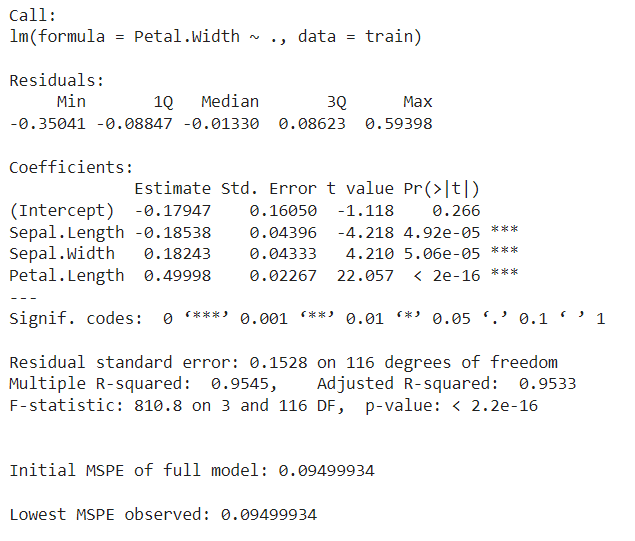

**Diagnostics:**

The diagnostic checks on the best-performing linear regression model present some concerns. Despite the residual plot not clearly showing heteroscedasticity, a statistical test indicates we might have non-constant variance. The test for independence, supported by the spread of residuals, suggests the data points may not be entirely independent. Moreover, the linearity assumption is questioned by the shape of the residuals versus fitted values plot. Lastly, the normality of residuals, as judged by a QQ plot, appears to be violated at the tails, indicating that the data may not be normally distributed. These findings suggest that while the linear model is a good fit, it's not perfect, and adjustments or alternative models might be needed to better meet the assumptions of linear regression.

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAIAAAByhViMAAAACXBIWXMAABJ0AAASdAHeZh94%0AAAAgAElEQVR4nOzdeXxU9b3/8XNmn8lMMlnIRoCELWHHALIHEDcExKXWrYXiBq2Ky8VW64J7%0AbbUKtVoLilKr4lUURRRUFgUFDSqrbElYQiQBss1kktnn98f5dZobIE7CJCfz5fX8gwfnm3PO%0AfM45M2fec873nCOHQiEJAAAAsU+jdgEAAACIDoIdAACAIAh2AAAAgiDYAQAACIJgBwAAIAiC%0AHQAAgCAIdgAAAIIg2LXGvffeK8vySy+91Mw4W7dulWV5/Pjx0X3pBx54QJblv//979GdbfuI%0AZL1FS1TWf0yvbQDAWSjmg53y/X0yi8WSl5d36623FhUVRf1FExMTu3XrZrPZoj7nGHW6rRB2%0A5513Sqdab6+//vqHH37YeFYnt8QcARYBABCjdGoXEB1Wq3Xy5MnhwVAoVFFRsX379hdffPHV%0AV1/98MMPzz///Ci+3B/+8Ic//OEPUZyhGOLi4k63ngcMGCCdar39/ve/nzx58qWXXtpMS8wR%0AYBEAADFKkGCXlpa2dOnSJo319fVz5879xz/+ceONNx44cECjifnDkx1cenr68uXLIx+/pKSk%0AvLy8+ZaYI8AiAABil8hZx2Kx/P3vf4+Pjz98+PCOHTvC7aFQ6OWXXx45cqTNZjObzX369Hnw%0AwQddLlfjad99993zzjsvKSnJYDBkZmZOmjTpk08+Cf/15L5ihw4duuaaa1JSUiwWy+DBgxcv%0AXtykmNtuu02W5ddee61x4+bNm2VZnjJlSrjF4XDcd999ffr0MZvNRqOxV69e99xzj8PhaGYx%0Amy+1ifHjx8uyvGLFiibtH330kSzLEydObMU8I9d4vf3iF7/o0aOHJEmvvPKKLMtjxow5uUWZ%0AKpLt9bPr/2R33323LMvvvffeunXrxo0bl5CQYLPZCgoK1qxZ08xUPp9vwYIFw4YNs9lsJpOp%0AZ8+et912208//aT89XSL0EbrEwCAJgQ5Ync6Go0mNTXV4XB4PJ5w4/Tp0//9739nZGTMmjXL%0AaDSuXbv28ccf/+ijj7788kul+9eiRYtuueWWTp06/fKXv0xNTS0rK1u+fPnkyZOXLFny61//%0A+uRXqa6uHjt2bGlpaUFBQUFBwfHjx++///5Jkya1tFqfzzdlypQNGzYMGTLktttu8/l8q1at%0AeuaZZ7744otNmzZptdqTJ2lpqdddd90XX3yxbNmyqVOnNm7/3//9X0mSlElaOs/WmTlzps1m%0Ae+2110aMGHH11Vd37tzZYrE0aVHG/Nnt1br1bzAYJElat27dK6+8csEFF9x8881FRUUffvjh%0ARRdd9Pnnn5/yqotgMDht2rRPPvkkLy/vxhtvjI+P37JlywsvvPDee+9t2rSpW7duJy9Uu61P%0AAAAkSZJCMe6HH36QJKlHjx6n/OvevXs1Go1er6+pqVFa3n77bUmShgwZ4nA4lJZgMHjbbbdJ%0AknTvvfcqLUqHsKKiovB8SktLbTbbiBEjlEGlo9g//vEPZfChhx6SJOnqq68Oj3/06NH09HRJ%0AksaNG6e03HrrrZIkvfrqq43L27RpkyRJkydPVgaXLVsmSdKIESP8fr/S4vF48vLyJEn68MMP%0AlZb7779fkqTnn38+wlKbqKqqMhgMiYmJXq833Oh2uxMSEsxms7JOWjrP0M9thbAm6+2dd96R%0AJOnGG28Mj3BySyTbK5L1fzJlTWo0mhUrVoQbn376aWUTNB4nvLYXLlwoSdLIkSPdbnd4kgce%0AeECSpF/+8penW4RWrE8AAFpH2FOxFRUV77///uTJk4PB4C233JKQkKC0L1q0SJKkP/3pT+Fr%0AM2VZfuyxx/R6/ZIlS5SWmpoaWZbj4uLCc8vKyjpx4oSSw072wQcfSJKkXPipSE9P/+1vf9vS%0AmvPz8997773nn38+fHDOYDBMmzZNkqTt27efcpKWlpqYmHjRRRdVV1evXbs23Lhq1ara2tpp%0A06Yp66Sl82xTkWyvM1n/I0eObHwq/Pbbb7dYLN98801VVdXJIyuv+OCDDxqNxnDjPffcYzAY%0Ali9f3tDQcMqX6FDrEwAgNkGCXXFxcZP7a6Snp19xxRVFRUU33njjs88+Gx5z8+bNkiSNGjWq%0A8eR2u71///5Hjx49fPiwJElTp04NhUITJkxYvHhxuCO8cubuZMFgcPfu3ZIkDRo0qHH78OHD%0AW7oU2dnZl19++dChQyVJcjqd5eXl5eXlFotFkqTThYYWlaq47rrrJEl69913wy2Nz8O2bp6K%0Ak7dC2EcfffSzk5/Sz26vM1z/o0ePbjxoNBp79uwZCoWOHDnSZMxQKPTdd9+dXEx8fHxubq7X%0A6921a9cpX6LV6xMAgJYSpI9dk9udlJWVbdy4MS8v77333uvTp0+4vaGhoa6uThn/lPMpKyvr%0A2rXr/PnzA4HA4sWLb7zxRkmS+vbtO2XKlNmzZ+fk5Jw8SV1dndfrNZlMZrO5cXtycnIrFmT5%0A8uXPPPPMd99953a7Ixm/RaUqLr30UqvVunz58pdeekmr1brd7hUrVqSmpl544YWtnqfCYrGM%0AHTv2lH9KTU2NZHGaiGR72e32M1n/aWlpTVoSExMlSaqoqGjSXldX53a7DQZD+OhvWKdOnSRJ%0AOnHixClfotXrEwCAlhIk2DW53UlDQ0P//v337Nlz6NChxsFOlmXlX6VX1smUjll6vf6ll16a%0AN2/ehx9++Mknn6xdu/Yvf/nL/PnzX3/99V/+8pdNJgmFQuF/GwsEAi1dioULF86aNctms82e%0APfvcc89NSEjQaDTLly//5z//ebpJWlSqwmKxTJs27Y033vjiiy/OO++8jz/+2Ol0zpw5U6fT%0AtXqeioyMjFWrVrV0qZsRyfY6w/V/8k1wlFmdfKmKUszJLyRJUjAYDI9wslavTwAAWkqQYNeE%0A2Wx+4YUXJk2aNGvWrJ07d4a7Z5lMpoSEhNra2ltvvVU5ytIM5TLMWbNmud3u11577fbbb581%0Aa9a0adMa96+SJMlqtWq1Wo/H09DQ0PigUZObmZ0yFhw9erTx4KOPPipJ0kcffVRQUBBujKQn%0AVoSlhl133XVvvPHGsmXLzjvvPKWz/8mXZ7Z0nm0hku0VCAQiWf+nU1lZ2aSlpqZGOtWRPKvV%0AarFY6uvra2pq7HZ74z8dP35c+s9xu9PpCOsTACA8QfrYneziiy++6qqrDh8+3ORRB0rXqy+/%0A/LLJ+I07yx86dKhx5DKZTLNnzx41alRNTU1JSUmTCbVaba9evaSTrm/YuHFj40GTySRJUnV1%0AdePGwsLC8P89Hk9ZWZnVam2c6kKhUPPHwFpUatiFF16YkpKyYsWKhoaGFStW5OXlKR37zmSe%0AbeRnt1eE6/90vv3228aDTqdzz549Wq22S5cuJ4+srKWvvvqqSSV79+41m839+vU75Ut0qPUJ%0AABCbsMFOkqT58+fHx8e/9NJLjWOB0s/p4YcfVo6yKDZs2JCWlnbVVVdJkrRt27bs7Oxf/epX%0AXq83PILT6SwpKdFqtafsK3bJJZdIktT4Eo0DBw688sorjcfp3r279J+7ligtu3fvVi75VBiN%0AxqSkpLq6utLSUqUlFAo9+uijyvUcymGkJlpRqkKn01111VWlpaXPPfecy+X61a9+debzbAUl%0A7DY+ZnZyy89uLymy9X86a9asUa7PULz22mter7egoCA+Pv7kkZVinnzyycYr58knn/T7/ddf%0Af71y7K3JIrTn+gQAQPD72C1YsECSpJ49e9bX14cbr732WkmSOnfufPfdd8+bN+/KK6/U6/U2%0Am+2bb75RRlCuG+3evfutt9760EMP/e53v+vWrZskSXfccYcyQpP7sZWVlaWkpEiSNHTo0Ntv%0Av/2aa65JSEiYO3eu1Og+ahUVFUpWGDly5F133XXNNddYrVblrmmTJk1Sxrn77rslSerVq9fj%0Ajz/++OOPjxgxIjc3d/Xq1ZIkJScnP/XUU6WlpU3urPazpZ7Ohg0bJEmy2WyyLB84cKDxn1ox%0Az9bdx66oqEiWZb1ef8MNN8yePfuULZFsr0jW/8mUNTljxgybzTZjxozHHnts+vTpWq1Wr9dv%0A2rSp8Tjhta3coFiSpP79+99zzz1//OMflWd19O7d+8SJE6dbqFZvIwAAWkrwYBcIBIYMGSJJ%0A0v/8z/80bly0aJHyiCqdTpeVlTV9+vTdu3c3HuGFF14YNWpUSkqKVqtNSEgYO3bs4sWLg8Gg%0AMkKTgBIKhXbv3j1t2jS73W4ymQYMGLBo0SLlmM3w4cPD4+zYseO8886zWCxWq3X48OHLly9X%0AjkKNHz9eGaGhoeH+++/v0aOH0Wjs0qXL7373OyUu/OY3v4mLi0tPT9++fXuTqPGzpZ5OMBjM%0Azs6WJGns2LEnr7SWzrN1wS4UCj311FMpKSlGozE/P/90LT+7vUKRrf8mlDX54osvfv755+PG%0AjbNarVarddy4cV9++WWTccJrOxQK+Xy++fPn5+fnWywWo9GYl5d33333VVdXN55zk0Vo9TYC%0AAKCl5NCprvIDhPfAAw888cQTzz//vPIcCwAABCByHzsAAICzCsEOAABAEAQ7AAAAQRDsAAAA%0ABMHFEwAAAILgiB0AAIAgCHYAAACCINgBAAAIgmAHAAAgCIIdAACAIAh2AAAAgiDYAQAACIJg%0ABwAAIAid2gWcEZfL5ff7WzSJLMsWi8Xv93s8njaqSkU6nU6j0Xi9XrULiT6DwaDX691udyAQ%0AULuW6DObzW63W8i7hcfFxQWDwYaGBrULiT6NRqPX60XdkxiNRo/H09IdbEwwGo1+v1/UPYlG%0Ao3G5XGoXEn2yLJtMJlH3JGaz2efzRf7drdFobDbb6f4a28HO7/f7fL4WTaLVanU6XSAQaOmE%0AMUGr1YZCISEXzWAwCLzh4uLi/H5/MBhUu5Do02q1kiQJudV0Op3BYBBy0ZT9pNvtFnLpTCaT%0AwHsSnU4n5KLJshwXFyfkoul0OmWrRb50yn71dDgVCwAAIAiCHQAAgCAIdgAAAIIg2AEAAAiC%0AYAcAACAIgh0AAIAgCHYAAACCINgBAAAIgmAHAAAgCIIdAACAIAh2AAAAgiDYAQAACIJgBwAA%0AIAiCHQAAgCAIdgAAAIIg2AEAAAiCYAcAACAIgh0AAIAgCHYAAACCINgBAAAIgmAHAAAgCIId%0AAACAIAh2AAAAgtC154vV1dUtXLhw+/btPp8vNzd39uzZqampJ4/28ccfv//++5WVlZ07d54+%0AffqwYcPas0gAAIAY1a5H7ObPn3/s2LF58+Y9/fTTFovl0UcfDQaDTcZZs2bN22+/PWvWrJde%0Aeun8889ftGhRfX19exYJAAAQo9ov2J04caKwsPCWW27JycnJzMycPXt2WVnZjh07moz29ttv%0Az5gxY+jQoampqdOmTVu4cKHFYmm3IgEAAGJX+wW7/fv36/X6nJwcZdBqtWZlZe3du7fxOJWV%0AleXl5ZIkzZkz56qrrpo7d+6ePXvarUIAAICY1n597BwOh81mk2U53JKQkFBbW9t4nMrKSkmS%0APv/889///vcJCQlLly595JFHXnrppYSEBGWEzZs3/+lPfwqP/8gjjwwYMKAVxRgMhsTExNYs%0ARscmy7Isy0ajUe1Cok+j0UiSZLPZQqGQ2rVEn0ajsdvtQi6aLMtarVbgj5uoiyZJksViMZvN%0AatcSfRqNRq/XC/lxU/aTQr4nJUkSeE8iSZLJZDIYDBFO0vy7t10vnmic6ppx9dVXZ2VlSZJ0%0Aww03rFu3bsuWLRMnTlT+5Pf7nU5neMxAIKC8j1tRSesmjAlCLpry5lG+StWuJfrCS6d2IW1C%0A4I+bwIsm8XGTJEmSnE5nSUmJ2+1OT0/v1q1bG5d2ppSFEvg9KfCitWhncvL1CY21X7Cz2+0O%0AhyMUCoU/TrW1tU3Sd1JSkiRJcXFxyqBWq01KSqqurg6PMGbMmLVr14YHa2trlYN8kVMiv8fj%0AaRwQhWEymTQajZCXm8TFxZnNZofD4fP51K4l+pRPR/Of1RiVnJwcCARqamrULiT6dDqd2WwW%0AdU9itVpdLpfb7Va7luiz2WxutzuSPcmPP/746aeffvPNN3q9vq6u7tprr73sssv0en07FNk6%0Adrtdp9O19GsxJsiybLfbG+cBYeh0Orvd3tDQ4HK5Ipyk+YOX7Rd+e/Xq5fP5iouLlUGHw1Fa%0AWtqnT5/G4yQlJSUmJob71Xm93uPHj6elpbVbkQAASJJUWVm5evXqn3766Zxzzunfv/+QIUOW%0AL1/+xRdfqF0X8DPaL9glJSWNHDnyhRdeOHDgQFlZ2XPPPdejR4++fftKkvTZZ5+tWLFCkiSN%0ARjN16tSlS5du3br1xIkT//znP00mE/exAwC0s927d2/fvj0lJUUZ1Ov12dnZO3fuFLJzHkTS%0Arn3s5syZs3DhwocffjgQCPTr1++BBx5QTstu3brV4XBMnTpVkqQrrriivr7+2Wefraury83N%0Affzxx00mU3sWCQBAfX19kwvRjEaj1+v1+XyRd3IH2l+7BjuLxXLnnXee3H7PPfeE/6/RaKZP%0Anz59+vR2rAsAgP8jMTGxSQdKh8ORkpJCqkMHJ+wFJgAAtNqAAQPGjh1bVFTk9XqDwWBVVdXB%0AgwdHjx6tdl3Az2jXI3YAAMQEk8n0i1/8wmazlZWVffXVVxMmTLjyyisHDRqkdl3AzyDYAQBw%0ACikpKddff319ff1NN91kt9sFvokaREKwAwDgtCwWC48sRwzh9wcAAIAgCHYAAACCINgBAAAI%0AgmAHAAAgCIIdAACAIAh2AAAAgiDYAQAACIJgBwAAIAiCHQAAgCAIdgAAAIIg2AEAAAiCYAcA%0AACAIgh0AAIAgCHYAAACCINgBAAAIgmAHAAAgCIIdAACAIAh2AAAAgiDYAQAACIJgBwAAIAiC%0AHQAAgCAIdgAAAIIg2AEAAAiCYAcAACAIgh0AAIAgCHYAAACCINgBAAAIgmAHAAAgCIIdAACA%0AIAh2AAAAgiDYAQAACIJgBwAAIAiCHQAAgCAIdgAAAIIg2AEAAAiCYAcAACAIgh0AAIAgCHYA%0AAACCINgBAAAIgmAHAAAgCIIdAACAIAh2AAAAgiDYAQAACIJgBwAAIAiCHQAAgCAIdgAAAIIg%0A2AEAAAiCYAcAACAIgh0AAIAgCHYAAACCINgBAAAIgmAHAAAgCIIdAACAIAh2AAAAgiDYAQAA%0ACIJgBwAAIAiCHQAAgCAIdgAAAIIg2AEAAAiCYAcAACAIgh0AAIAgdGoXcEY0Go1O17JF0Gg0%0AkiTJstzSCWOCRqNpxTqJCcqG02q1oVBI7VqiT5ZlrVarLKN4RP246XQ64T9uQi6d8nETdU8i%0ASZKoW00SdNG0Wq3UwjzT/JdFbK8jg8HQ0knCbw6z2dwGFalMq9XKsqwso2CUd7zRaNTr9WrX%0AEn0ajcZsNov6TaMsndqFRJ9Go9FqtUIumvJNo9frhfyxodVqBd6TSJIk5HtS+s9+Uu0qoi/q%0AsSS2g53b7fb5fC2aRKvVGgwGn8/ndDrbqCoVmUwmjUZTX1+vdiHRFxcXZzab6+vrW7rFY4Ld%0Abq+rqwsGg2oXEn0GgyEQCAj5cVN2xEIumslkslqtbrfb7XarXUv02Wy2Vnx3xAS73a7T6YR8%0AT8qybLfbhVw0nU5nMBi8Xq/L5YpwEuXHyen+KuCvMQAAgLMTwQ4AAEAQBDsAAABBEOwAAAAE%0AQbADAAAQBMEOAABAEAQ7AAAAQRDsAAAABEGwAwAAEATBDgAAQBAEOwAAAEEQ7AAAAARBsAMA%0AABAEwQ4AAEAQBDsAAABBEOwAAAAEQbADAAAQBMEOAABAEAQ7AAAAQRDsAAAABEGwAwAAEATB%0ADgAAQBAEOwAAAEEQ7AAAAARBsAMAABAEwQ4AAEAQBDsAAABBEOwAAAAEQbADAAAQBMEOAABA%0AEAQ7AAAAQRDsAAAABEGwAwAAEATBDgAAQBAEOwAAAEEQ7AAAAARBsAMAABAEwQ4AAEAQBDsA%0AAABBEOwAAAAEQbADAAAQBMEOAABAEAQ7AAAAQejULgAAAKEcPXp0z549LpcrJSVl8ODBJpNJ%0A7YpwFiHYAQAQNYWFhU8++WRycrLBYHA6neeee+51112XnJysdl04WxDsAACIjsrKyg0bNvTt%0A2zchIUFp2bVr18qVK6dPn65uYTh70McOAIDoKCkp2bp1azjVSZKUlZW1bNmyuro6FavCWYVg%0ABwBAdPj9fq1W27hFGfT5fCpVhLMOwQ4AgOhIT093OBxerzfcUllZecEFFzQ+hge0KYIdAADR%0AkZ2dff311+/atevEiRNOp/PIkSMlJSUTJ07UaPi2RTvh4gkAAKJDluWpU6empqbu3r3b5XLl%0A5ubOmTOnZ8+eateFswjBDgCAqNHr9WPGjBkzZozaheAsxcFhAAAAQRDsAAAABEGwAwAAEATB%0ADgAAQBAEOwAAAEEQ7AAAAARBsAMAABAEwQ4AAEAQBDsAAABBEOwAAAAEQbADAAAQBMEOAABA%0AEAQ7AAAAQbRrsKurq3v22Wd/85vfXH/99Y8++uixY8eaGXnNmjWXXnrp5s2b2608AACAmNau%0AwW7+/PnHjh2bN2/e008/bbFYHn300WAweMoxa2pqlixZYjAY2rM8AACAmNZ+we7EiROFhYW3%0A3HJLTk5OZmbm7Nmzy8rKduzYccqRX3rppfHjx1sslnYrDwAAINa1X7Dbv3+/Xq/PyclRBq1W%0Aa1ZW1t69e08ec9OmTcXFxdddd1271QYAACAAXbu9ksPhsNlssiyHWxISEmpra5uMVldX99JL%0AL911110mk+nkmRw+fHjdunXhwYKCgtTU1BaVoRSg1WrNZnOLJowJer1elmUhF02n00mSZDQa%0Alf8IRqPRmEymUCikdiHRJ8uyRqMR8j2p0WhE3ZMonzJlf6J2LdGn1WoF3pNIkiTke1KWZVG/%0A3ZStptPpIl+65j+Y7frOjmQf8corr+Tn5w8ePPiUfy0uLn7++efDg3369AkfAmwRnU4n5Kda%0Aodfr1S6hrZwy7otB4I4HGo0mLi5O7SraisB7EqPRaDQa1a6iTQi81SRJEvjjJvCi6fX6yL+7%0AT3d9gqL93tx2u93hcIRCoXC8q62tTUxMbDzO1q1bv//++7///e+nm0m/fv2eeuqp8GDnzp2d%0ATmeLylC+Y/x+f0NDQ4smjAnKL2yv16t2IdFnNBoNBkN9fX0gEFC7luizWCwNDQ1CHrGzWq2h%0AUMjlcqldSPRpNBqDweB2u9UuJPr0er3JZHK73T6fT+1aos9kMvl8PlH3JFqttqVfi7EiLi5O%0AyD2JVqu1WCxer9fj8UQ4iSzLVqv1dH9tv2DXq1cvn89XXFzcs2dPSZIcDkdpaWmfPn0aj/PZ%0AZ5+5XK7Zs2crg3V1dc8999zgwYPvu+8+pSU1NfX8888Pj19bWxv5ilBotdq4uLhAINDSCWOC%0ActpLyEVTfmH7fD4hv2nMZrPX623+R1iMslqtwWBQ1PekTqcTctGUn99+v1/IpTMYDALvSSRJ%0AEnKrybJssViEXDSdTmexWFoUS7RabXMzjEZVEUlKSho5cuQLL7wwZ84cg8Hw8ssv9+jRo2/f%0AvpIkffbZZ263e+rUqbNnz545c2Z4krvuumv69OnDhw9vtyIBAABiV7v2M5gzZ87ChQsffvjh%0AQCDQr1+/Bx54QPlduHXrVofDMXXqVJvNZrPZwuPLsmyz2eLj49uzSAAAgBjVrsHOYrHceeed%0AJ7ffc889pxz/X//6VxtXBAAAIA6eFQsAACAIgh0AAIAgCHYAAACCINgBAAAIgmAHAAAgCIId%0AAACAIAh2AAAAgiDYAQAACIJgBwAAIAiCHQAAgCAIdgAAAIIg2AEAAAiCYAcAACAIgh0AAIAg%0ACHYAAACCINgBAAAIgmAHAAAgCIIdAACAIAh2AAAAgiDYAQAACIJgBwAAIAiCHQAAgCAIdgAA%0AAIIg2AEAAAiCYAcAACAIgh0AAIAgCHYAAACCINgBAAAIgmAHAAAgCIIdAACAIAh2AAAAgiDY%0AAQAACIJgBwAAIAiCHQAAgCAIdgAAAIIg2AEAAAiCYAcAACAIgh0AAIAgCHYAAACCINgBAAAI%0AgmAHAAAgCIIdAACAIAh2AAAAgiDYAQAACIJgBwAAIAiCHQAAgCAIdgAAAIIg2AEAAAiCYAcA%0AACAIgh0AAIAgCHYAAACCINgBAAAIgmAHAAAgCIIdAACAIAh2AAAAgiDYAQAACIJgBwAAIAid%0A2gUAAICzRW1t7fbt2x0OR0JCwoABAxISEtSuSDQEOwAA0B5KSko++OCDbdu2WSyW+vr6QYMG%0ATZs2rXv37mrXJRROxQIAgDbn9Xo//vjjw4cP9+3bNzs7u2/fvqWlpR9//LHX61W7NKEQ7AAA%0AQJs7evTo+vXrMzIywi3p6enr168vKytTsSrxEOwAAECb8/l8Wq22SaNWq/X5fKrUIyqCHQAA%0AaHOpqakej6euri7c4nK5PB5PWlqailWJh2AHAADaXHx8/N1337179+6Kioq6urqKiordu3ff%0AddddXBgbXVwVCwAA2sOYMWOsVusPP/xQW1vbtWvX66+/fvDgwWoXJRqCHQAAaA8ajSY/Pz8/%0AP1/tQkQmh0IhtWtoPa/Xq9G0+GyyTqcLhUKBQKAtSlKXsjaCwaDahUSfRqPRaDSBQCCm37Gn%0Ao9VqhXxDSkJ/3GRZVt6TahcSfcrHLRgMCrkz0Wq1wWBQ1D2JLMt+v1/tQtqEqPtJWZaV92Tk%0AH7dQKKTX60/319g+Yud2u1t6NY1Go0lMTPR6vY37bwrDaDRqtdr6+nq1C4k+i8ViNptdLpeQ%0A108lJCQ4nU4hv0STkpKCwWBtba3ahUSfTqczm81Op1PtQqLPaDRardaGhga32612LdFntVo9%0AHo+oexKdTifkx02W5YSEBCEXTafTJSQkeL1el8sV4SRardZut592hlEqTB2hUKjVv7qE/Lkm%0Andk66fgEXjoWLeaE/kPtQtqKwEsn8KJJ4n67SYIumrJQLXpPNj8mV8UCAAAIgjKxHtsAACAA%0ASURBVGAHAAAgCIIdAACAIAh2AAAAgiDYAQAACIJgBwAAIAiCHQAAgCAIdgAAAIKI7RsUAwDQ%0AWH19/aZNm44cOaLRaLp27TpixAij0ah2UUD7IdgBAATR0NCwZMmSzZs3d+rUKRQKrV69ev/+%0A/dOnTzcYDGqXBrQTgh0AQBBffvnl5s2b+/XrpwympqauW7cuNzd37Nix6hYGtBv62AEABFFa%0AWpqWlhYelGU5NTX1yJEjKpYEtDOCHQBAELIsN3k+eigUkmVZrXqA9kewAwAIIjs7u7y8PJzt%0AgsFgRUVFt27d1K0KaE/0sQMACGLMmDElJSXr169XLp44duzYpEmThg0bpnZdQPsh2AEABGE0%0AGmfMmNG3b98jR47IspydnZ2fn6/T8U2Hswhvd0AEP/30086dO51OZ1JS0jnnnGO329WuCFCH%0AwWAYPXq02lUAqiHY4f9wOBxffvllSUlJIBDIyMgoKCjIzMxUuyj8jB9++OHRRx9NSUkxm811%0AdXVbt2698soru3btqnZdAID2RrDDf3k8nqVLl27atCkzM1Or1e7fv//o0aPXX399amqq2qXh%0AtBwOx/r16/Py8hITE5WWgwcPrly5ctasWRoNV0cBwNmF/T7+a8uWLV9++WVeXl5CQoLVas3O%0Azt63b9+6devUrgvNOXz4cGFhYTjVSZKUkZHx6aefHj9+XMWqAACqINjhvyoqKpKSkhrf8ykp%0AKamiokLFkvCzAoFAkyNzGo1GluVAIKBWSQAAtRDs8F8Gg8Hv9zduCQQCPGOxg8vMzHS5XPX1%0A9eGWysrKgoKClJQUFasCAKiCYIf/6tmzZ0VFhdvtVgaDweCRI0d69eqlblVoXqdOnW677bZd%0Au3YdPXq0urq6tLR0//795513HokcAM5CXDyB/8rLy7vpppsWLVqUnJys1Wqrq6svueQSHp7d%0A8U2YMCE5OXnHjh0OhyM5OXno0KE9e/ZUuygAgAoIdvg/Jk2alJeXd/DgQa/X27lz5759+3Jl%0AZcen0WgGDx48ePBgtQsBAKiMYIemcnJycnJy1K4CAAC0GAdjAAAABEGwAwAAEATBDgAAQBD0%0AsQMAnBXq6+t37NjR0NBgNpt79+7d+HktgDAIdgAA8f3000/vvPPOli1bEhMT6+rq+vfvP3ny%0A5NzcXLXrAqKMYAcAEFwwGFy5cuX+/fsHDBhgNBr9fv9PP/20atWqLl26WCwWtasDook+dgAA%0AwR0/fvzjjz/OysoKt6Smpm7atOnQoUMqVgW0BY7YAQAE5/P5ZFlucrt1nU7n8/nUKgktUl1d%0AvXHjxoMHD1osltzc3D59+siyrHZRHRTBrjl+v/+77747cOCA1+vNyMgYMWKEzWZTuygAQMuk%0ApKSMHj26qqoqISFBaXG73S6XKy0tTd3CEIny8vK33npr3759ZrPZ5/O98cYbN99880UXXaR2%0AXR0Uwe60gsHgO++888EHH2RkZGi12nXr1u3evXvGjBnh/QIAICaYTKbRo0c/88wz3bp1S05O%0AdjqdBw4cuOWWW6IY7Lxe76ZNm/bv3+/1etPS0kaPHp2enh6tmZ/lPvnkk+Li4r59+zY0NEiS%0A1KlTp3/+8599+/bt0qWL2qV1RAS709q2bdvy5csHDx6s1WolSUpNTd2+ffuaNWuuuOIKtUsD%0AALTM8OHDH3zwwcLCwvr6+tTU1EsvvXTYsGHRmnkwGHz33XdXrlyZmZmp0+l27Nhx6NCha665%0AJjMzM1ovcdZqaGg4fvx445RsMpnsdvuhQ4cIdqdEsDutI0eOpKSkKKlOkZaWVlpaqmJJAIDW%0AkWV50KBBgwYNslqtHo8nur3rdu3a9cEHH4QPBCQmJpaUlHz++efTp0+P4qucnUKhkCRJTXrU%0AybKstONkXBXbHN43ACCYtuh0/9NPPyUmJjY+EJCSklJRUREIBKL+Wmcbi8WSnJxcXl4ebvF4%0APNXV1V27dlWxqo6MI3an1bVr1xMnTmRlZel0/38tlZeXR/HQPQBADDqdrkmGCwaDGo2GKzej%0A4uKLL66trd2zZ4/FYvF6vUePHr3xxhu7deumdl0dFMHutAYMGHDFFVcsX748LS1Nq9VWVlYO%0AGzZs4sSJatcFAOhYunfvXllZ2aVLF5PJpLSUlZUNHjy4yQ1W0DqdO3eeMWPGjh07Dhw4YLFY%0A8vLyBg4cqHZRHRfB7rQ0Gs1VV13Vs2fPkpISv9+fkZFx7rnnxsXFqV0XAKBjycnJmTVr1sKF%0AC1NTU3U6XXV19ahRoy644AK16xJHSkrK5ZdfXl1drXYhMYBg1xytVjt06NChQ4eqXQgAoEO7%0A6KKLunfvXlxc7Ha709LS8vPzjUaj2kXhbESwAwAgCnr16tWrVy+1q8DZjtP/AAAAgiDYAQAA%0ACIJgBwAAIAiCHQAAgCAIdgAAAIIg2AEAAAiCYAcAACAIgh0AAIAguEFxB9LQ0FBYWHjs2DGj%0A0dizZ8+8vDweIA0AACJHsOsoamtr//WvfxUWFiYmJvr9/oqKipkzZ06ePFntugAAQMwg2HUU%0An3322bZt2/r3768MpqenL168uHfv3jygBgAARIg+dh1CKBQ6dOhQZmZmuMVoNCYnJx88eFC9%0AogAAQIwh2HUIoVAoGAw26VGn0WiCwaBaJQEAgJhDsOsQNBpNZmbm8ePHwy1+v7+qqqpz584q%0AVgUAAGILfew6ivPPP7+iomLPnj1JSUkej6ekpGTs2LEJCQmhUIhrYwEAQCQ4YtdRpKWlTZ8+%0AfcqUKSkpKU6ns76+/vvvv7/jjjveeuut+vp6tasDAAAxgCN2HUhKSspFF11UVlZmNBrPP/98%0AWZb9fv/q1atNJtMVV1yhdnUAAKCj44hdx1JcXPzFF19069ZNOf2q0+l69uy5ZMmSuro6tUsD%0AAAAdHcGuY3G5XEajsXGL0WjUaDQul0utkgAAQKwg2HUsdru9vr6+8V1OXC7X6NGjExISVKwK%0AAADEBIJdx5KTkzN58uT9+/d7vV5Jklwu1759+wYPHmwymdQuDQAAdHTtevFEXV3dwoULt2/f%0A7vP5cnNzZ8+enZqa2mScqqqqxYsXb9u2zev1du/efebMmb17927PItWl0+kuu+wyk8n01ltv%0AabXaUaNG3XDDDePHj1e7LgAAEAPaNdjNnz+/rq5u3rx5RqPxzTfffPTRR//2t79pNP/nqOHj%0Ajz9uMBgeeeQRs9msjPPyyy+fVcer7Hb7Nddcc8kll9TV1SUlJZ1Vyw4AAM5E+52KPXHiRGFh%0A4S233JKTk5OZmTl79uyysrIdO3Y0HsfpdHbq1OnWW2/t3r17RkbG9OnTHQ5HaWlpuxXZccTH%0Ax2dmZpLqAABA5NrviN3+/fv1en1OTo4yaLVas7Ky9u7dO2jQoPA4NpvtvvvuCw9WVlZqNJqU%0AlJRwi9/vb3y33pOfrxo5IR/nIP+H2oW0FYGXjkWLOcpCCbloClE3nCT0okmCvicF/riFFy3y%0ApWt+zPYLdg6Hw2azNa4mISGhtrb2dOM7nc7nn3/+sssuS0xMDDdu2LDhnnvuCQ+++OKL5557%0AbiuKMRqNTe4qIhKz2ax2CW0lPj5e7RLaSuP3uWC0Wm1ycrLaVbQVgfckcXFxcXFxalfRJgTe%0AapIkCfxxE3jRTCZT5OfoGt8642Tt2scu8jR65MiRxx57bPDgwTNmzGjcnpSU1DjJWSwWn8/X%0A0hp0Ol0wGAwEAi2aMCYoHRab3+QxSqvVajQav98fCoXUriX6dDqd3+9Xu4o2odfrQ6GQkEsn%0Ay7JGoxF1T6LVagOBgKg7k2AwKOqeRJblln4txgpR95OtiCWhUMhgMJzur+0X7Ox2u8PhaPxI%0A+9ra2lMepdi2bdtf/vKXa6+9dsqUKU3+NGjQoBdffDE8WFtb28wxv1PSarWJiYk+n8/pdLZw%0ACWKAyWTSaDRCPls2Li7ObDa7XC4h91l2u93pdAr5JZqcnBwIBFr6OY0JOp3ObDaLuiexWq0N%0ADQ1ut1vtWqLPZrO53W5R9yQ6nU7Ij5ssy3a7XchF0+l0drvd4/FE/iQCrVbbTLBrv4snevXq%0A5fP5iouLlUHlqog+ffo0Ge3HH3/885//fPfdd5+c6gAAANCM9gt2SUlJI0eOfOGFFw4cOFBW%0AVvbcc8/16NGjb9++kiR99tlnK1askCTJ6/XOnz//0ksv7dat24n/EPInIwAAQNS1ax+7OXPm%0ALFy48OGHHw4EAv369XvggQeU07Jbt251OBxTp07dvXt3eXn5m2+++eabb4anmjVr1uTJk9uz%0ATgAx4cSJE99//31VVVV8fPzAgQOzsrLUrggAVCbHdAfS2tralvaTUPrYeTweUXvGiN3HrhVb%0APCYoPVAF7mNXU1MT9TkXFxcvX7589+7dVqvV7XZXVFQ8+OCD+fn5UX+h0xG+j11dXZ2QJ0yE%0A72N34sQJtQuJPqWPXXV1tdqFRJ/Sx66hoaFFfeyauZFCux6xA4Co8Pv9n3zySVlZWfiRg0lJ%0ASevXr+/Zs6fA98QBgJ/Vfn3sACBajh8/vnbt2rS0tHCL3W4vLCw8Ox9UAwBhBDsAsUc5bd3k%0A1pgajUbI09kAEDmCHYDY06lTp4KCgsZ9iVwuV319fefOnVWsCgBUR7ADEHsMBsPEiROLiooO%0AHTpUVVVVVla2a9euO++8MykpSe3SAEBNXDwBICYNGDDg2WefLSwsrK6uVm53cvINzwHgbEOw%0AAxCrsrOzs7Oz1a6iNUpLS7dt2+Z0Ou12e35+fuOrQADgTBDsAKBdff/994899lhaWpry+OOF%0ACxc+9dRTubm5atcFQAQEOwBoP06nc/369Xl5eeH7i8bHx69evbp79+56vV7d2gAIgIsn8F+h%0AUKi0tHTr1q1FRUVer1ftcgABHTly5Ntvv2181/jU1NT169eXl5erWBUAYXDEDv9ffX39+++/%0Av2zZsri4OI/HM2HChClTpnTp0kXtugDRNLn9ntIS0093BNBxRBrs6uvra2trMzIyJElqaGh4%0A++23KysrL7/88u7du7dleWg/q1ev/vTTT4cOHarT6SRJ+vHHH4PB4I033mgymdQuDRBHRkaG%0A2+12Op02m01pqaysHDt2bHp6urqFARBDRKdi9+zZk5OTs2TJEkmS/H5/QUHBzJkz586dm5+f%0A/8MPP7RxhWgPLpdryZIlPXr0UFKdJEldunTZuHFjUVGRuoUBgrHb7ffcc8+PP/5YWlpaWVl5%0A6NCh/fv3n3feeQaDQe3SAIggoiN2999/f1pa2lVXXSVJ0tKlS7ds2fLiiy9eeOGF06dPf/LJ%0AJ9955502LhJtrr6+XpKkJgfnjEajy+VSqSJAWKNGjUpOTt62bZvD4bDb7cOGDevWrZvaRQEQ%0ARETBbuPGjc8991yPHj0kSXrvvff69+//29/+VpKkW2+99d57723bAtEu4uPjx44dW1NTEz49%0AFAwG6+vr7Xa7uoUBQsrNzeX+JgDaQkSnYmtqapTedYFAYP369ZdcconS3qlTp4qKijasDu3F%0AaDTm5+fv37/f6XRKkuT1evfv33/JJZcoaR4AAMSEiI7YpaWllZSUTJgwYe3atdXV1RdffLHS%0AXlpampyc3Jblof2MHTs2GAz+8MMPX331VTAYvO666y6++OJwlzsAANDxRfS1feGFFz7wwANF%0ARUVvvfVWjx49CgoKJEk6duzYggULRo8e3cYVop3odLqJEyeOHTv217/+dVxcnNVqVbsiAADQ%0AMhEFu8cee2zXrl1PPfVUSkrKihUrtFqtJElz5sw5dOjQ66+/3sYVol0ZDAYeWwkAQIyKKNhl%0AZGRs2rTJ4XCYzebwQ2/mzp27YMECQgAAAEAH0YIeVPHx8Y0Hhw4dGu1iAAAA0HrNBbu8vLxI%0AZrFnz54oFQMAAIDWay7YpaSktFsdAAAAOEPNBbuNGzc2P3FdXd3Ro0ejWg8AAABaKaIbFJ/O%0AN998M2LEiGiVAgAAgDMR6cUTK1eufOuttw4fPhwMBpWWQCCwa9cuo9HYZrUBAACgBSIKdkuX%0ALr322mt1Ol16evqRI0cyMzOrqqrcbveECRPmzp3b1iUCAAAgEhGdin3mmWcuvvjiqqqq0tJS%0ArVa7evVqp9P5t7/9LRQKjR07tq1LBAAAQCQiCnb79u277bbbbDabMhgKhXQ63e233z548OD7%0A7ruvLcsDAABApCIKdj6fT3mMmCRJcXFxNTU1yv+vvPLK999/v61KAwAAQEtEFOz69Onzyiuv%0AeL1eSZK6dOmyevVqpb2qqqq2trYNqwMAAEDEIrp44u677/71r39dXV39+eefX3HFFU8++eSx%0AY8eysrIWLlw4aNCgti4RAAAAkYgo2P3qV7/S6XQHDx6UJOnee+/dvHnzokWLJEnq0qXLggUL%0A2rQ+AAAARCjS+9hdc801yn8sFsunn35aVFTk8/l69uyp1+vbrDYAAAC0QKTBromePXtGtw4A%0AAACcoYiCXUpKyun+5PV6HQ5H9OoBAADtpLq6eseOHQ6HIyEhYeDAgQkJCWpXhDMVUbAbM2ZM%0Ak5ajR4/u2LGjR48e48aNa4OqAABA2yoqKvrwww937NhhsVhcLtegQYMuu+yynJwctevCGYko%0A2C1fvvzkxvLy8quvvnrSpEnRLgkAALQtj8fz8ccfl5WV9enTR2k5fPjwypUrb7nlFoPBoG5t%0AOBMR3cfulNLT0//617/OmzcvitUAAIB2UFZWtmHDhrS0tHBLRkbGunXrjh49qmJVOHOtD3aS%0AJGVlZf3444/RKgUAALSPxs+UCtNqtX6/X5V6EC2tD3ahUGjx4sXJyclRrAYAALSDtLQ0t9vt%0AcrnCLU6n89xzz01NTVWxKpy5iPrYDR48uElLIBAoLy8/ceLE3Llz26AqAADQhux2+5133vnC%0ACy907dpVuXiitLT0jjvusNlsapeGM9LK+9jp9fqBAwdOmzZt9uzZ0S0IAAC0g4KCgvj4+B9+%0A+MHhcOTk5MyYMWPgwIFqF4UzFVGw27p1a1vXAQA4Ja/Xu3fv3urq6vj4+N69e1ssFrUrgiA0%0AGk1+fn5+fr7ahSCaWnnE7qxVU1Pz7bffHj9+3GQy9e7du3///rIsq10UAGGdOHHinXfe+eKL%0AL+Li4txu9/Dhw6dNm9atWze16wLQQTUX7KxW689O7/P5PB5P9Orp0I4dO/bGG2/s3LnTbrc3%0ANDQsXbp0xowZU6ZMUbsuAGIKhUIffvjhtm3bzjnnHOU3ZHFx8UcffXTTTTcZjUa1qxOHw+H4%0A4YcfampqbDZb//79uXoAMa25YNc4smzdurWkpGTo0KGZmZmBQODgwYPbtm3Lz88fOXJk2xfZ%0AUaxevXrPnj0Gg+HAgQMHDx7s0qXLc889l5eXF5Un5wYCgZ07d5aVlWm12q5du+bl5XEsEDjL%0AHT9+fMWKFcOHDw/vDTp37vzFF19ccMEFvXv3Vrc2YZSWlr777rvbtm2zWq1ut7tv374XXHDB%0AgAED1K4LaKXmgt3SpUuV/7z77ru7du06dOhQRkZG+K979+697LLLLrzwwrYtsMPwer1Hjx6t%0Ar6/ft29fYmJiZmZmQ0NDeXn5Rx99dOedd57hzH0+35tvvvnxxx8nJycHg8ETJ05cd911l19+%0AOdkOOJt5PB6NRqPR/J/7UhkMBrfbrVZJggkGgytXrjxw4EDfvn2VlmPHjn3++efZ2dlcHIoY%0AFdF97B555JGHHnqocaqTJCk3N/eOO+548MEH26awjqiurm7nzp2dOnUyGo1ardZsNttstn37%0A9tXV1Z3hnDdu3Pjpp5+ec8452dnZ3bt3P+ecc5YuXbpt27aolA0gRiUlJY0YMaLxHsbr9dbX%0A16ekpKhYlUiOHz++evXqzMzMcEtSUtK33357+PBhFasCzkREwW7fvn1JSUknt6ekpOzZsyfa%0AJXVQBoPBbDYHAoHwrboDgYDf7z906FBlZeUZzry4uDgzM1Oj0VRWVhYXFx84cECn0+3du/eM%0AqwYQw+Li4oYOHapcEuv1emtra3fv3j1jxozGQQRnwu/3y7Lc5JgoT19ATIso2KWkpLz66qtN%0AGkOh0LvvvnvKwCeq8ePHm0ymyspKl8vldDorKioGDBhgMBhMJtMZzlnJi/v27VuzZs3u3buL%0Aiop27dr1xRdfcMIFOMsVFBTccccd6enphYWFKSkpN9xww6RJk9QuShydOnUaO3ZsVVVVuKWh%0AocHlcjU5QwXEkIhud3LzzTc/8sgj27dvnzBhQqdOnSRJKi8vX7t27e7du++99942rrADGTJk%0AyFVXXbVp0yaTyaTX65OTk10u19SpU8/8Eqr09PS1a9cWFxenp6crRwQ9Hs+hQ4fWrl17ySWX%0ARKN2ADFJq9WOGjVq1KhRN998s9lspt9tdBkMhnHjxj3xxBNZWVk2m62hoaG0tPR3v/sdF8Yi%0AdkUU7ObNm2exWObPn/+3v/0t3JiSkvLggw/OmzevzWrrcAwGw9VXX200Gjdv3qzX63/66adx%0A48ZNnTr1zHe1BQUFq1at2r9/v8/n8/l8dXV1Xbt2zc7OLi4ujkrlAGId9yVuI/n5+U888cSW%0ALVsqKyvj4+OvvfZabtiLmBZRsJNl+fe///0999xTWlpaXl4eCoU6deqUnZ3dpF/C2aBr1643%0A33xzQUGBw+FITEzMzc01GAxnPtvExMTRo0cfOXLEaDTKsty1a9du3bp5PJ5AIHDmMwcANCMv%0ALy8vL0+SpFAotG/fvi+//FKv12dnZ3fu3Fnt0oAWa8GTJ5TA0bVr17arJiaYzebBgwcr/6+u%0ArlYOqnXu3Dk+Pv5MZpubm2u1WgcNGhSOy2VlZf369TvDagEAkfD7/e+8886yZcvsdnswGKyu%0Arp4zZ86ECRPUrgtomeaCXV5e3owZM+677z7lp8zpnD0Xxjbx5ZdfFhYWfvfdd6FQaNiwYaNH%0Ajx4+fHir5zZ48OALLrhg/fr1mZmZWq22srIyNzd34sSJUSwYAHA6GzZsWLFiRX5+vk6nkySp%0Avr7++eef79KlS1RuQQ+0m+aCnd1uN5vNyn/aq56Y8eOPPy5YsKBfv37K0buqqqo///nPTz/9%0AdI8ePVo3Q71ef+2113bp0uXAgQMejyc/P3/MmDHKpSoAgLa2d+/eLl26KKlOkiSLxZKWlrZn%0Azx6CHWJLc8Fu8+bNTf5zNpNdrlBcXHhw27ZtWVlZ4cfpxsfHZ2RkbNu2rdXBTpIks9l8wQUX%0AnGmhAICW83g8er2+cYter/d6vWrVA7ROpFc/1NfXHz16VPl/Q0PDa6+99te//rWkpKTNCutA%0AZLfb/Le/Jebnaxvdi9zlcjW5fZ3ZbHa5XO1eHQAgClJTU6urqxu3VFdXc9oEMSeiYLdnz56c%0AnJwlS5ZIkuT3+wsKCmbOnDl37tz8/PwffvihjStUmba42D5qVNxjj2mqquIeeijcnpCQ4HQ6%0AG4/pdDo5Zw0AMaqgoOCnn346cuSIco/iffv2jRo1aujQoWrXBbRMRMHu/vvvT0tLu+qqqyRJ%0AWrp06ZYtW1588cWioqJ+/fo9+eSTbVyhygJdu0r/OTJnWLnSsHat8v8RI0YcPXr02LFjoVAo%0AGAyWl5fn5uYOGzZMvUoBAK3XuXPn5557bsiQIXFxcQkJCZMmTbr66quVjuZADInodicbN258%0A7rnnlN5j7733Xv/+/X/7299KknTrrbeK/+QJvb7uT39K+MUvlKG4++7zbdgQMhi6dOnyxBNP%0ArF27ds2aNaFQ6KKLLjr//PPT09PVLRZARxMMBg8ePFhVVWWz2XJycqJy50u0kezs7OzsbL/f%0Ar9FozsIbtUIMEQW7mpoa5cF5gUBg/fr1N998s9LeqVOnioqKNqyuY/CNG+edPNmwcqUkSdqS%0AEtOiRQ233ipJUt++fXNzc6+++mpZlhMTE5VHgcUEl8v13XffHT9+3GKx5Obmdu/eXe2KAPWF%0AQqHS0tLjx4/HxcVlZ2ef+TOgJUlyOBzLli1buXKlxWLxeDzjxo2bNm0at73t4MIXxgKxKKK3%0Ab1paWklJyYQJE9auXVtdXX3xxRcr7aWlpcnJyW1ZXkdR9/jjievWyfX1kiRZnnnGc+WVwfR0%0ASZK0Wm3Mda2trKz897///f333yckJPh8voqKittvv52bcOIs53a7ly1b9t5771ksFp/PN3r0%0A6ClTpuTk5JzhbFeuXLlx48ahQ4cqh39+/PFHWZZvvPFGjtsh6mpra7///nul8/eAAQOSkpLU%0ArgjqiCjYXXjhhQ888EBRUdFbb73Vo0ePgoICSZKOHTu2YMGC0aNHt3GFHUIwK6vhttssf/mL%0AJElyXV3cY485X3hB7aJa6ZNPPtm9e3f4mRZpaWnPP/987969OYqAs9mnn366evXqIUOGKEdr%0AiouLV6xYccMNN4RvadQK1dXVb7/99rBhw8In9bp27bp+/foJEyY0f9d3oKUOHjz4/vvv//jj%0Aj/Hx8dXV1f37958yZUrv3r3VrgsqiCjYPfbYY7t27XrqqadSUlJWrFihnHOcM2fOoUOHXn/9%0A9TausDl6vb6lJ0CVPaxWq23peZbg3LnBt9/WHDokSZLxnXeCN9wQ6HihVq/Xy7LczKI1NDQc%0AO3asa9eu4XMN8fHxSUlJZWVlZ3IHvnagbGiDwRBDp7wjp9FojEZjKBRSu5Dok2VZo9FE5bRm%0A23G73cXFxb179w7X2bVr1y1btkycOHHIkCGnm0qr1Ta/JwkEAjqdrknve7PZHAgEOvgKUW7n%0A1uSmbsLQarWC7Ul8Pt/q1auPHDkycOBAWZY7d+5cUVHx+eef9+rVS5iLP2RZbv7bLXYpb0Wd%0AThf50smy3MxfIwp2GRkZmzZtcjgcZrM5/FGfO3fuggUL0tLSIqyjLciy3NIPp7I6WjGhZLX6%0A//xnwzXXSJIkhULGP/zBs3Gj1MF2DRqNpvlFk2V548aNI0aMaNwvWKvVhkKhDr6bUwoWuDuz%0AshXUrqKtdPB3l9fr3bBhw+jRoxu/wcxmc0NDQzOV/+zHLTk5ecyYMXV1dGerhQAAIABJREFU%0AdeHDfn6/v6GhoVOnTh18hSj7SY1G08HrbB3lx4baVURTWVnZmjVrRo4cqQxqNJqMjIwNGzZc%0Aeumlubm56tYWRa354o4FyrsxikvXgi6iBoNh69atR44cGTt2bEpKyuDBg1XvYer1en0+X4sm%0AUX5h+/3+1txMeOLE+IkTDWvWSJKk2bYt8I9/uGfObPFM2pLJZNJoNPX19c2MM2nSpJ07d4ZP%0AvHq93srKyuTk5A5+d+W4uDidTud2u1u6xWOCXq+vr68PBoNqFxJ9JpMpGAx28HeXRqMZO3bs%0A8ePHw7eiDAaDNTU1FoulmcqVo3HNjCDLcv/+/V955ZWePXtarVa3211SUnLZZZelpKR08BVi%0AMpkMBoPH43G73WrXEn0ajUawPYnD4QiFQj6fT6vVyrIcflqG0+ns4O+0yMmybDAYhFmcxnQ6%0AndFo9Pl8kS+dVqtt5lhspL9a/vrXv6ampp577rlXXHFFUVGRJEnz5s2bOXOm3++PcA5icD35%0AZOg/vZ7jnnxSU1Wlbj2tcOGFFx4+fPjAgQPV1dUVFRU7d+687rrrOvh5WKBN6XS6c889t6io%0AqLa2NhQKeTye/fv3X3TRRb169TrDOY8fP/7mm29OSEj4+uuvzWbzFVdccemllwp2uAiqS01N%0AHT58uMPhCLe4XK6GhgbuwHV20j788MM/O9KiRYtuv/32iy+++K677vroo49uuummrKyssrKy%0Axx9/PC4uTsXrJzweT0sPcmg0GqWPS+ueABhKTNTU1em//VaSJNntluvqvBde2Ir5tBGdTifL%0AcvO/RO12+9ixY/V6vV6vz8rKmjJlyoQJEzr+8W2DwaDX61uxxWOCyWTyeDxCnoq1WCyhUKjj%0AH/jJyspKT0+vqan56quvcnJyhgwZMnXq1LhGj4c+mUaj+dlniWo0mpycnGHDhl100UUFBQX9%0A+vWLiethdTqdwWDwer0x99Pd6XQ6nU6j0dhMejYajX6/X6Q9icFgkGV5xYoVSl+p48ePFxcX%0A33bbbX369FG7tKhROth1/D1JKyi9kP1+f+RHkZUkc7q/ypF8lwwaNGjUqFH/+Mc/3G632Wze%0AtGnTiBEjJEn64x//uGzZsr1790ZYStTV1ta24lRsYmKix+Np8kCwyMl1dYkjR2rKyyVJkjSa%0AmlWr/Oec07pZRV0kp2JjVFxcnNlsbsUWjwl2u93hcIj0TROWnJwcCARqamrULiQifr+/urra%0AarVG0uVcORXb6j1JR2YymaxWa11dXQx9jx47dmzVqlXLli2TZXn8+PGjR48+3aOAbDabYKdi%0AJUkKhUI7d+7cvXt3TU2NTqc755xzBg0aJNKxYVmW7XZ7k4f5ikGn09ntduVBdhFOoiSZ0/01%0Aoq2+b9++K6+88uT28ePHHzhwIMI6hBGyWl3hh8YGg9b775dEPNACnIV0Ol2nTp2EuZDw7NHQ%0A0PDuu+9+/fXX55577siRIysqKv785z9v27ZN7brajyzLAwYMuOWWW/74xz/ecMMN55xzjkip%0ADi0S0dUP8fHxp/zdVltbe3buAT2/+IXpX//Sb94sSZKusND4v//rufrqNn1Fv99fWFi4a9eu%0Aurq65OTk4cOHR+sGRS6Xq7Cw8NixY2azuWfPnnl5ec1fRw0AHc327du//vrrgQMHKoOJiYnZ%0A2dlff/31oEGD1C0MaH8RJfqBAwc+88wzDQ0NjRurqqoeffRR5ZzsWUeWXX/6U/heJ3EPPyy3%0A8ZmmVatWLViwYO/evSdOnNiyZcu99967Y8eOM59tVVXVyy+//Oqrr3711VerVq168MEHV61a%0AdeazBYD2VF1dbbPZGrfYbDan0ynY+VYgEhEFu/vvv3/jxo0DBw689957JUlatGjRb37zm5yc%0AnL179z4UPil5lvH37+/+zW+U/2tOnIh7/PG2e63S0tLFixf369evU6dO8fHxnTt37tmz55o1%0Aa868X/Onn366a9euLl26OJ3O6upqk8n0/PPPl5SURKVsAGgfFoulyWklj8djNBpVvycX0P4i%0ACnbjx49fvXq1zWZbsGCBJEmLFy9esmRJXl7eZ599dpY8UuyUXPffH/zPxeSm11/XFRa20QuV%0Al5dbrVaj0RhuSU5OXr9+/Rl2Iw0EAqWlpQaD4ZNPPikuLj527NiRI0cOHDjAQTsA7eDAgQNr%0A165dtWrV1q1bA4HAmcyqX79+AwcOPH78uDLo9XoPHjyoPIbh/7F352FNXenjwM9dcrOHEJaw%0AJCyyb4KggriBUsC14za1atXWLtZpp+3Mt792pt+pnS5PV1unfu201umMbbW11VqtoogV9+KG%0AG7LKriwBQhZCkrv+/rjKUCouEEiA83l4fJKby80bNcl77znnfR0RKQQNJfd6NjN9+vTCwkKd%0ATtfQ0AAACAwMvMOKjBGCk8sta9fKn34aAABYVvbnPxt+/hkMQBMegUDQY70kf7efNUpYlqVp%0Aura2VqVSSSQSfqPNZisqKjIajW5ubv05OARB0B0cPHjw008/9fT0xDCsvb09MzNz6dKl3U9f%0A74uHh0dWVtbBgwcLCgoEAoHFYlm2bNnkyZMdGzMEDQn3d5na29vb29u7+5aampqgoCBHRjSk%0A2BcuFH37reDoUQAAXlIi3rzZyud5DhUUFJSUlKTT6bqS6fr6+jlz5vQztxYIBGKxuLq6uqs6%0AMcuy/GW8hoYGmNhBIxzHcZcvXz579qzRaFQoFPHx8UlJSa5f8XFIqKio+OyzzxISEvjmmEFB%0AQUeOHPHz88vOzu7zMaOjowMDA7Oysmw2m1qt9vPzc1y8EDSU3GUo9tixY3z59aysrP3793d/%0AyG63v/XWW9HR0QMZ3hDQ8d573K2zTMnbb6P19Q5/CqVSmZaWVlpaWlZWVltbW1RUFBERMXv2%0A7P6PMkyePFksFuv1eqvV2tHR0dzcHBMTc+eirBA0QhQUFLz55pslJSVGo7G8vHzdunWHDx92%0AdlDDREVFhZeXV1fLc75vfUVFRT8PK5VKo6KixowZA7M6aCS70xW7goKCjIwMmqa1Wm1+fn5e%0AXt727dsXLVoEADh48OAzzzxTUVExnBoM9w0zapT12WclH3wAAECsVumrr5r//e+uR/n+ff2v%0ANT9mzJhPP/20uLiYL3cSHx/vkPQrLi5u3rx5Fy5cwDAMx3E+q/Py8tJoNP0/OAQNXZ2dnSdP%0AnoyIiFAoFAAAmUwmk8k++eSTMWPGeHp6Oju6IY+m6R7XPnEcH3JdLiDINd3pit0777wjkUgu%0AXLhQW1t7/fr1pKSktWvXXr9+fdGiRVlZWS0tLR999JFDim4MddYXXmBCQ/nbwr17idxcAEBH%0AR8fevXvXr1+/fv36zZs3FxcX9/NZ1Gp1enr6nDlzUlNTHXVRjSCIefPm0TStVCp9fHxomi4r%0AK5syZUqPwgEQNNK0trYWFBTwWR1PLBaLxeLm5mYnRjVsqNXq9vb2rr5HJEneuHHDw8PDuVFB%0A0PBwpyt2ly5dWrlyJV/g0dvb+4033pgxY0ZYWBhFUU8//fTrr78Oz1x5HEF0vP2226JF/F3Z%0Ayy+3TJiwc9euw4cPBwQECASC4uLinJyct956ywU790VFRW3cuLGwsLC9vZ2fSDSSJ01CEA/H%0AcZZlOY7rPuGBYRjXL59hs9lOnz7d2NiIYVhwcPCYMWNccF7gmDFjpk2bdvz4cU9Pz/r6+qKi%0AIolEEhAQ8PPPP6elpblgwBA0hNzpQ+r69evd2xvwSUlycvL//d//xcbGDnhoQwqVlmafN0+4%0AaxcAAL1+3fa3v+U0NXU1dfHx8UEQJD8/3zX7Ovj5+cEpKRDUnVqtzszMLC4u7pqWoNPpUlNT%0AAwICnBvYnVksli1btvzyyy8eHh4sy+7cufPBBx986KGHXK27FEEQixcv9vHx2bFjR1NT05gx%0AY0aNGsWy7Oeff46iaHp6urMDhKAh7E6JHU3T3SeH8QvRX375ZZjV3ZblzTeJw4cRoxEAoP3u%0Au5ipU7t/mLq7u/MdtUdmEzYIGlowDJs1a5bNZissLJRKpVardfTo0dnZ2S7+/s3Pzz979mxc%0AXBx/19fX98cffwwPD09KSnJuYL8lk8lCQ0M7OztnzpzZ9VEZFhZWWFiYmpra57onEAS51mnc%0AkMZ6e3e+/DJ/G6Xppy5c6H5pjqIoFEUFA1DlDoKggaDVah9//PHVq1fPnj171apVjz76qOuv%0AFaurq/O5VTUdAIBhmLe3d11dnRNDugOj0SiRSLqfAMvl8uPHj5tMJidGBUFDnavPFxlarI89%0AJtyxAz9/HgAQo9dHnTlTPH48AIBl2dra2nnz5rn+BB0IgrrIZLLU1FRnR3EfupYj3HWjK5BK%0ApXa7vfsWm802ceJEWHEJgvrjLnlGVVVVQUEBf1uv1wMASktLlUpl931SUlIGKLihB0U73n1X%0AmZUFGAYA8PszZx4nCKtUajKZMjMzH3jgAWfHB0HQcKbVagsLC7tKl7Ms29LSotVqnRtVb0JD%0AQydNmlRaWspHSNN0ZWXlvHnzuhrhQBDUB3dJ7N5+++233367+5YXXnihxz4uezroFHR8vPXR%0AR8WbNwMAJFbrexz3y5IlarU6IiICLvWCIGhApaWl1dbWFhYW8osnmpqaZs6cmZiY6Oy4bk8k%0AEs2dOxdF0fz8fKFQaLFYFi5cmJWV5ey4IGhou1Nit3bt2kGLYzjp/MtfhD/9hDY3AwA0hw5l%0APfkkOeL7c0AQNAgUCsWjjz4aGRnZ0NCA43hwcPC4ceNc+ZRSq9WuWrXqgQcesFgsHh4e/v7+%0ALlg3AIKGljsldq+99tpghTGscApFx7p1imXL+Luy555rP36cg61XIQgaeDKZbGjN+iAIIvRW%0AgXcIgvoProodEGRWlv3BB/nbaGOj9K23nBsPBEEQBEEjAUzsBorlvffYW505RP/5j+DoUefG%0AA0EQBEHQsAcTu4HCqlSWN9+8eYfjZH/6E9LZ6dSIIAiCIAga5mBiN4DsCxaQM2fyt7G6Osm7%0A7zo3HgiCXBxN084OAYKgoQ3Wyx1YHe+9537qFGIwAADEn35KzppFjR/v7KAgCHI5hYWF33zz%0ATVNTE0EQ8fHxjz76qFwud3ZQEAQNPTCxG1isWm1Zu1bGF/9jWdnzzxvy8znYBhGCoG7Onz+/%0AevVqhmEUCgXDML/88su1a9c+/PBD2KsGgqD7BYdiB5xt6VIqPZ2/jVVUiD/80LnxQBDkUjiO%0A+9e//sVxnFardXNzU6lUo0aNys3N3b17t7NDgyBo6IGJ3cBDEPO6dZxMxt+TfPwxfumScyOC%0AIMh1kCTZ1NSkUqm6tmAYJpVKy8vLnRgVBEFDFEzsBgOr1Xa+8srNOzQte+45QFFOjQiCIFeB%0AYRiCICzLdt/IsqxAIHBWSBAEDV0wsRsk1sceo1JS+Nv41auSjRudGw8EQS4Cx/Hw8PCWlpau%0ALVartbOzMykpyYlRQRA0RMHEbrCgaMdHH3UtmxC//z5WVubciCAIchF//OMfR48eXVFR0dDQ%0AUF9fX1NTs2rVqrS0NGfHBUHQ0AOXXA0eJjS08//9P+kbbwAAEJKUr15tzM3lCMLZcUEQ5GS+%0Avr4bNmzYuXNnVVWVRCIZP378tGnTEARxdlwQBA09MLEbVNY1a4T79uGFhQAAvKhI8tZblr//%0A3dlBQRDkfEqlctWqVc6OAoKgIQ8OxQ4uHDd/9lnXClnxp58Kjh1zbkQQBPVZfX19fn5+Tk7O%0AuXPnSJJ0djgQBEHwit2gY4KCLG+80VWyWP7MM+1HjnDdKh1AEDQknDhxYt26dW5ubgKBwGAw%0ATJ06denSpbBdBARBzgWv2DmBbdky+4MP8rfRxkbTQw9VV1c7NyQIgu5LQ0PD+++/Hx8fHx4e%0AHhwcnJCQcPbs2dzcXGfHBUHQSAcTO+c4sWyZ7tYK2eCLF39etqywsNC5IUEQdO+uXbumVCq7%0Ars8hCKLRaKqrqylYohKCIKeCiZ0TWCyWnwsLt06fzt1a9fZCVVXRDz90dnY6NzAIul9Wq9Vo%0ANDo7CiegabpHI1ccxzmOYxjGWSFBEAQBmNg5RWNjY0FBQWNMzPFbBUiFND1r27am+nrnBgZB%0A966xsXHLli0bNmxYvnz5J598UlJS4uyIBpVarTYYDN3TuLa2Nnd3d5FI5MSoIAiCYGLnBAiC%0AcBwHADgwZUqjtze/McJs1vz7306NC4Luldls3rFjR0FBAUmSycnJlZWVr7zyyoiaKhoVFfW7%0A3/3u8uXL7e3tHR0d9fX1dXV106dPd3ZcEASNdDCxcwI/P7+JEyfq9Xoaw7bNnk3dGtDx+/e/%0ABadOOTc2CLoX586dO3/+fHBwMEEQOI6r1WqNRnPixAlnxzV4UBRdtGjRk08+GRAQoFQqk5OT%0A161bN2rUKGfHBUHQSAfLnTiBWCyeNm3a2rVr1Wp1k0TyVWzsYxcvAgAAy8qefdZw5AgHKyZA%0Arq29vV2hUHTfolAo2tranBWPU4hEoqysrNTUVGcHct8oijp37lxtbS3Lsn5+fikpKXAEGYKG%0ADZjYOcfo0aM3bNhw8eJFo9GIpqebv/hCfuIEAACrq5O99JL5k0+cHSAE3YlYLLbb7d232O12%0AqVTqrHige0fT9LZt23Jzc729vVEUbWlpKS0tXbFihVgsdnZoEAQ5AEzsnEaj0Wg0Gv42lZzM%0ATpmCtrUBAITff0+lpNiWL3dqdBB0J7GxsZ9//rmXlxd/3Y4kyfr6+vnz5zs7Lujuzp07d+DA%0Agfj4eBRFAQA+Pj6//PJLcHBwVlaWs0ODIMgBYGLnElhv745//EPxyCOA4wAA0r/8hY6JoW+t%0AmYUgV6PVal9++eUTJ05cuHABRVGz2bxy5crk5GRnx+VMNpvt4sWLra2tEokkIiLC39/f2RHd%0AXm1tLX+trmuLWq2uq6tzYkgQBDkQTOxcBZmVZX3qKfGnnwIAEJJUPPaY4eefWU9PZ8cFQbc3%0Afvz4sLCwadOmURTl5+fnsnnM4NDr9du2bSsoKFAoFBRFtba2vvTSSykpKc6O654gtwpqQhA0%0ADMBVsS7EsnYtNXEifxttaJCvWAFgFXvIhbm7uyckJIwbN26EZ3UAgAMHDly+fHn06NFBQUFh%0AYWGxsbHvvvtuc3Ozs+O6jYCAAJ1Ox7Js15ampiatVuvEkCAIciCY2LkQvcl0+ZVXKLWavys4%0Ac0b65pvODQmCoLuy2WzXr1/vmjILAJDL5W5ublVVVU6Mqjfjxo3Lysq6fPlyY2Njc3NzUVFR%0ASkrK1KlTnR0XBEGOAYdiXYLVas3Jyfnqq68Iggjz8fmkrQ2jaQCA+JNP6DFj7L/7nbMDhCCo%0AVzRNnzx5cvz48d03Yhjmmn1jcRxfsmRJeHh4bW0twzD+/v4pKSkDsSSWZVmLxSKVSrvP54Mg%0AaKDBxM4lHDhw4Mcffxw7dixBEAzDfA7A6kuX+Idkzz1HR0QwUVHOjRCCoN5IpdLs7OyKigof%0AHx9+C0VRRqPR19fXuYH1hiCI1NTUgavAR5Lk8ePHL126dPTo0alTpyYkJEyaNIkgiAF6OgiC%0AuoMnUs5nNBq3bNkSHh7Of/BhGHYtI2PfrW8IpLNTsXIl4pJ91jmOa2pqqqioaG1tdXYsEOQ0%0ACIJkZGTU1NTU19ebzebW1tarV68+9NBDoaGhzg7NOfLy8v71r3/p9frk5GS9Xr958+a8vDxn%0ABwVBIwW8Yud8JpMJwzChUNi1BUXRTaNHT3ZzU5SVAQCwqir5H/5g+vJL4EojGnq9/qeffvrx%0Axx+FQqHdbn/44Ydnz54tkUicHRcEOUFYWNi6detOnTrV0tIilUpnz56dkpIyMlebtrW1ff75%0A54mJiXw3C4VCERkZ+fnnn6ekpHh4eDg7Ogga/mBi53wKhYJhGLvdLhQK29rampub7XZ7Q0PD%0A2ZdeSn/xRb5qMZGbK1m/vvNPf3J2sDcxDLN7925+XhE/l2jfvn0Yhi1YsMDZoUGQcwQHBwcH%0ABzs7Cudra2sTiUTde5Txd9va2mBiB0GDwIWuAI1Ybm5uK1asKC8vr6qq+vnnn6urq69duyYU%0ACtf+618lr74KMIzfTfLuu8ShQ84NtUtdXd2+fftCQ0MxDAMACASCsLCwr776qr293dmhQRDk%0ATGKxmKIojuO6tnAcR1EUbFkGQYMDJnYuITs7OyMj49ChQyzLdnR0hIeHT5w4MTQ09Lu2NvNL%0AL93ciWXlTz+NlZc7NdKbzGazSCTqvtiNIAgcx81msxOjgiDI6fz8/LKzs2tqarq21NTUZGdn%0A+/n5OS8oCBpB4FCsSxCLxQkJCYmJiaNGjRIKhXwzdZFIdPjw4UWffBJ++TKxdy8AADEYFA8/%0AbMzN7XNHCqPRSFGUUqnE8X790ysUCpvNxrJsV25HkiRN03znUGiEYxjGYrHIZLIhUefCYrE0%0ANTUhCOLj4zNiJ4maTKYzZ860tLSIRKLw8PDExMQ+HwrDsDlz5lAUdezYMYlE0tnZOXXq1Dlz%0A5mC3Bh+g30JsNmCzoWYzYFnEYgEUBWga6egAACAdHQjDAJZFTKb//gJFIRbLb4+DisUARcW/%0AeYiTSoFAcGsnlFMoAAAcinJyOQCAUygAinJiMRAKORznpFJOIgFwFfOQBRM7V4EgiEAgUKlU%0Av33AvGGDW2UlXlICAMDq6hSPPGLctYvrNoXlXjQ1NR04cGDXrl0IgqSlpU2cOHHcuHF9jlar%0A1c6ZM+fYsWMhISE4jpMkWVZWtmLFCqVS2edjQsOA3W7Pz8+/evXqsWPH0tLSEhMT586d68pr%0ACM6cOXPy5MmCggKO41JTUydPnpw08no0t7a2fv3115cuXVIqlTRNb9u27cknn3z44Yf7fEAf%0AH5/HH3986tSpBoNBqVSGhYWNkFonSEcHYjCgRiNiMCAGA9LRwf+gJhNiNt+8a7EgRiNCkqCz%0AEzGbEYpCHD3QIXXIUTCMk8s5iYQTCjmFgpNIgEjEKhScmxvn5sbJ5axczikUXT+sUsmpVNxI%0APTVyKTCxcxUajaazs9NsNsvlcn5Lc3Pz9OnTvby8OAwzbdumzM5Gm5sBAPi5c7I1a8ybN9/7%0AIlmLxbJz586ioqLk5GQMw5qbm995553XXnstLi6ub9FiGDZ37lwcx3fs2CEQCEiSXL58eXZ2%0Adt+OBg0PHMft27fvhx9+CA4OTk5Obmlp+ec//ykSibKyspwd2u1du3btnXfeiYyM5JO55ubm%0At956a926dSNtDURubm5paWnUrWKZ3t7emzZtGjt2bH/q8BEEERMT46AAnY1hUL0eaWtD29uR%0Atja0tfVXd2+lcajRCGja2bE6DsPwr+u+fokTCjmVinV3v/mnhwerUnGenqyXF+vtzXp6sl5e%0AnLv7AIUM8WBi5ypUKtWLL774wQcf+Pr6ikQis9nc0tKyZs0afvyC1WhMW7e6zZ2LdHYCAIQ/%0A/cS++abl1Vfv8eCXLl0qKCjoSuPc3d2Dg4NPnTrV58SOP8iSJUsyMzNNJpNKpXKH79URr6Gh%0A4euvv05MTOQvzyiVyoiIiLNnz06YMMHZod1eYWGhv79/12Vmd3d3X1/fwsLCEZXYURTV0NDQ%0APYcTCoUqlaqqqsplCyw7HNLejjU1oY2NSEsL2tKCNjejbW1oczPa0oK0tKBtbaDbWhDoDhC7%0AHWlsRBsb77QTQbCenqy3N+vlxfr4sL6+rK8v6+PD+vszajX322Er6D7BxM6FpKamvv/++1eu%0AXDGbzSqVauzYsepbfWMBAHR8vPmzzxQrVwKGAQCIN2xggoJsy5ffy5ENBoNMJuu+RSaTGY1G%0AhmH6M/EFQRAvLy8vL68+HwEaTvR6vVgs7j7oJpVKT548uWzZMtccozebzT2WaorF4pG2AIjj%0AOO43WQuCIL/dOOSRJFZfj16/jun1wqoqYX091tCA3riB1tcjVuuAPzuOczIZ6+bGyWScRAIk%0AEk4m4wQCTqHghEIgFnNyOUcQnEwGAODkcoBhnEDAj2zyc+AAAJxIBLpNwuEkEq5r5hwAAAA3%0ANzccx9va2rq2IAzDz9W7ebezE5DkzdsGAwAAsVgQmgZ2O2K1AoZBzGaEphGLBTGbgc2GWCxI%0ARwfSdcNiQUwm/vpC35Ek2tCANjTc9kFOKGT9/FhfX1arZbRaVqtlNBpWq2W79WKG7gwmdq4l%0AJCQkJCSkt0fJ7GzL669LX3mFvyt76SVWqyXT0+96WIlEYrfbu2+x2+0eHh5wOjPkQCKRqEd3%0AVIZhGIYR3ed80EHj5uZmsVg8uy1Fslgsbm5uTgxp8BEE4ePjc/r06cDAQKPReP36dbPZ3Nzc%0ArNPpXLPX7b1ArFaspgatqsJqarDq6pu3Gxr4s2LgoG8+VqXiVCpOqWTd3DilsucNhYKTyzk+%0Ak5PJ7ndWdB8plQDHuVsvEwDAAQAcXj6QphGTCTWbEYMBMZsRkwkxmdD2dkSvvzk83XVbr0du%0A5ZH3CLHbsepqrLr6Nw8gwNfXTaNhAwKYoCAmKIgdNYoJCmLhlYXfgImdi+I4rri4uLq6mmEY%0APz+/hIQEgUAAALA++SRaXS3evBkAAGhavmqVcd8++m6dZGNjY+Pi4hobG/nvMLvdXlNTM2PG%0AjIF/HdAIEhgYmJ6eXlxcrNVqAQAcx1VXVy9atEitVhtdsifeuHHjtm3bJpPJ+MK5LS0tTU1N%0AY8eOdXZcgy0zM7O1tfXcuXNFRUUikYim6dDQ0O3bt5Mk+eCDD7ry2hceev06du0adu0aXlHB%0A3+jtatC9Y1UqzsuL9fRkfXxYT09+rhjr6cmpVKxKxXl4sO7uYMSeGOM4p1IxKhUIDLzrvojF%0Agup0aEsL0tqKNjejra1oayva1IS0tqJNTWhT071mfhwHGhoEDQ3gzJlfbZbJ/pvnjRrFhIYy%0AYWHsyB7PhYmdK+I47ocffvj222+9vLxQFNXr9dOmTXvkkUf4tmOWN9/E6uqIgwcBAIjZrFiy%0AxHDgANtt0Pa3PD09MzMz8/LyCgoKBAKBxWJZsWLFxIkTB+n1QCOneTPaAAAgAElEQVQDQRCz%0AZ89mGObkyZNisdhisUyfPn3hwoUumxkEBgauXbv2yJEjR48eBQCkpaWtXLmSz0pHFB8fn5Ur%0AV9bW1mo0Gk9PT5VKpdVqURTdtm1bdHR0eHi4swPshqax2lqspASvqMDKyvg07raFP+6KE4lY%0AjYb182P8/FitlvX3Z729b/54eMBiH47CSaVMcDDT+7xVtK0NbWpCGxrQxka0qQm9cQNtbsZu%0A3EDr6u5lzBfp6MCLivCiol89qUpFh4YyYWF8nseEhTGBgSMnER/UiRQdHR2bNm26fPkyRVER%0AERGrV6/29vbuwz5d+Kps9xUDhmHu7u52u92VZ9Jcvnz5zTffjI+P56/ScRx39erVpUuXdq0u%0ARCwWt7lz8cuX+bt0fLxxzx5OIuGLBnf28mawWCx1dXV2u93Hx8fHx2dwXoujSKVSsVjch3/x%0AIUGpVJpMJpZlnR2IA9jt9oqKCpPJ5O7uHhYWplarGYYx3OfausFEkqROp+MnjN5XVQ4cx4fN%0AnDyr1bphwwaSJPm/ARzHCYK4cuXKww8/nJaW5rSwaBqrrsbLyrDycqykBCsvx69dA/c5tAcE%0AAkaj6Rq5YwIDRWFhNi8vcjiOufM1SltbW50diGOgej1aX4/W12PXr2P19cKmJqaqCqut7UOB%0AGI4gmIgIJjKSjoxkoqPpiAjWZU7hcBxXKpVWq9Vyz6cofCbT6wEdFNg9Wb9+fUdHx9q1a4VC%0A4bZt215//fWPP/64RwnTe9ln2Kuurvb29hbcmhWLIIifn19VVVXXDpxUatq6VZmdjd64AQDA%0AL12SP/64acsWcMdpHFKpNOpug7YQ1E9CoTA2NhYAwHFcWVnZpUuX+JzJZa+EEQShGfHzsjEM%0AQxCE6TY3CwDAMEw/K5nfH4bBamux4mK8ogIrLsbKyvDKyvtL4zCM0WpvXqQJCmKCg9ngYEaj%0AAb9+FUK5nLPZwHA8RRxmWJWKValAfDzgS70qlYb2dgAA2tqKVlffnEDJz6Gsrka7LRn5LYQk%0A8StX8CtXhLe2cHI5ExlJR0XRMTF0XBwTEzNsivAN3pu2tbX17NmzH330EV9KYPXq1Y888siV%0AK1fi4+Pva5+RgKbpHrksiqI9PnNZHx/Ttm1us2bxK56IvDz5s89SX3xx78XtIGjg0DT9/fff%0A//DDD/wVu+bm5tWrV2dmZjo7Luj2+Ow2Pz8/NDSU39LR0WEwGEaNGjVQT8kPqpaWYhUVeGkp%0AVl6OlZXd10R7TiplQkOZ0FAmPPxmMhcSwsEh1BGA9fRkPT3pX9fYR0wm7No1rKICv3YNvXYN%0Av3YNq6q6w4kBYjbjZ8/iZ8/evI+izKhRdFwcHRtLx8Uxo0ezDl90MlgGL7GrqKgQCARdBaJk%0AMplGoykrK+uetN3LPiOBn59fa2urv7+/1WqtqakxmUxtbW0pKSktLS3da4vQ0dHmf/1LsWwZ%0Af+op3LkTVamo9eudFzgE3XTq1Kk9e/aMGTNGoVCwLOvr6/vZZ59ptVp4zdhlZWVltba2njlz%0Ahu8/odfr/+d//sdRDV4RkuS/dDF+XLW8/H6vxnFyORMeTkdEMOHhTFQUHRbmOkNpkCvgFAo6%0AMZFOTPxvAQiaxurrsYoKrLwcLyvDSkqwsjLEZrv977MsP2VTuGvXzQ2+vnRCAj1mDJ2QQCUk%0ADKG6yoOX2JlMJrlc3n0atZubW4+1cnfdp7y8fMeOHV13Fy1adL/jO/zBcRzvUdfNpaSlpVVW%0AVubm5ra3t7e1tfEjWXq9fufOnY8//vivSoLNnUtt3ix49FHAsgAAweefY56e6D0XLh5C+CEh%0AsVjMryAZZlAUlUqlw6lyWE1NzahRo/jWqyiKKhQKjUZTV1fXn0Z2rgZFUQzDXPmT5L7IZLLn%0Annvu3LlzOp1OJpONHj1aq9X2GCi4JyyLXL+OVFQgFRVoeTl/A6mvB/c1hVQuZyMiuNhYLjKS%0AjY7mIiO5Wx/1GAAYAP25LsdPjhyunyQAgGHzf7IHFEXv+6UplSAuDgDAAUADQDMMUl2NXr2K%0AFBcjRUVoSQlSUdFbvxC0sZFobCT27+fvciEhbGIiN3Ysm5TEJiQAqWM6t4Fb/2oEQThqndmg%0AzrG7l6DvvM+NGzd++OGHrrsZGRlhYWF9iATDMFcu4SYSiZ588sn29vY9e/aEhIQoFIrg4GCx%0AWHz58uVTp07Nnz//V3svXw4sFrBmDX8PffttkYcH+POfnRD3wBvGHSeH2dcMy7IikahrhhaO%0A4yKRiN/o3MAczpU/Se6XSCTqMVwu+HX929vo7ARlZaCsDBQXg9JSUFYGystBbxdFeiOVgqgo%0AEBNz8yc6GgQFDeickuH0r/Zbw+9d1sUBLy02FsTG/veu3Q6uXAEXLoCLF8HFi+DyZdCtnnN3%0ASGUlVlkJvv8eAABwHMTFgdRUMGECSE0FjuhVc19pyZ1X2g1eYsev++M4rit1MxqNPZZ13HWf%0AsWPHfvXVV113PTw87ne1HX/xgCTJ3paOug53d/eEhISu5hM2m00ul1dXV9/mJT/8sKipSfT6%0A6zfvvvhiJ0GQjzxy16eor69vbm4Wi8WBgYEufpLHn2F3dHTQw6kb4y1yudxisQyPVbE8uVze%0A2NgoFotFIhHHcXa7vampSSaTufLy2PuFYZhQKHT9T5I+IAhCIpFYrdYehc0BAGhNDX7yJL+4%0AAa2oQOvr77fdllUobPH0rJPLr1DU5NWrAzIzWa0W9DilH8j/JxKJhCTJ4fpJgmHYcHqXdUEQ%0ARC6Xm0wmxx86NBSEhoJFiwAAgGXRykrsyhX8yhXswgXswgXkts9I0+DCBXDhAti4EQDAensz%0A48fT48cz48fT8fF3XsX4WxiGyeVyu91uvecOKHwm09ujg5fYhYWFURRVWVnJT841mUz19fU9%0AJtzcdR+5XN79bt/KnQAAOI5z/Xc1hmEURXX/sidJEsOw20be8eyzXFubeONGAADgOMkLLzAy%0AmX3OnN4OTlHUjz/++M0330ilUpqmk5OTMzMzo6OjB+B1OAb/98AwjOv/w/UB/x9yOCV2kyZN%0Aqqurq6ys1Gq1Npvt6tWrISEhKpWKJMnhtMh9SHyS9AF/qbXr7YZevy44cYI4eVJw4gR6/fp9%0AHAhFGY2GCQlhQkJKEWTH5cvixETTrXPI5uZmI00/7ucH+jDg2w8cxw3jTxIAwLB8aXybu8F4%0AacHBIDgYzJ0LAAAch1VV4Rcu3Py5cuW2U/RQnQ7du1ewdy8AwLh7N5Wa2oenZVn23l/dna/t%0ADV5ip1KpJkyYsHHjxj/+8Y8EQWzevDkkJITPJPLy8mw225w5c+6wzwgUHh6+a9cuLy8vfjSE%0A79W9ZMmS3va3rF2Ld3QItmwBAACGka9ezcpkVC8Nx44ePfrjjz929WtvaGjIzc1Vq9UeQ3Yd%0AEORS1Gr1woULjx49WldXV1FRodPpMAx77bXXZs6cuWDBgjuca0KuorER37dPduSI4MQJrLb2%0AXn6Dc3NjQkPp8HAmJIQNCeHzua5lqhd/+qnSZAroNjIwzK7gQsMQgvD/je0LFwIAAE3jZWX4%0AhQv42bOCc+ewioqel6sFAnrMGKdE2t2gzrH74x//uGnTptdee41hmJiYmP/93//lh1wvXrxo%0AMpnmzJlzh31GoMTExMWLF2/dupVPtvR6/eLFi5OSknr9BQSxf/wxarFg/PoSklSsWGH67jsq%0AJaXHjhzHFRUVBQUFdU1Z8/T0vHz5cnFx8eTJkwfo5UAjjVarXbRo0bZt29ra2kaPHg0AYFn2%0AxIkTYrF48eLFzo4Ouj2stpbIzRX99BM4c0Z0x0vInFJJh4czkZFMRAQdEcEGBTEBAT1HVLuR%0ASqU9RpqsVquvr6/DQoeggYbjdEwMHRMDli0DfNOL8+cFp0/jly4JzpxBDAY6NpYTi50d5eAm%0AdhKJ5Pnnn//t9hdffPGu+4xACILMnz8/Li7u+vXrHMdpNJqwsLC7pLkoav/8c7ytjcjPBwAg%0AVqvikUeMu3bR3eeKAkBRFEmSPWbrD9fZQpATVVVVHT58eNy4cTabDQCAouioUaO+/fbbrKys%0AO5RNH/Y6OjrEYrELzd9nWbywULh/P5GTg1271utuOE7Hx1MTJ1KTJlHjxnH3OSs3Li4uNjb2%0Axo0bfDMhq9VaW1u7YMGCfsYOQc7CyWTU1KnU1KkAAMAweElJ37rbORzsFevqwsLC+JW/NTU1%0A+/bts1gsHh4eSUlJvX4vEoT5P/9RLFwoOHsWAIAYDG7z5hm3betey5EgCJlMptPpuq8wMpvN%0AqpHdOBlyOKvV2uP8QSAQoChqtVpHYGLHcdz58+d/+eWXQ4cOTZ48OSwsbNq0aXK53GkBURRx%0A4gSxbx9x4ADa3Hz7fTCMjomhJk2iJk2iUlK4fkTr5eWVnZ198ODBkydPYhhms9lWr149fvz4%0APh8QglwIhvW4gOJEMLEbGn755Zf3339frVYLhUKz2Xz58uU71PDjJBLTN9+4PfggfvUq4HO7%0ARYtMX35JTZnStc/EiRMPHz7Mt6ijabqurm7y5MlxcXGD9HqgkcHd3d1isXSfEdzR0ZGamjoC%0AszoAwIULF955551Ro0aNHz/ebDbv2rXLYDAsXbp0UNt2AYDYbILDh4X79hEHDyK9THHj3N2R%0AOXNsmZmW5GSue+HM/omKigoODp49ezZJkmq1Gp5JQtBAgIndENDW1vbee+/FxsZ2ndzX1NTk%0A5OQ8+eSTvY3Mcm5uph9+UMyffzO3s1gUS5aYN28ms7P5HeLj41966aWTJ0/m5+cDAH7/+99n%0AZWUN4+pHkFMEBgY+/PDDe/bs0Wg0YrHYbDZfu3btySefFLvANJRBxrLs8ePHQ0JC+CmzAoEg%0AMjJy375948aNG5z1YYjZTOTlEXv3Ej//jPQy6YLVaOzZ2eTMmVh6ukyppDs6uPutSHc3IpEo%0AJCTEsceEoDtjWZZl2UE+g3KikfI6h7Ta2lqZTNZ9yMbX13f//v2LFi26wykvq1IZf/zRbckS%0AvhceYrcrHn3UvGHDzdU9AIwbNy4xMXH58uVCoRDDsKamJpPJpFarpY4rqA2NcCiKLlq0SCwW%0AX7hw4eTJk1OmTHnqqadG5gKdjo6Ow4cPJycnd21BUVQul7e2tg7o82L19YLDh4ncXMHRo711%0AYqWjo8kZM8iZM+nRo2/+1oj5CoSGN71ef/jw4draWo7jvLy80tLSAgMDnR3UgIPv3iGAZdke%0AV+b4SmB3LXvGKZXGHTsUK1cK8vMBAICm5WvWoO3t1iee4HfAMEylUl25cuXw4cMnTpxAUTQ5%0AOXnChAkTJkwYkFcCjTwymWzRokVTp05dtWqVUql0oRUD98But9fW1lqtVk9PT39///4cSiQS%0ATZo0yWKxdL9sQFHUQFy8RGw2/PRp4tgxwdGj+KVLve3GRETY5861z5/PhIY6PAYIcjqr1frt%0At98WFhb6+/ujKFpbW9vW1rZ48WJHdUB2WTCxGyg1NTXV1dUURfn5+UVHR/enKKu/v7/ZbLZa%0ArV3fATqdLiMj414mKnESienrr+WPP36z4R3HSV95Bdhs1mef5Xe4cePGq6++GhYWxjfx1Ov1%0AH3zwwZtvvgmbtUMORBDEkCuRWFVVlZOTc/z4cYIgLBbLQw89NG/evD43tSMIIjQ0dPfu3ZGR%0AkfynQUtLS2JiYt+aIt4Gy2JlZUR+PpGfj//yC/KbjhE3YRiVmmqfNYucNYv18XHMU0OQSzpz%0A5kxBQUHsrTUNWq322rVrx44dG/bllmBiNyByc3M/++wzDw8PDMPa29tnzpz58MMP9/krwdfX%0Ad82aNZs2bfL39xeJRCaTqbGx8amnnrrHix8cQZi++EL+7LNCvr4dx0lffx0xmzv/+lcAwIUL%0AF9RqtaenJ7+zQqHQarXnz5+HiR00kpnN5p9++qm6upqvHElR1N69e+Vy+cyZM/t8zKysLIPB%0AkJOTI5fLSZJMSkrKyspS9nVpAmKzYcXFeFERXlSEFRXhxcV3KLXACYXUlCnk7NlkdjYLlyxA%0AI0Nra2uP95e7u7tOp3NWPIMGJnaOV15evmnTpoSEBH4tAsuyeXl5/v7+GRkZfT5mRkaGt7f3%0A1atXOzo6PDw8xo8f39uS2NvDcfPGjZxMJvrPf/gNko8+Qs3mjrfe4ktqdd9XLBYPSD8+CBo6%0AysrKzp49O/rWnDOBQDBq1KiSkpKMjIw+n6FJJJIVK1ZMnDixpaVFIpGEhITcUwcOjkNbW9HW%0AVrSxEdHpsMZGrLQULyrCKivv2omLCQsj09Op6dOp1FQOLo2CRhihUNij6ShFUSNhjSBM7Byv%0AvLzc29u7638PiqIajaa8vLw/iR2CIPHx8fHx8X0PC0U73nuPk8vFGzbwG0SbN6ONje5z5lh+%0AfaJvsVjc3Nz6/kQQNPR1dnb2+AIQCoXHjh174okn+pzYAQBQFA0PDw8PD6dpurCwsKamhmVZ%0APz+/lFGjJEYj2tCANjejjY1oYyPa3IzqdGhzM9raCu6nIzanUFBTppDp6WR6Ontfp38QNLxE%0ARER88cUXarVaIpEAAGiavn79+qxZs5wd14CDiZ3j0TTdY1k1juNkL+vRBhWCWF59lVMoJG+9%0AxW8g9u1bUFl5Y/r0Yp2OLwff3t5+/fr1Z555xqmBQpCTKZXKjo4OjuO61i2Zzeb09PQ+rxlH%0ATKab6VpTE9LYeO3YMWlpaQbHqTo73axWwd0WQt0JhjGjRtGxsXRsLD1+PDV2LIBrWiEIgLCw%0AsGeeeWbDhg3u7u4oihoMhoULF06cONHZcQ04+P53PG9vb71er9Four4S2traYh1ak9pqtRYX%0AF5tMJoVCER0dfV8L6zqff55VKGR//Ss/jiMqLX2+ufnLefO+LChAUXTSpEnz588PDw93YLQQ%0A5BwMg5jN3TcgZjNyK4XiUJSTyzmpFAgEv/3VyMjI6dOnnzlzJigoSCAQmEymqqqqOXPm3GZi%0AK8siJhNisaBtbWhrK9LWhur1SGsr2tKC6vVIW9vNUdRft0lN6MfL4qRSJjqajomh4+LomBgm%0AOtoV2lNCkAuaNm1aRERETU0NRVH+/v6hoaEjofs8TOwcb+zYsWlpaadOnfLz88MwrK2tLSws%0ALC0tzVHHv379+g8//HD69GmJRNLZ2ZmcnDx//nyNRnPvR7A99hgbFCR/4gnEZAIAEO3tq77+%0AOvPVV1tnzOCbWzgqVAgaOIjBgNXVoXV1WGMj0t6OtLej/J8GA6LXo3o9co9TRQUCTipl5XIg%0AkXBiMXdrHsJzFNXa2tqcn09hmNzb293d3WvTJvTDD5GODtDZiXR2oiYTYrUKHV3CFwDAEQSr%0AVrM+PpyXF+vnx3p6sj4+rLc3q1az3t5wNSsE3Tt/f/9+1ioacmBi53gEQTz00EO+vr5VVVUM%0Aw0RHR0+ePNnHQZ/F/Oq8ioqKrvl2FRUVe/fuXbVqleB2Fx56Q06bZti/X7F0KVZTAwBASDLg%0Af//Xq6XF8te/OiROCHIYjsPq67HycrSmBquru5nM1dUhRqNjjk9RiMGA/aa5lgCAAAAC+Dt6%0AvWOe6xYOgA6p1CSVmuRyo0ymwzA0IGDKQw+x/v6stzc71ErDQBDkOmBiNyAUCsXs2bMBAN3n%0A6DhEY2NjXl5e987ZGo0mLy9vxowZ91tQmwkPN+TmKh57THDyJL9F/I9/YOXl5n/+k4PNJyDn%0AQQwGvKQEKy7GS0rw4mKstLTHiOqQwIlEnIcH6+nJenmxnp6svz/LX37z9j7f3Pz+l1/GJiR0%0AlbcsKSlZ+Lvfkf1YXwVBEMSDid3Acvhwvt1ux3G867AcxzEMIxAI7L3VI70jTqUyfv+97OWX%0ARV9+yW8h9u93mznT9PXXcD0dNGiQ9nZBYSF+7hx+8SJeUoLeuNGXo2AYq1RyKhWrVHLu7jdv%0AyGS3mX8mkXAEgXR0IFYr0tmJGI2I1Qo6O1GzGensBCSJmEygt9UMYjEnFnMKBSeTAYkEUyhI%0AfgBXKmVVKs7Dg1WpOG9v1sODk0h6izSGpjN0ury8PLVajaJoa2vruHHjHDhbA4KgkQwmdkOM%0Ap6en3W63Wq04jtfU1LS2ttrt9paWlsbGxj6WsBcIOtatYyIjpa++CmgaAIAXFyszM82ff05N%0AmuTg6CGIR9N4cTF+7pzg/Hn8/Hmsqgpw3D3+KuvlxQYGMgEBTEAAy//p7896eXGDXqMHx3Gx%0AWGy5/6uJOI4vWbIkNDS0traWpmmNRpOSkgJ7NEMQ5BAwsRti3N3d//CHP2zevJmiqBs3bkgk%0AErPZHBYWtmHDBplM1ueF3NYnnmBCQ+VPPMHPW0JbW90WLbL87W/Wp58GI2ANETQIEJsNP3tW%0AcPKk4ORJ/NKlHqtEbw/HmZAQOiqKiYmhIyKY4GA2KGh4FNolCGLSpEmT4LkTBEGOBhO7oSc9%0APb2tre2jjz4iSVKr1cbGxvr7+xsMhuPHj6ekpPS5KS2Znm7Yv1+xbBlWVQUAADQtXbsWLyzs%0A+Mc/4JQ7qG8Qux0cPYoePuz288/4uXPI3ao5sh4e9OjRTEwMHRXFREUxERFcP6oBQxAEjUAw%0AsRt6cBwPCAiIiYkJCwvjOK6pqenatWs4jl+8ePGpp57qT6t1JizMkJsrf/pp4tAhfotw9268%0ArMz0n/8wISEOCh8a7lgWv3iRyM8XnDiBnz2L2O0IAL2ebQgEdFwclZhIJyXRY8cyQUEOCcFm%0As125csVgMMjl8qioKNhJBYKgkQMmdkMSQRAURZEkeeXKlevXr4tEIpIk7Xb7hQsX+tO4DADA%0AKZWmrVsl778vWbeOn/aElZYqMzPNGzeS2dkOCh8ahtDmZiI/X3D4MHH0KHLH4iCsWk2lpNBj%0Ax9JJSfTo0Zyj6yY2Nzd/9913BQUFcrncarUmJCTMmjUL1tyGIGiEgIndkBQaGpqUlHT06NHW%0A1lahUNjR0dHR0aFSqf7+97/HxMT09/oEina+9BI9Zox8zRp+yh1iMimWL+984YXOl14CfR3q%0AhYYfhCTx06f5fA4vLr7DAgjWy4uaOJH/Yfq2yufecBz3008/lZSUdBV6vHHjxv79+zUajaT3%0AZaoQBEHDBkzshiSlUjl16tRjx461tbV1dnZiGKZUKoVCYX19/b59+5YsWdL/pyAzMw15efIV%0AK/CSEgAA4DjJhx/iFy+aP/2Uc3fv//GhoQttaSEOHSIOHhTk5yMWS2+7sZ6eVGoqkZnJTpnS%0A7us7OLG1trbu27cvOTm5a4u3t/cvv/ySmZkZFRU1ODFAEAQ5EUzshqqwsDCz2YyiaEBAAEEQ%0ACIIwDCMSic6ePbtw4ULCEVPOmeBg44EDsuefF+7axW8hDh92nz7dvHEjNWFC/48PDS14URGR%0Al0fk5uIXLvRa5k0goMaNI9PTqWnT6Lg4gCAeHh4cw4Df9HUYICRJIgjSYwlRnws9QhAEDTkw%0AsRuqpFLpuHHjDhw4IJFI6uvrDQYDx3Esy+bk5DzxxBPR0dEOeRZOIjFv2kQnJUlfe42vcofW%0A17v97nfWZ56xvPQSgCsWhzuEJAXHjxO5ucTBg3eoG8wEBFDTppHp6dSUKZxMNpgR9uDh4TFx%0A4kS9Xt81IcFut1ssFm9vbydGBUEQNGhgYjdUIQiSmpq6c+fOyspK860SqRiGGQyGtWvXfv/9%0A9w58LutTT9FxcfLHH0dbWgAAgGXFH38syM83//OfTESEA58IchGI0UgcOkTk5BCHDyMdHbff%0AiSCoCRPIzExy+nTXWTQtEokmTpy4bt26wMBAmUxms9lqa2sfe+wxPz8/Z4cGQRA0GGBiN4RN%0AnTp1+vTpu3btQlEUwzB++EksFp84ceLw4cPTpk1z4HNRqamGo0dlzz1H5OXxW/ArV5QZGZ2v%0Avmp9/HFYxHh4QG/cIA4cEO7fLzh1ClDUbfdhPTyoBx4gMzPJtDROLh/kCO9FcnLyX/7yl3Pn%0AzhmNRi8vr1mzZqWkpDg7KAiCoEECE7shTC6XR0dH79y5UygUIgjCsqxQKJRIJFartaioyLGJ%0AHQCA9fIybd0q2rJF+uqrfNsAxGaT/vWvRF6e+eOPWR8fxz4dNGiw0lJhTg6Rk4NfvtzbylY6%0AKorKyrJnZtJJSS6+MhpBkMTExMTERIZhMAxzdjj3TafTtbe3KxQKvpOss8OBIGiIgYnd0DZm%0AzBgEQaRSKcuyFEVZrdbOzk4AgMlkGpDnQxDbypVUerpszRrBmTP8NkF+vvukSR3vvmtfsGBA%0AnhQaGFhpqXDPHuHu3Vh5eS97YFRSEpmVRc6cyYSGDm50DjDksrrOzs49e/Zs375dKBSSJDl3%0A7ty5c+eqVCpnxwVB0FACE7uhLSUlJS4urqysDMdxu93OMAzHcQCA3bt3z5gxIykpaSCelAkM%0ANP74o+SDDyT/+AdgGAAAYjTKV68mcnMtr73GwslMroyiBCdPCnNyiP370aam2+7CicXUtGn2%0A7GwyM5ODWcUgysnJ2b9//9ixYwUCAcMwJ0+eZFl2+fLlOA4/qCEIulfwOv/QhmHYG2+8oVar%0ALRYLRVEAABzHAwMDWZbdvHkz13vB2P4SCDr/8hfjTz917wEl3LXLfcIEyYcfIrC0hItBOjuF%0Ae/fK16zxiI52W7RI9O9//zarYz08bEuWmL76Sl9ebvrPf+yLF8OsbjDp9fqvv/46LCxMIBAA%0AADAMCwkJycnJqaurc3ZoEAQNJfBEcMhLSUlZunTp+vXrpVKpUChUqVRSqdRut589e7apqcl3%0AIAvDUuPGGfLzpa+8Itq2jd+CdHZK3n5buHWr5fXXyVmzBu6poXuB6vXEgQNETo7gyJHesm1G%0AqyVnziRnzaLGjwdDbexyOLFYLBiGda9AiaKoSCTqWvMOQRB0L2BiNxwolUqZTBYSEoKiKF+p%0AmGEYgiDMZvOAJnYAAE4m6/jHP8g5c6SvvIJVVfEbsbo6xcqV1JQpHW+9xURGDmgA0G9h9fVE%0ATg6RkyM4fZofK/8tOiqKz+fouLhBDg+6LblczjCM3W4X3pm35t8AACAASURBVGqey7Ks1Wrt%0Ab4fAbmw22/nz53U6nVgsDg0NDXXcvEm9Xl9bW0uSpI+PT2BgoKMOC0FQH8DEbjgYM2aMzWbr%0A7OyUyWQAAIZhDAaDXC5XKBSDEwCZkUFOmSL+7DPJhx92lT0THDvmnp5uffTRzv/3/zilcnAi%0AGbk4Dr94kThwgMjNxa9evf0+KEolJfH5HBMcPLjxQXehVCpXrly5c+fOiIgIgiBomq6srHzw%0AwQe1Wq1Djm80Gr/66qvTp08rlUqappubm9esWZORkdH/I587d+7YsWPnz59nGMZqtS5dunT+%0A/PlwXiAEOQt87w0Ho0ePfvLJJ/fs2WM0GnEct9lsXl5eK1euVKvVgxcEQViffdb++99L33xT%0AuH37zaoZNC3+/HPhzp3WP/zB9uijrln2bEhD7HbBsWPEgQPEwYO9LoYgCGrSJHLWLDI7m4UN%0AGFxYdnY2x3FbtmwRCAQURf3+97+fOXOmo9b25ubmXrx4Me7WBVofH59PPvkkLCysnxfYGhoa%0A3nrrLblc3tnZWVdXx7Lsxo0bRSLR3LlzHRE1BEH3DSZ2wwGCIGvWrFGr1du2beNPlFesWDFz%0A5kxk0OsGs2q1ecMG68qVsr/+FS8s5Deier30jTckH39sffRR21NPsZ6egxzV8IPqdMShQ8TB%0Ag4L8fKSz87b7cHI5OX06OWsWOX06TKmHBJFING/evPT0dL6OnUqlctRbmGGYuro6f3//ri1i%0AsVilUlVVVfUzsSspKeE4rrS0VKVSaTQahmFaWlp27NiRnZ3tkI7VEATdL5jYDRMymWzFihUL%0AFy40Go0ikUilUpEk6awCrXRSkmH/ftF330neeAPV6fiNiNEoWb9e/NlntqVLrWvWsA4aYBpB%0AGAYvLCTy8oiff8avXOmtkjDr60tmZZHZ2dTkyRz8Zh2ClEql0tFTF1iWZVm2R7ljFEWZXqZg%0A3juLxWIymdzd3fmpgRiGqVSqsrKysrKyODh9E4KcASZ2w4qHh4eXl9fly5e/+eabmpoaAEB0%0AdPSDDz7ohBqnKGpbvNg+a5b4//5PvHkzcqtgMmK1ijdvFm/ZYl+woPPZZ5nw8MEObKhB29oE%0Ahw8Thw4RR44gen1vu9FxcXw+R48eDTu8QT0IBAIvL6/CwsKuGXs0Tbe3t/e/ha5IJLpx40Z4%0Atzey3W6XSqUGg6GfR4YgqG9gYjfc1NTUrF69muM4vvnE3r17L168+M4774jF4sEPhpPLO//y%0AF+sf/iD64gvxpk1oS8vNByhK+O23wu++I7OzbcuWkenpAE617gax2/EzZ4hjxwRHj+KXLgGW%0Avf1+BEFNnGjPyiKzsliNZnBjhIaYBx54YM+ePTRN84snbty4sWDBgqioqH4eNjk5OSEhoa6u%0ATqVSoShqtVqNRqNWq5VKpQ4JG4Kg+wW/TYebnTt3NjU1+fv7+/n5cRxH03Rubu7o0aNXrVrl%0ArJA4hcL6/PO21auFW7eKN27E6utvPsCyfFUO1svLvmCBffFiOibGWUE6H8vily4Jjh4ljh/H%0ACwoQm63XHX19yenTyYwMaupUTiYbzBihoUuj0XzyyScnT57U6XT84obk5OT+z+Fzc3ObN2/e%0Apk2bEAS5ceNGSEiIn5/fuHHjIiIiHBI2BEH3CyZ2w83Vq1flcjmGYTqdzm63AwBQFD116pQT%0AEzseJxLZVq2yrVgh/OEHyYYNWGlp10NoS4v400/Fn35Kx8TYFy+2L1jAenk5MdTBw7J4aSn+%0Ayy/Y2bPuhw8j7e297onj1NixZEYGlZExotNfqB98fX0XLlzo8MPOmzcPQZBvvvkmPDycZdnk%0A5OTZs2fDK3YQ5CwwsRtu+DZiOp3OYrEQBIEgiM1mq66ubm5uHtTqJ73Bcfvvf29ftIg4cED8%0Az38KCgq6LwLAr17F//Y36d//Tqan2+fPp9LTWQ8PJwY7EBCrFb9wQVBQgJ85IzhzBrljXwHW%0Az4+cOpWaPp1MS+McV6gWghxIKBQ+9NBDkyZNamtrk0gkAQEBcD0sBDkRTOyGm8jIyIMHD6Io%0Ayp8xMwzDsizHcceOHVu0aJGzo7sFQcgZM8gZM7DaWuF33wm3b8dqa//7KE0TeXlEXh5AUTou%0AjkpPJ6dOBenpwBnTBB2A47DqavzyZbywUHD2LH7pEqCoO+3u5kZNmkROnkxNnco4rjcABPVQ%0AW1vb0NCAYVhQUJB3vwsc+vv7dy+nAkGQs8DEbrhZtWrV7t27y8vLEQThOI4kSalUGhUV1dbW%0A5uzQboMJDOx88cXO//kfwenTwu3bhXv2dK2fBeDmtDP80iXx+vVAKgVpacTkyeyUKUxYmPNC%0AvgcMg127hl++fPPnypU7X5YDAACRiBo7lpo6lZwyhY6Phz1boQHFMMyPP/64detWNzc3lmVN%0AJtMLL7wwZcoUZ8cFQZADwMRuuPH09HzooYe+/vrrlpYWBEEiIiL4SgRdDShdEYJQKSlUSorl%0A7beJnBzhd98RR470bHJqsYB9+8T79okB4FQqOjaWjomho6OZ2Fg6PBw4ceiHJLHqauzaNayq%0ACqusxMvLsatXeysa3B3n7k6NG0clJ9MpKdKpU812O9vb6lcIcqjTp09///33iYmJ/JipxWJZ%0Av369v79/SEiIs0ODIKi/YGI3DE2aNOnAgQMTJ04UCoUikYiiqKKiooGYNO1wnEhknz/fPn8+%0AotcTx48L8vOJI0fQGzd67Ibo9YJjxwTHjt28LxDQ4eFMbCwdHc0EBLBqNevvz3p5AYHAgbEh%0Adjuq06FNTYhOhzY2/jeZq6/vmYP2jgkMpJOTqeRkavx4JiLivwXnhEJgtzswWmiYqa+vb2pq%0AEgqFgYGBbv2ebVlcXKzVartmwkmlUrVaXVxcDBM7CBoGYGI3DEVFRT399NMbN25UKpUoihoM%0AhqVLl44fP97Zcd0HTqWyP/ig/cEHAQBYeTlx5Ijo2DHsxAlgsdxmb4rCr17Fr1791TVJBGG9%0AvFi1mvX1ZX18WB8fTigEOM7XB+Hc3ACCcBIJJxAAABC7HbHZEIsFUBRiNCIMg5jNwG5H29vR%0Apia0uRnV6e60ZLV3jFbLxMfTo0fzPyNltS/kODRN7969e+vWrXK5nGGYxMTE9PT0MWPG9OeY%0ANptN8OvTHoIgrFZr/yKFIMglwMTOhZAkqdfrURT18PDoZyuwjIyM6Ojo2tpahmE0Gk1QUJCD%0AYnQCJjzcGh6OvvCCGEUteXnI0aN4URF+9SraVQ/vtjgO1elQnQ5cuTJYkQKOIJjQUCY8vCuT%0A49zdB+3ZoWHpxIkTO3bs6Bo2bWlpyc/P9/Hx8fX17fMxPT09S0pKujcuMxqNXvCsA4KGBZjY%0AuYqLFy8ePXr0yJEjAIDMzMwHHnggtH8rIv38/PrfL8i1CIX05MlUSgp/DzEY+At1WFERfvUq%0AVlqKkOTgBYMgrEbDhIQwISFMaOjNGxoN+HU7Tgjqp6KioqCgoK5hUzc3t+Li4uLi4v4kdpMm%0ATdq+fTuO456enizLNjY2JiUljRs3zkEh/xdN0yiKovBNAUGDCCZ2LqGysvL1118PCwtLSUkB%0AAJSXl9tstmXLlsFz6DvglEpq4kRq4sSb92kaq69HGxrQhga0uRltbESbmtCmJqyxEWlu7lvO%0AxymVrFrNenuzPj6slxfr68t6ebF+fqynJxsQwLnyehRoWOA4zmazEQRBkmRNTY1er2dZ1mq1%0AVlZWTp8+vc+H1Wg0H3zwQX5+vl6vRxBkypQpGRkZMod2Mamqqjp69GhrayuGYcHBwenp6d0v%0AEEIQNHBgYucSzpw5o9FoPG4V4/X19S0uLj579uzMmTOdG9hQguNMcDATHHzbBxGjEbAsajIB%0AAJCODkDTiN0OrFaEZQFFcUIhJ5MBHOeUSg7DOJkMiEScSDS4LwCCekIQxN3dvb6+XqfT1dbW%0Aurm5oSiq0+m2b98+bdq0/lzUDwkJCQkJsdlsKIo6vJ5wXV3dn//8Z61W6+HhwTDM3r17W1pa%0AVqxY4dJr8yFouICJnUswGAw9OvDIZDKj0ejAp9DpdDqdTiAQBAQEiIdopd9+4Ns2MHDGGzTU%0ATJo06dtvv21padFoNAAAk8kUGhqqVquPHDnSz9kaAADRwJy9HDlyRKPR8AEDAMLDw48ePRoX%0AFzdhwoSBeDoIgrqDiZ1LkMlktl83fbfZbHK53CEHZxgmJyfniy++kEgkNE2npqZmZmZGRUU5%0A5OAQBA2oiIiIhQsXbt++vaGhQavVBgYGjho1CkVRvV5PUZTAoTV9HKW1tdW920kUf92xpaXF%0AiSFB0MgBEzuXkJCQsHv3brlczk9zaW9vb2pqio+Pd8jBT548uXXr1sTERH4cpL6+/sCBA97e%0A3h7Drg0rBA1L4eHhwcHBgYGBGIbxmZzZbMZxHMdd9AOcIAjq133zKIqC47AQNDjgYiWXEBcX%0A98wzz7i5uV24cKGwsNDb2/tvf/ubVqt1yMEvXboUHBzc9anq7e195cqVK4NYBASCoP6IiIjQ%0A6/UkSfJZHcuytbW1ERERSFeBaxcTGRlZX1/P3CrcbbFYWlpaIiMjnRsVBI0QLnrCNwKlpaUl%0AJCTMnDkTwzB/f/8eU+76jF9D1+NcWSQSWW5b6ReCXNiNGzcaGhpQFA0MDPT09HTIMTmOKy0t%0AraqqoijKx8enq1ycS/Hz83v55ZffeecdpVKJ47jRaJwxY0Z/VsUOtClTpjQ1Ne3evZvvRdve%0A3v6nP/0pMDDQ2XFB0IgAEzsXolQqHV4RAEVRhUKh0+kkEonNZmtoaLBYLE1NTR0dHY59Igga%0AOBzH7du374svvpDL5RzHmc3mP/3pT5MnT+7/kffu3btlyxYvLy8cx/V6/eTJk5cvXy6RSPp/%0AZMdKTk7+7LPPKisrbTabWq2OjIx05eJwBEEsXbp07NixTU1NBEEEBwf3p+oeBEH3BSZ2w9+E%0ACRMOHTpEkiRfNIGiKLlc/s0333h7e6enpzs7Ogi6u3Pnzn355Zdjxozhrz1bLJaPPvrI19e3%0An8tCS0pKtmzZkpCQwF+l02q1p0+f1mg0s2fPdkzcDuXt7e3t7e3sKO4VgiCRkf+/vTuPj6LO%0A8z9efV/p3Ak5CQkhCQQICUeABEHu+/AMssB6cOw4Dx/zcFwd5qHjjDrOCu6Isq4+HAd3kAeK%0AaJBbRS4jRkBEIEIIhEOSEHJ3rk5f6d8f/ZvebICQkJDqrn49/0p9u1L96VS+3e+uqu+3Ujj9%0ACvQ+z/3Oh56Slpb2zDPP1NTUFBUVmc3mxMTErKysYcOGrVu3rqysTOzqgNsrKCiIjY11X1Fg%0AMBgiIiJ+/vnnbm720qVLYWFhbc+9RkVFFRcXd3OzvaCiouLYsWPff//91Y5vrAfA93DEzicM%0AHjy4vr5+7ty5Op3OPXOVv7//lStXpHbbMUiR6+4LbVs0Gk33b1rf2trabvyBXC5vbW3t5mbv%0Atm+++eaNN97w9/eXyWT19fVLliyZO3euJ5+ZBdCbeC/wCa4PMD8/P3eqs9vtMpnM6XSKWxjQ%0AGcHBwe3m6zaZTN2frycyMtJ1ky53S2VlpYdfDXbhwoW1a9cOHTo0NTV10KBBGRkZH3/88dGj%0AR8WuC4CnINj5BKPROGvWrIqKCqfTWVpaevTo0cOHDxcUFPzyyy/WO7qJKtCbsrKyrl27VlZW%0AZrPZXHdNTUtL6/5N64cNGzZjxoyCgoKqqqra2toLFy4kJydPnjy5R2q+S86ePRsREeEeNa9W%0Aq2NiYgoKCsStCoDn4FSsT5DJZNOmTduzZ09JSUlxcbFer7dYLCkpKTt27NBoNPPnz/fYCbEA%0AQRBiYmLWrFmzf//+Xbt2ZWVlZWZmTpkypftDyBUKRU5OTt++fV3TnWRmZmZnZ/fURCp3idls%0Abne3CbVa3e6+NQB8GcHOV8TFxa1du/aVV15xOBz+/v6hoaF9+vSx2WwffvjhiBEjemoyZOAu%0ASUxMTExMXLRokUKh6ME7nGo0mnvvvdeLhoeHhISYTKbo6Gh3i8lkGjp0qIglAfAoBDsfolKp%0Aqqurx44d625Rq9UGg6GqqopgB6/QUxN3e69Ro0b9/PPPZ8+ejYyMlMvlVVVVZWVl2dnZYtcF%0AwFNwjZ0P0Wg0ra2t7vv8uNhsth48/gHgrjIajQ899FB2drZWq1Wr1YMHD3799ddjYmLErguA%0Ap+CInQ8JDg6eP39+fn5+QkKC66K68vLysWPH9uvXT+zSAHRWRETEokWLrFarw+HQ6XRilwPA%0As3j3hBc2m+0OZm9SKBROp9PzZ6u6AzKZTCaTdfDSKisrN27cuH//fqPRaDabMzMz77vvvqSk%0ApN4s8s7I5XLXS/Pq/9hb8Yrp0+6ML3c37yWTyVz/k1Ltbk6nU6ovTSaTtTstIxkKhUKSL83V%0A3br0Pul0OpXKWx6Y8+5gZzKZbDZbl35FoVAEBQVZLJaGhoa7VJWItFqtXC5vbm7uYB2r1VpY%0AWFhdXe3v75+cnOzn59dr5XWHwWDQ6XR3sMe9QmBgYH19vSQjQkhIiMPhqKurE7uQnqdUKnU6%0AnVTfSfz8/BobGyU53tZoNLa0tEj1nUSpVFZVVYldSM+TyWSBgYG1tbViF9LzlEplYGCg2Wxu%0Aamrq5K+4kswtN9hDhcFrqNVqxtABACBJBDsA3qq6uvrq1atOpzMmJiYsLEzsctApDofj4sWL%0AtbW1RqMxISHBfQtgAD2CYAfAKx06dGjt2rUGg0EmkzU2Nj755JMeftMICIJQX1+/ZcuWL774%0AwmAwtLS0ZGdnz507t2/fvmLXBUgHwQ6A9zl37tybb745dOhQ18x2ZrP53XffDQ8P5zIDD7dr%0A167vvvtu+PDhrnFvRUVFO3bsePzxx3120qXW1tbGxkaDwaBQKMSuBRLBPHYAvM/p06ejoqLc%0A8xXrdLqYmJjTp0+LWxU6VldXt3nz5oSEBPdsBjExMXl5eZcuXRK3MFFYrdZ9+/atXbt28eLF%0Ab7755tdff82du9EjCHYAvI/ZbG53bZZGozGbzWLVg84wm80ymezGe912PJBfqvbu3fv3v/+9%0ApqYmMzOzpqZm/fr1X331ldhFQQoIdgC8T1BQUH19fduW+vr6Dsb/wxMEBQVlZWU1Nja6Fq1W%0Aa01NTV1dXWBgoLiF9b6ampq//e1vKSkp/v7+SqXS399/4MCB77//fmVlpdilwesR7OCVnE5n%0AQ0ODJGeiQmeMHj160KBBJSUldrvdbrdfu3ZtwIABY8aMEbsudESr1Q4fPryoqKiuru7ChQtb%0AtmzZtm1bVVXVgQMHysvLxa6uV1VXV2s0mrZXFroWq6urRawK0sDgCXgZp9P5ww8/fPfdd/v3%0A7x83blz//v0nT55sNBrFrgu9KjQ0dMGCBV9//fWOHTsEQZg5c+akSZOioqLErgu3cc8998jl%0A8k8//fTAgQNJSUkRERH9+vU7fvy4zWZ79NFHfWcIhVartdlsTqfTdXdHQRCcTqfNZtPr9eIW%0ABgkg2MHLHD9+fPXq1QkJCZmZmY2Njdu3b6+vr1+0aFEH91eBJPXr1++JJ5546KGHnE5nQECA%0A2OWgUxQKRXZ29vHjx+fOnRsaGuoaChofH5+Xl5eZmZmRkSF2gb0kKipq5syZx48f79evnyvb%0AXblyZfr06Xw5QffxWQhv4nA4Dh8+3L9//+DgYEEQlEplcnLy7t27R4wYkZqaKnZ1EIG/v7/Y%0AJaBrmpubDx06NGrUqLYTfOj1+nYXTUqbQqGYM2eOzWY7dOiQXq9vbm6+55575syZwxdUdB//%0AQ/AmTU1N+/fvz8zMdLfI5XI/Pz8uTAG8hU6nGz9+fE1NTdvhsWaz2dcuqOjTp8/jjz8+fvz4%0Aurq6gICAAQMGqNVqsYuCFDB4At5Eo9FkZ2e3m+3JarXqdDqxSgLQJUqlMi0t7eLFiy0tLYIg%0AOJ3OX375ZcyYMQMHDhS7tN6mVqsHDRo0duzY1NRUUh16Ckfs4E00Gs2AAQM+//zz5ORk13mc%0AioqK4cOHJyUliV0a4BFaW1sLCwuvX7+u1WoTEhL69OkjdkU3MX78+Obm5vXr12s0GpvNNnXq%0A1JkzZzJuAOgRBDuv5HQ6r127ZjKZAgICIiMj3eOqfMHUqVPr6up27dplNBotFsvIkSOnT5/O%0AtfOAIAgWi+Wjjz7avXt3QECA3W6vq6t79tlnPXAWGKVSOWfOnKysrMrKSr1eHxkZybVlQE+h%0AL3kfk8m0ffv2rVu3ajQai8WyYMGCuXPn+k6y0ev1S5YsycrKqqqq0uv1/fv39/PzE7sowCPs%0A379/3759GRkZrnt2NTQ0rFmz5q233oqJiRG7tJsIDg52jYIC0IMIdl6mtbV1x44dBw8eHDly%0ApEKhcDgcBw8elMlkjzzyiPv2i5Inl8sHDBgwYMAAsQsBPMu5c+f69u3rfiswGo0hISHnzp3z%0AzGAH4G7wlSggGeXl5bm5uYmJia4rzBQKRWJiYm5urq/N2w6gndbWVpvN1u5OrEql0mKxiFUS%0AgN7HETsv09jYqFar287/pFAo1Gp1Q0NDTz1FU1PThQsXGhoaQkJCBgwYwLUvgFeQy+XBwcEl%0AJSXuUQhOp7Ouri4sLEzcwgD0Jj6zvUxAQIDFYmn7vdxms1kslp66i3ZxcfHOnTuPHDmi1Wqb%0AmpomT5784IMP+uAtugFvNHHixF27dgmCEBwcbLfbS0pKJk2alJaWJnZd6IJr165du3ZNpVL1%0A7dvXdy6eRg8i2HmZ8PDwnJyc3bt3u2aztFqt58+fz8nJCQ8P7/7Gm5ubd+3adfny5WHDhgmC%0A4HQ6jxw5YjAYHnnkke5vHMDdFh8f/9prr+Xl5VVXVyuVypEjR06YMIEJ0rxFa2vrrl27Pvjg%0AA4PB0NraOnz48HvuuWfEiBFi1wUvQ7DzMjKZbPbs2QqFYuPGjSqVymaz/cu//MuMGTN6ZMaT%0Aixcv5ufnp6enu58rPj5+8+bNM2fO5KAd4BVc44psNptSqbxLEyGVlpaePXu2ubk5JCQkPT2d%0A+ed6ypEjRzZu3Jienq7RaARBqKqq+vOf/7xu3TrGvqBLCHbex2AwPPDAA5MnT3bNY9eDkcts%0ANrf7cq9SqeRyuWuCeADeot0Qih509OjRv/zlL6GhoRqNxmQyjRgxYtGiRaGhoXfp6XzK6dOn%0A4+LiXKlOEITAwMDw8PCCggKCHbqEYOetAgMDe/woWmhoaGNjo91udw+YqK+vz87ODgoK6tkn%0AAuCNqqqqvv3229TUVH9/f1dLYWHhrl27li5dKm5h0tDc3Nzuq7VGo2lubharHngppjvB/+rX%0Ar9+DDz549uzZxsZGm81WU1NTVFQ0evRo9zdIAL7s0qVLP/30kzvVCYIQHR2dm5vbg6PyfVlw%0AcHC7v2R9fT3fq9FVBDv8L5lMNm/evIULFwYEBBw9ejQyMvLpp5/2wPsRARCFw+FoO9eSIAiu%0ARbvdLlJFkjJ27NirV69WVFQ4HA6bzXb58uWMjAwGT6CrOBWL/0On082cOXPatGkrVqwwGAw+%0AdRdaAB2LiIior6+3Wq3uM4bV1dVTpkxhVo4ekZiY+NJLLx08eHDv3r2CICxYsGDq1KlGo1Hs%0AuuBlCHa4CYVCwQ1YAbTTr1+/xYsXf/zxx7Gxsa7BE6WlpU888YTv3M/wbhs8eHBqauqiRYtU%0AKhVvwrgzBDsAQGfNmjUrPDz8zJkzzc3NgwYNGj16dEJCgthFSYpMJuO6OnQHwQ4A0FkqlWrs%0A2LFjx44VuxAAN8fxcwAAAIngiB1uw2azFRYWVldXGwyG5OTktjMdAIAXcTgcp06dqqqqslqt%0AUVFRQ4cObTfIF5AAgh06Ultb+8knnxw4cMBoNLa0tGRkZMyYMSMlJUXsugCgaxwOx0cffbRj%0Ax47IyEiHw1FZWTlr1qyFCxe652MHpIF/aHRk9+7dP/zwQ3p6umvek9LS0i+++CI6OpoR+AC8%0Ay9GjR3ft2jVs2DC9Xm+326Ojo/fs2ZOQkJCVlSV2aUBP4ho73JLJZPrkk0/69evnns0uPDz8%0A2LFjFy9eFLcwAOiqixcvRkREuM+9yuXyiIgI3s0gPQQ73JLVapXJZO3uJq5SqSwWi1glAcCd%0AcTgc7ebbk8vl3DMD0kOwwy0FBASMHz++trbW3WK32xsaGkJDQ0WsCgDuQFRUVFVVVduWqqqq%0A6OhoseoB7hKuscMtqdXqrKysNWvW9OvXz9/fv6Wl5Zdffnn44Yfj4+PFLg0AuiYrK6uoqOjY%0AsWMxMTEOh+PatWsjR47Mzs4Wuy50VmNj41dffVVaWiqTyeLi4saMGaPVasUuyhMR7NCRkSNH%0APvfcc0ePHm1sbDQajePHj7/nnnu4gSwAr6PT6RYvXhwfH19RUWG328eNG5edna3X68WuC53S%0A3Nz88ccfHzp0KCwszOl07tu378KFC0uXLnXfthhuBDt0RCaTjRgxYsSIERaLRa1WE+kAeC+j%0A0ThjxgzX5E02m03sctAFeXl5+fn5gwYNci2GhYUdOnQoKSlp/Pjx4hbmgQh26BSNRiN2CQAA%0AH1VSUtKnTx/3okwmCwsLKykpEbEkj8XgCQAA4NHkcrnT6Wzb4nQ62w1zhgt/FAAA4NHi4uLK%0Aysrc2a61tfX69ev9+vUTtSgPxalY3InW1la+KgEAekd2dva1a9d27tzpmm+roqJi1qxZI0eO%0AFLsuT0Swk6yWlpaCgoK6ujqj0ZiSkhIQENAjmz137tzhw4dramo0Gk1ycvK4ceN0Ol2PbBmA%0At6utrT1+/HhNTY3BYBg8eHBcXJzYFUEi1Gr18uXL+/fvf/XqVZlM1rdv3/T0dO7ze1P8UaTp%0A+vXrn3zyyffff+/n52c2m9PT02fNmpWUlNTNzRYWFv7+97/v27dvYGBgTU3N0aNHKysrFy5c%0AyNE7AFevXt2yZUtBQYG/v7/FYvn73//+7LPPjh49Wuy6IBEqlSozMzMzM1PsQjwdwU6CnE7n%0Ajh07zpw5k5aW5mopLS3ds2dPTExMdyZtcjqd+/fvP6OLVAAAH7VJREFUj4+Pdw1N0uv1RqNx%0A27Zt6enp7iHoAHyT0+ncs2fP5cuXU1JSXC2hoaGvvfba+++/HxISIm5tgE/hQIsEVVVV7dy5%0As+1JkPDw8Pz8/CtXrnRns2az+csvvwwKCnK3KBQKf3//69evd2ezACSgtrZ29+7dkZGR7haj%0A0ejn53f58mXxigJ8EcFOgqxWq1wub3d6VKVSWSyW7mxWqVRmZ2e3u2e2w+FgijsAruGK7eYw%0Al8lkra2tIlUE+CiCnQSFhIRkZWWZTCZ3i8ViaWpqCg8P785m1Wp1fHz81atX3QPOTSbTkCFD%0AEhMTu1UuAO8XGBg4efLkyspKd4vZbG5sbIyJiRGxKsAHEewkSKvVjh07tqioqKKiwmw219TU%0AnDlz5tFHH42KiurmlqdNmzZq1KgTJ04UFxcXFhaeOXNm3Lhx3cyLACRAoVBMmTLl4sWLly9f%0ArqmpKSsrKygoWLlyZduTswB6AYMnpCkzM3PVqlXHjh0zmUwhISEzZ84cM2ZM9zdrNBofe+yx%0AzMzMyspKnU6XlJREqgPgkpyc/NZbbx05cqSmpsbPzy81NXXo0KFiFwX4HIKdNMnl8oyMjIyM%0ADLvd3rMz/ahUqmHDhvXgBgFIRmxsbGxsrNhVAD6NYCdxzN8IANLjdDpLSkqqq6v1en1cXByD%0A2ODGpz4AAN7EYrHk5uZu2bLFYDBYrdZx48bNnj2bG6fChcETAAB4k7179+7evXvEiBFDhgwZ%0APnz4+fPnt2/f3tjYKHZd8AgEOwAAvIbVai0sLOzfv7/7Spvo6OgjR44UFRWJWxg8BMEOAACv%0A0dzcnJeX1+6iOq1W29TUJFZJ8CgEOwAAvIafn9+ECRMaGhrcLU6ns7GxMTg4WMSq4DkIdgAA%0AeA2lUjlq1Kji4uL6+nqn02m1WouKiqZOnZqUlCR2afAIjIoFAMCbjBkzxm63//DDD99++21r%0Aa+vChQunTZumUqnErgsegWAHAIA3kcvl48ePHzt27OLFi/V6vZ+fn9gVwYMQ7AAA8D4qlYqb%0AOuJGXGMHAAAgEQQ7AAAAiSDYAQAASESvXmPX2Nj43nvvnTp1ymazJScnr1y58sbrA2pqatav%0AX3/y5Emr1ZqQkPDoo48yhBsAAKAzevWI3dq1aysqKl588cU1a9bo9fqXXnqptbW13TqvvPJK%0AVVXVn/70p7Vr14aGhr700kstLS29WSQAAICX6r1gV1VVdezYseXLl8fHx0dFRa1cubK0tPT0%0A6dNt12loaAgLC3vyyScTEhIiIyOXLFlSX19/9erVXisSAADAe/Xeqdjz58+rVKr4+HjXop+f%0AX0xMzLlz59LS0tzrGI3GVatWuRerq6vlcnloaKi7paGhoaSkxL0YEhKiVqu7VIZcLhcEQSaT%0AuW+fLCVyuVwul0v1pQmCoFAonE6n2LX0PNc/5I0HsKVBqt1NoVBI9aW5u5skX51MJpPwO4kg%0ACFLda1LtbgqFQhCELn12u3rorfTe36i+vt5oNLr+7VwCAgJMJtOt1m9oaFi3bt38+fODgoLc%0AjT/88MO///u/uxf/+7//e9SoUXdQjFqt7moi9CJarVbsEu4WCc/D6e/vL3YJd4tCoQgMDBS7%0AirtFwu8kOp1Op9OJXcVdIeG9JgiChLubhF+aRqPRaDSdXLnjowB3Mdh9++23r7/+uuvnv/zl%0AL8I/v0x0RklJycsvvzxs2LClS5e2bY+Ojr7vvvvci0FBQV29Ak8mk2k0GofDYbPZuvSLXsF1%0ACMFut4tdSM9TKpVKpdJqtUrysJZarbbZbJI8hKDVap1Op8ViEbuQnieXyxUKhVTfSVQqlc1m%0AczgcYtfS81QqlcPhkOo7iVwul+qF6RqNRqrvJGq1uquxpIMjOHcx2GVkZLz55puunyMiIurr%0A6113LHbHO5PJ1PZonNvJkydXr169cOHC2bNnt3soKSnp97//vXvRZDI1NjZ2qSqFQqHRaOx2%0Ae1d/0StotVq5XN7c3Cx2IT3PYDAolUqz2SzJz9HAwMCmpiZJftK4vkdJsrsplUqdTifJl6bV%0AalUqlcVikWREMBqNLS0tUn0nkcvlkvyflMlkKpVKki9NqVSq1Wqr1drU1NTJX1EoFOIEO71e%0AHxcX514cMGCAzWYrLi5OTEwUBME1KmLgwIHtfuvMmTOvvfbab3/72+HDh9+92gAAAKSn90bF%0ABgcHjxkz5u2337506VJpaekbb7zRv3//QYMGCYKwd+/eHTt2CIJgtVrXrl07d+7cuLi4qn+S%0A5FdGAOhBDoejoaFBkgd9AXRJrw4weeqpp957770//vGPDocjNTX1+eefd52W/emnn+rr6+fM%0AmXP27Nny8vJNmzZt2rTJ/VsrVqyYNWtWb9YJAN7CYrEcPHiwoKDgm2++mTBhQkZGRlZWliQH%0ADwLojF7t/Hq9/je/+c2N7e6Brmlpadu3b+/NkgDAezmdzl27duXm5sbHx2dmZlZWVr7zzjt2%0Au33SpElilwZAHNwrFgC8VVlZ2caNG1NSUoxGo1KpDAwMTE5O/vHHHxsaGsQuDYA4CHYA4K1q%0Aamp0Ol3bWdkMBsORI0dqa2tFrAqAiAh2AOCttFptu2k7HA6Hw+GQ8CzlADpGsAMAbxUXF3fv%0Avfe6b6jtdDovXbo0b968sLAwcQsDIBZGTgGAt1Kr1bNnz3Y4HIcPH9bpdE1NTZMmTZozZ07n%0Ab/MDQGIIdgDgxWJjY5ctWzZhwgSTyRQcHJyYmKhSqcQuCoBoCHYA4N00Gs3gwYPFrgKARyDY%0AAQBur7KysrKyUq/XR0VFtR2HC8CjEOwAAB2x2Ww7d+7csGGDaxDupEmTZs2a1bdvX7HrAnAT%0ABDsAQEcOHjz46aefZmRkaDQap9N59uxZu93+2GOPGQwGsUsD0B7TnQAAbslut58+fTohIUGj%0A0QiCIJPJYmJijhw5cvbsWbFLA3ATBDsAwC2ZzeZDhw61m/FYq9U2NjaKVRKADhDsAAC3pNfr%0A77333qampraNTU1NgYGBYpUEoAMEOwDALSkUiuHDhxcXF7sO0TkcjosXL06YMGHgwIFilwbg%0AJhg8AQDoSFZWltVqPXHiRH5+vsPhmD9//syZM12X3AHwNAQ7AEBH5HL5pEmTxo4d+/DDDxsM%0AhqCgIG5ZBngsgh0A4PZ0Ol1sbKzYVQCeqLq6+tChQyUlJTKZLC4ubty4cUFBQWIVQ7ADAAC4%0AQyaTaePGjQUFBeHh4YIg/PTTT1evXv3Xf/1XsSZ6JNgBAADcoby8vFOnTiUnJ7sWAwICjh07%0AlpSUNGXKFFHqYVQsAADAHbp+/XpISEjblpCQkPLycrHqIdgBAADcIZVK5XA42rbY7XaVSiVW%0APQQ7AACAO5SYmFhWVubOdjabrby8PDExUax6uMYOAADgDmVmZl65cmXr1q3BwcGCIFRVVeXk%0A5GRkZIhVD8EOAADgDikUipycnKFDh7qmO4mNjU1JSRFxrkeCHQAAwJ2TyWSpqampqaliFyII%0AXGMHAAAgGQQ7AAAAiSDYAQAASATBDgAAQCIYPIHbq6mp+eGHH6qqqgwGQ0pKivvGKQAAwKMQ%0A7HAbpaWlmzdv/vnnn/39/a1W64YNG37961/fe++9YtcFAADaI9jhNvbs2XPp0iX3UbqwsLB1%0A69alpKRERkaKWxgAAGiHa+zQkYaGhh07dkRERLhb9Hq9v7//lStXRKwKAADcFMEOHXE6nYIg%0AtJtBWyaTudoBAIBHIdihI0ajcebMmdevX3e3tLS0mEymmJgYEasCAAA3xTV26IhMJps+ffoX%0AX3zR0tLiGjxRVla2fPny2NhYsUsDAADtEexwG3Fxce++++7Ro0crKir8/PwGDhw4ZMgQsYsC%0AAAA3QbDD7fXp02fOnDliVwEAAG6Da+wAAAAkgmAHAAAgEQQ7AAAAiSDYAQAASATBDgAAQCII%0AdgAAABLBdCcA4IscDseJEycuXLhgNpvDw8PHjBkTHBwsdlEAuotgBwA+x+l0btu2bfPmzZGR%0AkSqV6vDhw0VFRYsWLQoPDxe7NADdwqlYAPA5RUVFmzZtGjJkSFRUVFhYWFJS0vnz57/88kux%0A6wLQXQQ7APA5JSUlwcHBarXa3dKnT5/y8nKbzSZiVQC6j2AHAD5HJpM5nc62La5FmUwmUkUA%0AegbBDgB8Tt++fWtqaiwWi7ulvLw8JiZGqeTCa8C7EewAwOckJiY++uijp06dunr1anl5+dmz%0AZ1NSUqZOnSp2XQC6iy9nAOCLZs2aFRcXd/78+ZaWlvDw8MzMTKPRKHZRALqLYAcAvkgmkw0Z%0AMmTIkCFiFwKgJxHsAKDnXb58ubCwsKmpKSwsbPjw4QaDQeyKAPgEgh0A9LC8vLw33ngjPDxc%0ArVabTKYTJ04sWrQoNDRU7LoASB+DJwCgJ5WXl//1r38dMmRIQkJCTExMampqYWHh7t27xa4L%0AgE8g2AFAT7p06VJAQEDbc6/R0dHl5eXNzc0iVgXARxDsAKAnORwOufz/vLXKZLLDhw87HA6x%0ASgLgOwh2ANCToqKiTCaT1Wp1t1RWVs6YMcPPz0/EqgD4CIIdAPSkhISExYsXFxQUXL9+vba2%0A9vLly1euXJk6dSp36wLQCxgVCwA9bPbs2ZGRka7pTjIyMkaPHh0bGyt2UQB8AsEOAHqYUqnM%0AzMzMzMwUuxAAPodgB+/Q1NRUWVkpCIJerxe7FgAAPBTBDp7OarXu27fv3Llz+fn5Vqv14Ycf%0Anj59emBgoNh1AQDgcRg8AU+3f//+Dz/8sKmpady4cZmZmXv37t22bRszRwAAcCPvPmKnVqvV%0AanWXfsU1ME2pVEry1o1KpVImk0lp8F1TU1NhYWFqaqrRaBQEQafTpaam7tmzZ/LkyUlJSWJX%0A12Pkcrler3c6nWIX0vNkMplcLpdkd5PL5VJ9J1EoFIIgaDQa1w8So1QqtVptVz87vIJrAkVJ%0A/k8KgiDhdxJBEFQqVU+9Ou8Odq2tra2trV36Fddf0Ol02u32u1OUmFwfolJ6adXV1Xl5eVlZ%0AWa7Q49rdOp2uurpaSi9TrVbb7XZJBjvXi5LSznJTKBQKhUKSL8315dDhcEjy1SmVSofDIcmj%0A/q60Ksm9JpPJpPrB7fr61Nra2vlX1/HhG+8Odna73WazdelXFAqFwWBwOBwWi+UuVSUiV7CT%0A0ktzJZ6mpibXETvXv35zc7NarZbSy9TpdFartavfUryCn59fa2urlHaWm1KpVCgUknxpro8N%0Au90uyVenVqttNltXPzu8gk6nEwRBkntNJpPpdDpJvjSlUqnX67sUSzo+lM41dvBoRqNx6dKl%0AFy5ccH2VcTqdly9fnjhxYkJCgtilAQDgcbz7iB18wfTp0y0WS25urp+fX2Nj49SpU+fMmSPJ%0A62MAAOgmgh08nV6vz8nJmTFjRmNjo0wm69Onj1LJ/y0AADfBByS8gEwmi46O1ul0JpNJklfG%0AAADQI7jGDgAAQCIIdgAAABJBsAMAAJAIgh0AAIBEEOwAAAAkgmAHAAAgEQQ7AAAAiSDYAQAA%0ASATBDgAAQCIIdgAAABJBsAMAAJAIgh0AAIBEEOwAAAAkgmAHAAAgEQQ7AAAAiSDYAQAASATB%0ADgAAQCIIdgAAABJBsAMAAJAIgh0AAIBEEOwAAAAkgmAHAAAgEQQ7AAAAiVCKXQAAAPB6Fy9e%0ALCkpUSgUffv2jY2NFbsc30WwAwAAd661tXXr1q2bNm0KDAx0Op11dXUrVqyYNm2a2HX5KIId%0AAAC4c0ePHt2yZUtGRoZKpRIEoaWl5W9/+1tMTExqaqrYpfkirrEDANyhhoaGkydP5ufnnz9/%0AvrW1VexyII7CwsLo6GhXqhMEQavVRkZGFhYWiluVz+KIHQDgTpw9e/bLL788duyYWq1uaGiY%0AM2fOQw89pNPpxK4Lvc1qtbpTnYtKpbJYLGLV4+MIdgCALqurq/vyyy9LS0vT0tIEQXA4HPv3%0A7w8MDJw3b57YpaG3hYaGHj9+PDg42N1SW1sbFhYmYkm+jFOxAIAuKyoq+vHHH90f3gqFIj4+%0A/vz581arVdzC0PvGjRuXkpLyyy+/mM3mpqam4uLijIyM0aNHi12XjyLYAQC6zGw2q9Xqti1q%0AtTovL48TcD4oLCzsgQceyMzMNBgM/v7+9957b05OjtFoFLsuH8WpWABAl4WEhDQ0NLS2tsrl%0A//8AgclkmjRpksFgELcwiCI2Nnbx4sV2u10mkykUCrHL8WkcsQMAdFlKSsr06dPPnTvX3Nxs%0At9urq6uLi4uzs7PdOQ8+SKlUkupExxE7AECXKZXK+++/PzAwsLi4OC8vb9KkSQ8++GB6errY%0AdQG+jmAHALgT/v7+CxYssNlsK1as8PPzk8lkYlcEgGAHAOgGlUrVbg4zACLiYggAAACJINgB%0AAABIBMEOAABAIgh2AAAAEkGwAwAAkAiCHQAAgEQQ7AAAACSCYAcAACARBDsAAACJINgBAABI%0ABMEOAABAIgh2AAAAEkGwAwAAkAiCHQAAgEQQ7AAAACSCYAcAACARBDsAAACJINgBAABIBMEO%0AAABAIgh2AAAAEkGwAwAAkAiCHQAAgEQQ7AAAACSCYAcAACARBDsAAACJINgBAABIBMEOAABA%0AIgh2AAAAEiFzOp1i19CrTCbT22+/PWjQoPnz54tdC7pg//7933///eLFi2NjY8WuBV2wevXq%0AoKCgZcuWiV0IuuDUqVM7d+6cPn16RkaG2LWgCz744IPy8vJVq1aJXQi6oKys7H/+539GjBgx%0AderUHtmgzx2xa2pqys3NPXr0qNiFoGsKCgpyc3OrqqrELgRds3379v3794tdBbrmypUrubm5%0Aly5dErsQdM2BAwe2bt0qdhXomtra2tzc3FOnTvXUBn0u2AEAAEgVwQ4AAEAiCHYAAAAS4XOD%0AJwAAAKSKI3YAAAASQbADAACQCIIdAACARCjFLuAuamxsfO+9906dOmWz2ZKTk1euXBkeHn4H%0A66A3dWaPPPXUU5cvX3YvarXaTz75pFerxM2Ulpa+8cYbFy5c+Pzzz2+6At3NM912x9HjPE1N%0ATc369etPnjxptVoTEhIeffTRpKSkduvQ3TxQZ3Zc97ublAdPvPLKK42NjStWrNBoNJs2bbp8%0A+fJbb70ll8u7ug56U2f2yGOPPXbfffeNHj3atSiXy4ODg8UoFv8rLy/v/fffT09PP3jw4K3y%0AAd3NA3Vmx9HjPM3TTz+tVquXL1+u0+k2bdp04sSJ999/X6vVtl2H7uaBOrPjut/dJLuPq6qq%0Ajh07tnz58vj4+KioqJUrV5aWlp4+fbqr66A3dXKPNDQ0REREhP4TnzGewGazvf766+43oxvR%0A3TzTbXecQI/zMA0NDWFhYU8++WRCQkJkZOSSJUvq6+uvXr3adh26mwfqzI4TeqK7SfZU7Pnz%0A51UqVXx8vGvRz88vJibm3LlzaWlpXVoHvakze8Rms1kslvz8/I0bNzY0NCQmJi5ZsiQ6Olqk%0AkvH/TZw4URCE4uLiW61Ad/NMt91x9DhPYzQa294Ntrq6Wi6Xh4aGtl2H7uaBOrPjeqS7SfaI%0AXX19vdFolMlk7paAgACTydTVddCbOrNHmpubAwMD7Xb7r371q+eee85qta5ataqpqanXi0XX%0A0N28FD3OkzU0NKxbt27+/PlBQUFt2+luHu5WO65Huptkj9gJgtD2f7o766A33XaPBAQEbNiw%0Awb347LPPLl269LvvvpsyZcpdLg3dRXfzRvQ4j1VSUvLyyy8PGzZs6dKlNz5Kd/NYHey4Hulu%0Akg12gYGB9fX1TqfT/c9tMpnaRePOrIPedAd7RKfThYWFVVVV9UqBuHN0N2mgx3mIkydPrl69%0AeuHChbNnz77xUbqbx+p4x7VzZ91NsqdiBwwYYLPZ3BeOuC5RHDhwYFfXQW/qzB65cuXKf/3X%0Af9ntdtdiS0tLZWVlREREb9eKLqK7eSl6nAc6c+bMa6+99vTTT98qHNDdPNNtd1yPdDfJHrEL%0ADg4eM2bM22+//dRTT6nV6vfff79///6DBg0SBGHv3r0tLS1z5szpYB2IopN7LT8/32635+Tk%0AOByODRs2+Pn5jR07VuzafV1tba3D4WhoaBAEwfX90s/PT6vV0t08XGd2HD3Oo1it1rVr186d%0AOzcuLs59LIfu5vk6ueO6392kPI9dc3Pze++9d+LECYfDkZqaunLlSteB6DVr1tTX17/88ssd%0ArAOxdGavXbx48YMPPnAN+0pOTl62bFmfPn3ELtzXPfHEExUVFe1a5s6dS3fzcJ3ZcfQ4j3Ly%0A5MkXXnihXeOKFStmzZpFd/Nkndxx3e9uUg52AAAAPkWy19gBAAD4GoIdAACARBDsAAAAJIJg%0ABwAAIBEEOwAAAIkg2AEAAEgEwQ4AAEAiCHYAPNof//hH2S38x3/8hyAIo0ePTklJuRtPnZOT%0A4+fnd2P71KlT1Wp1ZWXlTX8rJSUlPDzcarV2sOXs7Oy7VDMAHyfZW4oBkJLf/va3/fr1a9fo%0AutNOTk6O2Wx2tfz000/p6enuedfbLfaU5cuX792798MPP3z66afbPZSfn3/u3LlnnnlGrVb3%0A7JMCQGcQ7AB4gQceeGD06NE3feg3v/mN++e8vLy2D7Vb7Cnz5s0LDw//4IMPbgx2H3zwgSAI%0ATzzxxN14XgC4LU7FAvBu7lOx06dPf+qppwRBkMlkI0aMaLfoWvnQoUNTpkzx9/fX6/UZGRnr%0A1693b8fpdL700kuxsbFarXbIkCGffvrprZ5RpVItXbq0oKDg2LFjbdvNZvPmzZvvueee5ORk%0AQRA+/vjjUaNG6fV6f3//ESNGfPzxxzfd2rBhw4YNG9a2Zf78+aGhoe7FDmq+du3asmXL4uLi%0AtFptRETE/fffX1hY2Nk/HAApItgBkIh169bNmzdPEIRjx459+OGH7RYFQdi3b9+kSZOsVuum%0ATZu2bduWmZn5+OOP/+d//qfr19esWfPiiy+OHz9+586dL7zwwp/+9KeffvrpVs+1bNkyQRDa%0AZixBED777LP6+nrXQ5s3b164cGFMTMyWLVs++uijsLCwhQsX7tq1q6svquOa77vvvp07d/7h%0AD3/Ys2fPX//61/Pnz48fP765ubmrzwJAOpwA4MFefPFFQRDy8/NvtUJmZmZycrLr58cff7zt%0A21q7xfT09MTExKamJnfL3LlzjUaj2WxubW2NiooaPHiw+6GysjKVSmUwGG71vBMmTAgICGhu%0Abna3TJw4MSgoyGw2O53OV199deLEiRaLxfWQyWRSKpWLFi1yLWZlZblrTktLS0tLa7vlefPm%0AhYSE3LZmk8kkCMLvfvc790MXLlx49dVXS0tLb1UzAMnjiB0AL1BZWVlyA4vF0vktVFRUnDhx%0AYtasWXK5vOWfZs6c2dDQcPr06atXr5aVlU2cONG9fmRkpPsE7k0tW7bMZDJt3brVtXjlypUD%0ABw4sXrxYq9UKgrBq1ap9+/a5h1D4+/tHRET88ssvXXrVHdes0+lCQkI++uijffv2tba2CoLQ%0Av3//VatWRUVFdelZAEgJwQ6AF5g7d27sDfLz8zu/hbKyMkEQ3nzzTV0bK1euFAShpKSkvLxc%0AEISwsLC2v9JxQrr//vuDg4PdZ2P/8Y9/OJ1O13lYQRDq6+v/8Ic/DBkyJCAgQKlUKpXKkpIS%0AV/zqqZpVKtW2bdvkcvnkyZPDw8MfeOCBTZs22e32Lj0FAIlhVCwAL/D666+7RiS0NWTIkK5u%0A57HHHnNnL7fExMTi4uIbV3Y4HB1sSqPRLF68+K233rpy5Urfvn3/8Y9/jB49evDgwa5H58yZ%0Ac/jw4eeee2769OmBgYEymWzatGldrbbjmgVByMrKOn/+/KFDh/bs2bN79+5Fixa98cYb33zz%0AjU6nu7PnAuDtCHYAvEBWVtatpjvppL59+wqC4HA4brqd+vp6QRBcx+3cLl++3PE2ly9f/uab%0Ab27atGncuHEXL158/vnnXe0XLlz45ptvli1b9uc//9nVYrfba2pq4uPjb9yIXC632WxtW9xl%0AdFyzi0KhmDhx4sSJE9esWfPOO+/86le/+uSTT5YuXdpx5QCkilOxAKRDJpMJguA+Hdl2MTg4%0AeNSoUZ9//nldXZ17/Q0bNjz//PN2u71fv36hoaFffPGF+2xpUVHRyZMnO366QYMGjR079rPP%0APvv000/9/f0feughV7srqMXExLjXfOedd1paWm56CDAoKKi8vNz5z1mUKyoqTp065fq545qP%0AHz+ek5NTUVHhfmjq1KmCINzqlhgAfAHBDoB0uK6Ke/XVVz/77LMbF1evXt3c3Dx+/PgNGzZ8%0A9dVXL7zwwhNPPFFaWqpUKuVy+b/9278VFxc/+OCDubm577777tSpUzMyMm77jMuWLTt+/PiG%0ADRseeeQRg8HgakxMTIyNjX3vvfe2b99++PDhZ555Jjc3d8KECT///POBAweamprabmHu3LlV%0AVVWvvfba9evXT5w4kZOTk5CQ4H60g5qjo6N37949ZcqU9evXf/3115s3b16yZIm/v/+CBQt6%0A7i8KwNuIPSwXADrSpelOrl69mp6erlKpXC3tFp1OZ15e3pQpU4xGo0qlSkpKWr16tc1mcz1k%0At9t/97vfRUREqNXqIUOGbN269de//rVare64vKampoCAAEEQjh8/3rb92LFjY8aM0ev1ffr0%0AWbFihclk2rFjR2hoaFBQ0Llz59pOd2KxWJ5++uno6GiNRpOWlrZjx44nn3zSaDS6N9VBzSdP%0AnlywYEF4eLhKpYqKilqwYMGPP/7Y+b8tAOmROXv6LooAAAAQBadiAQAAJIJgBwAAIBEEOwAA%0AAIkg2AEAAEgEwQ4AAEAiCHYAAAASQbADAACQCIIdAACARBDsAAAAJIJgBwAAIBEEOwAAAIn4%0Af0FP42IOJ6UUAAAAAElFTkSuQmCC" alt="Image 1" width="300"/> <img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAMAAADKOT/pAAADAFBMVEUAAAABAQECAgIDAwME%0ABAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUW%0AFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJyco%0AKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6%0AOjo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tM%0ATExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1e%0AXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29w%0AcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGC%0AgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OU%0AlJSVlZWWlpaXl5eYmJiZmZmampqbm5ucnJydnZ2enp6fn5+goKChoaGioqKjo6OkpKSlpaWm%0Apqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e4%0AuLi5ubm6urq7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnK%0AysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc%0A3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u%0A7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7////i%0AsF19AAAACXBIWXMAABJ0AAASdAHeZh94AAAgAElEQVR4nO3deWAU5f3H8Sfk4JBDEREQtFqr%0AooBSvCkqKB6tiogXagEVPKqtVq2oeP4UsF6gVqsopV7FqqUqCMoxG8IZQECDwRAIR+5sUQE5%0AQkLmtzOzu893d2dm53lmTbIzn/cfZDO7+2ST7Is9MrtfpiKEXMea+gIg5IUACaEUBEgIpSBA%0AQigFARJCKQiQEEpBgIRQCmoESOPYKz//F0GoSZOFVPXk2Ydldzx17BbLDdESIb3zqeRXRaiZ%0AJgnprdYsp9+FZ7Ri2X+12MBLhNTlFrmvilBzTQ7SNJb11M7Qxz2TWrIJphtICZA2MUBCHksK%0AUvAg9kH44OyMzA0mG/7M/qOc077tgPlqBNL+yae2bfnLO8tVdRgL1T8VFx6h5pIUpAns4ujh%0Aa9mfTDaMZXe1vvy+IRmZgTCkA5ewE+5+9BLWdYs6axQ7c9KHri85Qs0oKUiD2NvRwzPZCSYb%0AxrEWM0OHn2NnhiFNYWftC214hF2jqh/hrh3yWlKQjmSro4fLWJbJhnHGfbd9bTK2G5D6s9na%0Ahh05OXsACXkvKUgHs+Lo4V2M/ZS4YRx7QP+kD/tah9TQiv2ob+jNVgIS8l5SkLqzVdHD5Syz%0AIXHDOPaC/sm5bK4OaSfLMY4dxOYAEvJeUpAGsqnRw3PYiSYbxrFJ+ifnsAU6pF0s2zj2PPYF%0AICHvJQXpKTYoevhm9meTDePYI/onfdg64zFSG/aDvuEk9hUgIe8lBamiVfTPRiuzsjeYbBjH%0ALtQ+2ZmTucOAdA6bpW3YntV6HyAh7yW3Z8Nklj2pTjvw8SHGjgzxG8axzGWhDy+zgeGnv99m%0AZ9eGNtzHRmtPkF+RmguPUHNJcl+7iVms4+U3D+vOssabbhjHRrYb+dSIzOxlYUgNQ1ivvzx8%0APjvuf6q6MSP75ttT9Q0g1ByS3fu74LZftmbspLsKzTeMY6/NP7dt23Pz1MguQnWTf92m5QkP%0A6Y+UnunU8tduLzhCzSkXr0eqbc+2Wm3Aa5CQv3Lzwr7hbLzVBkBC/soNpPms3XqLDYCE/JWr%0Al5pfw9oNH7nZbAMgIX/lCtK++w/P6r7JbAMgIX+FdxFCKAUBEkIpCJAQSkGAhFAKAiSEUhAg%0AIZSCAAmhFARICKUgQEIoBclA+ulHiXbukzlXTLvrdrleY7/rFXbW7XW9xh6pH2FMtSn4TlLw%0AjTSTX8ke12vskfpGdrqC9GNQoh9qZc4V00/qDtdr1Lte4Xt1n+s19ux0vUR9g+slfnT/jeyW%0AuzLEdMD1Cj+oe12vsVfquvU9IEkHSCRAAiTZAIkESIAkGyCRAAmQZAMkEiABkmyARAIkQJIN%0AkEiABEiyARIJkABJNkAiARIgyQZIJEACJNkAiQRIgCQbIJEACZBkAyQSIAGSbIBEAiRAkg2Q%0ASIAESLIBEgmQAEk2QCIBEiDJBkgkQAIk2QCJBEiAJBsgkQAJkGQDJBIgAZJsgEQCJFFI8y9b%0ABkh6gEQCJEFIP/x+GCAZARIJkAQhTZz6e0AyAiQSIIlBWjp6rwFpe36oCpn3pNxVJ3OumPaq%0Au12vccD1CjvVWtdr7HP/jdQ3uF7iJ/fvcbpP7m13Y3L/jexKwa+kVupXIvhOq7tGrFENSEq/%0AUPmO8CHk+Q5EDzmCNHmyGoa06eVQG/dItK9e5lwx7VdrXa/R4HqFvar776TO/TdyQHW9RAp+%0AJXXqPtdruP+V7FPrXK9RJ/eNCEFaM2JnBJIeHiO5DY+RSP55jPTssOuvv/7yayYAkhYgkTwM%0AacvUp9+vTHYuMUj6b/3GuTsASQuQSN6FNKcrY+yEr5KcS2LPBty1CwdIJM9C2tKdaZ1WY38u%0A7CIkHyCRPAvpbWa02P5cgCQfIJE8C2lSGNIn9ucCJPkAieRZSJ8ajjIK7M8FSPIBEsmzkKrP%0A0SGNTHIuQJIPkEiehRRcfwVjWaNLk5wLkOQDJJJ3IQWDJYuSMQIkNwESycuQnARI8gESCZAA%0ASTZAIgESIMkGSCRAAiTZAIkESIAkGyCRAAmQZAMkEiABkmyARAIkQJINkEiABEiyARIJkABJ%0ANkAiARIgyQZIJEACJNkAiQRIgCQbIJEACZBkAyQSIAGSbIBEAiRAkg2QSIAESLIBEgmQAEk2%0AQCIBEiDJBkgkQAIk2QCJBEiAJBsgkQAJkGQDJBIgAZJsgEQCJECSDZBIgARIsgESCZAASTZA%0AIgESIMkGSCRAAiTZAIkESIAkGyCRAAmQZAMkEiABkmyARAIkQJINkEiABEiyARIJkABJNkAi%0AARIgyQZIJEACJNkAiQRIgCQbIJEACZBkAyQSIAGSbIBEAiRAkg2QSIAESLIBEgmQAEk2QCIB%0AEiDJBkgkQAIk2QCJBEiAJBsgkQAJkGQDJBIgAZJsgEQCJECSDZBIgARIsgESCZAASTZAIgES%0AIMkGSCRAAiTZAIkESIAkGyCRAAmQZAMkEiABkmyARAIkQJINkEiABEiyARIJkABJNkAiARIg%0AyQZIJEACJNkAiQRIgCQbIJEACZBkAyQSIAGSbIBEAiRAkg2QSIAESLIBEgmQAEk2QCIBEiDJ%0ABkgkQAIk2QCJBEiAJBsgkQAJkGQDJBIgAZJsgEQCJECSDZBIgARIsgESCZAASTZAIgESIMkG%0ASCRAAiTZAIkESIAkGyCRAAmQZAMkEiABkmyARAIkQJINkEiABEiyARIJkABJNkAiARIgyQZI%0AJEACJNkAiQRIgCQbIJEACZBkAyQSIAGSbIBEAiRAkg2QSIAESLIBEgmQAEk2QCIBEiDJBkgk%0AQAIk2QCJBEiAJBsgkQAJkGQDJBIgAZJsgEQCJECSDZBIgOQG0v56iQ40yJwrdgn1gOs1VNcr%0A1Kvuv5MG999Ig/vvJAW/koZm8Ss50GS/kjrcIkmHWyQSbpEASTZAIgESIMkGSCRAAiTZAIkE%0ASIAkGyCRAAmQZAMkEiABkmyARAIkQJINkEiABEiyARIJkABJNkAi+RxSTSEgSQdIpPSA9M6o%0A654tT7KGDKSK5UsASTpAIqUFpKtYqJ4l9mtIQNqap6wFJOkAiZQOkN5geqPs1xCHVJQbKMRj%0AJPkAiZQOkIYakLrYryEKqaZAWbgJTza4CJBI6QDpEgPSwfZrCEKqXKEsKcOzdm4CJFI6QHrI%0AgHSe/RpikEoXKSurgoDkJkAipQOkLcdojlrn2a8hBGljrlJQox0AJPkAiZQOkILrru/aYdCC%0AJGuIQFqn5G4yDgGSfIBESgtIjnIOqXqVsmhb+DAgyQdIJB9CKl+i5FdGPgEk+QCJ5D9IJQuV%0AtTXRzwBJPkAi+Q5SYSCwgXwKSPIBEslnkGrWKHlb6QZAkg+QSP6CVLFMWRa78ysgyQdIJF9B%0A2pqnrK6J3QRI8gESyU+QigKBwvhtgCQfIJH8A6k69PBoc8JWQJIPkEi+gVSVrywxeW0gIMkH%0ASCS/QCpdbOykGh8gyQdIJJ9AKg6Ed1KND5DkAySSLyDVFCi5G82PAiT5AInkB0iVK5XFpRbH%0AAZJ8gETyAaSyJcoKs4dHeoAkHyCRvA8pdifV+ABJPkAieR5S3E6q8QGSfIBE8jik6q+URVtN%0AtkcDJPkAieRtSOVLleWViZtJgCQfIJE8DWlL6OFRtf25AEk+QCJ5GZLZTqrxAZJ8gETyLqSa%0A1crCxJ1U4wMk+QCJ5FlIFcuVpRXJzwVI8gESyauQtuYpXyV5eKQHSPIBEsmjkIoDyjpH5wIk%0A+QCJ5ElIxqAJRwGSfIBE8iKk8KAJRwGSfIBE8iCkyKAJRwGSfIBE8h6k6KAJRwGSfIBE8hwk%0APmjCUYAkHyCRPAaJDppwFCDJB0gkb0EqX0oGTTgKkOQDJJKnINm/hs80QJIPkEhegpTkNXym%0AAZJ8gETyDqTdX8cNmnAUIMkHSCTPQKrIjx804ShAkg+QSF6BtDVP+OGRHiDJB0gkj0AqCgQ2%0ASV23AEk+QCJ5ApI+aML5VHMaIMkHSCQvQDIGTQCSWIDEAySt8KAJQBILkHiAFOSDJgBJLEDi%0AARIZNAFIYgESD5DIoAlAEguQeL6HRAdNAJJYgMTzO6SYnVQBSSxA4vkcUuxOqoAkFiDxfA0p%0AftAEIIkFSDw/Q0oYNAFIYgESz8eQEgdNAJJYgMTzLySTQROAJBYg8fwKyXTQBCCJBUg8n0Iy%0AHzQBSGIBEs+fkCwGTQCSWIDE8yUkq0ETgCQWIPF8CMl60AQgiQVIPP9Bshk0AUhiARLPd5Ds%0ABk0AkliAxPMbJNtBE4AkFiDxfAbJftAEIIkFSDxfQUo2aAKQxAIknp8gJR00AUhiARLPR5CS%0AD5oAJLEAiecfSA4GTQCSWIDE8wukmjUOBk0AkliAxPMJpIplTgZNAJJYgMTzB6StecpqB4Mm%0AAEksQOL5ApLJa/hMAySxAInnA0j6oAlHawCSWIDE8z4kY9CEowBJLEDieR5SeNCEowBJLEDi%0AeR1Ssd1OqvEBkliAxPM2JD5owlGAJBYg8TwNiQyacBQgiQVIPC9DooMmHAVIYgESz8OQku+k%0AGh8giQVIPO9CKgwEigXXACSxAInnVUjxgyYcBUhiARLPo5ASBk04CpDEAiSeNyElDppwFCCJ%0ABUg8T0JyupNqfIAkFiDxPAjJdNCEowBJLEDieQpS0bhr/phrPmjCUYAkFiDxvAQp7xDG2Clf%0Amg6acBQgiQVIPC9BOjHkaPAXCxZLr9EokLY/d+M1DxYBkh4gkZoLpPWMZY5RZp39jPQajQLp%0Az2M3VTx/w15A0gIkUnOBtJq1f0F55yj2uPQajQFp54Rtqlpz2QZA0gIkUnOB9GOf95Vn2jL2%0AX+k1Gu0x0voh0TMBktsAiZQKSGXzF4zJYOwy+TUaC9LOP0zTPmz9Z6iSnyTaUy9zrphq1b2u%0A1zjgeoU9ap3rNfbvc73EgQbXS+xNwTeSgl+J+29kz1Yl9z+ntDz64aD8GnVSv5LdopBKb32t%0AQfuo9AuV7xAfQo1R/TfKkp1N86UPRA85g7T2+pnGgep5ocp2SvRTncy5Ytqn7nG9xgHXK/yk%0A7ne9Rm0KvpEG10vsTsE3koJfidtvJLhMWf2T60uxX+ob2SUG6dvhq+ineIzkNjxGIrl8jLR5%0AofJNg/Op5lY1xmOk2jHT9S8FSFqARGp6SNqgCedTza1rDEhrL9ObBUhagERqakjGoIl0gRQf%0AILkNkEguIIUHTQCSWIBEAiQ+aAKQxAIkEiDx1/ABkliARPI9JDJoApDEAiSS3yHRQROAJBYg%0AkXwOKWbQBCCJBUgkf0OKHTQBSGIBEsnPkKr+rcz581z+OSCJBUgkH0Oq/Jfy7i8Y+yC6AZDE%0AAiSSfyGVLVCebccY64LHSJIBEsm3kEoWKvdmMq1lkU2AJBYgkfwKqTAQmMKMVkS2AZJYgETy%0AJ6TqVcqirQHD0ZHRp+0ASSxAIvkSUnjQxN2ao5zPopsBSSxAIvkRUnTQxDuXnTZiGd8OSGIB%0AEslfkKZdd8kDxZaDJgBJLEAieR1SzcvHZfW4PzyX/IbQXbnsxywHTQCSWIBE8jqk8foTCkP1%0Aw9NDhw59VfnAatAEIIkFSCSPQ9rSynhq7nPtk9GMnfSR8mjbKrNTBgFJNEAieRzS/PDfiiZq%0An4zQBk2MzMgoNztlEJBEAySSxyEtCUN6WfvkFW3QBGN9rVYAJLEAieRxSDXH6Y4O+iZ0uDJf%0AGzTBWs41O6EWIIkFSCSPQwoq2gi+nNdCh0oXKcv/0rPbxYrlCoAkFiCRvA4pWPTY8Pu0P7pu%0AjHkNn2mAJBYgkTwPKVyhEihOtgIgiQVIJH9A0nZS3ZZ0BUASC5BIvoBUvlTJr0y+AiCJBUgk%0AP0DavFBZm+ThkR4giQVIJG9C2jrx93dHn+XWBk04WgGQxAIkkichfd1d++PRI/phY9CEowBJ%0ALEAieRLS+cbuDPOD0UETjgIksQCJ5EVI21oYkO7jgyYcBUhiARLJS5DKnxp49l1FwWBReAe7%0AO4KWr+EzDZDEAiSSFyC9f+GJl34WPFB5lqan87pgTQ8D0t/5oAlHAZJYgERKY0g1U07tdMrk%0A6uBjupq/HXjG4HNlMPiOfmDQcj5owlGAJBYgkdIY0hM6l7vX5Bg7eP9wqQGpU+io907O6fxA%0AHhk04ShAEguQSOkLqcgAxJ4OPyJa8Dvj46H6sTXFyXdSjQ+QxAIkUvpC+jgMaEwEkvH2DOwy%0A7ciaAiV3o+iKgCQWIJHSF9JnYUAvGrdM7XdU9NM+dlwbOq5ypbK4VHhFQBILkEjpC6m0kw6o%0AbZFx3+6NA8HSh87oc3NB6KiyJaIPj/QASSxAIqUvpOB07aYo5+/B4EeX/frKL8gfZEsc7qQa%0AHyCJBUikNIYUzL/jotF50c+ikAoDyV/DZxogiQVIpHSGFFsYkj5oQm4FQBILkEhegxQeNCEV%0AIIkFSCSPQYoOmpAJkMQCJJK3IIntpBofIIkFSCQvQapZYzlowlGAJBYgkTwEqWK5stRq0ISj%0AAEksQCJ5B9L3ecpX0g+P9ABJLEAieQZSca6yzuUSzQ/S7gpV3TPt+U2AZB0gkVxDqilQFm5y%0AeymaHaT1nSeqdacy1mE1IFkGSCRBSFOHDrp7Pd1QuUJZvMv1pWh2kK7svVF9l7228eyrAMky%0AQCKJQbpR20n14BV8Q+kiZWWV86nmVjU7SJ3fV9WhvVT1/R6AZBkgkYQgfWi8fOI30Q3GoAkP%0AQspR1PpDHlDVuTmAZBkgkYQg3WFAalEW/jw8aMKDkHq8pc5liqpO7QpIlgESSQhS5CWxxq6p%0A0UETHoR0S5cHj/plvVrdB4+RrAMkkhCkNw1HvfVP+KAJD0KqOJN1Wqaq13b4GpAsAySSU0jl%0AH07+tLpmoOao5ZfaBjJowoOQVHXH/tA/K6tsHQGS6zX8BilwdEjQKV+XjTvlqEtztQ3fkUET%0AnoS0d8WMoFpn7wiQXK/hM0ilx+j36c6KfK7tpLoleqwXIT3fjrFl6sOj7CkBktt8Bulf4WcZ%0AFhufVixTlpJ3UvUgpCns8tdDkN7OehaQLAMkkjNIL4UhzdA/ix804UFIfW5X94YgqQ8dB0iW%0AARLJGaRPwpBWa58kvIbPg5BazTMgfZkNSJYBEskZpKozdUdXhw5WJw6a8CCkzjMNSB+2ByTL%0AAInk8Fm7gsGMZVwXAlSVnzhowoOQLjh3jwZpe68LAckyQCI5/oNswZyi0L+li03eSdWDkAKZ%0Ax97Nbh7ZPnsxIFkGSCSxvb/NB014EJI6v692X/b0XFtHgOR6DV9Csho04UVIqlq9Zs33apIA%0AyW1+hGQ5aMKbkJwESG7zISTrQRNeg3Q8DZAsAySSY0g2gya8Bqk/DZAsAySSU0h2gya8Bsl5%0AgOQ2n0GyHzQBSEIBEsk/kMrH/3bw+MW2gya8Bun4CSoeIzkIkEjJIFWcxlifGcpKu3dS9Rqk%0AMyapZ0QDJMsAiZQM0mOMXTp33vBb7U7jNUjOAyS3+QbSOdkPKP/ty35ldxoPQupXaHz8uCcg%0AWQZIpGSQLnpVebMLY0fbncaDkNhK/UPdk3hfO+sAiZQE0pbZyqMtGWPD7U7kOUiM92tAsgyQ%0ASPaQigPKPRmhq9Nh39qt4TlIa19iQ27RGv1YKSBZBkgkO0jaTqqbNtx+0vEjCmzX8BwkVb1o%0Agy0gQNICJJINpK3/UT4ab/1nWJ4HITkMkNzmA0ibPlKeact+5WA0rAchVY/s1sJ4kARIlgES%0AyRLSxnkLxmgPj25PvoYHIV2ddf5I/VHSLYBkGSCRzCGV/PM9Ze5g/X/knsnX8CCkQz+xBQRI%0AWoBEMoX08ZH/p/y7r3HX5vjka3gQUpsaQEoaIJHMIBWeNE156ZDwH1JGJV/Dg5AGBAApaYBE%0AMoP0xmfKvVlhR12Lkq/hQUirTl8KSMkCJJIJpO8WfPlbHdENJ/cavd7sTHF5EFL/HqzNUXqA%0AZBkgkRIg1axR5p6sO2pl+k4nJnkQ0oDzIwGSZYBEioekDZrYdLwO6V6na3gQUqRd9ns4AJLb%0AvArJGDSRfzZjOXfZvCY2Ng9Dmt8RkCwDJFIspKLc8KCJbxZsMT+9WV6ENOuGAf379z+zXSdA%0AsgyQSBSSyaAJR3kQ0nSW1Z11a8UGfg5IlgESiUAyGzThKA9C6nfxTjWzoO7l83YCkmWAROKQ%0ATAdNOMqDkNrNUtXMb1T1njsByTJAIkUhmQ+acJQHIbWao6rt81R1UTdAsgyQSGFIVoMmHOVB%0ASH2vqlVPGqeqnx4ESJYBEsmAZDlowlEehPQuO199NHPMk0ecDUiWARJJh2Q9aMJRHoSkTp+o%0A7h7MWI+VgGQZIJE0SDaDJhzlRUh6xYX7bR0Bkus1vATJbtCEozwLKWmA5DbvQKpfbTdowlEe%0AhHRopHa2kHb8T6Ifa2XOFdNudafrNepdr/CDus/1Gnt2uV6ivsH1Ein4lXyfr+RXuVzjgOtL%0A8aO61/Uae6WuWz+YQxqid3rrXvZ/R6qtk6i+QeZcMR1Q612v4f5S1Ksp+E5S8I2orpdw/yv5%0A3yJlvdS1gZaCb0Q94HoNuV8JfxBkdteu8pxZtpBw185tHrlrVxQIbJW6MsTkwbt2kVb2AyTL%0AAClczRplYaXclSEmD0OqbA1IlgGSUcVyZWmF86nm1nkXUsP47oBkGSDpbclTvqp2PtXcJg9C%0AOlmvVyd2PyBZBkhaxQFlXdD5VHO7PAup76CXagHJMkAKD5rQDsRDKn/2ulHvCi7mQUgOAyS3%0ApTmkyhXK4jL9UBykkp7a255cJbaaFyGVfPbeZyWAZBsglS6K7qQaB+km420hXxdaznuQZvbR%0Afwx95wCSTb6HtJG8hi8OUjcD0hVC63kO0mTWevikaZNHtGeTQp/NugyQTPM7pEKF7KQaB6mj%0AAekioQW9BqmgxZll+oHg4MwVqvqe9UBmQHJb+kKqXqUs2sY/jYM00ID0oNCSXoN0S4fILIqf%0AjrhO3T2gKyCZ5mtI5UuVfPrOj3GQ8lppjo4ReFO7oPcgHc2niz182JNHsZcByTQ/Q9oc/xq+%0A+Ke/Fwzq0OX6dWKLeg1Sy+eiB99hrPOblo4AyfUaaQrpu0BgQ+wWAqn89Xsnrpa5GF6D1HZC%0A9OBbWV/WWTsCJNdrpCUkbSfV+DttBqRl15968TPHhu7UtRZ74tvIa5B6Xxk9eBP2tbPOr5C0%0AQRNx76RaUbR77zNX3vBQDovU5ivxi+E1SGOzvg4fKsi5CZAs8ykkY9BEpM1PXH3LG5dmsy5d%0AWWxPi18Mr0GqOrir/pbfDZ90aVkESJb5E1J00ITeN92YRfeLXwyvQVKVDuzIoaOGdGdtkgw3%0AByS3pRukmq+VvBLy+UVWjthU8YvhOUjq1ju7h34U3W7bZO8IkFyvkWaQtEETZdHP8u64tIWV%0Ao9McjxfjeQ9SqJ1lO5IoAiTfQYodNPFqjoWhziznmkKbZazyJCRHAZLb0gpS7KCJwoMSDR05%0A9KSBr1QHiyRujoKAJBggkdIIUvygiSncj3YH7/gLO/UYud7VxQAkoQCJlD6Q4gZNBMadH1bU%0A5sjblafvfa8eLzUHJLl8BYkOmlg39bU/RG+NWhq3UnjPBkCSzU+Q6KCJ51vTh0XhP7wCEiDJ%0A5iNIdNDEbI4oo33fN8K8ACkR0vE0QLLMN5C01/DxQRPXk5sj/so+QEqE1J8GSJb5BVL5UmU5%0AeT57MHd0NN8KSImQSLs2AJJlPoG0JfTwqJp8PppDIm9cB0i2kOZ3BCTL/AGpKBCI3UthRVsd%0AUU7GcdPIVkAyhzTrhgGh+3VntusESJb5AVLNGiVvM93w1cvPPvsLxjr8tXpbzAkByRTSdJbV%0AnXVrxQZ+DkiW+QCSPmhCP7Rl2oQP37rmovO0/euuWrKgLP6UgGQKqd/FO9XMgrqXz9sJSJZ5%0AH5IxaCJY9OCwKw6lfzt6JPGkgGQKqd0sVc38RlXvsR99CUhua9aQwoMm8g6O3zf1mMTTApIp%0ApFZzVLV9nqou6gZIlnkcUnTQRO+EnbzbJ54akEwh9b2qVj1pnKp+ehAgWeZtSNFBE98kvlqi%0Ab+LJAckU0rvsfPXRzDFPHnE2IFnmaUh80MSKREj/SlwCkEwhqdMnqrsHM9ZjJSBZ5mVIZNBE%0AZUdqKIOxTq+YLAFI5pD0igv32zoCJNdrNFNIZNBE1Yqnwoayfn3iEb8NfJ1fFX92LUCygZQ0%0AQHJbs4REB028ewRjHX/Z9pix6/K2JZ6RB0imkA6N1A6QLPMqJDpoYl5L7bao5ZdJlwAkU0hD%0A9E5v3Qt/R7LOo5DCgyZKxg763aW/yjLu1V2SdAlAMoUUrvKcWYBkmTchhQdNFPWgTzGckHQJ%0AQLKDpK7sB0iWeRFSeNDEO4Nj92YYkHQJQLKFVNkakCzzICRtJ9Wyf9z06/g/HL2RdAlAsoPU%0AMB5jXazzHiRt0ETV4HhFjP0p+RKAZArpZL1endj9gGSZ5yAV5QZm9M6MV9TxxeUOlgAkG0h9%0AB71UC0iWeQySNmjin4m3RgfNcrQEIJlCchggua35QNIGTWw9hBJqcdINtw697xtnSwASIMnm%0AKUili5R5o2PfFl9owhEgJUI6iJQDSJZ5B1LJfbd/uWBMBkGU3WvYXKElACkR0rWhjs8+a9gV%0Ap2T0uwuQLPMMpMJuY5TPBxBGbS9cJLoGICVCCvVRrwrtw3cnfAZIlnkG0g3PKu8dTRxNlFgD%0AkEwh9frQ+Pj3kwHJMq9AKntXebYdZzRKkVkEkEwh5cwP3zK1BCTLPAKpZKFyL/nj0a/lVgEk%0AU0jdbtA/NFzbFZAs8wakwkDgQXK37oh8uWUAyRTS46z3n5566s6e7EFAsswLkPRBE2sjfz46%0A9fZJW5OfxzRAMoXU8Neu2g+206P1gGSZByCFB02sH9P7tDtffWmJi0sBSKaQQpS25i/fdMCW%0AESClO6TIoAmHU83tAiQLSI4CJLc1KaTooAlAIqVwYt8EFRP7HJTmkMigCUAipQ7SGZPUM6IB%0AkmXpDYkPmgCkmHDXTiyfQ1RGUrgAACAASURBVAoPmtArByRSaiHtrlDVPdOe3wRI1qUzpPCg%0AieDnl/Xq07XFwaM3uL0UgGQKaX3niWrdqYx1WA1IlqUvpOigidcjf4c9w/TtUwUCJFNIV/be%0AqL7LXtt49lWAZFnaQooOmtjaPrpHw5suLwUgmULq/L6qDu2lqu/3ACTL0hUSHzQxi+8adI/L%0ASwFIppByFLX+kAdUdS5e2GddmkIigyY+55BMplkKBUimkHq8pc5liqpOxU6r1qUnpEIlEH1m%0AYVuHiKOWi11eCkAyhXRLlweP+mW9Wt0Hj5GsS0dIdNBEqDfDjnL+6vZSAJIppIozWadlqnpt%0Ah68BybI0hBTeSZX3xdCTLxkz+uHVri8FIJlCUtUd2oyxlVW2jgDJ9RqNCyk8aCIh/EGWlGJI%0Ae1fMCKp19o4AyfUajQopPGgi2op7rx1boB0AJFJqIT3fjrFl6sOj7CkBktsaEVJ40ARvmjZE%0A7KDPgoAUU0ohTWGXvx6C9HbWs4BkWXpB0nZSLeef1rzWv4X+PEO3ckCKKaWQ+tyu7g1BUh86%0ADpAsSytI2qAJ+vDojuhfkGYDUkwphdRqngHpy2xAsiydIBXlhl/DF478KfZjQIoptbsIzTQg%0AfdgekCxLH0jaoIkS8vnai7ijrO8AKaaUQrrg3D0apO29LgQky9IGkjZooox8Xt6bvP/WQ0FA%0AiimlkAKZx97Nbh7ZPnsxIFmWLpBKF0d2Ug03Jaoo41cv4M1P4krt09/z+2o/59NzbR0Bkus1%0AGgES2UlVr+bVYyKOcj4yNgESKdUvNa9es+Z7NUmA5LafHZL2Gr6NMVtGRm+PhkVmTgAS6ed5%0Az4bNgGRZOkCqWqUsLo3ZMjPq6OLoNkAipRDSwguPvXC2dmDf060BybI0gFS2RMmPfRH57NMi%0Ajvqsj24EJFLqIC3LzjgyO+NDVf3yVwzva2dd84dUkrCT6mPR26PXqvlWQCKlDtKQDmvV6lN7%0All7FDp60H5Asa/aQCgOB4tgteVFHx9LNgERKHaRf3B36Zw5rlXlH0JYRIDVrSPqgidhNFaOj%0Az9d9TrcDEil1kLJeDf2zhZ1bkIQRIDVnSAmv4QuWf3BcxNGlsYMnAImUOkjszdA/lWxOUkeA%0A5HqNnw3Sljxj0ES0767Oit6v61wde2JAIgGSWN6GFB00Ea56Xk+yW9C0uFMDEgmQxPIyJDJo%0AwmhFX8Ko1/T40wMSKYWQHlq2bNnnbNIyLUCyrNlCooMmtD75bSviKKsk/vSAREshJBogWdZc%0AIdFBE1ovxfxC2YjEJQCJlDpIj9MAybJmCikyaCLSpjYxjoZuCyYESCTMRxLLo5CigyaCG4rK%0AF69aPu3lgURR90mrzJYAJBIgieVNSNFBEzN7MpYZe5+O/XJqufkSgEQCJLE8CSk6aGLZQSyh%0AC76zWgKQSIAklhch8dfwXZvAaORy6yUAiQRIYnkQEhk00S+OUa8ZdksAEgmQxPIcJDJoYuMd%0AbeIgLbBdApBIgCSW1yDxnVQ/vbFDHCN2q/0SgEQCJLE8BokPmng0DlHbHue+ajaCggRIpEaB%0AtOuFkdc/WQ1Ies0JEh80sTgqqMXfX3w9MEOptD23HiCRGgXSU2NLyp+78wAgaTUfSGTQxPpL%0AopBaJbkd4gESqTEgBS/fFLpVumItIGk1G0hk0MSn5OHRpY6XACRSY0BaOqwh9O9d/wYkreYC%0A6YfooIm3jiePjY741vESgERqDEhfjNL+HTcl9E/R+FAb9kpUe0DmXDHVqbWu12hwvcI+td71%0AGnX7XS9RlhvYpB+ooU8znP50jfMlalPwjTSLX0ltCn4l9XLfiBikm6KQlH6h8h2cB/2sNWxQ%0AFm3XD73Ylvz9dV4TXyzfFX3ewBGk5cZdu49C/+wsDFX9g0Q798ucK6a96k+u1zjgeoUdaq3r%0ANfbtdnf+4Apluf6zWD2KPuW9QmyVXe6/kb3qLtdruP+V7FT3uV6jVuq6tUMI0vbLi1V1x5B1%0Akc/xGMltLh8jaYMm9jUEv311cDZ1NEpwGTxGIjXK098T7ykpe+LeBkDSanpI+k6q9Q1vtYv5%0AC2zHBy1eLWEZIJEaBdLuSSNumMDPA0hucwMpPGiivjhmx7qcp8RXAiQSdhESK+0hRQZN1D9F%0AGGXekCexFCCRAEmsdIdkDJpYNfo3x7Xgjtq9LLUWIJEASaw0h2QMmpjdMubR0UNFcosBEgmQ%0AxEpvSMagiZpfUEaHT5G9FIBEAiSx0hmSPmii6MOxR3NFrf6UX538jBYBEgmQxEpjSOVLlMVv%0AXx37Itg5bi4FIJEASaz0hbQloDzXlsV2fFXy81kHSCRAEittIRUtmDc8jhE7QuZJbx4gkQBJ%0ArDSFVLNG+bRvDKLON973t63Jz2gXIJEASaz0hFSxXHm/S+yt0Rc2U80dBkgkQBIrLSFtyVMe%0AaxXr6B6bqeZOAyQSIImVjpCKA8otGQRRq3MenGsz1dxxgEQCJLHSD1JNgTK7P1fU+vf/1cdO%0AABIPkMTyJaTKFcqMo6LPMDy6IDLnCJB4gCSWHyGVLlJWHBK9OVrGjwAkHiCJ5UNI2mv4SqKO%0A7iXHABIPkMTyH6TCQGDDxyeGGZ3wD3oUIPEASSy/QdIHTcyLvGTixLKYIwGJB0hi+QySMWgi%0APAs268qC2GMBiQdIYvkL0uaFyoL7Ro8K7+39m/ijAYkHSGL5CtJ3gdxXyB9hfxd/PCDxAEks%0AH0GqWaPMOZvuEjQ1/hSAxAMksfwDqWK58q/O1NGYhJMAEg+QxPINpK15ynv0/U3afZF4GkDi%0AAZJYvoC0cFjvW+bOvz5mV+/fmZwOkHiAJJYfIP0nJ/OPyqf9Yhy1XWFyQkDiAZJYPoBU3aPD%0Ai8rbPaKGMg4+pOMli8xOCUg8QBLL65DKFxX859jpyoSDoo46L7RcApB4gCSWpyGtfndECNCg%0AOQvG8Nfw3VtivQQg8QBJLA9DqrpJg9NijPL5AP7Y6Bq7JQCJB0hieRjSOA1Om/HKe/xdVDNH%0AbbFbApB4gCSWhyEdFpLT/Z/KpIM1Qj2uvfmRpUtK7ZcAJB4gieVNSDUfjHvqthCfM2cq92bp%0At0UTnCwBSDxAEsuLkDbPMt73MWP4gi8vNu7THe5oSgsg8QBJLO9Bqr4nx8DT+gnlwxOMg7/6%0A0tESgMQDJLG8B+mRyN+L3lBe6cgOHzNl4UdKpbMlAIkHSGJ5DlJVe8NRnxnKQznsIqGp5IDE%0AAySxPAWp8oMJv+9kOLp0rj5o4kWhJQCJB0hieQnSyhMify/K/ovyifaEw2kO79OFAyQeIInl%0AIUg/9o44OvRV5c1unQ477k+bxZYAJB4gieUZSJtujc6WOPEj5enXBA3pARIPkMTyCqSaC6P7%0AAV0wZ8GLG6UWASQeIInlEUj5o6O7041RZp2/Vm4VQOIBkljegPRMTsRR++eVd46bIrkMIPEA%0ASSxPQFKi72pyzPvKexNXy64DSDxAEssLkHLPizg69wuloEZ+IUDiAZJYHoB0a/TNGIYvUDa4%0AuRiAxAMksdIeUvF9EUdtJih525KfwSZA4gGSWGkMqbI8GCy5Kzvi6Ihp2qAJVwESD5DESltI%0AiwfmZHVuy9+M4fSZyloXD4/0AIkHSGKlK6TCw1hMwxbk2rw9kMMAiQdIYqUppNnnxTDKeVBR%0AqpxPNbcKkHiAJFZaQtr4m9ibo8P+rswtdz7V3DJA4gGSWGkJaWiso14zlNU1zqeaWwdIPEAS%0AKx0hFbeIcXTpPKUw6HyquU2AxAMksdIMUtU74ya/9DvKqNPbykL9aQZAIgGSUP6CVDF+8Fkx%0Az9UNfun/bn1hibKkTD8akEiAJJSvIFXGzH8Nddy2YLB0sbKyyjgekEiAJJSPIBVPPj/O0ZnL%0Ag8GNuXwnVUAiAZJQ/oH0Wcc4RhkrgsGaAiWXvxQWkEiAJJRvIK3rGueInRwMVq1SFpN3xQck%0AEiAJ5RNIk7rHM2ItvwyWLVHyq8ipAIkESEL5A9LkmLt0rMWxx3a9aEGwZGHcTqqARAIkoXwB%0AqYo8PDpuxJo1xkuOCgOB4tjTARIJkITyBaQC7mh0ZFv1KmXR1rjTARIJkITyBaSSyA5Bbe6J%0AvCN+xTKT1/ABEgmQhPIFpKDx1o+tPquObNiSp+2kGh8gkQBJKH9AWnes9jTd5OjnRYFAocnJ%0AAIkESEL5A1Kw/LU/PrEy8knNGiXP9H29AYkESEL5BBKtYrmytML0GEAiAZJQXoeU99xzi+aM%0Af3453xJ6ePRVtdlJASkmQBLK45BuCz9dlzMusqU4oKyzWgOQSIAklKchFT3L/4D0sb5F20l1%0Ak+UagEQCJKE8DGnG8XTHoKu0TZUrYnZSjQ+QSIAklHch5bWijtjA0KbSRdHX8JkGSCRAEsqr%0AkIr/e07szt5jYl/DZxogkQBJKC9Cql5b9kjszRFjB6/WdlJNMmgCkEiAJJT3IFU/2p7FvNlW%0Ap46M9Zqj7aSabNAEIJEASSjvQXos9qbo/9YEg6vXB8uXOhg0AUgkQBLKc5DK2sQ4usk4dnP8%0Aa/hMAyQSIAnlOUgriKJ+T843jvwukOtkDh8gkQBJKM9BKsqIOmoZZlSzRlm4xckagEQCJKE8%0ABin/0dtOjD5R95pxjLaTarnteSMBEgmQhPIQpO+mffhsyxAgbZJlu0nvfBR+v7qtecpqi51U%0A4wMkEiAJ5RlI2//ItDcI0jr+oRe/jW4vyjV9DZ9pgEQCJKE8A2k8eZKBM6r5WslzPs8SkEiA%0AJJRnIP2CQFoW2ViVHxk04ShAIgGSUN6AlD9xbDZ31C7y1AIZNOEoQCIBklBpD2nzW0+9PzEn%0A5o+wfw0flXQn1fgAiQRIQqU7pNldos8xaGW3ZUdOMo6JHTThKEAiAZJQ6Qxp4e2X/6FLzG1R%0A9w+DkXdPjRs04ShAIgGSUGkM6W+xd+gY+2gB/7tr/KAJRwESCZCESl9I3x4U5+gocmTCoAlH%0AARIJkIRKX0hvxDli7/DjEgdNOAqQSIAkVPpCeoU+NspkXabxV8iaDJpwFCCRAEmo9IWUZxhq%0AkcGybyst/Za/1Nx00ISjAIkESEKlL6TgaB3S+M2L9X0XopDMB004CpBIgCRUGkOqnNCzfd8p%0AETPR1yOZD5pwFCCRAEmoNIYUmwHJctCEowCJBEhCeQuS9aAJRwESCZCESjtIVW/e/Whe8J3h%0AlzwQ+wS3BmnbIstBE44CJBIgCZVukDb1ZozlnKY9zdBpNT0iBKk4oBS4uhSARAIkodIN0nXk%0Ar0cD6RHfNxTZDZpwFCCR/Atp148S7aqTOVdMe9Xdrtc44PB0P7QmkDJryDHfr1GWVLq8FPvc%0AfyP1Da6X2LXf9RL71J9cr+H0V2LdLrXW9Rq1Ur+Sna4g7ZOp9oDU2Wh16n7XazQ4PN2OmJ2C%0AvudHbF+irPnJ7aWoT8E3IvdroO13/yupb8RfiXW1ar3rNSR/Ja4g+eKu3THE0Ul888ZcZaP7%0A+xG4a0fy7107r0PaeFefnr+frBPS7+C1nB09qjAQ2Oh4GLN1gEQCJKHSB9I2fQBfx+eOYTmX%0ALb23Z5cL50WO0QdNOJ9qbh0gkQBJqPSB9KBxf25YcHPcHqnGoAlAIgESIFk2MPyKifjt4UET%0AgEQCJECy7AID0pFxmyODJgCJBEiAZNnTBqSRMRv5oAlAIgESIJlXUxWsPFN/Y4aYPezIoAlA%0AIgESIIWreuP2e2YGg6tvPe/q6cFlg9vk9J9XMfGSgQ/FvEaCDpoAJBIgAZLRtn7azc+Yefof%0AjMZ00v5tsyT+TDGDJgCJBEiAZHSb8YDoCLpD0CWxJ4kbNAFIJEACJKNu8e+1FapHzCniB00A%0AEgmQAMmogwmknvQECYMmAIkESIBkdJZhpx2F9AA5PnHQBCCRAAmQjL5oqd+Zm6oLumaY9u8A%0A/sbe2qCJ+NfwARIJkAAp3Cf9sttcuio4+6KjTptYGfz3Xbf+g98AmQ6aACQSIAFStHKrtzEx%0AHzQBSCRAAqSqj/76nu1cI4tBE4BEAiTfQ1p9kvbYaL71KQsDgQ1m2wGJBEi+h3S6/vTCUdss%0ATmc9aAKQSIDkd0hLwk91v2t+soplSr7FoAlAIgGS3yF9Gob0oump7AZNABIJkPwOaW0Y0idm%0AJ7IdNAFIJEDyO6TgcN1Rf5OnvpMMmgAkEiD5HtLW37dg7HffJp4i2aAJQCIBku8hBYMlSpHJ%0ACZIOmgAkEiABknnJB00AEgmQAMkss51U4wMkEiABkkmVK0x2Uo0PkEiABEiJlS5SViTupBof%0AIJEACZASSnwNn2mARAIkQIrPaifV+ACJBEiAFJs+aMLRCoBEAiRAiskYNOEoQCIBEiDRNpu/%0Ahs80QCIBEiCRIoMmHAVIJEACpGh80ISjAIkESIAUiQyacBQgkQDJx5BqvqZu6KAJRwESCZB8%0AC6l6XDuWdUX05RMxgyYcBUgkQPItpHH6C/pOM57rjhs04ShAIgGSXyHtbGW8xPyf2ifxgyYc%0ABUgkQPIrpILwezWMC5oMmnAUIJEAya+QysKQnne8k2p8gEQCJL9Cqh+oO+qwzslr+EwDJBIg%0A+RbSN8eHHLV/13TQhKMAiQRIvoUUrJg29sVC80ETjgIkEiD5F5KWxaAJRwESCZD8B+mbadMK%0AwpCcvobPNEAiAZLvII1ryVjLxzVI1oMmHAVIJEDyG6S3jWe936+3GzThKEAiAZLfIJ1nQDq/%0A3m7QhKMAiQRIfoPU04B0YqndoAlHARIJkPwG6ULdUfZLtoMmHAVIJEDyGyR9sNihf1Py7QZN%0AOAqQSIDkN0jBv3Vkv/pQ+cr9pQAkEiD5DlKwdL6iFCSdRpE8QCIBkk8glY39RaveU7RD4Z1U%0AAYkHSCRAsm2o/hzDC3zQBCDxAIkESHbNMp70Pqg0OmgCkHiARAIku8aHX8an5CpfG3+FBSQe%0AIJEAya4XdUYZw/lOqoDEAyQSINm1unXIUZv/I4MmAIkHSCRAsi10k3TEPxSF76QKSDxAIgGS%0AfQufnqMsJzupAhIPkEiAZF/8oAlA4gESCZDsShw0AUg8QCIBkk0mgyYAiQdIJECyzmzQBCDx%0AAIkESJaZDpoAJB4gkQDJpNnDTr9qtvmgCUDiARIJkBJ7WXtP4hfNB00AEg+QSICUUFEbxo6d%0Arvx1vdmRgMQDJBIgJTSdsUFzFozJ+JfZkYDEAyQSICX0fosxCz4/h7H3zI4EJB4gkQApoW8n%0AKu8dzVgO7tolCZBIgBRf2RJl8sGMsYmmxwISD5BIgBSXNmji3xccd8EH5kcDEg+QSIAUW7JB%0AE4DEAyQSINGSD5oAJB4gkQCJ5GDQBCDxAIkESDwngyYAiQdIJECKVuRk0AQg8QCJBEjhatY4%0AGjQBSDxAIgGSkfYaPieDJgCJB0gkQNLbtlB5sf8DDibDAhIPkEiApFWsLBiTwdjJ5RbH8wCJ%0AB0gkQNIHTXzxG/09VR9PugYg8QCJBEj6oIl+xnt8D066BiDxAIkESPqgiW4GpIuSrgFIPEAi%0A+R7SpoXaoInrDEjjk64BSDxAIvkdUngn1fVdNUdnJNk/KAhINEAi+RuStpOqMWhiw939Bz6V%0A/Ek7QCIBEsnXkMqXKsuT3wjFBEg8QCL5FlLRfRf/Zb6yNv6dVJMFSDxAIvkV0qqObNj8uc8I%0ArwFIPEAi+RXSOTljlRmnsP+IrgFIPEAi+RRSeee/K28cztgfRNcAJB4gkXwKqehj5ZGWjLHR%0AomsAEg+QSP6EVJQ7f7j+F9g3RNcAJB4gkfwIqeZrJW+27uhc0SftAIkESCQfQqpaoQ2amDu4%0A64l/2Sa8BiDxAInkP0ili5WVVdJrABIPkEiNAmn7czde82BRU0Ja+/m6MKSNuUpBsrcKsgmQ%0AeIBEahRIfx67qeL5G/Y2GaRvB4ceDw0pDkGqKVByN8kvBEg0QCI1BqSdE7apas1lG5oKUrXx%0A8tff/qR+v0pZXCq9jhYg8QCJ1GiPkdYPiZ6psSEZz9Ax9tXupUq+/MMjPUDiARKpsSDt/MM0%0A7cPKG0N9XSdRfYPMufTeCUOanacU7pdexUj+UkSqV92vcaDe9RINquslXPxKIh1Q3X8nKfhG%0A1AOu15D7lex3CmnRkCFDCkMfS299rUH7XOkXKt8hvlSl6IwyhgdyKxr5KyNk24HooSSQdm/Z%0AsmWfqq69fibZ2Nh37Sp6hhy1flxZvEPq5jcm3LXj4a4dqVHu2n07fBX9tNGftVt6Auv8upL3%0Ag7PRl7YBEg+QSI0BqXbMdP1LNRmkYOVn85SvahzOkLUNkHiARGoMSGsv05vVdJCMQROARAIk%0AXrpAiq+xIUUGTQASCZB4gOSo6KAJQCIBEg+QnLRtsfKV8WoJQCIBEg+QHFQcUArCBwGJBEg8%0AQEpazE6qgEQCJB4gJUsbNMF3UgUkEiDxAClJ+qAJ/ikgkQCJB0j2GYMmeIBEAiQeINkWHjTB%0AAyQSIPEAyabqryKDJqIBEgmQeIBkndmgCUAiARIPkCzbvNBk0AQgkQCJB0hWfRcIfJe4FZBI%0AgMQDJPNq1igLt5hsByQSIPEAyTRtJ1XTIZaARAIkHiCZtTVPWW3+lt6ARAIkHiCZVJSrvYbP%0ANEAiARIPkBLSBk2UWB0JSCRA4gFSfMagCasAiQRIPECKq3SR7aAJQCIBEg+QYks2aAKQSIDE%0AAyRa8kETgEQCJB4gkaqSD5oAJBIg8QCJV7ZEmfvQfTNsTwNIJEDiAVK0koXKS1mMsWF4jOQw%0AQOIBUqTCQOBNY3TLczanAiQSIPE8C6nynw+9uC5umw2k6lXKoq2nG5D62ywLSCRA4nkVUuGJ%0AIRFtp8VutIZUsUzJrwz2NCD1tlkXkEiAxPMqpIt0Em3XxGy0hLQlT1kdemQ01IB0rc26gEQC%0AJJ5HIRVnGCbGx2y1gmQMmggGlx+knafdKpuFAYkESDyPQloVHvl6f8xWc0iRQROhvjgtK+vM%0A+XYLAxIJkHgehVR+kAFpSsxWU0jRQRPGGU1fzscDJBIg8TwKKfiE7uiUWBZmkPigCUcBEgmQ%0AeF6FVP14B5Z56TexG00gkUETjgIkEiDxvAop9NBnbcKrihIgJd9JNT5AIgESz7uQTIqHFDto%0AwlGARAIknp8hxQ2acBQgkQCJ52NI8YMmHAVIJEDi+RdSwqAJRwESCZB4foWkDZrYKrEEIJEA%0AiedTSGaDJhwFSCRA4vkTkumgCUcBEgmQeL6EVGQ6aMJRgEQCJJ4PIVkNmnAUIJEAiec/SJaD%0AJhwFSCRA4vkO0tY8oZ1U4wMkEiDx/AbJZtCEowCJBEg8f0HaZzdowlGARAIknq8gBb+yGzTh%0AKEAiARLPT5BKF9sOmnAUIJEAiecjSBtzlSLhnVTjAyQSIPF8A0l7Dd9m51PNrQIkEiDx/AJJ%0AHzThfKq5ZYBEAiSeTyCVLVHyq5xPNbcOkEiAxPMHpJKFytoa51PNbQIkEiDxfAEp8ho+QCIB%0AEgmQHKQPmtAPARIJkEiAlDxj0IQeIJEAiQRISQsPmtADJBIgkQApWZFBE3qARAIkEiDZRwZN%0AaAESCZBIgGRb7KAJQIoJkEiAZFfCoAlAIgESCZBsShw0AUgkQCL5F1LyasvLf0j9qkvGF6V+%0AUeG2j/+sqS+C1hvPNfUl0Fo4vqSpL0KoqvFzmvoi/EyQfp7+0S+3qS9CqC39Hm/qi6B19YCm%0AvgRaf++3vKkvQqjv+k1s6osASMIBEgmQIgGSaIBEAqRIgCQaIJEAKVI6QUKo2QZICKUgQEIo%0ABQESQikorSBtf+7Gax5s+j/Klt03pKkvwq4XRl7/ZHVTX4rm8JNQm8nVIq0g/Xnspornb9jb%0AxJcib8SkJr/6PDW2pPy5Ow808aVoDj8JtZlcLdIJ0s4J21S15rINTXwxFtQsa+qrT/DyTaFb%0ApSvWNvHFaAY/CbW5XC3SCZLe+iHfJz/Rz1yTX32WDmsI/XvXv5v4YjSDn0SkJr9apBuknX+Y%0A1tQXoRlcfb4Ypf07bkoTX4xm8JMI1/RXizSBtGjIkCGFoY+lt77W0PSXosmvPl/cpP0LSJGa%0A9mqhlyaQdm/ZsmWfqq69fmYzuBRNf/VZbty1+6iJL0Yz+EnoNfHVQi9NIBl9O3xVU18EvSa/%0A+my/vFhVdwxZ18QXoxn8JLSaxdUinSDVjpmuv5axiS/G98G5Q5r6Uky8p6TsiXub+u5Mc/hJ%0ANJerRTpBWnuZ3qwmvhi36Jfi0ya9DLsnjbhhQpM/fdkcfhLN5WqRTpAQarYBEkIpCJAQSkGA%0AhFAKAiSEUhAgIZSCAAmhFARICKUgQGqEbmORzlDPP0r47Gccb7q5P99c/fDJ7VodM9rpLkPa%0Agv3NF0WSAVIjFHjllVf+xIaF/v1IENIa7fczaYLpcZxC4JCsKyc8d3OHFi85XxCQUhsgNVIB%0ANkn/KAbpZZvfT5TCtoO76K+VrTmdJd1PJrogIKU2QGqkopB+WXJx27bXbA8dzL2gXeu+U7WN%0Aswe0bXXSCw2hq/eAmd3P4sdcFLo32M+4azf3nLaHX10cOjD9tNbt+k1XCYU/svCrCEpb91HV%0Ak0/WDg45lJ50wG9WD2p32HXVZEH93NFLUDH6yJaHX7m+8X4cnguQGqkopF+cPOGT+zNGqer8%0AzHNmzr2dPa+q/824+JP597K/qOqgPie8Oosfs2EIW1moX+/nZlz43tRjulaqH7Chs2ZdrN30%0ARCH1ODLyRYazEgKJn/T8HqfNq/44cyRZUDs3vwRndnlLeb93592N/3PxSoDUSEUhsRmhf8/u%0ArKp9j9Wut5e326uecGRt6NAV2f8LH8uPuUX7/WjX+1OPrlPV/JyX1AmDQqfdkXUDh7STDY18%0AkUnsMwKJn/R8tlj70t1UvqB27ujX2cEeDB3YOKG80X4cnguQGqkopFbaq4hGtFCr2d17Q73O%0AVpSz27VjpoZuO87P2a+SY6LX+/+xP8Ss1n0Ah1TGRkU2T2Pv0bt20ZOe30Y7NLJFLCT+dfYf%0AetT8pn5vrzQPkBqpDQd+sAAAAmNJREFU2CcbQtfnNZGnxGesYE9p22azKfqNBjkmer0vYE+E%0A19nxaK/2mZmsP4e0g10R+SKTY26R+EmjXzQGEvk6i49mhw57v64Rfg5eDZAaKRNINy/TC65k%0AT2rbPmdvGcfyY6LX+2/ZY+F1zsl8OO+bgm4EktqtR+SlsiNiHiPxk1pBin4dtX7B/SeyU/f8%0A/D8HrwZIjVQCpO1sZPioSnar9mEK+8I4lh8Tvd7vZPr7Bm2pKWZjQh/rWlFIt7JPjAPB9qeE%0AHvj00g6ecahKTmoOiXwdvdfYP1P4DfssQGqkEiCpp3fQBla/Pa5O7dVNe8OBi9vsCB/LjxnN%0A6ozrfe/DdqrqevZEoX7r9TI7k0Da2LpLgfbxp8Hsc1Ud1Cl0+1Td+lCVnJR/0eiC2rmjX2fV%0Atdr7iG9kzWLAc3oGSI1UIqTc7D5vf/lI9qjQnboWF3465w42MXIsP+Yx9uTH+vV+Vosz/jXl%0AuM6V+3sc8eni+847r53yE/+T6oyWOTdPfefhI1q8oGqPkyZWrR540qEqOSn/otEFtXNHv05l%0Auz5T531wdvuNjfxD8VCA1EglQlIXDW6Xfdyz2iP8ub85qGXff0SP5ceU9s0+3viD7Odntuk8%0AdIOqrjyrzeG37ZjZ6ZAism/C+hFHZLLDrl2hHa6994iWJ8+8sx09Kf+i0QX1c0e/ztdDO2d3%0AG7q6kX4WXgyQPNIXxjMWqIkCJI+0v9NR2C+hCQMkr/Q6G/B+U7/ln48DJM80uUvOZU19Gfwb%0AICGUggAJoRQESAilIEBCKAUBEkIpCJAQSkGAhFAKAiSEUtD/A0j+pEPGxodFAAAAAElFTkSu%0AQmCC" alt="Image 2" width="300"/>


**Model Selection based on AIC, BIC, Adjusted $R^2$**

In our search to pinpoint the perfect model for predicting petal width, we went beyond our initial MSPE criterion. We explored the Best Subset Regression, a method that evaluates all possible predictor combinations. This revealed that the models with three predictors—Sepal Length, Sepal Width, and Petal Length— yields as the best models according to BIC and Adjusted R^2, metrics that balance model fit and complexity. These models stand out not only for their prediction accuracy but also for their statistical efficiency, underlining the robustness of our statistical approach in uncovering the features that influences petal width in Iris flowers.

AIC model also identified the same model with Sepal Length, Sepal Width, and Petal Length as best, aligning with BIC and Adjusted $R^2$ outcomes, highlighting its predictive strength. And here is a graph depicting the AIC for all the combination of predictors.

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAMAAADKOT/pAAAC5VBMVEUAAAABAQECAgIDAwME%0ABAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUW%0AFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJyco%0AKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ2NjY3Nzc4ODg5OTk6Ojo7%0AOzs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExN%0ATU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1eXl5f%0AX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1vb29wcHBxcXFy%0AcnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGCgoKDg4OF%0AhYWGhoaHh4eIiIiJiYmKioqLi4uNjY2Ojo6Pj4+RkZGSkpKTk5OUlJSVlZWWlpaXl5eYmJiZ%0AmZmampqbm5ucnJyenp6fn5+goKChoaGioqKjo6OlpaWmpqanp6eoqKipqamqqqqrq6usrKyt%0Ara2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e4uLi6urq7u7u8vLy9vb2+vr6/v7/A%0AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS%0A0tLT09PV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl%0A5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb3%0A9/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7////HWNeBAAAACXBIWXMAABJ0AAASdAHeZh94AAAb%0Ah0lEQVR4nO3dfZxcdX3o8d+y2Q0hCUtCREiARMRr6QWJQdECKRUMykMJ0NslEcpDVIo8qMAN%0AIJpSTRAKvRZKQUHB0hKCVKWUgrRcQAkpcCU8BKomGEyUBAgICUnm7ztnZzc7m+zO7ma+mZmz%0A+37/Mefsmd/M/Oa85sPOnDlkUwGoWqr3BGAoEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIE%0AEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIE%0AEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIE%0AEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIE%0AEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIE%0AEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEEBIEqEFITz0BufLU4F/l%0AOz6kxQlyZvGgX+Y7PqRH0vod/hgQaH16ZNC3ERJsRUgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQ%0AQEgQQEgQQEgQQEgQQEgQQEgQQEgQIF8hPT332GPnPr3DHx4GK1chLWiefskl05sX7PDHh0HK%0AU0h3ti7KFotaF+7wCcDg5CmkD19cWl48bYdPAAYnRyGtS4+VVh5tenOHzwAGJUchrUzPl1ae%0ASyt3+AxgUHIU0oadf1xa+dHOG3b4DGBQchRS4ZQZm7PFpk+essMnAIOTp5Cea5v9SqHwyuy2%0A53f4BGBw8hRSYcmBacqUdOCSHf74MEi5Cqmwacmttz6xaYc/PAxWvkKCBiUkCCAkCCAkCCAk%0ACCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAk%0ACCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAk%0ACCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCCkYWXjsmUb6z2HoUlIw8ia%0Az45KadRn19R7HkORkIaPVw846K6XX77rwAOUFE9Iw8cFB7yRLV4/4IJ6z2QIEtKwsWn8baWV%0A743fVN+ZDEVCGjZWpaWllWfSqvrOZCgS0rCxJj1VWnky+ZAUTkjDx+RrS8trp9R3HkOSkIaP%0Ab054IVs8P+Gb9Z7JECSk4WPDiW2XLlp0aduJG+o9kyFISMPIppsOHzfu8Jscs9sBhAQBhAQB%0AhAQBhAQBhAQBhAQBhAQBhAQBhAQBhAQBhAQB6hHS+scf/O/KI4REztQ0pK8/mF3eOC6ldMiT%0AlQYKiZypaUhpbvHiR2nkSeccltperDBQSORM7UP6QFv2Twfc1XRWhYFCImdqHtLqdHnH+sxJ%0AFQYKiZypeUjLU+kfhbqipcJAIZEzNQ9pY9uCjvWzx1cYKCRyprYhzVq87LeX7f9WcfXZ0SdU%0AGCgkcqa2IZUsLBRuH73T4xUGComcqWlIt1w378IzZh75QKFw/aQfVhooJHKmTqcIrav8L9kI%0AiZypS0gbly5+u+IAIZEztQ3pkf918MwlhWUHpjT2+orjhES+1DSkn7aklrTrS4eN/szJY9K/%0AVBgoJHKmpiEd37Jo48sHndb8cKHw/OijKwwUEjlT05B2P6148UCanq2fOa7CQCGRMzUNqWVe%0A8eLN9JfZ+uUjKgwUEjlT05De9xfZZdul2WX7eysMFBI5U9OQ5ox8uGv1sZZTKgwUEjlT05CW%0AjWu6rLR2WsuIrU8R+vXHD9li/1T5eyZoMLX9Hmnp0VeUVg7a556tr3v7uqu2OCmt2+7HgDqo%0A0ylCv6589Y1CIl/qE9Lrc5+teL2QyJn6hLQiVTz5W0jkTW2P2nWZlWbMmVNhoJDImXr8j32d%0AKgwUEjlT05C+1Dz1vrWZZ9Ida9dWGCgkcqa2n5EWT20697WCz0gMOTU+2PDuVaMmLhQSQ07N%0Aj9q9eFQ6YbmQGGLqcPj7lvFj5gmJoaUe3yOtOjUJiaGlPl/I3nvR0orXC4mcacy/2CckcqYe%0AIV1zWH8jhETO1COkc/q9AyGRM0KCAEKCAEKCAPUIae2K/kYIiZxx+BsCCAkCCAkCCAkCCAkC%0ACAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkC%0ACAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkC%0ACAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkC%0ACAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkC%0ACAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkC%0ACAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkC%0ACAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkC1DqkzS/d%0Av2jRA8v7GSUkcqa2Ia25aI/UYd+//n2lcUIiZ2oa0sr3pQ+cOe/qq6+YNTEdvKbCQCGRMzUN%0AaU7LP3eubby+6cIKA4VEztQ0pD3P7l5v36fCQCGRMzUNqeUb3et/1VphoJDImZqGNPnPu9dP%0AnFJhoJDImZqGdGHTNe+U1t78WppbYaCQyJmahrR2Whp71Jnnn3fGkbukIyqlIiRyprbfI62/%0Admpz9jVSy8du2lhpnJDImZqfIvT2C0uWLFvfzyAhkTP1Odfu9bnPVrxeSORMfUJakX5Y8Xoh%0AkTO1PbOhy6w0Y86cCgOFRM7UNKTUQ4WBQiJnahrSl5qn3rc280y6Y+3aCgOFRM7U9jPS4qlN%0A575W8BmJIafGBxvevWrUxIVCYsip+VG7F49KJywXEkNMHQ5/3zJ+zLxeQvrlXuO22CW9Ud1j%0AQG3V43ukVaemXkLa+IN/3uJzfiORL1WGtOrR0vLvKh2D29a9Fy2teL23duRMdSH9x25Hdyyf%0ATpNeGsw9OEWIIaaqkFZOGDG/Y2Xz/9npA28P4h4cbGCIqSqkK9PNXavXpRv7v6FThBiqqgpp%0A2vs3da2+u/fHBnBDpwgxRFUV0oTZ3Rv/bGz/N3SKEENVVSG1XtC98ZxK/ypQF6cIMURVFdJe%0AJ3Zv/JNJA7mpU4QYmqoK6U/H/K5rddmIUwZ2Y6cIMRRVFdKd6aR3S2uvf7SfNMr0cYpQOSGR%0AM1WFtPnodMiiNwqF1d+enE4a+O17P0WonJDImerObFj76ZSadhubUmqv+GdatuYUIYaYak9a%0AvXfWfqPHfvCs/4ybUUZI5Ew9zv6+5rD+RgiJnKlHSOf0ewdCImeEBAGqCumYHgZ8eyEx5FQV%0A0oBPQu1JSAw5VYX0bA8Dvv3aFf2NEBI5E/cZqd86BkFI5ExQSO/+4LjmgNl0ERI5ExLSS5fv%0AldJBIfMpERI5U31I6+84uik1n/JQ1IwyQiJnqg1p6ZcnpPTedFvcjDJCImeqCun33z08pV1O%0Af/CFdGfopIRE3lQVUltqOuLmNwqFZUJimKvuC9mdzl+WLYXEcFdVSBcXPx/90c2vC4lhr7qD%0ADeu/f2TxQ9Jp3xYSw1zVh7+fv6j4ayl9dnXYjDJCImcCvpB95/Y/TmnkWU8FzSgjJHIm5hSh%0A5768+yDO/u6fkMiZqJNW37l9evWT2UJI5Ew9/g/Z/gmJnBESBBASBBASBBASBBASBBASBBAS%0ABBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBAS%0ABBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBAS%0ABBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBAS%0ABBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBAS%0ABBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBAS%0ABBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBBASBKhH%0ASOsff/C/K48QEjlT05C+/mB2eeO4lNIhT1YaKCRypqYhpbnFix+lkSedc1hqe7HCQCGRM7UP%0A6QNtS4uXdzWdVWGgkMiZmoe0Ol3esT5zUoWBQiJnah7S8nRbx/oVLRUGComcqXlIG9sWdKyf%0APb7CQCGRM7UNadbiZb+9bP+3iqvPjj6hwkAhkTO1DalkYaFw++idHq8wUEjkTE1DuuW6eRee%0AMfPIBwqF6yf9sNJAIZEzdTpFaN2milcLiZypT0ivz3224vVCImfqE9KKVPGdnZDIm5qGNKfL%0ArDRjzpwKA4VEztTjqF2nCgOFRM7UNKQvNU+9b23mmXTH2rUVBgqJnKntZ6TFU5vOfa3gMxJD%0ATo0PNrx71aiJC4XEkFPzo3YvHpVOWC4khpg6HP6+ZfyYeb2E9GJz+ZGIt6p7DKitenyPtOrU%0A1NtvpKee2OI7aX2VjwE1VZ8vZO+9aGnF6x8REvnSmKcICYmcacxThIREzjTmKUJCImca8xQh%0AIZEzjXmKkJDImcY8RUhI5ExjniIkJHKmMU8REhI50zinCJUTEjnTQKcIlRESOeMUIQjQmH+x%0AT0jkTD1Cuuaw/kYIiZypR0jn9HsHQiJnhAQBhAQBhAQB6hHS2hX9jRASOePwNwQQEgQQEgQQ%0AEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQ%0AEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQ%0AEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQ%0AEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQ%0AEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQ%0AEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgQQEgzUpidu%0AvfWJTb1eJSQYoCUHpilT0oFLertOSDAwz7XNfqVQeGV22/O9XCkkGJiTZ2zOFptmnNLLlUKC%0AAdmw849KKz/cecO21woJBmRl6nxL91xaue21QoIBWZceK6082vTmttcKCQZm2iWl5cXTerlS%0ASDAwd7YuyhaLWhf2cqWQYIAWNE+/5JLpzQt6u05IMFBPzz322LlP93qVkCCAkCCAkCCAkCCA%0AkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCCAkCBAY4a0OEHOLB70y3zHh1R4%0A6ok+fGr6bQ1t+vR6z6Ay86vO9E/19cp8avCv8hqE1Kczz6zjgw+A+VVnWM1PSH0zv+oMq/kJ%0AqW/mV51hNT8h9c38qjOs5iekvplfdYbV/ITUN/OrzrCan5D6Zn7VGVbzE1LfzK86w2p+Quqb%0A+VVnWM1PSH0zv+oMq/nVM6TPf76ODz4A5ledYTW/eoa0Zk0dH3wAzK86w2p+9QwJhgwhQQAh%0AQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhQYDah7Th0p0OKf957YWT%0AW/aas7Lm8+jLVvO7pfPvE3y9bhPqac1F+7ZOOfGx7g0Ntv+2nl+j7b+XPrdf64QTf9a9IWj/%0A1TykpdPG9nihrp+WTvnG2S3va5T/m3Lr+V2XZs3NPFivCfX06pR03Fc/M2Ln/9e1ocH23zbz%0Aa7D999zurafN+0xLy6NdG6L2X61Den3UR5aNLH+hXpu+Wbz8p3RRjSfSh23mN287/lbODnRe%0A+lbx8q50bNeGBtt/28yvwfbfJ5v+o3i5KP1514ao/VfrkF69aEOhxwt16th3ssX+e2yu8Ux6%0At838LkzL6jaZXnzxqA3Fy82jJndtaLD9t838Gmz/XXFZdrmx5eCuDVH7rx4HG8pfqG83H9Wx%0APDO9VIeZ9K5HSGek325c8du6zaV377Qc1rnWiPuvfH6Nuf9eTjM718L2X71DeiGV/nGxeen+%0AOsykdz1Cmpm+Mi6l/3F73WbTm7/teAOVacT9Vz6/Rtx/b/3kQ2O73m+G7b96h7QkndexvCYt%0AqsNMetcjpCPTfgu+d9mu6ca6TWdbD7Ue/m7naiPuv/L5NeD+a0vptC2/fsL2X/1DOr9jeXW6%0Auw4z6V2PkB5Y+Gbx8pmR4xvnb7N/f+S0V7vWG3H/lc+vAfffpZ//o50O7yopbP/VO6Rl6YyO%0A5RXp3+swk971CKnTSenx2k+kV5u/lj71xpafGm//9Zxfl8bZf5mfjP7QptJa2P6rd0jrRxzZ%0AsZyVflWHmfSut5DOSQ/WfB692nx2umBj948Nt/+2ml+Xhtl/JbPT0tJK2P6rd0iFQ3d5q3i5%0AaeI+dZhIH8rnt+6G73csD2+Uo2IXpvk9fm60/bfV/Bps/738odM7lidv+XYrav/VMaS3n3yx%0AeHlT+qvi5d+nK+swkT6Uz2/TpDHPFtd/kD5c3zl1uStd2LXakPtv6/k12v7bu/Wnxcvnx4x5%0AO3j/1Tqkh+bOndu8Z/Hid4Wfp+wQ/sYj0olXntp00Fs1nkgftpnfPU2j53z1pKZdl9R7ZiXv%0ATxd0nHEzd01j7r9t5tdg++/u5pZTv3Lm6PR3heD9V+uQFnSew5iWdT6RwrqLJ7dMOu/V/m5Y%0AI9vO79FP7zZi4l80ytfzXdNLv2jM/bft/Bpr/xV+OvM9zbsd/S+FQvD+879RQAAhQQAhQQAh%0AQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAh%0AQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhQQAhVa89vTLQobdPar644q2aD92u%0AKWznzcpsNZ32tKKXVfokpOotOGbNAEe+Nqpt/v0VbxUf0oKB/dXJraYjpEESUi0tTl/oZ0R4%0ASCvTv27PHQppkIRUSw+nuf2MCA/pHiHVhJC21ztXf2jXMQddvanj48UvOv+W9+7FK37zhX1b%0AJpz4ePfIX545sWX3E35WKByTDTmnc2v2oWRWWve/J7fufe3m4s8/nrbze+as7Sii+x5mppVz%0A9mj94A2FHlv7vVn3gOOyh3y49IiHNf06W6xoml4o/Gzm7i2TT/tFxzxWHb3zPaXPSOVbX/ry%0AxNYPXl/oDKn7vrufN2WEtL3OSrP//saT0nkdSay7OXN+OqxQWD25be5t8/ce+VDXwOV7jLnk%0A1m9MGvlw4dH56eS7n+rcnL1yz0jH/OVjj8xI3ykU/m/zxPk3n3ZEy6E97qE9fXTuIw9/Mt3c%0AY2u/N+se8Njp6Wt3v1p6xOvTt7LFdemmwhM7T/zrmy4du8fvCoXT0+xPz/95x3TKtran446Y%0A/7X9sgfOQiq77+7nTRkhba9dPp5dfumUjVsOeK3Zb8KvCoVzRywuri8f+5GugWekRcXLpc0f%0A6/nWLrvVnDSruPZSOr5Q+HTK/nP/hXRoj3to7xjw2sgpPbb2e7OyAQu639qtHnFktvj4yLWF%0AG6b9pLj2rayss9OMTZ3TKdvano4obv1l6/tKIZXdd/fzpoyQtlfbxFWda50hbT62+d+LlxOm%0AvZI5Jq0rXbu57b3ZW7DC4el3vYR0X7a6y9TCplHvz9aeLBZRfg/t6Z5s89FpZfnWfm/WPaA8%0ApMKnmldl7+xOLv204e0H0kVZdLeXPYmure2lrX+Slmchld939/OmjJC219+mXU//zsvZWudr%0AcF66qnj5m9TlmdK4lekTHcs56dFeQlqarbb9z8LL6ZPZ2tvFIsrvoT09m20+I/1X+dZ+b9Y9%0AoEdI303/kL2zy35Bfm/6btnQC7N5PbHlSXRvbU8/L0364Syk8vvuft6UEdJ2e2Dm6NR07C+7%0AQvpx6b/0y9LUfy1ZWxq2LJ3QsTw/3d9LSB1f8hRf8C90jmo6tMc9tKdfZVu/kB4s39rvzboH%0A9AjpjVEziu/sxq0vFC5LH7nloce+XQppWdd0yrZ2PvAFxUkXQ+rxpLY8b8oIqQrv3H9G0/7r%0ASyG9NO4P3si2/SZN7Tnolc7fSGeln1YIaUXpV8u6jl8tU8sGdfxq+Ux6unxrvzfrI6TCn41Y%0As6Lp88XfYKP2yd543tczpPKt7em50h09UvqN1ONJdT5vygipOuemn3Uk8fuDxy4tbZmwc8ev%0AotVbhozfq+Mz0qFNayuE9G7r/tnaI9lRg7J7aE93ZasfTavLt/Z7s75CWpRuuy79Z6Hwi3RS%0A9uNlPUMq39qe7s7WjyxOMjvYsM2Typ43ZYS0nR6b+N1scV76r44kTk8LO684N11evFy95/Fd%0AIz/b8Zp8sumo3o7abXnBH9lx+G12x+G37ntoT8cVV59v+mCPrf3erGzA1R0fiTq90zb7jycX%0As/5904ezKU3KvtTqDql8a3vHe8YVrX/YedRuy32XPW/KCGk7vXtg6+euv+HsnQ7fnL0Gb0tT%0AO75JunlFYdW+6axb5+/b8m9dI3+955jLv3vlHmOfrhjSvU17XHrN8Z9oO7RQfg/t6ejjb7xh%0ASnYIrWxrvzcrG7AwffRvur8cPmv8iKyIwvHpnH/86rh7R+z9/TfLPiOVbW1PM2b+w3UHpH8s%0AhdR932XPmzJC2l6vfvH9u7QdPH9dx2vwK11HtYrvo145d58Ru/1p2Tuf5WftNWKPU7N3fhVC%0AKtxxUOt7zl67T/ZLofse2tOyL05s/cNbCz229nuzsgEbThk17s4tD/pvqfSha/Xs97R94uHC%0AlWP2fKUspLKtJ6Y1X9yr9YBbCp1nNnTfd/fzpoyQGprz3PJCSA1NSHkhpIYmpLwQUkMTUl4I%0ACQIICQIICQIICQIICQIICQIICQIICQIICQIICQIICQIICQIICQIICQIICQIICQIICQIICQII%0ACQIICQIICQIICQIICQIICQIICQIICQIICQL8fw7WPC66XlXJAAAAAElFTkSuQmCC" alt="Second Image" width="300"/>


## **Statistical Significance of Predictors**

To clearup the connections between each features/predictors and their influence on petal width, we delved into confidence interval analysis and ANOVA. These statistical methods enabled us to validate which structural features significantly contributes to petal width.


### **Confidence Interval Analysis:**
The confidence interval analysis was important in determining the predictors that have a meaningful impact on Petal.Width. Notably, the negative confidence interval for Sepal.Length and the positive ones for Sepal.Width and Petal.Length provided clear evidence of their significant roles. The non-significant intercept suggests that the Petal.Width when all predictors are zero, is not informative or not significant at all. With these confidence intervals, we have discovered which features matter when it comes to the width of a petal.

The below image is the Confidence Interval table

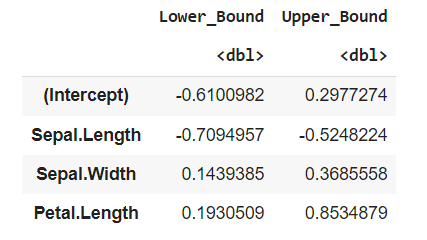



### **ANOVA Results Examination:**

Performing anova on 3 different models allows researchers to statistically test the incremental value of each predictor added to the models, guiding decisions on model selection based on statistical evidence of improved performance.

The ANOVA test gave further clarity to our findings. By comparing three distinct models, each with different combinations of predictors, ANOVA showed us that the model with all the predictors Sepal.Length, Sepal.Width, and Petal.Length provided the best fit. The significant F-statistic (17.724) and the associated p-value(5.064e-05) confirmed that this full model, including all chosen predictors, had higher predictive ability compared to the reduced models. This result from ANOVA highlights the combined strength of all the predictors and confirms the robustness of our chosen model in explaining petal width variations.

Later,The Generalized Linear model(GLM) was performed on the data even after linear regression due to the its inability to satisfy the assumption of normality and linearity in the data. This statistical change allows for a flexible approach, adjusting for the distributional characteristics of the response variable(Petal.Width), potentially leading to a even better model.

### **Generalized Linear Modeling**




The exploration of petal width distribution through a density plot and histogram was a crucial step for performing the GLM.

The below image demonstrate about the distribution of our response variable(Petal.Width).

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAIAAAByhViMAAAACXBIWXMAABJ0AAASdAHeZh94%0AAAAgAElEQVR4nOzdeXxTVf7/8XOzJ0260ULZhbIvlkWxLAqC6CggMuO+AC6jVQGd+YLK4IwM%0AqDiKiqKgwCAig8sMyKKCIIuAg4ALiywKBWopYCmUJqXZk98f92emtrSkbdK0h9fzDx7k5ubk%0Ac5JzmnfuFiUYDAoAAADUf5pYFwAAAIDIINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAA%0ASIJgBwAAIAn5g91TTz2lKMpbb70V60Ikt3PnTkVRBgwYEOtCqiyGI2Tnzp29evUyGAxWqzUn%0AJ6f2CwjT008/rSjKG2+8EaX2w3kLLjjAXnjhBUVRpk+fHvn6AKD+qH/BTv373qZNm4pWsFqt%0AiqKcPHlSvZmUlNSyZUubzRb+U7z33nsrVqyoaaH4LfWNK81qtbZu3frmm29esGBBSUlJrAor%0AP0JqbQDcc889O3bs6Nev34MPPmixWMqvUP5FUxTFYDA0a9bs1ltv3bx5czWeNOK9u+qqqxRF%0AWbBgQfm7rrvuOkVRJk6cWP6urKwsRVGefPJJUa1JKpinAHA+9S/YVdWTTz559OjRu+66K/yH%0APPHEE3xgRInVar3tVwMGDDCZTEuXLr333nvbtWu3du3amJRUfoTUzgBwu90//PBDfHz8mjVr%0AXnnlldTU1IrWLP2iqa+bRqP597//3b9//9dff72qzxvx3g0dOlQIsWrVqjLLnU7npk2bznuX%0AEOLzzz8PPbYak1QwTwHgfHSxLqDOOXz4cGhrHyKuUaNGH3zwQeklOTk5zz333Ny5c4cMGfLJ%0AJ59ce+21sapNVWsDwOl0CiGSkpJ0ugtMw/IvWiAQmDVr1tixYydMmDBixIjmzZuH+aTR6N3Q%0AoUOffPLJtWvX+v1+rVYbWr5x40aXy9WiRYvdu3efPHkyLS0tdNeBAweOHj2anJzcp0+f6j0p%0A8xQAzkv+LXblD9/5z3/+M3DgwOTkZIPB0KRJk+uvvz60ReHmm29OT08XQvzzn/9UFKVfv37q%0Acq/X+9prr11++eU2m81kMrVp02bMmDHHjx8v/UQ///zznXfemZqaarFYLr/88qVLl545c0ZR%0AlCuuuEJdYdKkSYqirFixYtasWU2bNk1MTFSX2+32iRMnduzY0Ww2G43Gtm3bTpgwwW63h1r+%0A61//qj5w69atAwYMsNlsqampo0ePdjgcwWBwxowZHTp0sFgsnTp1mjZtWuU//hv+c+3du3fE%0AiBENGzY0mUzdunV7//33S7eTk5Nz++23p6SkWCyWbt26zZ8/v4pvy/+0bNlyzpw5L774otfr%0Avf/++9W4owoGg/Pmzevdu7fNZjObzR07dvzrX/967ty5qlZbyTsufjtCyg+Afv36KYry6aef%0Alil748aNpUdIeZWPmZtuuikpKUl9JdUdrIcOHQr/RdNoNGPGjBk4cKDH4/nss8/CfMUqGt4X%0AHBWV69SpU+vWrQsLC7/++uvSy1evXi2EGDduXDAYVP9f5q7f/e53ahAsP0krH2AVdUQIodVq%0A9+3bN3To0KSkJLPZ3K1btw8//DDMjgCABC66LXZz58598MEHU1NTb7311oYNG+bl5S1btmzI%0AkCHvvvvuPffcc++999pstgULFmRmZt52221NmzYVQgQCgeHDh69atapDhw73339/fHz8N998%0A8+abby5dunTr1q0tW7YUQpw+fbpfv365ubl9+/a95pprjh07dtdddz399NNCCJPJpD61wWAQ%0AQnz55ZdvvfXW8OHDrVarEMLr9Q4dOnTz5s09e/YcM2aM1+tdvXr19OnTv/zyy61bt6ofe+oD%0Av/7669mzZ1933XWjRo1avnz5u+++GwgEmjRpsnjx4iFDhpSUlHzwwQd/+ctfmjVrds8995y3%0A7+E/1/fffz9y5Mgrrrji7rvv/umnnz799NM777yzUaNGAwcOFEIUFhZeeeWVubm5V1111VVX%0AXXXq1KlJkyZdf/31NXlfxo8fv3jx4p07d/7nP/8J1T9y5MhFixY1btz4oYceMhqN69evf/bZ%0AZz/55JNNmzapx2OFU23l73iZMsoPALvd/tVXX73zzjtDhgwpveZHH30khKjopb7gmLn//vuv%0AuOKKv/zlL0lJSX/729+EEJXsiq1Iu3bt1q9fn5+fH1pS+St23uEdzqi4oKFDh77++uurVq3q%0A27dvaOHq1aubNm161113jR8/fvXq1aNHjw7dVXo/bHkXHGDn7YgqLy+vb9++vXr1uv/++w8e%0APLhixYo77rgjJSVl0KBBYb6qAFC/Beub77//XgiRnp5e0QpxcXFCiBMnTqg31aOzZ8+erd7s%0A2rWrEOLQoUOh9XNzc202W2Zmpnrz3//+txDi/vvvD60wZ84cIUTv3r1dLldooRrabr31VvXm%0ApEmThBC33HJLaIWvvvrKbDYLIfr3768uef7554UQCQkJn3/+eWi1JUuWCCEyMzN9Pp+6xO12%0Ad+jQQQixYsUKdcm0adOEEEajccOGDeqSnJwcrVar1+s7dOhw+vRpdeG8efOEEEOHDq3olQn/%0AuQwGw3vvvRd64Pjx44UQo0aNUm+qQeS2224LrXDixAl1R1uos+Vd8I174YUXhBB33323elPd%0A0NKzZ0+73a4uCQQCY8aMEUI89dRT4Vd7wXe8zAgpMwDsdrvFYjEYDAUFBaEWfD5fw4YNjUZj%0AYWHhefsSzpgpLCwUQrRs2bKiF+SCL5p6iuj8+fPDf8XKD+9wRoU6vGfOnFlRnWvWrBFC9OjR%0AI7TkyJEjQoiRI0cGg8FOnTolJyf7/X71LqfTaTabtVrtmTNn1CVl3oJwBlj5jpx3MDzxxBOh%0AMgDgYlBfd8UeP378mgq4XK5KHnj27FlFUdTwp2rWrFlBQcHWrVsresi7774rhPjrX/9qNBpD%0ACydMmGAwGJYtW6buOly5cqW6MLRCnz59br/99tLtKIoihOjYsWPpw8h69OixdOnSmTNnhjaN%0AGAyG4cOHCyF2795d+uEDBgwIXeuhRYsWXbt29Xq9Y8eOTU5OVheq2z+ys7Mr6kj4z3X55Zff%0AfffdoZu33HKLEOKnn35Sby5fvlwI8fjjj4dWSEtLe/jhhyt63jB16tRJCPHzzz+rN+fOnSuE%0AmDZtWuhkSUVRpk6dqtfr1XckzGqr8Y6XZrPZ/vCHP3g8nsWLF4cWbtiwIT8/f9iwYaH96WWE%0AM2ZqIhgMvv322xs3boyLiwtt9wr/FSst/FFRif79+9tstu+///6XX35Rl6g7u6+77johxODB%0Ag8+cObN9+3b1ri+//NLpdPbt21fdGV1eTQZYZmZm6cEwYsQIIURdvpQMAERWfQ12TqdzXQX8%0Afn8lDxw2bFgwGLz66qvnz58fOvha3aN3XsFg8NtvvxVClDnKOz4+vn379h6PZ+/evYFA4MCB%0AAxqNplu3bqXXKbPzTtW7d+/SNy+55JIRI0ZcdtllQgiHw3Hy5MmTJ0+qV74o8/FfpvH4+Hgh%0AxKWXXlpmSSWhIfznyszMLH1T/QBW1wkEAvv37xdCZGRklF4ndChhtan7ph0Oh3pTPWCrzMue%0AmJjYpUuXEydOhPJf5dWKqr/j5d17771CiNKX86h8P2w4Yyb8ZxdC/PLLL7eXcsMNN6Snp2dl%0AZen1+nnz5oX24Yb/ipUW/qiohMFguPbaa4OljqVbvXq1oiiDBw8Wv8a70neJivfD1nCAlRkM%0A6teeoqKiMDsCAPVdfT3GLj09vaKDza1Wa+nj68uYMWOG3++fP3/+/fffL4To1KnT0KFDs7Ky%0AWrVqdd71i4uLXS6XwWBISEgoc5f6gVpQUFBcXOzxeBISEvR6fekV1MPvzvuo0pYtWzZ9+vRv%0Av/228m2NKSkppW+q2/9KL1SXBCs9eSLM5yp9AmOZltXOmkwmdUdzSIMGDSppMBynT58Wv34S%0AO53O4uJi8WvaKy8vL69FixYXrFZU/R0vb8CAAa1atfruu+/27NnTtWtXn8+3dOnSlJSUig4r%0ADGfMhPnUoQZLnwGg0+kaNWqkHrsWivtVesXKCHNUVG7o0KFLlixZtWrVqFGjvF7vhg0bevTo%0Aofa3f//+RqNx9erVkydPFhc6wK6GA6zM/NJoNOJCkwIAZFJfg1216fX6t95665lnnlmxYsWq%0AVavWr1//4osvzpgx47333rv11lvLr19JWgoEAuoK6r3qmuUfW76A0jfnzJnz0EMP2Wy2rKys%0AXr16JSQkaDSaZcuWvf3229XtYoUi8lxqZ8u/IJVvKA2HuqtOPbpLfekURVEPtyqvTJirRFXf%0A8fIURRk5cuTf//73BQsWvPzyy1988cXp06fHjh1b5q0svb640JgJs3hVJV9jyjxpNV6xSI3A%0AIUOGaDSaNWvWBAKBr776yuFwqBvqhBAWi6Vfv34bNmwoLCwsLi7ev39/69atO3bseN52ojfA%0AAOBicNEFO5V62uBDDz3kcrkWLFgwduzYhx56aPjw4aWPiFJZrVaLxVJSUnL27NkyB1SdOnVK%0ACJGammq1WrVarcPhKHMdr9zc3AtWMmXKFCHEJ598ctVVV4UWhnn4V1VF5LnUzrrdbvUQ+NDy%0AGl5ULHQQ2w033CCEMJlMCQkJRUVFjz76aDVOFy0v/Hf8vEaPHj1lypQPP/xw+vTpap0jR46s%0AaOVwxkzNenMe1X7FIjUCU1NTL7/88m3btn333XdffPGF+HUPrOraa69dt27d+vXr1V3tFW2u%0AE1EbYABwkaivx9hVW05OzokTJ0I3TSZTVlZWnz59zp49e/jw4fM+RD386Kuvviq98MyZMz/+%0A+KPZbO7cubNWq23VqpXf7z9w4EDpdcpcu6s8t9udl5dntVpLf6YGy130KyIi9VxarbZt27ai%0A3JH1W7ZsqUl548ePz8vL69KlS2j/pnpMlfrTBaWdOXOmSi1X4x0v75JLLhkwYEBeXt7q1as/%0A/vjjjh07qqOiIhccM1XqQpiq8YpFdgQOGzZMCLFx40b16iqlDydVQ96mTZs2btwoKg12URpg%0AAHCRuLiC3a5duy655JK7777b4/GEFjocjsOHD2u12oYNG4pfLzunHu+lUo/Nev7550s/6vnn%0An/f5fHfddZe6yUf93Jo5c2Zohe3bt5c+j/K8jEZjcnJycXFxaNteMBicMmWKepz72bNna9rh%0A6DyXulHtlVdeCS05cuTIP//5z+oVpl7zb+bMmRaLZeHChaHdlOrLPnnyZHUrl2rz5s2NGjVS%0Az3sNRzjveBnlB4BKvQzbo48+WlxcXNFpEyHhjJmIC+cVK9O7yI5ANa6tW7du+/btAwcOLL2r%0AOiMjIy0t7auvvlIzX//+/StpJ5wBVtHbBAAXuYtrV2xGRsadd965ePHijh07Xn/99Q0aNCgo%0AKPj000+PHTv22GOPqUdnd+zYUf2lgfvvv99gMMyePfuee+5ZunTp8uXLe/bsef311+v1+m3b%0Atq1bt65du3bqpdeEEOPHj1+0aNHbb7+dk5PTq1evnJycpUuXPv300+oFuioxevToV155ZdCg%0AQaNGjRJCfPLJJ4WFhe++++511133wQcfNG/evKo/oFkLz/V///d/Cxcu/Oijjw4fPty7d+9T%0Ap06tWrXqj3/84/Tp0y/42JMnT958883q/z0eT25u7u7duwOBQNOmTT/66KPu3buH1rz11luX%0ALVv2/vvvd+/e/bbbbrPZbD/88MOKFSvMZnPpy8pULpx3vIzyA0BdfvPNN48ZM+bIkSMajab0%0ABTXOK5wxE3HhvGLlexfBEZiRkdG8eXP1MLvS+2FVgwcP/te//hUIBH7/+99XflZyOAOsorcJ%0AAC52tXjNvMio4QWK/X7/m2++2adPn5SUFK1Wm5CQcOWVV86fPz8QCIRaeOGFF1JSUoxGY+iC%0Aq16vd8aMGT169LBYLEajsUOHDhMnTixzcdrvv/9+8ODBNpstPj6+f//+69ev37NnjxBiwIAB%0A6grqBVRfeuml0o9yOp2TJk1KT083Go3Nmzd/5JFH1Avhjh49Oi4uLi0tbffu3ed9oLrNY//+%0A/aWbEpVe8Lbaz3Xw4EEhREZGRmjJ/v37hw8fnpiYaDKZunbtOnfuXHXbyRVXXFHRs6tvXGka%0AjSY1NXXQoEEzZ84sKSkp/xC/3z937lz1B7J0Ol2zZs1GjhxZusvhVHvBd7zMCAmebwCo1E1i%0AAwcOrKiPpV1wzNT8AsXlXfAVK9+7cEbFBS9QHBK62lzpK0KrFi1apN4VuqJySPm3IJwBVqYj%0AYQ5dAJDb/z+jE9Gwbdu2zMxM9bftY10LImDatGl/+ctf3nvvvQtusQMAICYurmPsoueXX375%0A7LPPyhzurW5uCf96aajLvF7v7NmzU1JSwj/CDwCAWkawi4y1a9cOGTLk4Ycf9nq96pKioqKX%0AX35ZVHoCIOqRJ554Ijc3d9y4cVE69QEAgJpjV2xkeDyeQYMGbdmypXPnzjfccENJScny5cuP%0AHTs2YsSIpUuXxro6VN+BAwcWLFjw1VdfbdmyJSMjY+vWrWV+EQEAgLqDYBcxDofj1Vdf/eij%0Aj3Jycvx+f/v27e+6667HH39cp7u4Tj2WzPr16wcPHmyxWIYNG/baa69F49rCAABECsEOAABA%0AEhxjBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIop79%0AKMK5c+d8Pl/1HmswGPR6vdPpDAQCka0qhiwWS0lJSayriBhFUSwWi9/vd7lcsa4lYvR6vRAi%0A9CPCEjAajTqdjqlUl2k0GrPZ7PP53G53rGuJGFmnUklJiUy/FCDlVPJ6vR6PJ9a1/I9Go7HZ%0AbBXdW8+Cnc/nq/asNhgMOp3O7/dXOxrWQVqtVqY/cxqNRqfTBQIBmTql1Wo1Go1MPVI/jXw+%0An9/vj3UtESPZVNJqteqfO5k6pf48o0w9MplM6lSS6TuSZFNJp9Op71Gd6pRWq63kXnbFAgAA%0ASIJgBwAAIAmCHQAAgCQIdgAAAJKI7skTZ86cmT9//q5duzweT+vWre+999527dqVWae4uHjO%0AnDm7d+/2er3t27fPyspq2LBhVKsCAACQUnS32D377LMFBQV///vfZ8yYkZKSMmXKlPKXsZgx%0AY0Z+fv4zzzzz0ksvWSyWKVOmyHR+EAAAQK2JYrBzOBypqamPPvpo69atGzduPHLkSLvdnpub%0AW3qdgoKCHTt2PPjgg61atWrSpElWVlZeXt6ePXuiVxUAAICsorgr1mazTZw4MXTz9OnTGo0m%0AJSWl9DoHDx7U6/WtWrVSb1qt1mbNmv34448ZGRnqEp/PV/pSh4FAQFGU6tWjPlBRlGq3UDfJ%0A1J1QXyTrlGSjjqlU98k6lYSkPZKpU0LG90jUsU5VXkwtXaDY4XDMnDnzpptuSkpKKr3cbrfb%0AbLbSJSYkJBQVFYVubt68ecKECaGbs2bN6tWrV00qSUhIqMnD66AGDRrEuoQIMxgM8nXKbDbH%0AuoQIS0xMjHUJESbfqDMajUajMdZVRJjFYol1CRFW5mNRAvJNJZPJZDKZYl3F/1R+xFptBLtj%0Ax45NnTq1W7duo0aNKn9v5cEzOTm5dJKzWCzVvvqz+gMAPp9Pph9vUa+IHesqIkmv1wcCAZl+%0A0kCj0YgLzcP6halU9ymKov6IC1OpLmMq1X11cyoFg0GDwVDRvVEPdrt27XrxxRfvuOOOoUOH%0Alr83MTHRbrcHg8FQvCsqKir99SUjI2PWrFmhm0VFRaW351VJXFyc2WwuLi6WacwlJydX+wWp%0AgzQaTXJyss/ns9vtsa4lYkwmk0ajkenHE61Wq8lkcjgcdeovXQ1JNpW0Wm1SUpLX63U4HLGu%0AJWLUzd5OpzPWhUSMzWYzGo12u12mtCrZVNLpdImJiR6Pp7i4ONa1/I9Wq60k2EX3rNh9+/b9%0A4x//+POf/3zeVCeEaNu2rdfrzc7OVm+qZ1d07NgxqlUBAABIKYrBzuPxzJgx48Ybb2zZsmXB%0Ar9TLnaxdu3blypVCiOTk5N69e7/55ptHjhzJy8t79dVX09PTO3XqFL2qAAAAZBXFXbH79+8/%0AefLk4sWLFy9eHFr40EMPDRkyZOfOnXa7fdiwYUKIcePGzZkzZ/LkyX6/v3Pnzk8//XSdOvcE%0AAACgvohisMvIyFixYsV57yp9oqvFYnn88cejVwYAAMBFgt+KBQAAkATBDgAAQBIEOwAAAEkQ%0A7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAA%0AJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACShi3UBF4sdO3asXr064s2aTKYrr7wyMzMz4i0D%0AAIB6h2BXS3bt2vX6669Ho+W4uDiCHQAAEAS7Wta5c+e0tLRItZafn79nz55ItQYAAOo7gl2t%0Aio+Pb9iwYaRac7lckWoKAABIgJMnAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMA%0AAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATB%0ADgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABA%0AEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsA%0AAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ%0A7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAA%0AJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbAD%0AAACQBMEOAABAEgQ7AAAASRDsAAAAJKGLdQFVo9frtVpt9R6r0+mEEEajUf1PLYvek+p0OpPJ%0AFKXGa5miKEIIjUYjTY+EEHq9XlEUmXqkzkGj0RgIBGJdS8RI9h5pNBohhFarlalTer0+GAzK%0A1KPQVAoGg7GuJWKYSrVA/aysSD0LduJC/amdFurUkyqKEpMeRYPaEZl6JEp1KtaFRIyUb5OQ%0A8T0ScnVKyDjqhHTvkZCrR3VzKkkV7Lxer9frrd5jNRqNXq93u90+ny+yVYWj2mWH07LT6YxS%0A47VMo9FYLBa/3y9Nj4QQwWBQo9HI1COtVqvT6Vwul9/vj3UtEWM2myV7j8xms2RTSSVTj3Q6%0AnTqVZNr4LdlU0ul0dXAqabVai8VS0b0cYwcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAg%0ACYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0A%0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQI%0AdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAA%0AkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgB%0AAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiC%0AYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAA%0AIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYId%0AAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAk%0ACHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAldtJ8gLy/v1Vdf%0APXTo0LJly867wrhx444ePRq6aTKZPvroo2hXBQAAIJ/oBrvNmzfPmzeve/fuhw4dqmid4uLi%0ABx98MDMzU72p0bAREQAAoDqiG+y8Xu/06dOzs7M3btxY0ToOhyMtLS0lJSWqlQAAAEgvusFu%0A4MCBQojs7OyKVvB6vW63e+vWrYsWLXI4HG3atBk5cmTTpk2jWhUAAICUon6MXeVKSkoSExN9%0APt8jjzwihHj//fcnTpw4e/bsuLg4dYW9e/e+9957ofVHjx7dqlWr6j2XTqcTQsTFxQUCgRoX%0AXmVGozF6Ldtstig1XssURRFC6HQ6aXokhNBqtYqiaLXaWBcSMaGpFAwGY11LxCiKItOok3Uq%0AiV+Hnxz0er0Qwmq1MpXqLHUq6fX6etSpGM+QhISEhQsXhm4+8cQTo0aN+u9//zt48GB1SX5+%0A/hdffBFa4fe//30NE5I6kWpf9P4Y6XS66KXGmNBoNJL1SPz6mSQTg8EQ6xIiTMpRJ9/AkynY%0AqZhKdV9dm0qVb5+qWzPEbDanpqYWFBSElmRmZi5fvjx002g0FhYWVq9xi8ViNBodDofP56tp%0AoVVXUlISpZadTme1X5O6RqPRJCQkeL3e4uLiWNcSMUajUVEUl8sV60IiRp1Kdrvd7/fHupaI%0ASUhIKCoqinUVEaNOJY/Hc+7cuVjXEjFqXHC73bEuJGLi4uIMBkNRUVFM9iNFiWRTSavVxsfH%0Au93u6H2IV4M6wSu6N8bBLicnZ+XKlVlZWeqXMJfLderUqbS0tNAKZrO59CF3RUVFXq+3es+l%0Azhy/3x+TT6PobWkPBALSfL6qr1IwGJSmR0KIQCCg0Whk6pH6NsVqKkWPZN0R0k2l0MCLdSER%0AE+qRTMFOyPUeqbti69dUim6wKyws9Pv9DodDCKFuh7NarSaTae3atS6Xa9iwYcnJyVu3bvX5%0AfLfffrvf71+4cKHVau3Tp09UqwIAAJBSdIPdhAkT8vPz1f/fd999QogHHnjgxsah+OMAACAA%0ASURBVBtv3Llzp91uHzZsmM1mmzp16jvvvPP444/r9fr27dtPmzZNvt3zAAAAtSC6wW7evHnn%0AXT5hwoTQ/1u3bj116tSolgEAAHAx4GceAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRB%0AsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAA%0AkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEO%0AAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEAS%0ABDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAA%0AAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDs%0AAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAk%0AQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMA%0AAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATB%0ADgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkoYt1AVWjKIqiKNV+%0AbA1bqJtk6lGoI9L0SJQaeLEuJGIknkqxLiFiZJ1KwWBQsh4JplLdVjenUuXF1LNgZzab4+Li%0AqvdYjUYjhLDZbMFgMKJFhcVsNkepZZPJlJiYGKXGY0Kv18vUI3UGGo3GWBcSMaGpFOtCIkmj%0A0cg06lQGg0GmTqlTyWQyxbqQiFGnUnx8fKwLiSTJplLoD7her491Lf9TeYypZ8GupKTE6/VW%0A77FxcXFms9lut/t8vshWFQ6n0xm9lgsLC6PUeC3TaDTJycler9dut8e6logxmUwajaakpCTW%0AhUSM1Wo1mUx2u93v98e6lohJTk6WZh4JIbRabVJSksfjcTgcsa4lYtSvx9H7W1r7bDab0Wgs%0AKioKBAKxriViJJtKOp0uMTHR7XYXFxfHupb/USd4RfdyjB0AAIAkCHYAAACSINgBAABIgmAH%0AAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJ%0Agh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAA%0AgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2%0AAAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACS%0AINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEA%0AAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJg%0ABwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAg%0ACYIdAACAJAh2AAAAkiDYAQAASCKsYOf1eqNdBwAAAGoorGDXpEmTxx577Lvvvot2NQAAAKi2%0AsIJdly5d3njjjZ49e3bt2vWll146ceJEtMsCAABAVYUV7DZs2JCXlzdz5sykpKQnn3yyefPm%0A119//QcffOB0OqNdHwAAAMIU7skTaWlpY8aM2bRp07Fjx15++eXTp0/fcccdaWlpf/zjH7dv%0A3x7VEgEAABCOKp8Vqx5v984779x55512u33evHlXXHFF3759v/nmm2jUBwAAgDBVLdj98ssv%0Ar7zySkZGRpcuXT788MMhQ4YsWbJkxYoVHo8nMzPz888/j1KVAAAAuCBdOCt5PJ6VK1e+++67%0Aq1at8vl87du3nzZt2qhRoxo3bqyu8Lvf/e7GG2989NFHDx06FM1qAQAAUKGwgl3jxo3PnDlj%0AtVrvueee++67r1+/fmVW0Ov1WVlZI0aMiEKFAAAACEtYwa5Tp0733nvvbbfdFhcXV9E6PXr0%0AmDdvXuQKAwAAQNWEdYyd0+ns3bt3+VS3ZMmSTp06qf9v3rz5fffdF+HqAAAAELawgt233357%0A7ty5Mgt9Pt/evXuzs7OjUBUAAACq7AK7YhVFUf9z+eWXn3eFHj16RLgiAAAAVMsFgt3OnTu/%0A/PLLxx57bPjw4SkpKaXvUhSlSZMmf/zjH6NZHgAAAMJ1gWCXkZGRkZHx2WefvfTSS23btq2d%0AmgAAAFANYZ0Vu3r16mo/QV5e3quvvnro0KFly5add4Xi4uI5c+bs3r3b6/W2b98+KyurYcOG%0A1X46AACAi1Zlwa5Dhw6jRo2aOHFihw4dKlntwIEDFd21efPmefPmde/evZILF8+YMaO4uPiZ%0AZ54xGo2LFy+eMmXK66+/rtFU+bfOAAAALnKVBbvExESz2az+p3qte73e6dOnZ2dnb9y48bwr%0AFBQU7Nix49VXX23VqpUQIisr65577tmzZ09GRkb1nhEAAOCiVVmw+/rrr8v8p6oGDhwohKjk%0AkigHDx7U6/VqqhNCWK3WZs2a/fjjj6Fgl5+fv3v37tD6HTt2jI+Pr14xWq1WCGEwGNT/1DKd%0ALqy93tVr2Wg0RqnxWqaeha3RaKTpkRBCp9MpiiJTj0JTKRAIxLqWiJHsPVJ3esg3lYQQMvVI%0AnUpGo5GpVGepU0mr1dapToWuWHJe4aaNkpKSoqIi9cdhnU7nhx9+ePr06REjRrRu3bomxdnt%0AdpvNVrrEhISEoqKi0M29e/c+9dRToZuzZs1q2rRpTZ7RYrHU5OHVFr0xYTQabTZblBqPCZ1O%0AJ1mPhFyfRqpKfoemnpJv1On1er1eH+sqIoypVPcxlaKt8m8CYQW7AwcO9O/f/09/+tNTTz3l%0A8/muuuqqb775RggxderUDRs2dO/evSb1VR4809PTx44dG7qZmppa/lLJYTIYDHq93ul0xuS7%0AkcfjiV7L1X5N6hpFUSwWi9/vd7lcsa4lYvR6vaIo0RsAtc9oNOp0ulhNpSixWCwlJSWxriJi%0ANBqN2Wz2+XxutzvWtUSM+snq9XpjXUjEqFOppKQkGAzGupaIkXIqeb3eOvU3XP2srOjesILd%0ApEmTGjVqdMsttwghPvjgg2+++WbWrFnXXnvtyJEjn3/++X//+9/VLi4xMdFutweDwVC8Kyoq%0ASkpKCq3QokWLUaNGhW4WFRU5nc7qPZdGo9Hr9W632+fzVbvgaoveHyOv11vt16Su0Wg0arCT%0ApkdCiGAwqNFoZOqRVqvV6XQul8vv98e6logxm82SvUdms1myqaSSqUc6nU6dSjJ9R5JsKul0%0Aujo4lbRabSXBLqyTT7ds2fLUU0+lp6cLIZYuXdqlS5eHH344PT390Ucf3bZtW02Ka9u2rdfr%0ADR2EZ7fbc3NzO3bsWJM2AQAALk5hBbuzZ8+qR9f5/f6NGzfecMMN6vLU1NRffvmlkgcWFhYW%0AFBQ4HA4hREFBQUFBgbqLbe3atStXrhRCJCcn9+7d+8033zxy5Ih6xbv09PROnTrVsFcAAAAX%0AobB2xTZq1Ojw4cNXX331+vXrCwsLf/e736nLc3NzGzRoUMkDJ0yYkJ+fr/7/vvvuE0I88MAD%0AN954486dO+12+7Bhw4QQ48aNmzNnzuTJk/1+f+fOnZ9++unKj7oDAADAeYUV7K699tqnn376%0A0KFD77//fnp6+lVXXSWEyM/Pf+211/r27VvJA+fNm3fe5RMmTAj932KxPP7441WpGQAAAOcR%0AVrCbOnXq3r17X3jhhZSUlJUrV6qX3hk3blxOTs57770X5QoBAAAQlrCCXePGjbdu3Wq3281m%0Ac+hSLuPHj3/ttdcaNWoUzfIAAAAQrir8HEKZn3y47LLLIl0MAAAAqi+ss2Lz8/NHjx7dtGlT%0ArVarlBPtEgEAABCOsLbYjRkz5uOPP+7fv//gwYOj95unAAAAqImwUtr69ev/85//DB8+PNrV%0AAAAAoNrC2hXrdDr79OkT7VIAAABQE2EFu549e+7duzfapQAAAKAmwgp2r7766pNPPrl169Zo%0AVwMAAIBqC+sYu8cee+zEiRN9+vSxWCypqall7j169Gjk6wIAAEAVhRXsNBpNu3bt2rVrF+1q%0AAAAAUG1hBbtNmzZFuw4AAADUUFjH2KlcLteOHTs+/vjjgoICIYTP54taVQAAAKiycIPdyy+/%0A3LBhw169ev3+978/dOiQEOKZZ5659957iXcAAAB1RFjBbu7cuePHj7/66qvfeuut0ML27dsv%0AWrTo1VdfjVptAAAAqIKwgt0bb7yRlZW1fPnyUaNGhRaOHDlywoQJ8+bNi1ptAAAAqIKwgt1P%0AP/30hz/8ofzyAQMGHDlyJNIlAQAAoDrCCnbx8fEul6v88qKiIrPZHOmSAAAAUB1hBbtLL710%0A+vTpTqez9MIzZ85MmTIlMzMzOoUBAACgasK6jt2kSZOuueaaSy+9dMiQIUKIuXPnvvXWWx9/%0A/LHT6Sx9OgUAAABiKKwtdgMGDPj8889tNttrr70mhJg/f/67777boUOHtWvX9u3bN8oVAgAA%0AICxhbbETQgwaNOi7777Lz88/fvy4EKJly5ZJSUnRLAwAAABVE26wy87O/umnnxwOR3Jycrdu%0A3Uh1AAAAdc2Fg93q1auffPLJ3bt3h5YoijJw4MDnn3++V69e0awNAAAAVXCBYDd37tyHHnrI%0AYrGMGjWqZ8+eVqu1oKBg8+bNn332Wb9+/RYuXHj77bfXTqEAAACoXGXBLjs7e+zYsT179ly5%0AcmVaWlpo+YQJEw4cODBixIjRo0dfdtllbdq0iX6dAAAAuIDKzoqdNWuWRqNZtmxZ6VSn6tCh%0Aw6pVqxRFeeWVV6JZHgAAAMJVWbBbt27dTTfd1LRp0/Pee8kll9x6661r1qyJTmEAAAComsqC%0A3eHDh3v06FHJCj169Dh27FikSwIAAEB1VBbsHA5HQkJCJSvExcW53e5IlwQAAIDquMAvTyiK%0AUjt1AAAAoIYucLmTw4cPf/3115XcG+l6AAAAUE0XCHbTpk2bNm1a7ZQCAACAmqgs2D3zzDO1%0AVgcAAABqqLJgN3ny5NoqAwAAADV1gZMnAAAAUF8Q7AAAACRBsAMAAJAEwQ4AAEASF7jcCQBI%0A7+TJk998843D4Yh4y61atbrkkksi3iwAVIRgB+Bit2HDhnHjxkWj5SeeeGLChAnRaBkAzotg%0ABwBCCNGkSZPk5ORIteZwOHJyciLVGgCEiWAHAEII0bRp0zZt2kSqtRMnThDsANQ+Tp4AAACQ%0ABMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4A%0AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIE%0AOwAAAEkQ7AAAACShi3UBAICwHDlyZOzYseGsqSiKTqcLBAJ+vz+c9Xv37j1p0qSaVRd1d9xx%0AR0FBQSAQiGyzBoNh6dKlkW0TiCGCHQDUD+fOndu2bVs0Wk5OTo5Gs5G1ffv2X375JeLNGgyG%0AiLcJxBDBDgDqk/T09MsuuyxSrblcruXLl0eqtWizWCzDhg2LYINr1qw5d+5cBBsEYo5gBwD1%0AiaIoGk3EDo+OYFO1o94VDNQyZggAAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAA%0AkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACS0MW6%0AgKoxmUwmk6l6j9XpdEKIuLi4QCAQ0aLCYjQao9eyzWaLUuO1TFEUIYROp5OmR0IIrVYb+lcO%0AoakUDAZjXUtkVPuvygUZDIYIDmaLxRKppsqoF5NO/fsQDbHqu16vF0JYrVZpppIQQlGUuj+W%0AwqeOOr1eX486Vc+Cncfj8fv91Xus2WzWarUul6vaLdSE1+uNXstOpzNKjdcyjUZjMBj8fr80%0APRJCGI1GRVFcLlesC4kYi8Wi1WrdbndMplI0eDyeKLXs8/kiOJjdbnekmiqjXky66KWfWPVd%0Ao9FoNBqXyxWTzQ1Rotfr6/5YCp9WqzUYDJGdyDWn0Wgq2VpUz4JdIBDw+XzVfqwQwu/3V7uF%0AmojevK3Ja1LXaDQaIUQwGJSmR0IInU6n0Whk6pE6mH0+nzTBrr5Mz+i94JJNuqqKVd9DU0mm%0AYCdi93pGT12bIJXvAuIYOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbAD%0AAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAE%0AwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAA%0AQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7%0AAAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJ%0AEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAA%0AACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGw%0AAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQ%0ABMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEnoYl0AAEjI4XAIIZYsWbJz%0A587ItgnUWWvWrFm8eLHX6414y3fdddcNN9wQ8WalRLADgMhTP9uys7Ozs7NjXQtQS37++edP%0AP/00Gi337ds3Gs1KiWAHANHSsWPHjh07Rqq1Y8eObd++PVKtAVFy+eWXN2/ePFKtMeyrimAH%0AANGi0+mMRmMEW4tUU0D0RHbY6/X6SDV1keDkCQAAAEkQ7AAAACRBsAMAAJAEwQ4AAEAS0T0U%0At7i4eM6cObt37/Z6ve3bt8/KymrYsGGZdcaNG3f06NHQTZPJ9NFHH0W1KgAAAClFN9jNmDGj%0AuLj4mWeeMRqNixcvnjJlyuuvv67R/GYzYXFx8YMPPpiZmaneLHMvAAAAwhTFFFVQULBjx44H%0AH3ywVatWTZo0ycrKysvL27NnT5nVHA5HWlpayq+Sk5OjVxIAAIDEorjF7uDBg3q9vlWrVupN%0Aq9XarFmzH3/8MSMjI7SO1+t1u91bt25dtGiRw+Fo06bNyJEjmzZtGr2qAKD+MguREAjEeTyh%0AJSUGQzCGBQGoY6IY7Ox2u81mUxQltCQhIaGoqKj0OiUlJYmJiT6f75FHHhFCvP/++xMnTpw9%0Ae3ZcXJy6wpYtW/72t7+F1n/ppZd69OhRvXrUShISEqr38BqyWCzRa7lBgwZRajwmDAaDZD0S%0AQpjN5liXEDHqVEpMTIx1IRET+oMTW0ow2KCkpGFxceq5cyklJUlOZ4LTGe92W91ui9dr9noN%0Afr8QQhw+LA4fLvPYEoPBpdOd0+vPGQzFRmORyXTWZDprNp8xmwus1gKLxVnpVV7rxaQr/WkS%0AWbHqu9qjpKSkmDx7NMj6SWcymSJ4yeWaCwQCldwb3WPsLjgPExISFi5cGLr5xBNPjBo16r//%0A/e/gwYPVJTqdzmazhVbQarWV96cSGo1GUZRgMBgMxuD7bfSeNBgMVvs1qYO0Wq1kPVIURVEU%0AmXqkTiWZehSTvwlCCKvHc8mZM60KC1sUFjaz25vY7Xo1ulWdxeOxeDyVHMjiMBrzrdaTNttx%0Am+14fPzxhIQTNpvv12OaJZt0VRWrvjOVqtRyTF4o9Q94XZsglb/OUQx2iYmJdrs9GAyG4l1R%0AUVHlX03MZnNqampBQUFoSWZm5vLly0M3i4qKCgsLq1dPXFyc2Wy22+0+n696LdSE0+ms3gOV%0AYLBhcXHj4uIG584lulwWj8fo9wshAkL84nL1FaLNtm2ONWv86enB+n94okajSU5O9nq9drs9%0A1rVEjMlk0mg0JSUlsS4kYqxWq8lkstvt/uqmkLqmNt+d1OLiTvn5HU+daltQkGa3R2sbVDk2%0At9vmdqefPh1a4tdojsfHH7XZ2gqhO3ny7OHDwbq96Sh6oaHaHys1ZLPZjEZjUVFRnQoNNVHt%0AT7pwWo7J26TT6RITE91ud3Fxce0/e0W0Wm0laSqKwa5t27Zerzc7O7tNmzZCCLvdnpubW+b3%0AsHNyclauXJmVlaX+BqLL5Tp16lRaWlr0qqoX9H5/h1Onupw82bag4JLCQlPFSfQuIcSSJWLJ%0AEiFEoHlzb48evsxMz4AB/jZtaq9cAJUy+v2dT57sduLEpSdONAz748Gr0RSZTEVms8NodOp0%0AToPhZElJ7vHjxuTkRr/+wnqc16sIYfT5DD6f2eeLc7ttHo+a4S648U8bCDQ/e7b52bNXCiG2%0Abxft2vlbtPB17+7r0cPXs6cvIyNoMtWk1wBiIorBLjk5uXfv3m+++ea4ceMMBsO8efPS09M7%0AdeokhFi7dq3L5Ro2bFhycvLWrVt9Pt/tt9/u9/sXLlxotVr79OkTvarqMn0g0D0vr+/Ro5ee%0APGms+mZFTW6uMTfXuHx5nBD+Vq08Q4e6R4zwde0ajVIBXFCiEMMKC3+/eXPXEycMlcYst1Z7%0ALCEhLzHxuM32i9Wab7Wetljs5XJVTk7Of48fb5OcfHmnThd8dqvbneRyNSgpSTl3LuXcuUbF%0AxY0cjrTiYpPXW9FDtD//rP35Z6O6k0Sv9116qfeyy3yZmd4rrgikpobVZwCxFt1j7MaNGzdn%0AzpzJkyf7/f7OnTs//fTT6m7ZnTt32u32YcOG2Wy2qVOnvvPOO48//rher2/fvv20adPq1CGK%0AtaORw3HdwYP9jhyxljrZrSJurdan1Zp8Pm3FW++1R46YZ840z5zp69LFdc897ltuCZY6VBFA%0A9OgDgR7Hjv3x6NE+QhiPHTvvOn5FyUlKOpiScqhBg6PJySdstkCkzwwoNhqLjcbccqeLJTud%0ATYqKmtntzc+ebVFY2KyoyHje0On16r79Vvftt+Ltt4UQ/vR0b+/e3j59vP36BRo3jmypACIo%0AusHOYrE8/vjj5ZdPmDAh9P/WrVtPnTo1qmXUZa3PnBm+d+9leXnK+Q4fKbBYDqWkHElKOp6Q%0AkG+1njWZHKVS74mjR3/cuvW5Bx64JSNDu3+/7rvvdDt3Ki5X6RZ0P/xgffLJuOeec40a5czK%0ACpT75Q8AkdLi7NmB2dl9jx6Nq+Ab2s+JibvT0valpR1ISXFVeppq9Jwxm8+YzT/8esSLx+nc%0At2zZvRkZY3r31n3/vW73buV8h0lps7O12dmmRYuEEP7Wrb19+3qvvNJ75ZWBlJRarR7AhUQ3%0A2KESzYuKbt21q2deXpnlAUXZ17Dht82a7Wrc+GSlm9m8Gs0JIXKbN3fdfru6RPF4dNu2Gdau%0ANXzyiTY3N7SmYrebZ840zZnjGj3a+ac/Ber8dQ2AekQXCFyRm3vtTz+1LXXiV4hPo9nXqNE3%0AzZp936TJ6ahdDKLaAoqyX4gNTZrcq37B9vl0P/6o27FD/803uu3btUeOlH+I9vBh7eHDpvfe%0AE4ri69jR27+/t39/b+/ewbrXO+AiRLCLgXiX69Y9ewZkZ2t+u5Uu32pdl57+VatWZ6p7zbOg%0AwaB+jT7397/rd+ww/utfxmXLlF/P+FPcbvPbb5sWL3aOHet85JHgxbfLG4isOI9n8MGD1x48%0AmFhuK1dAUdYFg5ubNTtxxRXnDIaYlFcdOp2vc2df586u0aOFEJr8fP327bqtW/X//a9u3z5R%0A5vCPYFC3b59u3z7z7NnCYPD26uUZMMB79dW+Ll0EPw4JxAjBrlYpQgw8dOiOXbvK7Kk5mJLy%0ASceO3zRtGozUcTaK4u3Vy9ur17mpU00LF5rffltz8uT/v8fhsDz/vPFf/zr33HOe666LzNMB%0AF5lkp/OG/fsHZmeXP2n9hM22MT39n273uv37uyYldalHqa6cQMOG7qFD3UOHCiGUoiL911/r%0At2zRb96s27dPlDl6xOPRb9mi37JFPPtsoEED74ABnoEDvQMHsq8WqGUEu9rTRohZe/dm/PYK%0AbYeTkz/KyNgdtSu8BOPjnWPGuB580Lh4seXll0PxTpuTE3/33Z4hQ4r/8Y9Ao0ZRenZAPskl%0AJTfu23d1drb+t5uv/BrNjmbNvmjbdn/DhkEhTu3dG6sKoySYkOC57jr126DmzBn9li36TZv0%0AX36pPXq0zJqa06eNS5YYlywRGo2va1fP1Vd7r7nG27On0PGJA0Qd06xWBIPdt23bKURcqVR3%0A2mJ5v1u3rS1bVvuam+rlYU+ePLk3nI+Qyy/XLFjQbMmSFv/6l/bXnbOGTz+N37Tp4GOP5V9z%0AjbrE5XLl5eUlJiZG/MdbEhISmjVrFtk2EUG5ublhXhfabDYbjUa73R7mVVXT09NNUlwRLd7l%0AumnfvkGHDpW5RFyxwbCubdu1bdtW+yCKeieQnOy+8Ub3jTcKIbQ//6zfuFG/caNh82bl7Nnf%0ArhfQ7dql27VLzJgRTEjw9O/vHTTIM2gQXyaB6CHYRZ1SWGgbO/a6zz8PLfEryqr27Zd07equ%0A2fdX9TLcs2fPnj17dviPaiLEdCHu+PWmzuHo+OyzPzz77ENCRPWq3jffpBZUAgAAIABJREFU%0AfHOV6kQtmzx58ooVK6LR8ueff17tn3iuI0w+35D9+4ccOFBmx+tpi+WzDh3Wp6fXcC7Xa/4W%0ALfwjR7pGjhR+v27nTsOGDfr16/XffSd+G3+VoiLjihXGFSuEovi6dPEMGuS95hrvZZcJrTZW%0AlQNSunj/GNUO3bffxj/wgKbUtax+TkycnZmZE7mf7klJSanqz7H/TYjVJSXPnTrV7NdLld4i%0ARF+d7s9paevd7lOnTiUmJqZE7sgYr9ebk5MTqdYQVS1bttRH7jIcp06dKioqilRrMaEEg/0P%0AH7519+7E315I6FRc3PLOnTe1auXjLIEQrdbXs6evZ08xfrxSVGTYtEm/bp1h/XrNiRO/WS0Y%0A1O3Zo9uzR8yYEUxK8vTv7xk0yDtoENdABiKCYBdFpgULrJMmiV/Pk/ALsbhp07X9+kX2k6B5%0A8+YdOnSo6qO8QvzV57tz585rDh5Uz9do4vP9Ky/vjaZN/yREWlpa9+7dI1Whw+Eg2NUX3bp1%0As0TuohXffvttvQ52HU6dGvntt5f89hcqz1gsH3fuvLF1az+RrmLBhAT3sGHuYcOEELp9+9SE%0Ap9+2Tfz2dy+UwkLjsmXGZcuEovgyMjzXXOMZNMjXowcn1QLVRrCLDq/XOmmS6Z13QguKbbZh%0ADoe7RYtL6swfLLdO985ll33XtOlDX3+tbo3QBoOPHTvWTIjnZflFaqB6El2uO77/vt/Ro6VP%0AUy8xGJZ36vR5u3Ye9h5Wha9TJ1+nTs6xYxWHQ//ll4Z16wzr1p1nM97OnbqdOy3TpweSk71X%0AX+255hrvwIGB5OQYVQ3UVwS7yFOKiuLvu0+/aVNoiffKK9+56qqNzz3XO4ZlVWBX48YTr7/+%0A4a1bL/31hNk/CNE1J2dW+/b5VmtsawNqnxIMXnPo0G27dllKbVvyazRr27RZ2rVrcX2+dknM%0ABW02z9ChnqFDhRC6vXv169YZ1q3Tb98ufnvkoubMmf+dVNu9u2fQIM811/gyMmJUNVDPEOwi%0ATJOXl3DHHdr9+0NLnI88cu5vfztXautdXVNkMv1jwICb9u69+Ycf1F82a+d2P7tmzSv9+h3g%0AJ8hwMWleVPTA9u1lfkBiZ+PGi3r0OB4fH6uqpKReBtk5bpxSVGT48kv9unWGL77Q5Of/ZqVA%0AQP29WsuLLwYaNHjj3LlPg0GD2+3g4upAxQh2kaTdvz/h9ts1x4+rN4MGw7mXXw793lddFlSU%0Aj7t0OdKgwcObN9v8fiH+X3t3HhdV9fcB/NzZmBmYhX0TlRIRwx0V1ABRcSuX1FIrzVIzK7NM%0A08ctsyzbtKw0bbUyf2qYiWaCCe6KG5jmBrLvDMwMM8x+nz9GpnEF4cIdhs/7j16ew+XwpeEM%0AH+5yDnHT6xcdPLixb9+j7duzXR1Ak+MTMqOwcNqZMzy7+xDKXF039+x5Bsv0NCVaJru5cgpN%0A8y5cEPz9N3///jsfquVUVIwnZDwh9M6dmR4e6QEB6f7+mR4ejC3qDuAsEOwYw09Lk06ebFvG%0AiXZ3V23ebIyMZLeqB3Le3/+5sLB3//knjBBCCN9imX38uLdG8/sjj7BcGUBT8iooOEVId7uN%0Am80czp5OnXaGh+txO12zoShT166mrl3J3LlUZaUgJUVw4AD/wAHOrSdQKZruUFHRoaJi3IUL%0AaheXC35+6QEB6X5+KqdYKxGg8RDsmME/dEj67LO2XVnNQUGqbdvMHTqwW1UD5AqF/QjZ6+oa%0ApdEQQihCnszIkNfU/NirF/4yBidkNovXrXvy44/t41ump+emPn1yH3AVIWAQ7e6uHztWP3Ys%0AsVh4GRmCAwcEycnU6dO3pWyJXt8vJ6dfTg5NUdnu7hn+/un+/te8vMx4s4JWDMGOAYK//5ZM%0AmULp9damKSxMtX17y11avYqQmW3arDMaY7OyrD3x165J9Pr1UVFYsgucCTc72232bH5amq1H%0Az+Vu79p1X2ioBcnAQXA4pu7dTd27a+fNe7Rz574q1QsBAV2LimS3LitI0XSwQhGsUIy+eFHL%0A51/080v388sICChnbu0egJYCwa6xBElJkueeo2oXqzP17q3csoVu4X/rmyhqY9++Fa6u4y5c%0AsPZE5eaKjMa1jz6KhR7AOQh//dX1//6Pqq629aS7uf0YG1sskbBYFdxHJYezncs1REZShLRX%0AKLoVFXUrKupQXs6lb9mXUWw09s7L652XRwgplErT/f3T/f0v+/jgvQtaCQS7RhEcOGCf6oz9%0A+6t++YV2dWW3Kqb8Fh6uFAqfO32aQ9OEkO5FRQtSUj6OidG14t2TwAlQKpXbm2+67Nxp6zHz%0AeAtNpsNhYQ8h1bUENCE3PDxueHj8/sgjYoOhS0lJ16KibkVFHrU3w9gEqFQBKtXwK1cMXO5l%0Ab+8Mf/8Mf/98mYyVsgGaB35DNwr3+nWqdrErY2ys6qefaOe6gTe5Qwe1QPDy8ePWRwU7l5Yu%0AOnhwdWyslrldpwCaE+/cOcn06dzcXFuPKSxs2+jRH3/wQW8Wy4KG0goEJ4OCTgYFEUKCqqq6%0AFRd3LSwMLSvj37rKusBs7lpc3LW4mJw7VyEWWxPehRZ7wwzAfSDYNUrNiy8SDsd18WJjTIzq%0A559pZ1xd6WTbtnoeb+6RIwKzmRASUl6+8ODBDwYORLaDFoamRZs2ua5YYdvlj1BUzYwZ2mXL%0AKhISWK0MmJEnl+fJ5YmdOrmYTJ1LS7sVFXUtKvJTq287zFOrHZiZOTAz00JRM7ncvTTNO3vW%0A1L079jED54Bg11g1M2aYAwONcXFOmeqszgcEfBQT8+ahQy4mEyGkQ0UFsh20LJRaLZkzR5CY%0AaOuxeHpWr1tnGDKExaqgieh5vHMBAecCAgghPtXV3YqKuhYXP1JcLLxtiwua7mMy9SGEDB1q%0A8fAwxsYaBg40xsVZsDA7tGQIdgwwjBjBdglN7qKv7+rY2AWpqUKjkVizXUrKqthYHbIdODzu%0Av/9Kp03jZmbaeowDBqg3bGi5j65D/ZW6uSWFhCSFhHAtltDy8i5FRV2LitpXVt722DNHoXBJ%0ASHBJSCAUZQoPNw4aZIiLM0ZEELzFQUuDYAf1ddnb+4OYmIW2bFdeviA1dfXAgVjBFRyZS0KC%0A2+uv29aYJByOdu5c7YIFBD+3rYyZw7nk43PJx+d/3brJdLquRUVdi4s75uR43/pQrXUDDN6F%0AC6K1a2mJxBATYw15loAAlgoHeDC4pQAewFVv79V2T8V2Kit749Ch225SBnAUJpPr8uWSF1+0%0ApTqLh4dq61btokVIda2cUig8HBz8ZVRUmFzej8/X/t//Gfv2JXc870+p1S6JiW6vv+7RrZs8%0AOtr1nXf4R4+SW6/nAjgaBDt4MFe8vT+OibGdpetSXDznyBEush04GEqhkD31lOirr2w9ph49%0Aqg4cMAwcyGJV4GgshJyhKO3rrysTEyuuXFF9/73u2WctgYF3Hsn791/RunWyMWM8Q0Mlzz8v%0A3LKFU1ra/AUD1AnBDh7YJR+fNdHRxtonyHoVFMw6eZK67XIGAHu4//4rj4/nHzpk69E9+6wy%0AMdHSpg2LVYGDo6VSw2OPVX/6qeL8+crDhzVvv22MjqYFgtsOo1Qql9273V57zSM8XD5kiHj1%0Aat65cwR/3ILDwD120BAZfn7r+vd/7cgR65rv/bOzNQLBD716sV0XABHs2yd56aX/tpQQCKrf%0Af183ZQqrRUELY+7UqaZTp5qXX6a0Wv6hQ4IDBwQHDnDy8m45iKZ558/zzp8Xf/yxxcfHMGSI%0AIT7eGBtLYx8zYBWCHTTQ6TZtNkRGzj5xwnquLv7qVbVA8FuXLmzXBa2a6PPPXd97z3b6xOLj%0Ao/7hB2NvrD0MDUSLxYZhwwzDhhFCuFeuCA4cECQn80+e/G81REIIIZzSUuEvvwh/+YV2cTEO%0AGGAYNswwdKjF35+lqqFVQ7CDhjvavr3YaJx2+rS1Oe6ff1RCYVJICLtVQStlMLjNmyfcutXW%0AYerWTbV5Mx5mBKaYQ0NrQkNrZs+m1GpBaio/KUmQnHzbnXaUXm89vUcWLDB162YYNswwfLip%0Ac2e2aoZWCMEOGiUpJMRNr59w4YK1OfXMmSqhMC0oiN2qoLWhFArpc8/xjx+39ehHj65et44W%0AiVisCpwVLZHoH3tM/9hjhKZ56emC/fsF+/fzMjKI/a3Gtgu1H3xQLBaf8PM76e//r7u7hfpv%0ABT0+n8/hcAwGA13XPcrZ2dnl5eXh4eFCpnetnD9/flhYGLNjArsQ7KCxdoaHS/X6oVevEkI4%0ANP3K8ePvu7hcxtLt0Fy4N25IJ036b/1hitK++aZ2/nxCUff9PIBGoyhT9+6m7t21CxZwiosF%0A+/cL/vqLTk52ufVZCj+tdkxW1pisrFJCdhHyGyEHCTHca8x7KyoqYqpwm2nTpjE+JrALwQ4Y%0AsLlnT7lO1zc3lxDCN5vnHT789uDBBTIZ23WB8+OnpUmeeYajUFibtItL9Rdf6MeMYbcqaIUs%0Afn66KVN0U6ZMnTCBn5Iyu02byLIyqV5vf4wPITMImUGIhs9P8/M7HhBwzsfHUI89apOTkzUa%0ATVxcnEQiYargf//99+rVq0yNBo4DwQ4YQFPUV1FREp2uc2kpIcTVYHgrJWV5fHwlLoRBU3LZ%0AvdvtpZeo2t+dFi8v1ebNJjwqAazSc7l7CeH17buZzw8pL++Vn9+7oMBXrbY/xtVojM3Li83L%0A0/H5ZwICTrZtm+7vb7z3utkcDocQIhQKxcw9csu7Y0FmcA54XYEZRg7n0+joZcnJbauqCCFe%0AWu2C1NQVgwZhM1loIqING1yXL7c9AGsOCVH9+qu5XTt2qwKwsVDUFW/vK97eW3r0CFIqI/Lz%0Ae+flta+stD9GaDT2z8npn5NTw+efDgw80bbtBX9/Uz3O4QHcC4IdMEbL538YG7ti/35PrZYQ%0A0q6ycu7Rox/FxLBdFzgdi8V16VLRxo22DmO/fqoff6TlchaLAriPPJksTybb+cgjPtXVffLy%0A+uTlPVxRYX8TqMhofDQ7+9HsbI1AkBYUdLRdu399fCy4TxQeHIIdMEkhEn0YG7s8KUlsNBJC%0AuhYVTUtLW4NHroA5lMHgNnu2y65dth79uHHVn39+5w4BAA6o1M0tMSwsMSzMU6vtnZcXmZcX%0AUlZmH99cDYbYzMzYzMwqkehY27ZH27e/4eHBWrnQAiHYAcPyZLI1jz76VkoKz2IhhMRlZuYJ%0ABIlsVwXOgVKppFOm8I8etfXUzJmjWbIED8BCi1MhFu8LDd0XGuqh1fbNy4vKzX24vNz+51he%0AUzPiypURV64USqWdDYZvWasUWhgEO2DeRV/fTX36zDpxwvomNeXy5T2EYCtZaCROSYn0qad4%0AFy/ebHO51e+9p3vhBVaLAmgshVj8Z2jon6GhXhpNVG5uv5ycdrfehxegUi0hZDEhF0+cOBYS%0AcjIoqAb3LsO9IdhBkzgcHOxbXf3EP/8QQiia/pGQd2sXpABoAG5WlnTCBG5urrVJu7iov/7a%0AMHIku1UBMKjc1XV3WNjusLAAlapfTk7/nBz7Z2kpQsIVivCTJ6eePp0WFHTooYcu+vjQOFcN%0Ad0Cwg6byW5cuPtXVA7KzCSEiQhYcO2bJyzNjUwp4cLz0dOnEiZzycmuTlslUP/1kjIpityqA%0AJlIole7o0mVHly4dyssH5ORE5uTYr4fnYjYPyM4ekJ1d5up66KGHUh96qJy5NVDACeCZamgq%0ANCGb+va97O1tbcp0OunkyZRKxW5V0OLwDx+WjRljS3UWPz/l7t1IddAaXPfy+qFXr5fHjHlS%0AJNpOiPHWZVC8NZpxFy589scfb6Wk9M3N5d263QW0Wgh20ISMHM6njz5a5OpqbXIvX5ZMn05M%0AJnarghZEkJgonTiRqq62Ns0dOlTt3WvCc9bQmpg5nH083pOEPDNo0HcREdc9Pe0/StF0t6Ki%0A144e/WLXrknnz9+2EjK0Qgh20LSqXVxW9O5tu71OcPCg2+LFbBYELYdwyxbp9OmU4eammqbu%0A3ZWJiRZczYfWqprPTw4JWRYfP3/EiMSwMKVQaP9RqU73+L//fpqYuOjgwd55eVwaT6y1UrjH%0ADppcgZvbeEKSOByuxUIIEX73nTkkpGb6dLbrAocmWr/edflyUvvLyfjoo6rNm2k3N3arAnAE%0ABTLZlu7d/9e1a8/CwtjMzG5FRZzamUIR0qW4uEtxsUIk+rtDh78ffrgKWzu2Mgh20BwOErKx%0AZ8+XTp+2Nl2XLDE/9JAhLo7dqsBhiVetEq9ZY2saHntM/fXXWIIYwJ6Zw0lr0yatTRsPrTY2%0AKys2M9NLq7V91KOmZvyFC2MvXjzVps3+jh2v1N7uDE4Pl2Khmfzdvn3NK6/cbJjNkhkzuFeu%0AsFoROCSLxW3hQvtUp5s8WfXNN0h1APeiEIsTwsPnjhr1UXT0uYAA+zVQuBZLVG7u8uTkVfv2%0ARd+4wccDFq0Agh00H83SpYbhw63/plQq6dNPc7C4HdgzmSSvvir89r819mtmz65eu5ZwuSwW%0ABdAiWCjqXGDgRzExrz3++K7OnVW33oHXvrJy1okTn+/aNe7CBZlOx1aR0AwQ7KAZcTjq9etN%0A4eHWFjcnRzJ1Kqm9NR5aOcpgkD7/vMu2bbYe7aJFmhUrsF0YwAMpd3X9X7dur44e/WVU1HUv%0AL/sPyXS6cf/88/muXTNPngyxWxsPnAmCHTQr2tVV9fPPFh8fa5N/4oTbvHnslgSOgNJqpZMn%0AC/7882abw6n+4APtG2+wWhRAC2bkcI62b79syJAl8fGH27c32a2Bx7dYYrOydmZm7iXE+8IF%0AFouEpoBgB83NEhio2ryZrr1MINy6VbRuHbslAbsopVI6YQI/NfVmm8dTf/EFNoEFYESWp+f6%0AqKg5o0f/Fh5uf32WImQ4IQOWL5cPGuSyaxcxm1ksEhiEYAcsMPXqVf3557ZLbK7vvvvfqRpo%0AZTgVFbKxY/mnTlmbtECg+vZb/YQJ7FYF4GSqhMLfunR5ddSojX365Mlk9h/iZWRIpk93j4oS%0A/vgjhXtjWj4EO2CHfuxYre0irMUieekl3sWLrFYELOAUFckef5xXezGIFotVv/xiGDGC3aoA%0AnJWRy015+OGFI0Z8GBt7onZPICvujRtub77p3rOn6MsvKY2GrQqh8bCO3V0oFAoF009rlpWV%0AMTugE9AuWMC9ds1l1y5CCKXRSJ95RpWcTDw82K4Lmgk3N1c6diw3N9fapGUy1ZYtxj597v9Z%0AlZWVFRUVzFZSUlLC7IDQUlgsFpqmr1+/zuCYWrvF5BwTTch5f/8f27UTXrq0a8CANidO2HZ6%0A5JSUuL79tvjzz2tmzqyZMYOWStktFRoAwe4u1q9fv3btWraraAUoqvqLL7h5ebyzZwkhnPx8%0At2eeIYcPEw5OJDs/7tWrsvHjOUVF1qbF01O1bZupa9c6P/HHH3987733mrg6aC2qq6vNZnNU%0AVBTbhbDjLCFpb7zh2rat6KuvXLZsoWqXQaEUCvEHH4jWr6+ZPr1m1ixaLme3TnggCHb35Ofn%0AJ2JuJ5bS0lINTm7fgRYKVZs3y+PjOYWFhBDe6dNk2jTyww9s1wVNi5eRIX3ySU7tiTeLv79y%0Axw5zx471H8HX11csFjNVT3l5uRpbp7dWFEW1b9+ewQFzc3PNLepBBHO7dtWrV2vffFO0fr3w%0A+++p6mprP6VUij/5RLRpU82MGYh3LQiC3T117tzZ19eXqdGOHDmCYHdXFl9f1c8/yx57jLJe%0Av9i6lRsSQubMYbsuaCq8tDTZpEmUUmltmtu2Ve3caW7b9oEG6dixY5s2bZgq6eTJkwh2rRZF%0AUZGRkQwOWFhY2LKCnZXF21uzbJl2zhzRpk2iTZuoykprP6VS3Yx3L75YM2sWLs46PlzzAvaZ%0AunRRr19vuwLLffddl4QEdkuCJsI/fFg2YcJ/qS4kRJmY+KCpDgCaCC2Xa+fPV5w9q1m82GJ3%0AxzOlUok/+sgjIkK0di3l8DcRtnIIduAQDCNGaJYsudmgabc5c3hpaaxWBMwT/PWXdNIk2wN3%0ApvBw5R9/WPz92a0KAG5Du7nVzJ1befasZtkyi6enrZ+qrHR97z33Xr1EGzdiYRSHhWAHjqLm%0A1Vf1kydb/03p9dIpU2zPS4ITcPn9d+m0aVTtLkamiAjlzp2WW/c7AgDHQbu61rz6auWZM5rF%0Ai2m7s3ec8nLXxYvdIyOFW7diWWMHhGAHDkTzySckNtb6b055ufTppymVitWKgBnCX36RzJpF%0AjEZr0zhggHLHDtyLDeD4aFfXmrlzFadPa996y/4GO05enturr7rHxgr27WOxPLgTgh04EoGA%0A7NhBd+hgbXEvX5ZOn25LA9BCtdu50+31121/2Rvi41W//krfujgqADgyWiLRvvmm4vTpmjlz%0AaLv1IriXL0uffVb2+OO4ecZxINiBg/H0NP3+u+20P//gQbe33mK3ImiMZYSEbthAaNra1I8Z%0Ao/rhB9puw0oAaClod3fN0qWVaWm6558nfL6tn3/ihHzkSMnzz8uZXjwcGgDBDhwOHRKi+uEH%0AIhBYm8KffhKtW8duSdAAFCELy8pW2PXonn5avWGD/e8DAGhxLL6+1atXVx49qh871rblN6Fp%0Al927Z6xZ8ykh0tp9LIAVCHbgiIxRUepPPrG9Zbi++6515zFoKTg0PePUqWm1S2ERQmpmzqxe%0As4ZwuSxWBQBMMQcHqzdurNq/3xgdbevkms2vE7Lt3LlhV65wLRYWy2vNEOzAQeknTtS+/vrN%0AhsXi9vLL/FOnWK0I6otnsbx67FhsZqatRztvnua99/774x4AnIKpe3flb7+ptm41d+pk65Sa%0ATFPOnv3wzz97FBayWFurhWAHjku7cKF+/Hjrvym9Xvrss1y7rACOycVkevPQob61S9XQhFyZ%0AOVO7cCG7VQFA0zEMGlSZklL96acaicTW6a9SzU9NfSslJQCLGzQvBDtwYBRV/dlnxn79brYU%0ACulTT3HKy9ktCu7D1WBYdPBg16Iia9NMyAxCcsaNY7cqAGhyXK7u2We/njdvFSF6zn/RoltR%0A0eo//3zm7Fkx1jdoLgh24NBogUD144+27eG5OTnSyZOxoY1jkut0Sw4c6FibvE0czhv+/t+y%0AWxMANCODi8tiQiZ27368XTu6tpNrsYy4cuWTxMTorCzcjdEMEOzA0dFyuWrrVouvr7XJO3dO%0AMn06wVNXDsanunp5UlK7qiprU8/lfhIdvc/uugwAtBIlLi7r+vV7Z/DgG+7utk6ZTjfr5MkV%0ASUnBds9UQVNAsIMWwBwUpNqyhXZzszYFSUlu8+bZlkYD1rWrqno7Odm3utra1AgE78fFpWMT%0AWIBW7Iq395KhQ7/p00fl4mLr7FBevvKvv6adPu2KrWabDIIdtAymrl3V331nWwJNuGWLeNUq%0AdksCq05lZUsPHJDX1FibVSLRO4MGXcUmsACtHk1Rfz/88BuPPbavY0dz7UPxHJoecu3aJ3v2%0ARN+4gSuzTQHBDloMw8CB6jVrbEtmiNeuFW3axG5JEJGfv/DgQXHtH98lbm5vDx6ch01gAaCW%0AViDY3KvX/w0bdtnHx9Yp1elmnTix9MCBQKWSxdqcEoIdtCT6p57SLFlia7ouWeKyYweL9bRy%0AcZmZc48cEdRuApsjl68YMqS09oo5AIBNnly+ctCgr6Kiqux2FOxUWvrBvn0T09NtbyPQeAh2%0A0MLUzJlT8+KLNxsWi2TOHEFSEqsVtVLj/vln+qlTnNo7Hf/18Vk5eHAVNoEFgHugCTnSvv2b%0Ajz22v2NHS+21F67FMurSpQ/37rUtkwSNhGAHLY9m5Ur9hAk3G0aj5Pnn+cePs1pR68Kl6elp%0AaeMuXLD1pAUFfRAbq8UmsABQFy2f/0OvXkvj47M8PGydPtXVC1NSXj52TKrTsVibc0CwgxaI%0AotSffWYYMuRmS6eTPvMMLz2d3aJaCReT6fXDh+OuX7f1JIeEfNa/vxGbwAJAvd3w8FgWH/9D%0ARIT9H4T9c3I+3rsXy901Eo/tAgAahM9Xf/eddMIE/okThBBKpZI9+WTV77+bw8LYrsyZyXS6%0AN1NTH1YorE2akB1duuwMD2e3KmgMo9FICElPT589ezazIwcHB8+fP5/ZMcGZWChqf0hIWps2%0AU86c6ZuXZ+100+tnnTw5IDv7mz59cMNuwyDYQUtFC4WqX36RjR3Ly8gghFAKhWz8eOUff5gf%0Afpjt0pxTgEr1Vmqqd+1idWaK+qZPn9SHHmK3Kmgks9lMCCksLNy+fTuzI/fq1QvBDupUKRJ9%0ANmBAz4KC506f9qrdVSi8pGT13r3bu3bdFxrKbnktEYIdtGC0VKravl02ejT38mVCCKe0VPbE%0AE8rffzcHB7NdmrPpXFLy+pEjtjVFdXz+2v79M7AEsbPw8/OLiIhgcMDExEQGRwOndzYw8JKv%0A75MZGfFXr1ofyXIxm585dy4qJ2dFu3ZH2S6vZUGwg5bN4uGh3LFDNmoUNyuLEMIpLJSNHavc%0Atcvcrh3bpTmP6Kys6WlpPIvF2qwUiT6Micmx2ywIWjoejyfB/m/AKh2Pt7lnz2Pt2s04dSqo%0AdnPChxWKbysrgwnhYD2UesPDE9DiWXx9lQkJ5qAga5NTUCAbM4abm8tuVc6BoumJ6emzTp60%0Apbo8uXxZfDxSHQA0heuenv83dOiOLl2MnJv5hE/TKwiZ8fXXPLsn8eE+EOzAGVgCA1W7dlls%0A2S4/XzZqFPfGDXaraumEJtPrR46MunTJ1pPh7//24MEVYjGLVQGAczNzOAnh4YuHDbtutzOh%0Ab0mJPD5e/P77BJvM1qWFXYrl8XgcTgPDKJfLJYQIBAJuXesy8Hgt7H9Li8DhcFzstoK+K4qi%0A6nnkXXToULNnj2jECE5+PiGEU1AgHz1au3u3pWPHBtXLGB6PR1FUQ76j5nXbvPDSaOYdOtSu%0A9oIIISS5Q4cfIyJsGz7Wn0AgYPDbx/RsKVrEjz3w+XzHnJ75Mtl6vSiXAAAgAElEQVTbgwcP%0Au3p1/PnzQusVA5NJ/Omnwr/+0q1fb+7enakvdH/WyMHlch3qh5m67/twC3uL5HK5dcay+3wu%0AqV80bHB2hPvgcDj8uhawtf6wUhRV55F3FxJiTE4WxMdTubmEEKqoSDxihCExke7SpSGjMYTL%0A5Tb8O2pG9u8UnUpL5x49alsp1EJRP/fo0eDH03g8HoPffoPfAaCZMf5jf/9fZtAwzE5PZn97%0AWihqb2joboqafeZMjO1LXLwojoszvfmmadEiIhAw+OXuyvod1ef3l+NoYcFOr9dbV11qAFdX%0AV5FIpNVqTSbT/Y804ExvEzCZTNW1K2Xci/VcndlsrvPIe/L05P7+u7T2HjuqtFQwdKjy119N%0AvXo1cMBGEwqFHA5HW/sYv8OyzYvB165NPXuWW3tTnZbP/6J///ONeABWq9U2/AW9g16vZ2oo%0AaFIWi4XB150QQtfuXwcMqqmpYfBlaorfngVCYRwhe0aMGJqSQlnfSE0m3gcfkN27q7/80vTI%0AI4x/RXs8Hk8gEBiNRmZ/mBuJy+UK771/I05NgbMxBwUpd++2rWZHVVbKxo3jp6SwWlTLICTk%0AlfPnnz992pbqSiSS5fHxjUl1AACNZCHkVN++VYcOGfv1s3XyLl6Ux8eLP/2U1HWyprVBsAMn%0AZAkIUP7xh6lzZ2uT0mhkTz/tsnMnu1U5OJ+amsOEDM7JsfVk+PktjY8vkEpZrAoAwMrcrp1y%0A507NqlW0SHSzy2AQv/++fMQI7rVrrJbmWBDswDlZfHyUu3aZeve+2TYYJLNmidavZ7UoxyU4%0AcOCT1FT7BWoTw8I+jI2tbvpbWAAA6ovDqZkxoyo11dinj62Pd+6cPC5O9PXXpPZSQyuHYAdO%0Ai5bLlTt2GOLibrYtFtdly1wXL8bkv4XZLF61Sjp5stS2qwSPt65//y3du1twrzoAOB5zcLDy%0Ajz80y5fTtU+qUjqd65IlsnHjrKsitHIIduDMaLFY9fPP+gkTbD2ijRulU6dSGg2LVTkO60Yd%0A4jVrbGG30M1tWXz88bZt2S0MAOB+uNyaV16pSk42detm6+MfOeIeE+OydSuLdTkCBDtwdny+%0A+ssva+bMsXUI9u2TjRyJP+wE+/a5DxzIP37c1rODkDdjYvJlMharAgCoJ3OnTlV//qmdP5/U%0Arp9HqVSSV1+VPvccp6KC3dpYhGAHrQBFaZYurf7oI9vktz5OxT95kt262ELV1LgtWCCdMoVS%0AKKw9tECwsUuXCYRosfwvALQgfL52wYKqvXvNISG2PsGePfLoaEFSEot1sQjBDloL3XPPqX75%0Aha59xpNTViYbO1b47bfsVtX8eOfOyQcNEn7/PaldFcwcHKzcs2dPcDC7hQEANIypR4+qv/+u%0AmTGD1N4ZzCktlT79tNv8+ZTDryHKOAQ7aEUMcXFVe/ea27e/2TYa3RYulLz8cmuZ+QaD+IMP%0AblsaQD9hQtWBA6bm2p8HAKAp0EKhZtUq5fbtloCA2i5a+MMP8rg43tmzrJbW3BDsoHUxh4ZW%0A/fWXMTbW1uOybZt8yBDev/+yV1Rz4GVkyIcMEX/yiW0xT1oqVa9fr/7qK1oiYbc2AABGGGNi%0AKlNT9U88YevhZmbKR44Uf/xx61nHGMEOWh3aw0O5dWvNa6/ZTtpzr16VxccLv/uOOOOeRZRO%0A57pypXzoUN6lS7ZO46OPVqam6sePZ7EwAADG0XK5+uuv1V9/TcvlN7tMJvHq1fJRo7jZ2WxW%0A1lwQ7KBV4nI1S5aovv+ern0ClNLp3N56Szp5MqekhN3SmCX4+2/5gAGizz//70SdSKRZtUr5%0A22+WNm3YrQ0AoInon3iiMiXFGB1t6+GlpckHDhRu2cJiVc0DwQ5aL8PIkVUHD5p69bL1CJKT%0A3aOjXXbsYLEqpnDz8iTTpkmfeoprt0uYMSqqKjXV/hZjAACnZAkMVG7frnnnHbp2Bx2qutrt%0Atdek06bZFgRwSgh20KqZg4Kqdu+umTuXcLnWHkqhkLz0knTSJE5eHru1NRil1YpXr5b36+eS%0AmGjrpKXS6g8/VO7aZcbTrwDQSnA4NS+9pExONoWF2foEiYnuMTH8gwdZrKtJYc0qaPX4fM3i%0AxYZBg9xeecV2ckuQnOw+YIB23ryaWbNIC9ov1WQSbt0qXr2aU1xs360fM0bz7rsWX99mLsds%0ANhNCSktL85hLyUqlkqmhAFoz6/QsKytjcHpWVlYyNZSNxWIhhFRVVTW8Tjc3zvff+69b57Nl%0Ai/VGak5xseyppwrGjy+fN89y33d4Ho+nVCr1er2mfvsVubq6enh4NLBOhiDYARBCiDEysio1%0A1fWdd2wLvFFarevKlcJfftGsWGEYNoztAutisbjs3i1evdp+KRNCiDkkpHrVKvungJtTRUUF%0AIeTZZ59l5asDwH1Yp+eLL77IdiF1UCgUhJA1a9asWbOmkUMNJuQHQgKtDZoO3L5dsX37s4Rc%0AaOS4diZMmPDVV18xN15DINgB3ES7ulavXq0fM8Zt3jxbPOJmZUmffdbYv79m8WJT797sVnh3%0AFovLH3+IP/2Ue+uKLbRMpp03r2b6dMLns1WalZ+fn4C5s56lpaU6nY6p0QBaOR8fH6FQyNRo%0A5eXl2qZZFlQul0trl5dvsKuEjLBYPlAohtcW2YWQNIpaLZd/J5E0ck0Ek8lUWFjYyAoZgWAH%0AcAtjVFRlSor4q69En35K1dRYO/lHj8pHjDAMGaJ94w1TRAS7FdpQOp3L1q2i9eu5WVm3fEAg%0AqHnuOe28eTTbVwSsunbt6unpydRoBw8eLL71QjMANFh4eLgvczdpHDlypImCXXBwcKdOnRgZ%0A6idC0o4ffz0727qApwtNL6usHOvisiEyslIkavCwarXaQYIdHp4AuINAoJ07t/L4cf0TT9g/%0APSpISpIPHy4bPVqQlEQsFhYL5ObkuL7zjnu3bm7z59+S6ng8/cSJlcePa957z0FSHQCAo9nt%0A5dWDkHS7GNeluPiDP/+MyM9nsSqmINgB3J0lMFD99ddVf/5pHDDAvp9/7Jh08mT3yEjRF19w%0AysubsySqpsZlxw7Zk0+69+kjWreOY//EPperHz++8tAh9bp15rZtm7MqAIAWJ5OQp9u2TQgP%0AN9f+9S7R6984fHj6qVMuLXyPClyKBbgfU69eyp07+YcOiT/8kH/ypK2fe+OG64oVrqtWGQYO%0A1D/xhCE+vuk25qK0Wv7ff7skJgr++ouqrr7to7RQqJ84sebll//bAxcAAOpipqgdXbpk+PvP%0APn7cp/atNS4zM6y09KuoqEzmbiBpZgh2AHUzRkcro6P5J06IPv9ckJz8385jRqNg/37B/v20%0AQGDs3984aJAhJsYcGsrA8r9mM++ff/hHjwpSUnjHjlF6/Z2HWAIDdVOn6qZOteCqKwBAg1z1%0A8lo4bNhzZ85E37hh7fFXq99OSkro0mVX586WFriWO4IdQH0ZIyONkZHczEzht98Kt22j7BZU%0AowwGwcGDgoMHXQmhPTyMERGm7t3NYWGm0FDSsSOpxw25lFrNzczkXrvGu3iRl57OO3/+zpNz%0AN/H5hrg43dNPG+LjbesqAwBAw+j4/A2RkecCAqanpbkaDIQQLk1PyMjoVlT0ZWRkmZsb2wU+%0AGAQ7gAdjfvhhzapV2mXLBHv2uGzfLkhNJbfekEEpFNbTeLVtivb1FXh7056eFqmUiES0iwsh%0AhNJqKa2WUqk45eWcwkJKparjC3M4xogIw5gx+rFjLV5eTfK9AQC0Vifbtr3m5fXSiROP1O4Y%0A3rGs7IN9+37s1etQi9qwB8EOoCFooVA/bpx+3DiOQiHYu1ewfz8/NZW663P+NE0VF/MaukIH%0ALZEYBwwwDB5sGDbM4uPTqKIBAODeFGLxqoEDR16+PCEjg2+xEEJERuOsEydkOt1uu03JHByC%0AHUCjWDw8dM88o3vmGWIw8E+f5h8/zjt1in/2LFVV1fAxAwNN3bsbIyKMffuaevQgPMxTAIDm%0AQFNUYljYBX//l48da6NUEkJULi6HccYOoDUSCIz9+hn79bO2OAUFvCtXuFlZgvx8Tn6+pbiY%0Ao1RSajVl23CQoixSKS2R0DKZJSDAEhhobtvW3LGjKSQES9ABALAoRy5fPHTopPPnh167tqlv%0A3yrmNudoBgh2AE3CEhhoCAwkcXG0UMjhcJpoNXYAAGgKRi53c69eBzp0KJDJ2K7lwWCBYgAA%0AAIC7aHGpjiDYAQAAADgNBDsAAAAAJ4FgBwAAAOAkEOwAAAAAnASCHQAAAICTQLADAAAAcBII%0AdgAAAABOAsEOAAAAwEkg2AEAAAA4CWwpBgAAzMvJyXn99dcZHFClUlEUxeCAAE4JwQ4AAJhX%0AXl7+888/MzumWCxmdkAA54NgBwAAzJPL5VFRUQwOuG/fPgZHA3BWCHYAAMA8Lpcrl8vZrgKg%0A1cHDEwAAAABOAsEOAAAAwEkg2AEAAAA4CQQ7AAAAACeBYAcAAADgJBDsAAAAAJwEgh0AAACA%0Ak0CwAwAAAHASCHYAAAAATgLBDgAAAMBJINgBAAAAOAkEOwAAAAAngWAHAAAA4CQQ7AAAAACc%0ABIIdAAAAgJNAsAMAAABwEgh2AAAAAE4CwQ4AAADASSDYAQAAADgJHtsFgPOjaZoQotPpysrK%0A7n8kh8MxGo1Go1GtVtc5bEVFBZ/Pl0qlzFRZi8vlenh4MDsmAABA80Cwgyan1WoJIYmJiYmJ%0AiWzXUrfQ0NAjR46wXQUAAEBDINhBMxGLxe7u7kyNZrFYioqKXFxcvLy8mBqTEFJYWMjgaAAA%0AAM0MwQ6aiY+PT1RUFFOj6XS6nTt3yuXy6OhopsYkhGzfvp3B0QAAAJoZHp4AAAAAcBIIdgAA%0AAABOAsEOAAAAwEkg2AEAAAA4CQQ7AAAAACeBYAcAAADgJBDsAAAAAJwEgh0AAACAk0CwAwAA%0AAHASCHYAAAAATgLBDgAAAMBJINgBAAAAOAkEOwAAAAAngWAHAAAA4CQQ7AAAAACcBIIdAAAA%0AgJPgNeno1dXVGzduzMjIMBqNoaGhs2bN8vHxacAxAAAAAFCnpj1jt3bt2tLS0uXLl3/00Udi%0Asfidd96xWCwNOAYAAAAA6tSEwa68vDwtLW3mzJnBwcEBAQGzZs0qKCi4cOHCgx4DAAAAAPXR%0AhMHu2rVrfD4/ODjY2nRzc2vTps2VK1ce9BgAAAAAqI8mvMdOpVJJJBKKomw9MplMqVQ+0DFX%0Ar17dsWOHrTlhwoSgoKCG1cPn8wkhYrG4zku9AoHA+qXz8/Mb9rXuVFVVRQi5ceNGRUUFU2OW%0AlZURQvLz8zUaDVNjWussKSk5c+YMU2Nay1MoFAyOaTKZCCFqtZrBMQkhFoultLR02bJlDI5J%0AURSPxzMajQyOSQgRi8VarZbBAS9evEgIuXDhAo/H2NtCTU0NIeTy5ctCoZCpMdVqNSEkMzOz%0ApKSEqTHLy8sJIbm5ube9QTWGdaYXFhbq9XqmxrR+72VlZQz+2FvLq6qqYnYqEUI0Gg2zY9I0%0AbTQaGZ/yhBBmx7S+O50/f57L5TI1pk6nI4RcunTJ+uuJEdZ3ZvymY2pMg8FACOHxeG5ubkyN%0A2TBN+/CEfWJr2DEFBQUJCQm25uDBg0NCQhpTUn1mhfUXG4M/6zbFxcXFxcXMjllWVmb9uWdQ%0AZWVlZWUls2OqVCqVSsXsmFqt9urVq8yOWVlZuX79embHFAqF1vdlBgUFBeXl5TE7JiEkKyuL%0A8TFzc3MZH7OwsJDxMUtKShgMi1YVFRUM/oazUiqVDAZQq+rqasankk6nY3xMo9HI+JiEkKYY%0AMzMzk/Exs7OzGR8Tv+mYHZPL5TL4d+y93P/8VBMGO7lcrlKpaJq2RTelUunu7v5Ax0RERPz0%0A00+2pqenpzVoN4BIJHJxcVGr1Waz+f5HPvPMM4MGDWrYV7mXqqqqkpKSgIAAiUTC1JhqtVqh%0AUEil0tv+rzZGTU1Nbm6up6enl5cXU2MajcasrCyZTObn53f/Izkcjqurq8lksp7puQ+apq9e%0Averq6tqmTRum6iSEWCyW3Nzc9u3bMzgmn8/ncrmMBzsul1vnT/IDKSws9PDwqM9bklAo5PP5%0AWq22zgJKS0srKyvbtWvH4DtdRUVFeXl5YGAgg38WK5XKqqoqmUwml8uZGlOj0eTn53t5eXl6%0AejI1pl6vz87Olsvlvr6+9z/SOpWMRmOdP3hms/n69etubm6BgYFM1UkIuXLlikgkatu2LYNj%0A5ubmUhTV4Is2d5WTk6PX6zt27MjgmAUFBdXV1SEhIRxOHTc7iUQiHo+n0WjqvI5UXFysVCqD%0Ag4MZPGNXXl5eUVHRtm1bkUjE1JhVVVVKpdLDw4PZ33SFhYU+Pj6s/KbjcrlisdhgMNTz1Htj%0AUkr9cTgcqVR6r482YbALCQkxGo2ZmZkdOnQghKhUqry8vLCwsAc6RiKR2DeVSmWDL2lZZ47Z%0AbLaeJ78Pb29vb2/vhn2VZubh4aFQKJgds2/fvswOSAjp1atXfQ7jcDgeHh4Gg6E+5/a6devW%0A6Lruonv37swOKBQKORwOs5dNm0LXrl3reaSbm5tQKKysrGQ2WbKrKaZSU+jdu3d9DuNyue7u%0A7nq93nr19v569OjR6LpuV/8fp/qzvjXV+VffA2mKOus/pkQicXFxUSgUdQa7pqizibSUqVTP%0A33Q8Hk8ul+t0uurq6nqOXGfGaLz7X+VvwocnPDw8oqKivvzyyxs3bhQUFKxZs+bhhx/u3Lkz%0AISQpKWn37t33PwYAAAAAHkjTrmM3Z86cdu3avf3222+99ZZAIFiyZIn1kuv58+dPnTp1/2MA%0AAAAA4IE07cMTYrF47ty5d/bPnz+/zmMAAAAA4IFgr1gAAAAAJ4FgBwAAAOAkEOwAAAAAnASC%0AHQAAAICTQLADAAAAcBIIdgAAAABOAsEOAAAAwEkg2AEAAAA4CQQ7AAAAACeBYAcAAADgJBDs%0AAAAAAJwEgh0AAACAk0CwAwAAAHASCHYAAAAATgLBDgAAAMBJINgBAAAAOAkEOwAAAAAngWAH%0AAAAA4CQQ7AAAAACcBIIdAAAAgJNAsAMAAABwEgh2AAAAAE4CwQ4AAADASSDYAQAAADgJBDsA%0AAAAAJ4FgBwAAAOAkEOwAAAAAnASCHQAAAICToGiaZruGZrJ///7Tp08/99xzAQEBbNcCd6fR%0AaD777LOOHTuOHz+e7Vrgnvbs2ZOenj5z5kwvLy+2a4G7UygUGzZsCA8PHzVqFNu1wD0lJCRc%0Avnz5lVdekUqlbNcCd1dSUvLtt9/27Nlz2LBhbNdSX63ojN2FCxcSEhIUCgXbhcA96XS6hISE%0AEydOsF0I3M+ZM2cSEhJUKhXbhcA9aTSahISE06dPs10I3E9aWlpCQoJWq2W7ELinqqqqhISE%0A8+fPs13IA2hFwQ4AAADAuSHYAQAAADgJBDsAAAAAJ9GKHp4AAAAAcG44YwcAAADgJBDsAAAA%0AAJwEgh0AAACAk+CxXQDzqqurN27cmJGRYTQaQ0NDZ82a5ePj04BjoEnV5yWYM2dOdna2rSkU%0ACrdt29asVbZ6BQUFa9asuX79+u+//37XAzCVHEGdLxOmErsUCsV3332Xnp5uMBgeeuihadOm%0AdezY8bZjMJVYV5+XqUVMJSd8eOLdd9+trq5+8cUXXVxctmzZkp2d/fnnn3M4nAc9BppUfV6C%0A559//oknnoiMjLQ2ORyOh4cHG8W2UocPH/7mm2969OiRkpJyr8SAqcS6+rxMmErseuONNwQC%0AwcyZM0Ui0ZYtW86dO/fNN98IhUL7YzCVWFefl6lFTCVn+6EpLy9PS0ubOXNmcHBwQEDArFmz%0ACgoKLly48KDHQJOq50ugVqv9/Py8ajng/HFuRqPx448/tr2F3QlTyRHU+TIRTCVWqdVqb2/v%0Al19++aGHHvL3958yZYpKpcrLy7M/BlOJdfV5mUgLmUrOdin22rVrfD4/ODjY2nRzc2vTps2V%0AK1e6dev2QMdAk6rPS2A0GvV6/fHjx3/++We1Wt2hQ4cpU6YEBgayVHJrFBcXRwjJzMy81wGY%0ASo6gzpcJU4ldEolk0aJFtmZFRQWHw7ltn2VMJdbV52VqKVPJ2c7YqVQqiURCUZStRyaTKZXK%0ABz0GmlR9XgKtViuXy00m0+zZs9966y2DwbBo0SKNRtPsxcI9YSq1CJhKjkOtVq9bt27MmDHu%0A7u72/ZhKDuVeL1NLmUrOdsaOEGI/NxpzDDSpOl8CmUy2efNmW3PBggVTp049duzYkCFDmrg0%0AeACYSo4PU8lB5Ofnr1y5snv37lOnTr3zo5hKDuI+L1NLmUrOFuzkcrlKpaJp2jZJlErlbaG7%0APsdAk2rASyASiby9vcvLy5ulQKgXTKWWCFOJFenp6R9++OGkSZMee+yxOz+KqeQg7v8y3cZh%0Ap5KzXYoNCQkxGo22202sNz+GhYU96DHQpOrzEuTk5HzxxRcmk8na1Ol0ZWVlfn5+zV0r3Bum%0AUouAqcS6S5curV69+o033rhXXMBUcgR1vkwtZSo52xk7Dw+PqKioL7/8cs6cOQKB4Jtvvnn4%0A4Yc7d+5MCElKStLpdI8//vh9joHmUc+X6fjx4yaTaeLEiWazefPmzW5ubv369WO79laksrLS%0AbDar1WpCiPWvUjc3N6FQiKnkUOrzMmEqschgMKxdu3bUqFHt2rWznd3BVHI09XyZWsRUcsJ1%0A7LRa7caNG8+dO2c2mx955JFZs2ZZT2h/9NFHKpVq5cqV9zkGmk19XqasrKzvv//e+rxYaGjo%0AjBkzfH192S68FZk+fXppaeltPaNGjcJUcij1eZkwlViUnp6+dOnS2zpffPHFkSNHYio5jnq+%0ATC1iKjlhsAMAAABonZztHjsAAACAVgvBDgAAAMBJINgBAAAAOAkEOwAAAAAngWAHAAAA4CQQ%0A7AAAAACcBIIdAAAAgJNAsAOA5vP2229Tt5JKpTExMQkJCU3x5QYMGNCpU6c7+yMjI8VisU6n%0As+/cs2cPRVHPP//8bQePHTuWw+EUFxdHRkbedTSriRMnurm53fVDgwcPbt++/QNVXlFR0b59%0A+xdeeOGBPus+lixZ4unpmZ2dzdSAAOCYEOwAoLktWrRo06ZNmzZt+vrrr1977bXs7Oxx48Z9%0A9tln9fnc8+fP2zZKb7ARI0bU1NQcPnzYvjMpKcn2Xxuz2ZySktKjRw8/P7+JEydOnTq1GYq0%0AWCyTJ0+WyWRffPFFgwe5zYoVK7p16zZ+/Hi9Xs/UmADggBDsAKC5jRo1avr06dOnT585c+bK%0AlSv/+eefdu3aLV269LZTaHd1WxprmOHDhxNC9u/fb9+ZlJQUFRWVn59/+fJlW2daWlpVVZX1%0A+Llz5y5atKg+4zeyyC1btuzfv//zzz8XiUSNGccel8v98ssvz507x2BYBAAHhGAHACyTSCTj%0Axo1Tq9UZGRnWntTU1CFDhkilUrFY3LNnz++++87aP2zYsDlz5hBCKIqKiIiwdm7durVPnz5i%0AsVgqlUZERGzdurXOrxgREeHt7W0f7AoLCy9duvTSSy/x+Xz7k3bWf1uDnf2lWJqm33nnnaCg%0AIKFQ2KVLlx07dtg+5a5F8ni8GzduDB8+XCKRSCSSp556SqFQ3LU2s9m8cuXK6OjomJgY+zJi%0AYmIkEomfn9+TTz55/fp1a390dPSjjz56+PDhPn36iESiwMDAjz76yGg0Lly4MDAwUCKRDB48%0AOCsry3pwWFjY+PHjP/zwQ41GU+f/IgBooRDsAIB9YrGYEGI0GgkhBw4cGDRokMFg2LJly65d%0Au/r27fvCCy988sknhJB169aNHj2aEJKWlvbTTz8RQv73v/9NmjSpTZs227dv//XXX729vSdN%0AmrRnz577fzmKooYOHZqRkVFcXGztsQa4IUOG9O7d2z7YJScnu7u7R0ZG3jbCRx99tHz58piY%0AmMTExKVLl65YseL8+fPWD91ZJCHEbDaPHTs2Ojr6559/njVr1vbt2+fNm3fX2o4ePXr16tXn%0AnnvO1pOUlDR06FChULhhw4ZVq1adOXMmOjraWrlAIMjOzl6+fPmGDRuuXbvWt2/fBQsWjBgx%0AQiwWnzp1as+ePWlpadaUaTV16tTS0tI6//8AQAtGAwA0l+XLlxNCjh8/flv/gAEDeDxeVVUV%0ATdM9evTo0KGDRqOxfXTUqFESiaSmpoamaevzBLYPrVq1Ki4uTq/XW5tKpZLH4z399NPWZv/+%0A/UNDQ+9ayZYtWwghmzdvtjYnT578yCOP0DS9dOlSiURiMBhomlar1Xw+/6mnnrIe07dvX+to%0AFoslICAgPDzcNlphYSGfz3d1dbU2byty0KBBhJCEhARbT79+/Xx8fO5a2NKlSwkh+fn5tp6I%0AiIjg4GCj0Whtnjx5UiAQfPbZZ7aRz58/b/2Q9RJwv379bJ/79NNP26qiaVqj0QgEghdeeOGu%0AXxoAnADO2AFAc1MoFMXFxcXFxUVFRWlpaS+88MKRI0dmzJghk8lKS0vPnTs3cuRIDoejqzVi%0AxAi1Wn3hwoU7h1q0aNGBAwcEAoG1KZVK/fz8cnNz66whPj6ew+H89ddfhBCapg8cODB48GBC%0AyODBg9Vq9YkTJwghqampRqPReh3WXl5eXmFhYVxcnK3H39/fdtX1roRC4ZgxY2zNDh06lJeX%0A3/XIs2fP+vr6BgYGWpsVFRWnT58ePnw4j8ez9vTp00ev19vOw7m6unbr1s1WBiGkX79+9oVp%0ANBq1Wm1tisXiTp06nTlz5n7/awCgJeOxXQAAtDojR460b/J4vNmzZ3/66aeEkMLCQkLIZ599%0AdudDsvn5+b17976tU6VSffzxxzt37szNzbXeOmY2m9u1a1dnDZ6enn369ElOTqZpOiMjo6Sk%0AZMiQIYSQqKgoV1fXpKSkRx99NCkpiaKoYcOG3fa51sug3t7e9p0BAQG2ewTv5Ovra/+cLJ/P%0At1gsdz2yrKzMy8vL1iwqKiKE+Pj43Gtk+4O5XK71W7utxzZ5nTMAAAQvSURBVGw22x9/9erV%0Ae40GAC0dgh0ANLc1a9ZYn0KgKMrV1TU8PFwul9sf8Pzzz8+YMeO2z+rQocOdQz3++ONHjx59%0A6623hg0bJpfLrTfP1bOM4cOHL1++PCMjIzk5mc/nWx9W4PP50dHRycnJ77zzTnJyco8ePXx9%0AfW/7RJqm7xzNPjw1hkql8vDwsDU5HA4h5F4psAHkcnlVVRVTowGAo0GwA4DmFhkZeefjCFZt%0A27YlhJjN5nsdYO/69euHDh2aMWPGe++9Z+0xmUwKhSI4OLg+ZYwYMWL58uUpKSkpKSl9+/a1%0ALS88ePDghQsXZmVlXbx4ccmSJXd+ovVcne3BCyum1v6VSqVKpdLWDAoKIoTk5eXZH5OTkyMW%0Ai287ZVhPVVVVMpmskUUCgMPCPXYA4EA8PDz69Onz+++/259V2rx585IlS0wmEyHEekHT+m/r%0AU7Rt2rSxHbl+/XqdTlfPk2e9evXy8fE5evToiRMnrNdhrQYPHmw0Gq3Xgu+8wY4Q0r59ey8v%0Ar3379tlOpF29ejU9Pd12gH2RD8rb29v+9juJRNKlS5fExETbfXKXL19u3779V1991YDBCSHl%0A5eUNS4QA0CIg2AGAY/nwww+1Wm1MTMzmzZv379+/dOnS6dOnFxQUWJ8eCAgIIISsWrXqt99+%0A69ChQ1BQ0MaNG//444+jR4+++eabCQkJsbGxFy9ePHjwYJ2rtVmv2+7du7e8vNz65IRVly5d%0AfH19v/vuO3d39759+975iRwO56WXXsrMzJwwYUJCQsKGDRvi4+N79uxpO8C+yAf99rt3715S%0AUlJQUGDref/99ysqKoYMGfLrr79u2rRp9OjRPj4+L7744oOOTAjRarVXrlzp0aNHAz4XAFoE%0ABDsAcCwxMTF///23r6/vK6+88thjj23btu29997btGmT9aMzZszo0aPHu+++u3jxYj6fn5CQ%0A0LZt20mTJo0bN666unrXrl3z5s1zcXEZN26cfTa6l+HDh2s0GqlU2qdPH1snRVFxcXHV1dXx%0A8fHWhw/utHz58oULFx47dmzSpElfffXV2rVro6KirGcQbyvyQb99a8S0X0tv5MiRu3fvpihq%0A+vTpS5YseeSRR44cOeLn5/egIxNCUlNT9Xp9fHx8Az4XAFoE6q53AQMAACtMJlOnTp2CgoIO%0AHjzI+OCTJk1KTk6+ceOG7YZCAHAyOGMHAOBAeDzesmXLUlJSGNkV197ly5e3bdu2YMECpDoA%0AJ4YzdgAAjsVisQwdOrS8vPz48eNCoZCpMePj4xUKxbFjx5gaEwAcEM7YAQA4Fg6H8+uvv1ZW%0AVr788stMjfn222+fPXv2t99+Q6oDcG44YwcAAADgJHDGDgAAAMBJINgBAAAAOAkEOwAAAAAn%0AgWAHAAAA4CQQ7AAAAACcBIIdAAAAgJNAsAMAAABwEv8PwcHnZZsn3vkAAAAASUVORK5CYII=" alt="Second Image" width="400"/>

The distribution of Petal Width showcases a bimodal trend, diverging from a normal distribution.So, for our GLM approach we selected the Gamma distribution and the logarithmic link function. This combination is particularly effective for modeling response variables that showcase skewness and non-normality just as we observed in the petal width of the Iris. Such a choice ensures that our statistical model is well-aligned with the actual data structure, enhancing the reliability of our findings.

Initially, linear regression showcased a promising model for petal width prediction, with an MSPE of 0.09499934. Yet, the  bimodal distribution of our responde variable Petal Width leads us to apply a GLM using the Gamma distribution with a log link. But surprisingly, the GLMs MSPE rose to 0.3253174, suggesting that this more complex model didn't quite grasped the predictor-response relationship as well as the simpler linear regression did.



## **Conclusions**

Throughout the project, we precisely applied statistical models and analyses to the Iris dataset to understand how structural features correlate with petal width. We started with exploratory data analysis to visualize the distributions and relationships. Linear regression provided an initial predictive model, identifying key features influencing petal width. Diagnostic checks revealed some assumptions were not fully met, hence leading us to explore Generalized Linear Models, which adjusted for the non-normal distribution of petal width. Model selection criteria such as AIC, BIC, and Adjusted R-squared were applied to refine our model choice. Confidence intervals and ANOVA further validated the significance of the relationships between features and petal width. This comprehensive approach brought clarity to which structural features most strongly predict petal width.

From this analytical processes, I learned that even when data suggests complex relationships, simpler models can sometimes offer the best insights. The Iris dataset revealed that its variations in petal width could be effectively captured by linear relationships, reassuting the importance of matching the model to the data various patterns for insightful conclusions.

**Future work**

To further explore the Iris dataset using some other statistical methods in R, we could enhance our approach by integrating interaction terms in our linear regression models to assess the combined effects of predictors on petal width.
Additionally, expanding the ANOVA analyses more deeply to examine variations within species could provide much clearer insights into species differences. Simple polynomial regression could be tested to evaluate improvements in model fit through non-linear relationships.

## **References**



1.   https://rpubs.com/cecilialee/iris
2.   https://medium.com/@elsasaji02/an-exploration-of-the-iris-dataset-through-fundamental-statistical-analysis-with-r-programming-9e0ed52f2acd
3.   https://rpubs.com/Tanzir/Statistical-Analysis_IRIS-Data

4.  https://xiaorui.site/Data-Mining-R/lecture/2.A_ExploratoryAnalyses.html

5. Diagnostic_plots.ipynb file from professor

6. Homework-5(which was submitted by me)